In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Tabular Q-learning agent (notebook)

This notebooks can be run directly from VSCode, to generate a
traditional Jupyter Notebook to open in your browser
 you can run the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""

# pylint: disable=invalid-name

'Tabular Q-learning agent (notebook)\n\nThis notebooks can be run directly from VSCode, to generate a\ntraditional Jupyter Notebook to open in your browser\n you can run the VSCode command `Export Currenty Python File As Jupyter Notebook`.\n'

In [2]:
import sys
import logging
from typing import cast
import gym
import numpy as np
import matplotlib.pyplot as plt  # type:ignore
from cyberbattle.agents.baseline.learner import TrainedLearner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_tabularqlearning as a
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
import cyberbattle.agents.baseline.learner as learner
from cyberbattle._env.cyberbattle_env import AttackerGoal

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [3]:
%matplotlib inline 

In [4]:
# Benchmark parameters:
#   Parameters from DeepDoubleQ paper
#    - learning_rate = 0.00025
#    - linear epsilon decay
#    - gamma = 0.99
#   Eliminated gamma_values
#       0.0,
#       0.0015,  # too small
#       0.15,  # too big
#       0.25,  # too big
#       0.35,  # too big
#
# NOTE: Given the relatively low number of training episodes (50,
# a high learning rate of .99 gives better result
# than a lower learning rate of 0.25 (i.e. maximal rewards reached faster on average).
# Ideally we should decay the learning rate just like gamma and train over a
# much larger number of episodes

cyberbattlechain_10 = gym.make('CyberBattleChain-v0', size=10, attacker_goal=AttackerGoal(own_atleast_percent=1.0))


ep = w.EnvironmentBounds.of_identifiers(
    maximum_node_count=12,
    maximum_total_credentials=12,
    identifiers=cyberbattlechain_10.identifiers
)

iteration_count = 9000
training_episode_count = 5
eval_episode_count = 5
gamma_sweep = [
    0.015,  # about right
]


def qlearning_run(gamma, gym_env):
    """Execute one run of the q-learning algorithm for the
    specified gamma value"""
    return learner.epsilon_greedy_search(
        gym_env,
        ep,
        a.QTabularLearner(ep, gamma=gamma, learning_rate=0.90, exploit_percentile=100),
        episode_count=training_episode_count,
        iteration_count=iteration_count,
        epsilon=0.90,
        render=False,
        epsilon_multdecay=0.75,  # 0.999,
        epsilon_minimum=0.01,
        verbosity=Verbosity.Quiet,
        title="Q-learning"
    )

###### Q-learning
Learning with: episode_count=5,iteration_count=9000,ϵ=0.9,ϵ_min=0.01, ϵ_multdecay=0.75,γ=0.015,learning_rate=0.9,Q%=100
  ## Episode: 1/5 'Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.9,Q%=100


/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'dict'>`
  logger.warn(
Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:146: UserWarning: WARN: The obs returned by the `step()` method was expecting a numpy array, actual type: <class 'tuple'>
  logger.warn(f"{pre} was expecting a numpy array, actual type: {type(obs)}")
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:133: UserWarning: WARN: The obs returned by the `step()` method should be an int or np.int64, actual type: <class 'numpy.int32'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   16.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:   20.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:   20.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  120.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  134.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  134.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  140.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  140.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 31|reward:  146.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 31|reward:  146.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward:  246.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward:  246.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 56|reward:  252.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 56|reward:  252.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 1|Iteration 70|reward:  263.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 1|Iteration 70|reward:  263.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 1|Iteration 72|reward:  267.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 1|Iteration 72|reward:  267.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 1|Iteration 79|reward:  276.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 1|Iteration 79|reward:  276.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 1|Iteration 81|reward:  376.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 1|Iteration 81|reward:  376.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 84|reward:  378.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 84|reward:  378.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 1|Iteration 109|reward:  392.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 1|Iteration 109|reward:  392.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 1|Iteration 120|reward:  400.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 1|Iteration 120|reward:  400.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 1|Iteration 122|reward:  406.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 1|Iteration 122|reward:  406.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 1|Iteration 129|reward:  506.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 1|Iteration 129|reward:  506.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 1|Iteration 131|reward:  512.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 1|Iteration 131|reward:  512.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 1|Iteration 151|reward:  526.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 1|Iteration 151|reward:  526.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 1|Iteration 162|reward:  626.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 1|Iteration 162|reward:  626.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 1|Iteration 171|reward:  628.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 1|Iteration 171|reward:  628.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 1|Iteration 188|reward:  628.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 1|Iteration 195|reward:  630.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 1|Iteration 195|reward:  630.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 1|Iteration 199|reward:  636.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 1|Iteration 199|reward:  636.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 1|Iteration 222|reward:  636.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 1|Iteration 234|reward:  647.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 1|Iteration 234|reward:  647.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 1|Iteration 243|reward:  653.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 1|Iteration 243|reward:  653.0|last_reward_at:  243|Elapsed Time: 0:00:01||

Episode 1|Iteration 262|reward:  653.0|last_reward_at:  243|Elapsed Time: 0:00:01||

Episode 1|Iteration 276|reward:  661.0|last_reward_at:  243|Elapsed Time: 0:00:01||

Episode 1|Iteration 276|reward:  661.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 1|Iteration 293|reward:  661.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 1|Iteration 311|reward:  661.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 1|Iteration 328|reward:  661.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 1|Iteration 342|reward:  661.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 1|Iteration 359|reward:  661.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 1|Iteration 376|reward:  661.0|last_reward_at:  276|Elapsed Time: 0:00:02||

Episode 1|Iteration 394|reward:  661.0|last_reward_at:  276|Elapsed Time: 0:00:02||

Episode 1|Iteration 408|reward:  661.0|last_reward_at:  276|Elapsed Time: 0:00:02||

Episode 1|Iteration 428|reward:  661.0|last_reward_at:  276|Elapsed Time: 0:00:02||

Episode 1|Iteration 440|reward:  670.0|last_reward_at:  276|Elapsed Time: 0:00:02||

Episode 1|Iteration 440|reward:  670.0|last_reward_at:  440|Elapsed Time: 0:00:02||

Episode 1|Iteration 445|reward:  770.0|last_reward_at:  440|Elapsed Time: 0:00:02||

Episode 1|Iteration 445|reward:  770.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 1|Iteration 450|reward:  784.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 1|Iteration 450|reward:  784.0|last_reward_at:  450|Elapsed Time: 0:00:02||

Episode 1|Iteration 454|reward:  884.0|last_reward_at:  450|Elapsed Time: 0:00:02||

Episode 1|Iteration 454|reward:  884.0|last_reward_at:  454|Elapsed Time: 0:00:02||

Episode 1|Iteration 463|reward:  886.0|last_reward_at:  454|Elapsed Time: 0:00:02||

Episode 1|Iteration 463|reward:  886.0|last_reward_at:  463|Elapsed Time: 0:00:02||

Episode 1|Iteration 477|reward:  886.0|last_reward_at:  463|Elapsed Time: 0:00:02||

Episode 1|Iteration 491|reward:  886.0|last_reward_at:  463|Elapsed Time: 0:00:02||

Episode 1|Iteration 503|reward:  886.0|last_reward_at:  463|Elapsed Time: 0:00:02||

Episode 1|Iteration 515|reward:  886.0|last_reward_at:  463|Elapsed Time: 0:00:03||

Episode 1|Iteration 527|reward:  886.0|last_reward_at:  463|Elapsed Time: 0:00:03||

Episode 1|Iteration 538|reward:  886.0|last_reward_at:  463|Elapsed Time: 0:00:03||

Episode 1|Iteration 551|reward:  886.0|last_reward_at:  463|Elapsed Time: 0:00:03||

Episode 1|Iteration 565|reward:  886.0|last_reward_at:  463|Elapsed Time: 0:00:03||

Episode 1|Iteration 577|reward:  886.0|last_reward_at:  463|Elapsed Time: 0:00:03||

Episode 1|Iteration 593|reward:  886.0|last_reward_at:  463|Elapsed Time: 0:00:03||

Episode 1|Iteration 600|reward:  900.0|last_reward_at:  463|Elapsed Time: 0:00:03||

Episode 1|Iteration 600|reward:  900.0|last_reward_at:  600|Elapsed Time: 0:00:03||

Episode 1|Iteration 604|reward: 1000.0|last_reward_at:  600|Elapsed Time: 0:00:03||

Episode 1|Iteration 604|reward: 1000.0|last_reward_at:  604|Elapsed Time: 0:00:03||

Episode 1|Iteration 618|reward: 1000.0|last_reward_at:  604|Elapsed Time: 0:00:03||

Episode 1|Iteration 620|reward: 1006.0|last_reward_at:  604|Elapsed Time: 0:00:03||

Episode 1|Iteration 620|reward: 1006.0|last_reward_at:  620|Elapsed Time: 0:00:03||

Episode 1|Iteration 624|reward: 1012.0|last_reward_at:  620|Elapsed Time: 0:00:03||

Episode 1|Iteration 624|reward: 1012.0|last_reward_at:  624|Elapsed Time: 0:00:03||

Episode 1|Iteration 630|reward: 1023.0|last_reward_at:  624|Elapsed Time: 0:00:03||

Episode 1|Iteration 630|reward: 1023.0|last_reward_at:  630|Elapsed Time: 0:00:03||

Episode 1|Iteration 631|reward: 1025.0|last_reward_at:  630|Elapsed Time: 0:00:03||

Episode 1|Iteration 631|reward: 1025.0|last_reward_at:  631|Elapsed Time: 0:00:03||

Episode 1|Iteration 640|reward: 1027.0|last_reward_at:  631|Elapsed Time: 0:00:04||

Episode 1|Iteration 640|reward: 1027.0|last_reward_at:  640|Elapsed Time: 0:00:04||

Episode 1|Iteration 651|reward: 1036.0|last_reward_at:  640|Elapsed Time: 0:00:04||

Episode 1|Iteration 651|reward: 1036.0|last_reward_at:  651|Elapsed Time: 0:00:04||

Episode 1|Iteration 653|reward: 1136.0|last_reward_at:  651|Elapsed Time: 0:00:04||

Episode 1|Iteration 653|reward: 1136.0|last_reward_at:  653|Elapsed Time: 0:00:04||

Episode 1|Iteration 662|reward: 1142.0|last_reward_at:  653|Elapsed Time: 0:00:04||

Episode 1|Iteration 662|reward: 1142.0|last_reward_at:  662|Elapsed Time: 0:00:04||

Episode 1|Iteration 672|reward: 1144.0|last_reward_at:  662|Elapsed Time: 0:00:04||

Episode 1|Iteration 672|reward: 1144.0|last_reward_at:  672|Elapsed Time: 0:00:04||

Episode 1|Iteration 684|reward: 1144.0|last_reward_at:  672|Elapsed Time: 0:00:04||

Episode 1|Iteration 695|reward: 1144.0|last_reward_at:  672|Elapsed Time: 0:00:04||

Episode 1|Iteration 707|reward: 1144.0|last_reward_at:  672|Elapsed Time: 0:00:04||

Episode 1|Iteration 720|reward: 1150.0|last_reward_at:  672|Elapsed Time: 0:00:04||

Episode 1|Iteration 720|reward: 1150.0|last_reward_at:  720|Elapsed Time: 0:00:04||

Episode 1|Iteration 732|reward: 1150.0|last_reward_at:  720|Elapsed Time: 0:00:04||

Episode 1|Iteration 745|reward: 1150.0|last_reward_at:  720|Elapsed Time: 0:00:04||

Episode 1|Iteration 757|reward: 1150.0|last_reward_at:  720|Elapsed Time: 0:00:05||

Episode 1|Iteration 770|reward: 1150.0|last_reward_at:  720|Elapsed Time: 0:00:05||

Episode 1|Iteration 771|reward: 1161.0|last_reward_at:  720|Elapsed Time: 0:00:05||

Episode 1|Iteration 771|reward: 1161.0|last_reward_at:  771|Elapsed Time: 0:00:05||

Episode 1|Iteration 772|reward: 1169.0|last_reward_at:  771|Elapsed Time: 0:00:05||

Episode 1|Iteration 772|reward: 1169.0|last_reward_at:  772|Elapsed Time: 0:00:05||

Episode 1|Iteration 783|reward: 1169.0|last_reward_at:  772|Elapsed Time: 0:00:05||

Episode 1|Iteration 795|reward: 1169.0|last_reward_at:  772|Elapsed Time: 0:00:05||

Episode 1|Iteration 809|reward: 1169.0|last_reward_at:  772|Elapsed Time: 0:00:05||

Episode 1|Iteration 821|reward: 1169.0|last_reward_at:  772|Elapsed Time: 0:00:05||

Episode 1|Iteration 825|reward: 1175.0|last_reward_at:  772|Elapsed Time: 0:00:05||

Episode 1|Iteration 825|reward: 1175.0|last_reward_at:  825|Elapsed Time: 0:00:05||

Episode 1|Iteration 838|reward: 1175.0|last_reward_at:  825|Elapsed Time: 0:00:05||

Episode 1|Iteration 851|reward: 1175.0|last_reward_at:  825|Elapsed Time: 0:00:05||

Episode 1|Iteration 864|reward: 1175.0|last_reward_at:  825|Elapsed Time: 0:00:05||

Episode 1|Iteration 865|reward: 1184.0|last_reward_at:  825|Elapsed Time: 0:00:05||

Episode 1|Iteration 865|reward: 1184.0|last_reward_at:  865|Elapsed Time: 0:00:05||

Episode 1|Iteration 868|reward: 1284.0|last_reward_at:  865|Elapsed Time: 0:00:05||

Episode 1|Iteration 868|reward: 1284.0|last_reward_at:  868|Elapsed Time: 0:00:05||

Episode 1|Iteration 871|reward: 1298.0|last_reward_at:  868|Elapsed Time: 0:00:06||

Episode 1|Iteration 871|reward: 1298.0|last_reward_at:  871|Elapsed Time: 0:00:06||

Episode 1|Iteration 883|reward: 1298.0|last_reward_at:  871|Elapsed Time: 0:00:06||

Episode 1|Iteration 889|reward: 6298.0|last_reward_at:  871|Elapsed Time: 0:00:06||

Episode 1|Iteration 889|reward: 6298.0|last_reward_at:  889|Elapsed Time: 0:00:06||

  Episode 1 ended at t=889 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 18/222 (0.07)
    explore-remote: 20/288 (0.06)
    explore-connect: 0/301 (0.00)
    exploit-local: 2/9 (0.18)
    exploit-remote: 0/18 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 51
  ## Episode: 2/5 'Q-learning' ϵ=0.6750, γ=0.015,learning_rate=0.9,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  114.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  128.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  128.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  228.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  228.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  242.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  242.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  244.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  244.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  344.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  344.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  358.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  358.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:  364.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:  364.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  366.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  366.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward:  466.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward:  466.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward:  480.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward:  480.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  486.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  486.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 37|reward:  586.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 37|reward:  586.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward:  588.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward:  588.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward:  594.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward:  594.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 2|Iteration 48|reward:  608.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 2|Iteration 48|reward:  608.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 2|Iteration 50|reward:  610.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 2|Iteration 50|reward:  610.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  710.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  710.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 53|reward:  716.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 53|reward:  716.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 2|Iteration 57|reward:  722.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 2|Iteration 57|reward:  722.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 2|Iteration 74|reward:  736.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 2|Iteration 74|reward:  736.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 2|Iteration 78|reward:  836.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 2|Iteration 78|reward:  836.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 2|Iteration 80|reward:  842.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 2|Iteration 80|reward:  842.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 2|Iteration 81|reward:  848.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 2|Iteration 81|reward:  848.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 2|Iteration 82|reward:  850.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 2|Iteration 82|reward:  850.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 2|Iteration 88|reward:  856.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 2|Iteration 88|reward:  856.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 2|Iteration 90|reward:  858.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 2|Iteration 90|reward:  858.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 2|Iteration 91|reward:  864.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 2|Iteration 91|reward:  864.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 2|Iteration 92|reward:  878.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 2|Iteration 92|reward:  878.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:  978.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:  978.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 97|reward:  989.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 97|reward:  989.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 2|Iteration 98|reward:  991.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 2|Iteration 98|reward:  991.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 2|Iteration 99|reward:  997.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 2|Iteration 99|reward:  997.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 2|Iteration 110|reward:  999.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 2|Iteration 110|reward:  999.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward: 1001.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward: 1001.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 2|Iteration 123|reward: 1007.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 2|Iteration 123|reward: 1007.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 2|Iteration 125|reward: 1013.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 2|Iteration 125|reward: 1013.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 2|Iteration 134|reward: 1017.0|last_reward_at:  125|Elapsed Time: 0:00:01||

Episode 2|Iteration 134|reward: 1017.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 2|Iteration 147|reward: 1017.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 2|Iteration 149|reward: 1023.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 2|Iteration 149|reward: 1023.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 2|Iteration 161|reward: 1023.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 2|Iteration 166|reward: 1032.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 2|Iteration 166|reward: 1032.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 2|Iteration 172|reward: 1132.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 2|Iteration 172|reward: 1132.0|last_reward_at:  172|Elapsed Time: 0:00:01||

Episode 2|Iteration 173|reward: 1146.0|last_reward_at:  172|Elapsed Time: 0:00:01||

Episode 2|Iteration 173|reward: 1146.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 2|Iteration 174|reward: 1246.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 2|Iteration 174|reward: 1246.0|last_reward_at:  174|Elapsed Time: 0:00:01||

Episode 2|Iteration 184|reward: 1246.0|last_reward_at:  174|Elapsed Time: 0:00:01||

Episode 2|Iteration 192|reward: 1252.0|last_reward_at:  174|Elapsed Time: 0:00:01||

Episode 2|Iteration 192|reward: 1252.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 2|Iteration 195|reward: 1266.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 2|Iteration 195|reward: 1266.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 2|Iteration 198|reward: 6266.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 2|Iteration 198|reward: 6266.0|last_reward_at:  198|Elapsed Time: 0:00:01||

  Episode 2 ended at t=198 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/36 (0.14)
    explore-remote: 13/52 (0.20)
    explore-connect: 0/52 (0.00)
    exploit-local: 12/7 (0.63)
    exploit-remote: 5/4 (0.56)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 27
  ## Episode: 3/5 'Q-learning' ϵ=0.5063, γ=0.015,learning_rate=0.9,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  136.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  136.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  236.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  250.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  250.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  350.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  350.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  364.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  364.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  464.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  464.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  466.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  466.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:  472.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:  472.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  474.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  474.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  476.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  476.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  490.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  490.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  590.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  590.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  592.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  592.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  598.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  598.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 45|reward:  612.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 45|reward:  612.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  618.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  618.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward:  718.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward:  718.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  724.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  724.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 52|reward:  738.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 52|reward:  738.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 3|Iteration 55|reward:  838.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 3|Iteration 55|reward:  838.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 66|reward:  838.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 67|reward:  852.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 67|reward:  852.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 3|Iteration 68|reward:  952.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 3|Iteration 68|reward:  952.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 3|Iteration 69|reward:  958.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 3|Iteration 69|reward:  958.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 3|Iteration 72|reward:  960.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 3|Iteration 72|reward:  960.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 3|Iteration 76|reward:  966.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 3|Iteration 76|reward:  966.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 3|Iteration 77|reward:  972.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 3|Iteration 77|reward:  972.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 3|Iteration 82|reward:  974.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 3|Iteration 82|reward:  974.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 3|Iteration 89|reward:  976.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 3|Iteration 89|reward:  976.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 3|Iteration 100|reward:  976.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 3|Iteration 110|reward:  978.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 3|Iteration 110|reward:  978.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 3|Iteration 116|reward:  984.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 3|Iteration 116|reward:  984.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 3|Iteration 117|reward:  998.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 3|Iteration 117|reward:  998.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 3|Iteration 121|reward: 1098.0|last_reward_at:  117|Elapsed Time: 0:00:01||

Episode 3|Iteration 121|reward: 1098.0|last_reward_at:  121|Elapsed Time: 0:00:01||

Episode 3|Iteration 132|reward: 1098.0|last_reward_at:  121|Elapsed Time: 0:00:01||

Episode 3|Iteration 145|reward: 1098.0|last_reward_at:  121|Elapsed Time: 0:00:01||

Episode 3|Iteration 146|reward: 1104.0|last_reward_at:  121|Elapsed Time: 0:00:01||

Episode 3|Iteration 146|reward: 1104.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 3|Iteration 158|reward: 1104.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 3|Iteration 159|reward: 1118.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 3|Iteration 159|reward: 1118.0|last_reward_at:  159|Elapsed Time: 0:00:01||

Episode 3|Iteration 160|reward: 1218.0|last_reward_at:  159|Elapsed Time: 0:00:01||

Episode 3|Iteration 160|reward: 1218.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 3|Iteration 171|reward: 1218.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 3|Iteration 172|reward: 1224.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 3|Iteration 172|reward: 1224.0|last_reward_at:  172|Elapsed Time: 0:00:01||

Episode 3|Iteration 181|reward: 1230.0|last_reward_at:  172|Elapsed Time: 0:00:01||

Episode 3|Iteration 181|reward: 1230.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 3|Iteration 189|reward: 1232.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 3|Iteration 189|reward: 1232.0|last_reward_at:  189|Elapsed Time: 0:00:01||

Episode 3|Iteration 190|reward: 1246.0|last_reward_at:  189|Elapsed Time: 0:00:01||

Episode 3|Iteration 190|reward: 1246.0|last_reward_at:  190|Elapsed Time: 0:00:01||

Episode 3|Iteration 192|reward: 6246.0|last_reward_at:  190|Elapsed Time: 0:00:01||

Episode 3|Iteration 192|reward: 6246.0|last_reward_at:  192|Elapsed Time: 0:00:01||

  Episode 3 ended at t=192 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/30 (0.12)
    explore-remote: 14/33 (0.30)
    explore-connect: 0/63 (0.00)
    exploit-local: 10/9 (0.53)
    exploit-remote: 4/14 (0.22)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 42
  ## Episode: 4/5 'Q-learning' ϵ=0.3797, γ=0.015,learning_rate=0.9,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  348.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  350.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  350.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  356.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  356.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  370.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  370.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  470.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  470.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  484.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  484.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward:  584.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward:  584.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  598.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  598.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  698.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  698.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 25|reward:  704.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 25|reward:  704.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:  710.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:  710.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  724.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  724.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward:  730.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward:  730.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  830.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  830.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  832.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  832.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:  846.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:  846.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  946.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  946.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward:  948.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward:  948.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward:  954.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward:  954.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:  960.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:  960.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  962.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  962.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward:  964.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward:  964.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 49|reward:  970.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 49|reward:  970.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 4|Iteration 51|reward:  984.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 4|Iteration 51|reward:  984.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 4|Iteration 53|reward: 1084.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 4|Iteration 53|reward: 1084.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 4|Iteration 54|reward: 1090.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 4|Iteration 54|reward: 1090.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 4|Iteration 57|reward: 1104.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 4|Iteration 57|reward: 1104.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 4|Iteration 59|reward: 1204.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 4|Iteration 59|reward: 1204.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 4|Iteration 64|reward: 1210.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 4|Iteration 64|reward: 1210.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 65|reward: 1212.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 65|reward: 1212.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward: 1212.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 4|Iteration 81|reward: 1218.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 4|Iteration 81|reward: 1218.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 4|Iteration 83|reward: 1224.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 4|Iteration 83|reward: 1224.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 4|Iteration 85|reward: 1238.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 4|Iteration 85|reward: 1238.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 4|Iteration 87|reward: 1240.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 4|Iteration 87|reward: 1240.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 4|Iteration 89|reward: 6240.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 4|Iteration 89|reward: 6240.0|last_reward_at:   89|Elapsed Time: 0:00:00||

  Episode 4 ended at t=89 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/10 (0.17)
    explore-remote: 7/3 (0.70)
    explore-connect: 0/23 (0.00)
    exploit-local: 14/5 (0.74)
    exploit-remote: 7/7 (0.50)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 21
  ## Episode: 5/5 'Q-learning' ϵ=0.2848, γ=0.015,learning_rate=0.9,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  242.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  342.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  342.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  353.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  353.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  355.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  355.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  361.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  361.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  367.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  367.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  369.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  369.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward:  375.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward:  375.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  381.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  381.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 54|reward:  381.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 57|reward:  390.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 57|reward:  390.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 5|Iteration 59|reward:  490.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 5|Iteration 59|reward:  490.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 5|Iteration 66|reward:  504.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 5|Iteration 66|reward:  504.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 5|Iteration 68|reward:  604.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 5|Iteration 68|reward:  604.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 5|Iteration 72|reward:  606.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 5|Iteration 72|reward:  606.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 5|Iteration 75|reward:  612.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 5|Iteration 75|reward:  612.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 5|Iteration 83|reward:  623.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 5|Iteration 83|reward:  623.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 5|Iteration 87|reward:  632.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 5|Iteration 87|reward:  632.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 5|Iteration 88|reward:  732.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 5|Iteration 88|reward:  732.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 5|Iteration 90|reward:  734.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 5|Iteration 90|reward:  734.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 5|Iteration 91|reward:  748.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 5|Iteration 91|reward:  748.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 5|Iteration 92|reward:  848.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 5|Iteration 92|reward:  848.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 5|Iteration 93|reward:  850.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 5|Iteration 93|reward:  850.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 5|Iteration 94|reward:  864.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 5|Iteration 94|reward:  864.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 5|Iteration 95|reward:  964.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 5|Iteration 95|reward:  964.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 5|Iteration 99|reward:  966.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 5|Iteration 99|reward:  966.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 5|Iteration 100|reward:  972.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 5|Iteration 100|reward:  972.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 5|Iteration 101|reward:  986.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 5|Iteration 101|reward:  986.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 5|Iteration 102|reward: 1086.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 5|Iteration 102|reward: 1086.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 5|Iteration 103|reward: 1092.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 5|Iteration 103|reward: 1092.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 5|Iteration 109|reward: 1098.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 5|Iteration 109|reward: 1098.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 5|Iteration 110|reward: 1104.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 5|Iteration 110|reward: 1104.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 5|Iteration 112|reward: 1106.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 5|Iteration 112|reward: 1106.0|last_reward_at:  112|Elapsed Time: 0:00:01||

Episode 5|Iteration 119|reward: 1112.0|last_reward_at:  112|Elapsed Time: 0:00:01||

Episode 5|Iteration 119|reward: 1112.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 5|Iteration 128|reward: 1112.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 5|Iteration 135|reward: 1112.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 5|Iteration 140|reward: 1114.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 5|Iteration 140|reward: 1114.0|last_reward_at:  140|Elapsed Time: 0:00:01||

Episode 5|Iteration 144|reward: 1120.0|last_reward_at:  140|Elapsed Time: 0:00:01||

Episode 5|Iteration 144|reward: 1120.0|last_reward_at:  144|Elapsed Time: 0:00:01||

Episode 5|Iteration 145|reward: 1134.0|last_reward_at:  144|Elapsed Time: 0:00:01||

Episode 5|Iteration 145|reward: 1134.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 5|Iteration 146|reward: 1140.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 5|Iteration 146|reward: 1140.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 5|Iteration 147|reward: 1240.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 5|Iteration 147|reward: 1240.0|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 5|Iteration 149|reward: 1254.0|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 5|Iteration 149|reward: 1254.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 5|Iteration 150|reward: 6254.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 5|Iteration 150|reward: 6254.0|last_reward_at:  150|Elapsed Time: 0:00:01||

  Episode 5 ended at t=150 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/15 (0.35)
    explore-remote: 6/16 (0.27)
    explore-connect: 0/40 (0.00)
    exploit-local: 10/18 (0.36)
    exploit-remote: 9/17 (0.35)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 46
simulation ended


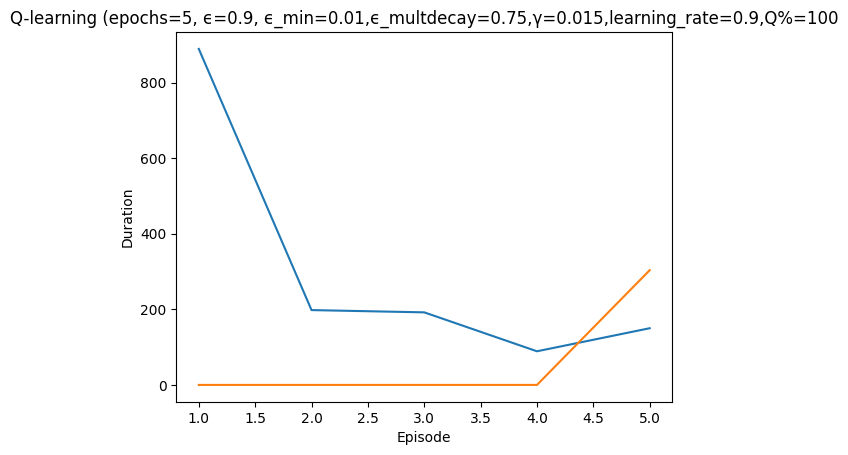

In [5]:
# Run Q-learning with gamma-sweep
qlearning_results = [qlearning_run(gamma, cyberbattlechain_10) for gamma in gamma_sweep]

qlearning_bestrun_10 = qlearning_results[0]

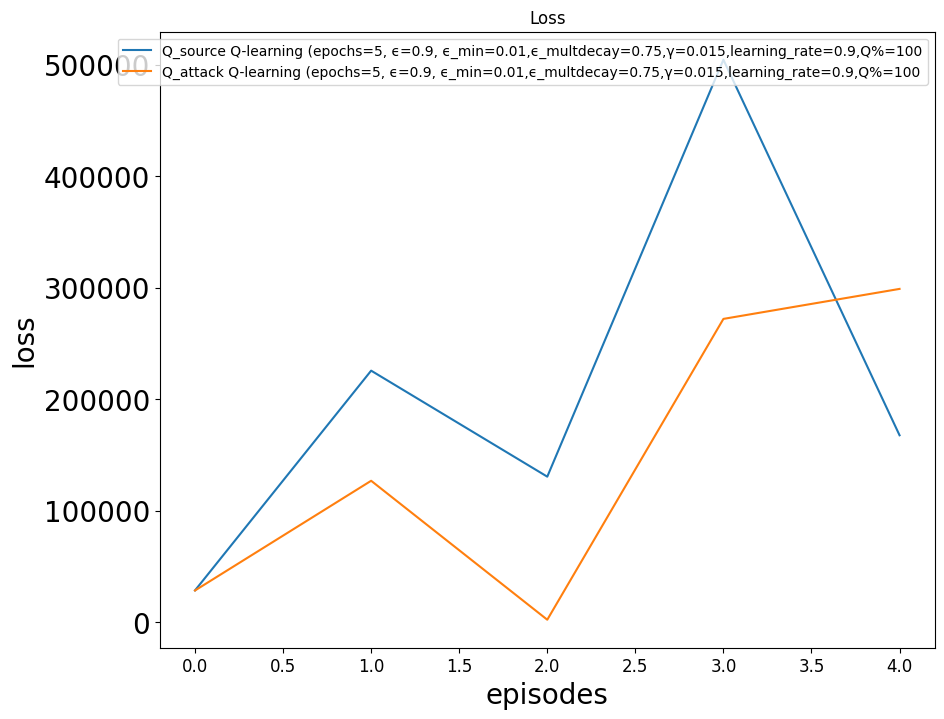

In [6]:
p.new_plot_loss()
for results in qlearning_results:
    p.plot_all_episodes_loss(cast(a.QTabularLearner, results['learner']).loss_qsource.all_episodes, 'Q_source', results['title'])
    p.plot_all_episodes_loss(cast(a.QTabularLearner, results['learner']).loss_qattack.all_episodes, 'Q_attack', results['title'])
plt.legend(loc="upper right")
plt.show()

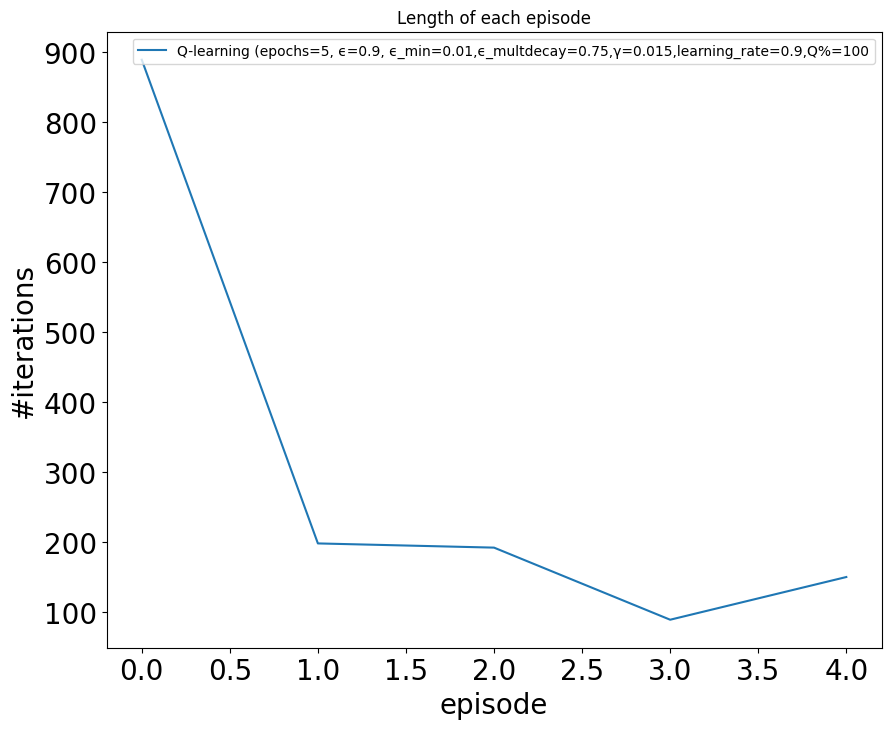

In [7]:

p.plot_episodes_length(qlearning_results)

###### Exploiting Q-matrix
Learning with: episode_count=5,iteration_count=9000,ϵ=0.3,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=100
  ## Episode: 1/5 'Exploiting Q-matrix' ϵ=0.3000, γ=0.0,learning_rate=0.0,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  234.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  234.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  240.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  240.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward:  242.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward:  242.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 1|Iteration 34|reward:  248.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 1|Iteration 34|reward:  248.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 1|Iteration 43|reward:  259.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 1|Iteration 43|reward:  259.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 1|Iteration 46|reward:  261.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 1|Iteration 46|reward:  261.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 1|Iteration 51|reward:  265.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 1|Iteration 51|reward:  265.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 1|Iteration 57|reward:  267.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 1|Iteration 57|reward:  267.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 1|Iteration 66|reward:  276.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 1|Iteration 66|reward:  276.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 1|Iteration 67|reward:  376.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 1|Iteration 67|reward:  376.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 1|Iteration 85|reward:  376.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 1|Iteration 107|reward:  376.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 1|Iteration 126|reward:  376.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 1|Iteration 142|reward:  376.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 1|Iteration 157|reward:  376.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 1|Iteration 170|reward:  376.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 1|Iteration 182|reward:  376.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 1|Iteration 199|reward:  376.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 1|Iteration 218|reward:  376.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 1|Iteration 228|reward:  376.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 1|Iteration 244|reward:  376.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 1|Iteration 257|reward:  376.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 1|Iteration 272|reward:  376.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 1|Iteration 283|reward:  390.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 1|Iteration 283|reward:  390.0|last_reward_at:  283|Elapsed Time: 0:00:01||

Episode 1|Iteration 286|reward:  490.0|last_reward_at:  283|Elapsed Time: 0:00:01||

Episode 1|Iteration 286|reward:  490.0|last_reward_at:  286|Elapsed Time: 0:00:01||

Episode 1|Iteration 303|reward:  490.0|last_reward_at:  286|Elapsed Time: 0:00:02||

Episode 1|Iteration 317|reward:  490.0|last_reward_at:  286|Elapsed Time: 0:00:02||

Episode 1|Iteration 320|reward:  496.0|last_reward_at:  286|Elapsed Time: 0:00:02||

Episode 1|Iteration 320|reward:  496.0|last_reward_at:  320|Elapsed Time: 0:00:02||

Episode 1|Iteration 326|reward:  507.0|last_reward_at:  320|Elapsed Time: 0:00:02||

Episode 1|Iteration 326|reward:  507.0|last_reward_at:  326|Elapsed Time: 0:00:02||

Episode 1|Iteration 336|reward:  507.0|last_reward_at:  326|Elapsed Time: 0:00:02||

Episode 1|Iteration 344|reward:  513.0|last_reward_at:  326|Elapsed Time: 0:00:02||

Episode 1|Iteration 344|reward:  513.0|last_reward_at:  344|Elapsed Time: 0:00:02||

Episode 1|Iteration 360|reward:  513.0|last_reward_at:  344|Elapsed Time: 0:00:02||

Episode 1|Iteration 366|reward:  515.0|last_reward_at:  344|Elapsed Time: 0:00:02||

Episode 1|Iteration 366|reward:  515.0|last_reward_at:  366|Elapsed Time: 0:00:02||

Episode 1|Iteration 378|reward:  515.0|last_reward_at:  366|Elapsed Time: 0:00:02||

Episode 1|Iteration 380|reward:  521.0|last_reward_at:  366|Elapsed Time: 0:00:02||

Episode 1|Iteration 380|reward:  521.0|last_reward_at:  380|Elapsed Time: 0:00:02||

Episode 1|Iteration 388|reward:  530.0|last_reward_at:  380|Elapsed Time: 0:00:02||

Episode 1|Iteration 388|reward:  530.0|last_reward_at:  388|Elapsed Time: 0:00:02||

Episode 1|Iteration 389|reward:  630.0|last_reward_at:  388|Elapsed Time: 0:00:02||

Episode 1|Iteration 389|reward:  630.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 1|Iteration 401|reward:  630.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 1|Iteration 411|reward:  632.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 1|Iteration 411|reward:  632.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 1|Iteration 424|reward:  632.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 1|Iteration 437|reward:  632.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 1|Iteration 448|reward:  632.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 1|Iteration 456|reward:  632.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 1|Iteration 465|reward:  632.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 1|Iteration 478|reward:  632.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 1|Iteration 486|reward:  643.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 1|Iteration 486|reward:  643.0|last_reward_at:  486|Elapsed Time: 0:00:03||

Episode 1|Iteration 490|reward:  649.0|last_reward_at:  486|Elapsed Time: 0:00:03||

Episode 1|Iteration 490|reward:  649.0|last_reward_at:  490|Elapsed Time: 0:00:03||

Episode 1|Iteration 503|reward:  649.0|last_reward_at:  490|Elapsed Time: 0:00:03||

Episode 1|Iteration 515|reward:  649.0|last_reward_at:  490|Elapsed Time: 0:00:03||

Episode 1|Iteration 527|reward:  649.0|last_reward_at:  490|Elapsed Time: 0:00:03||

Episode 1|Iteration 540|reward:  649.0|last_reward_at:  490|Elapsed Time: 0:00:04||

Episode 1|Iteration 552|reward:  649.0|last_reward_at:  490|Elapsed Time: 0:00:04||

Episode 1|Iteration 564|reward:  649.0|last_reward_at:  490|Elapsed Time: 0:00:04||

Episode 1|Iteration 578|reward:  649.0|last_reward_at:  490|Elapsed Time: 0:00:04||

Episode 1|Iteration 593|reward:  649.0|last_reward_at:  490|Elapsed Time: 0:00:04||

Episode 1|Iteration 608|reward:  649.0|last_reward_at:  490|Elapsed Time: 0:00:04||

Episode 1|Iteration 619|reward:  649.0|last_reward_at:  490|Elapsed Time: 0:00:04||

Episode 1|Iteration 626|reward:  649.0|last_reward_at:  490|Elapsed Time: 0:00:04||

Episode 1|Iteration 635|reward:  649.0|last_reward_at:  490|Elapsed Time: 0:00:04||

Episode 1|Iteration 641|reward:  649.0|last_reward_at:  490|Elapsed Time: 0:00:04||

Episode 1|Iteration 653|reward:  649.0|last_reward_at:  490|Elapsed Time: 0:00:05||

Episode 1|Iteration 663|reward:  649.0|last_reward_at:  490|Elapsed Time: 0:00:05||

Episode 1|Iteration 674|reward:  649.0|last_reward_at:  490|Elapsed Time: 0:00:05||

Episode 1|Iteration 683|reward:  649.0|last_reward_at:  490|Elapsed Time: 0:00:05||

Episode 1|Iteration 692|reward:  649.0|last_reward_at:  490|Elapsed Time: 0:00:05||

Episode 1|Iteration 702|reward:  649.0|last_reward_at:  490|Elapsed Time: 0:00:05||

Episode 1|Iteration 713|reward:  649.0|last_reward_at:  490|Elapsed Time: 0:00:05||

Episode 1|Iteration 723|reward:  649.0|last_reward_at:  490|Elapsed Time: 0:00:05||

Episode 1|Iteration 733|reward:  649.0|last_reward_at:  490|Elapsed Time: 0:00:05||

Episode 1|Iteration 743|reward:  649.0|last_reward_at:  490|Elapsed Time: 0:00:06||

Episode 1|Iteration 748|reward:  657.0|last_reward_at:  490|Elapsed Time: 0:00:06||

Episode 1|Iteration 748|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:06||

Episode 1|Iteration 758|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:06||

Episode 1|Iteration 770|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:06||

Episode 1|Iteration 781|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:06||

Episode 1|Iteration 792|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:06||

Episode 1|Iteration 798|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:06||

Episode 1|Iteration 808|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:06||

Episode 1|Iteration 819|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:06||

Episode 1|Iteration 828|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:06||

Episode 1|Iteration 839|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:07||

Episode 1|Iteration 850|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:07||

Episode 1|Iteration 860|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:07||

Episode 1|Iteration 871|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:07||

Episode 1|Iteration 884|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:07||

Episode 1|Iteration 898|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:07||

Episode 1|Iteration 910|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:07||

Episode 1|Iteration 920|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:07||

Episode 1|Iteration 930|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:07||

Episode 1|Iteration 945|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:07||

Episode 1|Iteration 954|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:08||

Episode 1|Iteration 964|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:08||

Episode 1|Iteration 979|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:08||

Episode 1|Iteration 990|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:08||

Episode 1|Iteration 1000|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:08||

Episode 1|Iteration 1010|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:08||

Episode 1|Iteration 1026|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:08||

Episode 1|Iteration 1041|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:08||

Episode 1|Iteration 1057|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:08||

Episode 1|Iteration 1069|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:08||

Episode 1|Iteration 1082|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:09||

Episode 1|Iteration 1099|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:09||

Episode 1|Iteration 1115|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:09||

Episode 1|Iteration 1127|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:09||

Episode 1|Iteration 1137|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:09||

Episode 1|Iteration 1149|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:09||

Episode 1|Iteration 1163|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:09||

Episode 1|Iteration 1178|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:09||

Episode 1|Iteration 1190|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:09||

Episode 1|Iteration 1203|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:10||

Episode 1|Iteration 1214|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:10||

Episode 1|Iteration 1225|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:10||

Episode 1|Iteration 1235|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:10||

Episode 1|Iteration 1252|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:10||

Episode 1|Iteration 1270|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:10||

Episode 1|Iteration 1287|reward:  657.0|last_reward_at:  748|Elapsed Time: 0:00:10||

Episode 1|Iteration 1298|reward:  666.0|last_reward_at:  748|Elapsed Time: 0:00:10||

Episode 1|Iteration 1298|reward:  666.0|last_reward_at: 1298|Elapsed Time: 0:00:10||

Episode 1|Iteration 1299|reward:  766.0|last_reward_at: 1298|Elapsed Time: 0:00:10||

Episode 1|Iteration 1299|reward:  766.0|last_reward_at: 1299|Elapsed Time: 0:00:10||

Episode 1|Iteration 1313|reward:  766.0|last_reward_at: 1299|Elapsed Time: 0:00:10||

Episode 1|Iteration 1327|reward:  766.0|last_reward_at: 1299|Elapsed Time: 0:00:10||

Episode 1|Iteration 1341|reward:  766.0|last_reward_at: 1299|Elapsed Time: 0:00:11||

Episode 1|Iteration 1357|reward:  766.0|last_reward_at: 1299|Elapsed Time: 0:00:11||

Episode 1|Iteration 1368|reward:  766.0|last_reward_at: 1299|Elapsed Time: 0:00:11||

Episode 1|Iteration 1380|reward:  766.0|last_reward_at: 1299|Elapsed Time: 0:00:11||

Episode 1|Iteration 1392|reward:  766.0|last_reward_at: 1299|Elapsed Time: 0:00:11||

Episode 1|Iteration 1405|reward:  766.0|last_reward_at: 1299|Elapsed Time: 0:00:11||

Episode 1|Iteration 1417|reward:  766.0|last_reward_at: 1299|Elapsed Time: 0:00:11||

Episode 1|Iteration 1431|reward:  766.0|last_reward_at: 1299|Elapsed Time: 0:00:11||

Episode 1|Iteration 1442|reward:  766.0|last_reward_at: 1299|Elapsed Time: 0:00:11||

Episode 1|Iteration 1450|reward:  777.0|last_reward_at: 1299|Elapsed Time: 0:00:11||

Episode 1|Iteration 1450|reward:  777.0|last_reward_at: 1450|Elapsed Time: 0:00:11||

Episode 1|Iteration 1461|reward:  777.0|last_reward_at: 1450|Elapsed Time: 0:00:12||

Episode 1|Iteration 1474|reward:  777.0|last_reward_at: 1450|Elapsed Time: 0:00:12||

Episode 1|Iteration 1475|reward:  781.0|last_reward_at: 1450|Elapsed Time: 0:00:12||

Episode 1|Iteration 1475|reward:  781.0|last_reward_at: 1475|Elapsed Time: 0:00:12||

Episode 1|Iteration 1482|reward:  781.0|last_reward_at: 1475|Elapsed Time: 0:00:12||

Episode 1|Iteration 1482|reward:  783.0|last_reward_at: 1475|Elapsed Time: 0:00:12||

Episode 1|Iteration 1482|reward:  783.0|last_reward_at: 1482|Elapsed Time: 0:00:12||

Episode 1|Iteration 1493|reward:  783.0|last_reward_at: 1482|Elapsed Time: 0:00:12||

Episode 1|Iteration 1495|reward:  792.0|last_reward_at: 1482|Elapsed Time: 0:00:12||

Episode 1|Iteration 1495|reward:  792.0|last_reward_at: 1495|Elapsed Time: 0:00:12||

Episode 1|Iteration 1497|reward:  892.0|last_reward_at: 1495|Elapsed Time: 0:00:12||

Episode 1|Iteration 1497|reward:  892.0|last_reward_at: 1497|Elapsed Time: 0:00:12||

Episode 1|Iteration 1508|reward:  892.0|last_reward_at: 1497|Elapsed Time: 0:00:12||

Episode 1|Iteration 1516|reward:  892.0|last_reward_at: 1497|Elapsed Time: 0:00:12||

Episode 1|Iteration 1527|reward:  892.0|last_reward_at: 1497|Elapsed Time: 0:00:12||

Episode 1|Iteration 1535|reward:  906.0|last_reward_at: 1497|Elapsed Time: 0:00:12||

Episode 1|Iteration 1535|reward:  906.0|last_reward_at: 1535|Elapsed Time: 0:00:12||

Episode 1|Iteration 1536|reward: 1006.0|last_reward_at: 1535|Elapsed Time: 0:00:12||

Episode 1|Iteration 1536|reward: 1006.0|last_reward_at: 1536|Elapsed Time: 0:00:12||

Episode 1|Iteration 1545|reward: 1012.0|last_reward_at: 1536|Elapsed Time: 0:00:12||

Episode 1|Iteration 1545|reward: 1012.0|last_reward_at: 1545|Elapsed Time: 0:00:12||

Episode 1|Iteration 1557|reward: 1012.0|last_reward_at: 1545|Elapsed Time: 0:00:12||

Episode 1|Iteration 1569|reward: 1012.0|last_reward_at: 1545|Elapsed Time: 0:00:13||

Episode 1|Iteration 1578|reward: 1012.0|last_reward_at: 1545|Elapsed Time: 0:00:13||

Episode 1|Iteration 1584|reward: 1018.0|last_reward_at: 1545|Elapsed Time: 0:00:13||

Episode 1|Iteration 1584|reward: 1018.0|last_reward_at: 1584|Elapsed Time: 0:00:13||

Episode 1|Iteration 1593|reward: 1018.0|last_reward_at: 1584|Elapsed Time: 0:00:13||

Episode 1|Iteration 1602|reward: 1018.0|last_reward_at: 1584|Elapsed Time: 0:00:13||

Episode 1|Iteration 1616|reward: 1018.0|last_reward_at: 1584|Elapsed Time: 0:00:13||

Episode 1|Iteration 1626|reward: 1018.0|last_reward_at: 1584|Elapsed Time: 0:00:13||

Episode 1|Iteration 1637|reward: 1018.0|last_reward_at: 1584|Elapsed Time: 0:00:13||

Episode 1|Iteration 1643|reward: 1018.0|last_reward_at: 1584|Elapsed Time: 0:00:13||

Episode 1|Iteration 1652|reward: 1018.0|last_reward_at: 1584|Elapsed Time: 0:00:13||

Episode 1|Iteration 1663|reward: 1018.0|last_reward_at: 1584|Elapsed Time: 0:00:14||

Episode 1|Iteration 1674|reward: 1018.0|last_reward_at: 1584|Elapsed Time: 0:00:14||

Episode 1|Iteration 1683|reward: 1018.0|last_reward_at: 1584|Elapsed Time: 0:00:14||

Episode 1|Iteration 1685|reward: 1024.0|last_reward_at: 1584|Elapsed Time: 0:00:14||

Episode 1|Iteration 1685|reward: 1024.0|last_reward_at: 1685|Elapsed Time: 0:00:14||

Episode 1|Iteration 1695|reward: 1024.0|last_reward_at: 1685|Elapsed Time: 0:00:14||

Episode 1|Iteration 1708|reward: 1024.0|last_reward_at: 1685|Elapsed Time: 0:00:14||

Episode 1|Iteration 1710|reward: 1035.0|last_reward_at: 1685|Elapsed Time: 0:00:14||

Episode 1|Iteration 1710|reward: 1035.0|last_reward_at: 1710|Elapsed Time: 0:00:14||

Episode 1|Iteration 1719|reward: 1035.0|last_reward_at: 1710|Elapsed Time: 0:00:14||

Episode 1|Iteration 1730|reward: 1035.0|last_reward_at: 1710|Elapsed Time: 0:00:14||

Episode 1|Iteration 1731|reward: 1037.0|last_reward_at: 1710|Elapsed Time: 0:00:14||

Episode 1|Iteration 1731|reward: 1037.0|last_reward_at: 1731|Elapsed Time: 0:00:14||

Episode 1|Iteration 1740|reward: 1046.0|last_reward_at: 1731|Elapsed Time: 0:00:14||

Episode 1|Iteration 1740|reward: 1046.0|last_reward_at: 1740|Elapsed Time: 0:00:14||

Episode 1|Iteration 1742|reward: 1146.0|last_reward_at: 1740|Elapsed Time: 0:00:14||

Episode 1|Iteration 1742|reward: 1146.0|last_reward_at: 1742|Elapsed Time: 0:00:14||

Episode 1|Iteration 1752|reward: 1146.0|last_reward_at: 1742|Elapsed Time: 0:00:14||

Episode 1|Iteration 1763|reward: 1146.0|last_reward_at: 1742|Elapsed Time: 0:00:15||

Episode 1|Iteration 1770|reward: 1146.0|last_reward_at: 1742|Elapsed Time: 0:00:15||

Episode 1|Iteration 1773|reward: 1157.0|last_reward_at: 1742|Elapsed Time: 0:00:15||

Episode 1|Iteration 1773|reward: 1157.0|last_reward_at: 1773|Elapsed Time: 0:00:15||

Episode 1|Iteration 1779|reward: 1159.0|last_reward_at: 1773|Elapsed Time: 0:00:15||

Episode 1|Iteration 1779|reward: 1159.0|last_reward_at: 1779|Elapsed Time: 0:00:15||

Episode 1|Iteration 1791|reward: 1159.0|last_reward_at: 1779|Elapsed Time: 0:00:15||

Episode 1|Iteration 1799|reward: 1159.0|last_reward_at: 1779|Elapsed Time: 0:00:15||

Episode 1|Iteration 1808|reward: 1159.0|last_reward_at: 1779|Elapsed Time: 0:00:15||

Episode 1|Iteration 1816|reward: 1159.0|last_reward_at: 1779|Elapsed Time: 0:00:15||

Episode 1|Iteration 1822|reward: 1165.0|last_reward_at: 1779|Elapsed Time: 0:00:15||

Episode 1|Iteration 1822|reward: 1165.0|last_reward_at: 1822|Elapsed Time: 0:00:15||

Episode 1|Iteration 1829|reward: 1165.0|last_reward_at: 1822|Elapsed Time: 0:00:15||

Episode 1|Iteration 1837|reward: 1165.0|last_reward_at: 1822|Elapsed Time: 0:00:16||

Episode 1|Iteration 1846|reward: 1165.0|last_reward_at: 1822|Elapsed Time: 0:00:16||

Episode 1|Iteration 1853|reward: 1165.0|last_reward_at: 1822|Elapsed Time: 0:00:16||

Episode 1|Iteration 1861|reward: 1165.0|last_reward_at: 1822|Elapsed Time: 0:00:16||

Episode 1|Iteration 1866|reward: 1173.0|last_reward_at: 1822|Elapsed Time: 0:00:16||

Episode 1|Iteration 1866|reward: 1173.0|last_reward_at: 1866|Elapsed Time: 0:00:16||

Episode 1|Iteration 1876|reward: 1173.0|last_reward_at: 1866|Elapsed Time: 0:00:16||

Episode 1|Iteration 1887|reward: 1173.0|last_reward_at: 1866|Elapsed Time: 0:00:16||

Episode 1|Iteration 1898|reward: 1173.0|last_reward_at: 1866|Elapsed Time: 0:00:16||

Episode 1|Iteration 1908|reward: 1173.0|last_reward_at: 1866|Elapsed Time: 0:00:16||

Episode 1|Iteration 1917|reward: 1173.0|last_reward_at: 1866|Elapsed Time: 0:00:16||

Episode 1|Iteration 1925|reward: 1173.0|last_reward_at: 1866|Elapsed Time: 0:00:17||

Episode 1|Iteration 1932|reward: 1173.0|last_reward_at: 1866|Elapsed Time: 0:00:17||

Episode 1|Iteration 1937|reward: 1173.0|last_reward_at: 1866|Elapsed Time: 0:00:17||

Episode 1|Iteration 1945|reward: 1173.0|last_reward_at: 1866|Elapsed Time: 0:00:17||

Episode 1|Iteration 1956|reward: 1173.0|last_reward_at: 1866|Elapsed Time: 0:00:17||

Episode 1|Iteration 1965|reward: 1173.0|last_reward_at: 1866|Elapsed Time: 0:00:17||

Episode 1|Iteration 1973|reward: 1173.0|last_reward_at: 1866|Elapsed Time: 0:00:17||

Episode 1|Iteration 1980|reward: 1173.0|last_reward_at: 1866|Elapsed Time: 0:00:17||

Episode 1|Iteration 1988|reward: 1173.0|last_reward_at: 1866|Elapsed Time: 0:00:17||

Episode 1|Iteration 1998|reward: 1173.0|last_reward_at: 1866|Elapsed Time: 0:00:17||

Episode 1|Iteration 2007|reward: 1173.0|last_reward_at: 1866|Elapsed Time: 0:00:18||

Episode 1|Iteration 2015|reward: 1173.0|last_reward_at: 1866|Elapsed Time: 0:00:18||

Episode 1|Iteration 2023|reward: 1173.0|last_reward_at: 1866|Elapsed Time: 0:00:18||

Episode 1|Iteration 2032|reward: 1173.0|last_reward_at: 1866|Elapsed Time: 0:00:18||

Episode 1|Iteration 2039|reward: 1173.0|last_reward_at: 1866|Elapsed Time: 0:00:18||

Episode 1|Iteration 2046|reward: 1182.0|last_reward_at: 1866|Elapsed Time: 0:00:18||

Episode 1|Iteration 2046|reward: 1182.0|last_reward_at: 2046|Elapsed Time: 0:00:18||

Episode 1|Iteration 2051|reward: 1282.0|last_reward_at: 2046|Elapsed Time: 0:00:18||

Episode 1|Iteration 2051|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:18||

Episode 1|Iteration 2060|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:18||

Episode 1|Iteration 2068|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:18||

Episode 1|Iteration 2077|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:18||

Episode 1|Iteration 2085|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:19||

Episode 1|Iteration 2092|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:19||

Episode 1|Iteration 2099|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:19||

Episode 1|Iteration 2107|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:19||

Episode 1|Iteration 2114|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:19||

Episode 1|Iteration 2121|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:19||

Episode 1|Iteration 2129|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:19||

Episode 1|Iteration 2138|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:19||

Episode 1|Iteration 2147|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:19||

Episode 1|Iteration 2156|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:20||

Episode 1|Iteration 2165|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:20||

Episode 1|Iteration 2170|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:20||

Episode 1|Iteration 2177|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:20||

Episode 1|Iteration 2184|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:20||

Episode 1|Iteration 2190|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:20||

Episode 1|Iteration 2198|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:20||

Episode 1|Iteration 2206|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:20||

Episode 1|Iteration 2212|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:20||

Episode 1|Iteration 2219|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:20||

Episode 1|Iteration 2226|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:21||

Episode 1|Iteration 2233|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:21||

Episode 1|Iteration 2240|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:21||

Episode 1|Iteration 2248|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:21||

Episode 1|Iteration 2257|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:21||

Episode 1|Iteration 2266|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:21||

Episode 1|Iteration 2276|reward: 1282.0|last_reward_at: 2051|Elapsed Time: 0:00:21||

Episode 1|Iteration 2284|reward: 1296.0|last_reward_at: 2051|Elapsed Time: 0:00:21||

Episode 1|Iteration 2284|reward: 1296.0|last_reward_at: 2284|Elapsed Time: 0:00:21||

Episode 1|Iteration 2285|reward: 6296.0|last_reward_at: 2284|Elapsed Time: 0:00:21||

Episode 1|Iteration 2285|reward: 6296.0|last_reward_at: 2285|Elapsed Time: 0:00:21||

  Episode 1 ended at t=2285 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 18/357 (0.05)
    explore-remote: 16/476 (0.03)
    explore-connect: 0/518 (0.00)
    exploit-local: 2/2 (0.50)
    exploit-remote: 4/881 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 729
  ## Episode: 2/5 'Exploiting Q-matrix' ϵ=0.3000, γ=0.0,learning_rate=0.0,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  232.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  232.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  238.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  238.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  244.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  244.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  244.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  255.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  255.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  257.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  257.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:  261.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:  261.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:  270.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:  270.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  370.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  370.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 65|reward:  370.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 83|reward:  370.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 97|reward:  381.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 97|reward:  381.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 2|Iteration 107|reward:  387.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 2|Iteration 107|reward:  387.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 2|Iteration 113|reward:  395.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 2|Iteration 113|reward:  395.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 2|Iteration 119|reward:  404.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 2|Iteration 119|reward:  404.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 2|Iteration 120|reward:  504.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 2|Iteration 120|reward:  504.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 2|Iteration 130|reward:  504.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 2|Iteration 142|reward:  518.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 2|Iteration 142|reward:  518.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 2|Iteration 145|reward:  618.0|last_reward_at:  142|Elapsed Time: 0:00:01||

Episode 2|Iteration 145|reward:  618.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 2|Iteration 155|reward:  629.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 2|Iteration 155|reward:  629.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 2|Iteration 164|reward:  631.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 2|Iteration 164|reward:  631.0|last_reward_at:  164|Elapsed Time: 0:00:01||

Episode 2|Iteration 171|reward:  637.0|last_reward_at:  164|Elapsed Time: 0:00:01||

Episode 2|Iteration 171|reward:  637.0|last_reward_at:  171|Elapsed Time: 0:00:01||

Episode 2|Iteration 187|reward:  637.0|last_reward_at:  171|Elapsed Time: 0:00:01||

Episode 2|Iteration 201|reward:  637.0|last_reward_at:  171|Elapsed Time: 0:00:01||

Episode 2|Iteration 216|reward:  637.0|last_reward_at:  171|Elapsed Time: 0:00:01||

Episode 2|Iteration 227|reward:  637.0|last_reward_at:  171|Elapsed Time: 0:00:01||

Episode 2|Iteration 228|reward:  643.0|last_reward_at:  171|Elapsed Time: 0:00:01||

Episode 2|Iteration 228|reward:  643.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 2|Iteration 242|reward:  643.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 2|Iteration 254|reward:  643.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 2|Iteration 269|reward:  643.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 2|Iteration 277|reward:  651.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 2|Iteration 277|reward:  651.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 2|Iteration 292|reward:  651.0|last_reward_at:  277|Elapsed Time: 0:00:02||

Episode 2|Iteration 307|reward:  651.0|last_reward_at:  277|Elapsed Time: 0:00:02||

Episode 2|Iteration 322|reward:  651.0|last_reward_at:  277|Elapsed Time: 0:00:02||

Episode 2|Iteration 334|reward:  651.0|last_reward_at:  277|Elapsed Time: 0:00:02||

Episode 2|Iteration 348|reward:  651.0|last_reward_at:  277|Elapsed Time: 0:00:02||

Episode 2|Iteration 358|reward:  651.0|last_reward_at:  277|Elapsed Time: 0:00:02||

Episode 2|Iteration 375|reward:  651.0|last_reward_at:  277|Elapsed Time: 0:00:02||

Episode 2|Iteration 378|reward:  653.0|last_reward_at:  277|Elapsed Time: 0:00:02||

Episode 2|Iteration 378|reward:  653.0|last_reward_at:  378|Elapsed Time: 0:00:02||

Episode 2|Iteration 391|reward:  653.0|last_reward_at:  378|Elapsed Time: 0:00:02||

Episode 2|Iteration 403|reward:  653.0|last_reward_at:  378|Elapsed Time: 0:00:02||

Episode 2|Iteration 417|reward:  653.0|last_reward_at:  378|Elapsed Time: 0:00:03||

Episode 2|Iteration 429|reward:  653.0|last_reward_at:  378|Elapsed Time: 0:00:03||

Episode 2|Iteration 442|reward:  653.0|last_reward_at:  378|Elapsed Time: 0:00:03||

Episode 2|Iteration 456|reward:  653.0|last_reward_at:  378|Elapsed Time: 0:00:03||

Episode 2|Iteration 471|reward:  653.0|last_reward_at:  378|Elapsed Time: 0:00:03||

Episode 2|Iteration 485|reward:  659.0|last_reward_at:  378|Elapsed Time: 0:00:03||

Episode 2|Iteration 485|reward:  659.0|last_reward_at:  485|Elapsed Time: 0:00:03||

Episode 2|Iteration 496|reward:  659.0|last_reward_at:  485|Elapsed Time: 0:00:03||

Episode 2|Iteration 508|reward:  659.0|last_reward_at:  485|Elapsed Time: 0:00:03||

Episode 2|Iteration 518|reward:  659.0|last_reward_at:  485|Elapsed Time: 0:00:03||

Episode 2|Iteration 530|reward:  659.0|last_reward_at:  485|Elapsed Time: 0:00:03||

Episode 2|Iteration 544|reward:  659.0|last_reward_at:  485|Elapsed Time: 0:00:04||

Episode 2|Iteration 560|reward:  659.0|last_reward_at:  485|Elapsed Time: 0:00:04||

Episode 2|Iteration 570|reward:  659.0|last_reward_at:  485|Elapsed Time: 0:00:04||

Episode 2|Iteration 581|reward:  659.0|last_reward_at:  485|Elapsed Time: 0:00:04||

Episode 2|Iteration 597|reward:  659.0|last_reward_at:  485|Elapsed Time: 0:00:04||

Episode 2|Iteration 613|reward:  659.0|last_reward_at:  485|Elapsed Time: 0:00:04||

Episode 2|Iteration 626|reward:  659.0|last_reward_at:  485|Elapsed Time: 0:00:04||

Episode 2|Iteration 639|reward:  659.0|last_reward_at:  485|Elapsed Time: 0:00:04||

Episode 2|Iteration 654|reward:  659.0|last_reward_at:  485|Elapsed Time: 0:00:04||

Episode 2|Iteration 666|reward:  659.0|last_reward_at:  485|Elapsed Time: 0:00:04||

Episode 2|Iteration 681|reward:  659.0|last_reward_at:  485|Elapsed Time: 0:00:05||

Episode 2|Iteration 694|reward:  659.0|last_reward_at:  485|Elapsed Time: 0:00:05||

Episode 2|Iteration 708|reward:  659.0|last_reward_at:  485|Elapsed Time: 0:00:05||

Episode 2|Iteration 714|reward:  668.0|last_reward_at:  485|Elapsed Time: 0:00:05||

Episode 2|Iteration 714|reward:  668.0|last_reward_at:  714|Elapsed Time: 0:00:05||

Episode 2|Iteration 715|reward:  768.0|last_reward_at:  714|Elapsed Time: 0:00:05||

Episode 2|Iteration 715|reward:  768.0|last_reward_at:  715|Elapsed Time: 0:00:05||

Episode 2|Iteration 726|reward:  768.0|last_reward_at:  715|Elapsed Time: 0:00:05||

Episode 2|Iteration 740|reward:  768.0|last_reward_at:  715|Elapsed Time: 0:00:05||

Episode 2|Iteration 744|reward:  782.0|last_reward_at:  715|Elapsed Time: 0:00:05||

Episode 2|Iteration 744|reward:  782.0|last_reward_at:  744|Elapsed Time: 0:00:05||

Episode 2|Iteration 745|reward:  882.0|last_reward_at:  744|Elapsed Time: 0:00:05||

Episode 2|Iteration 745|reward:  882.0|last_reward_at:  745|Elapsed Time: 0:00:05||

Episode 2|Iteration 748|reward:  884.0|last_reward_at:  745|Elapsed Time: 0:00:05||

Episode 2|Iteration 748|reward:  884.0|last_reward_at:  748|Elapsed Time: 0:00:05||

Episode 2|Iteration 762|reward:  884.0|last_reward_at:  748|Elapsed Time: 0:00:05||

Episode 2|Iteration 765|reward:  890.0|last_reward_at:  748|Elapsed Time: 0:00:05||

Episode 2|Iteration 765|reward:  890.0|last_reward_at:  765|Elapsed Time: 0:00:05||

Episode 2|Iteration 777|reward:  890.0|last_reward_at:  765|Elapsed Time: 0:00:05||

Episode 2|Iteration 789|reward:  890.0|last_reward_at:  765|Elapsed Time: 0:00:05||

Episode 2|Iteration 793|reward:  892.0|last_reward_at:  765|Elapsed Time: 0:00:05||

Episode 2|Iteration 793|reward:  892.0|last_reward_at:  793|Elapsed Time: 0:00:05||

Episode 2|Iteration 798|reward:  892.0|last_reward_at:  793|Elapsed Time: 0:00:06||

Episode 2|Iteration 809|reward:  892.0|last_reward_at:  793|Elapsed Time: 0:00:06||

Episode 2|Iteration 818|reward:  892.0|last_reward_at:  793|Elapsed Time: 0:00:06||

Episode 2|Iteration 822|reward:  903.0|last_reward_at:  793|Elapsed Time: 0:00:06||

Episode 2|Iteration 822|reward:  903.0|last_reward_at:  822|Elapsed Time: 0:00:06||

Episode 2|Iteration 823|reward:  912.0|last_reward_at:  822|Elapsed Time: 0:00:06||

Episode 2|Iteration 823|reward:  912.0|last_reward_at:  823|Elapsed Time: 0:00:06||

Episode 2|Iteration 824|reward: 1012.0|last_reward_at:  823|Elapsed Time: 0:00:06||

Episode 2|Iteration 824|reward: 1012.0|last_reward_at:  824|Elapsed Time: 0:00:06||

Episode 2|Iteration 831|reward: 1026.0|last_reward_at:  824|Elapsed Time: 0:00:06||

Episode 2|Iteration 831|reward: 1026.0|last_reward_at:  831|Elapsed Time: 0:00:06||

Episode 2|Iteration 833|reward: 1126.0|last_reward_at:  831|Elapsed Time: 0:00:06||

Episode 2|Iteration 833|reward: 1126.0|last_reward_at:  833|Elapsed Time: 0:00:06||

Episode 2|Iteration 843|reward: 1140.0|last_reward_at:  833|Elapsed Time: 0:00:06||

Episode 2|Iteration 843|reward: 1140.0|last_reward_at:  843|Elapsed Time: 0:00:06||

Episode 2|Iteration 844|reward: 1240.0|last_reward_at:  843|Elapsed Time: 0:00:06||

Episode 2|Iteration 844|reward: 1240.0|last_reward_at:  844|Elapsed Time: 0:00:06||

Episode 2|Iteration 847|reward: 1251.0|last_reward_at:  844|Elapsed Time: 0:00:06||

Episode 2|Iteration 847|reward: 1251.0|last_reward_at:  847|Elapsed Time: 0:00:06||

Episode 2|Iteration 855|reward: 1251.0|last_reward_at:  847|Elapsed Time: 0:00:06||

Episode 2|Iteration 862|reward: 1257.0|last_reward_at:  847|Elapsed Time: 0:00:06||

Episode 2|Iteration 862|reward: 1257.0|last_reward_at:  862|Elapsed Time: 0:00:06||

Episode 2|Iteration 871|reward: 1257.0|last_reward_at:  862|Elapsed Time: 0:00:06||

Episode 2|Iteration 879|reward: 1257.0|last_reward_at:  862|Elapsed Time: 0:00:06||

Episode 2|Iteration 882|reward: 1263.0|last_reward_at:  862|Elapsed Time: 0:00:06||

Episode 2|Iteration 882|reward: 1263.0|last_reward_at:  882|Elapsed Time: 0:00:06||

Episode 2|Iteration 890|reward: 1263.0|last_reward_at:  882|Elapsed Time: 0:00:07||

Episode 2|Iteration 892|reward: 1269.0|last_reward_at:  882|Elapsed Time: 0:00:07||

Episode 2|Iteration 892|reward: 1269.0|last_reward_at:  892|Elapsed Time: 0:00:07||

Episode 2|Iteration 898|reward: 1269.0|last_reward_at:  892|Elapsed Time: 0:00:07||

Episode 2|Iteration 905|reward: 1269.0|last_reward_at:  892|Elapsed Time: 0:00:07||

Episode 2|Iteration 912|reward: 1269.0|last_reward_at:  892|Elapsed Time: 0:00:07||

Episode 2|Iteration 912|reward: 1271.0|last_reward_at:  892|Elapsed Time: 0:00:07||

Episode 2|Iteration 912|reward: 1271.0|last_reward_at:  912|Elapsed Time: 0:00:07||

Episode 2|Iteration 914|reward: 1277.0|last_reward_at:  912|Elapsed Time: 0:00:07||

Episode 2|Iteration 914|reward: 1277.0|last_reward_at:  914|Elapsed Time: 0:00:07||

Episode 2|Iteration 917|reward: 1279.0|last_reward_at:  914|Elapsed Time: 0:00:07||

Episode 2|Iteration 917|reward: 1279.0|last_reward_at:  917|Elapsed Time: 0:00:07||

Episode 2|Iteration 925|reward: 1279.0|last_reward_at:  917|Elapsed Time: 0:00:07||

Episode 2|Iteration 933|reward: 1279.0|last_reward_at:  917|Elapsed Time: 0:00:07||

Episode 2|Iteration 940|reward: 1279.0|last_reward_at:  917|Elapsed Time: 0:00:07||

Episode 2|Iteration 949|reward: 1279.0|last_reward_at:  917|Elapsed Time: 0:00:07||

Episode 2|Iteration 956|reward: 1279.0|last_reward_at:  917|Elapsed Time: 0:00:08||

Episode 2|Iteration 963|reward: 1279.0|last_reward_at:  917|Elapsed Time: 0:00:08||

Episode 2|Iteration 970|reward: 1279.0|last_reward_at:  917|Elapsed Time: 0:00:08||

Episode 2|Iteration 977|reward: 1279.0|last_reward_at:  917|Elapsed Time: 0:00:08||

Episode 2|Iteration 984|reward: 1279.0|last_reward_at:  917|Elapsed Time: 0:00:08||

Episode 2|Iteration 992|reward: 1279.0|last_reward_at:  917|Elapsed Time: 0:00:08||

Episode 2|Iteration 1000|reward: 1279.0|last_reward_at:  917|Elapsed Time: 0:00:08||

Episode 2|Iteration 1008|reward: 1279.0|last_reward_at:  917|Elapsed Time: 0:00:08||

Episode 2|Iteration 1019|reward: 1279.0|last_reward_at:  917|Elapsed Time: 0:00:08||

Episode 2|Iteration 1024|reward: 1288.0|last_reward_at:  917|Elapsed Time: 0:00:08||

Episode 2|Iteration 1024|reward: 1288.0|last_reward_at: 1024|Elapsed Time: 0:00:08||

Episode 2|Iteration 1026|reward: 6288.0|last_reward_at: 1024|Elapsed Time: 0:00:09||

Episode 2|Iteration 1026|reward: 6288.0|last_reward_at: 1026|Elapsed Time: 0:00:09||

  Episode 2 ended at t=1026 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 17/133 (0.11)
    explore-remote: 17/191 (0.08)
    explore-connect: 0/199 (0.00)
    exploit-local: 2/0 (1.00)
    exploit-remote: 3/453 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 248
  ## Episode: 3/5 'Exploiting Q-matrix' ϵ=0.3000, γ=0.0,learning_rate=0.0,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  132.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  232.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  232.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:  232.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  238.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  238.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:  244.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:  244.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 34|reward:  250.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 34|reward:  250.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 3|Iteration 48|reward:  250.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 3|Iteration 66|reward:  264.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 3|Iteration 66|reward:  264.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 3|Iteration 67|reward:  364.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 3|Iteration 67|reward:  364.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 3|Iteration 74|reward:  366.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 3|Iteration 74|reward:  366.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 3|Iteration 94|reward:  366.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 3|Iteration 111|reward:  366.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 3|Iteration 127|reward:  366.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 3|Iteration 145|reward:  366.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 3|Iteration 149|reward:  377.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 3|Iteration 149|reward:  377.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 3|Iteration 157|reward:  386.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 3|Iteration 157|reward:  386.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 3|Iteration 158|reward:  486.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 3|Iteration 158|reward:  486.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 3|Iteration 171|reward:  486.0|last_reward_at:  158|Elapsed Time: 0:00:01||

Episode 3|Iteration 178|reward:  488.0|last_reward_at:  158|Elapsed Time: 0:00:01||

Episode 3|Iteration 178|reward:  488.0|last_reward_at:  178|Elapsed Time: 0:00:01||

Episode 3|Iteration 185|reward:  494.0|last_reward_at:  178|Elapsed Time: 0:00:01||

Episode 3|Iteration 185|reward:  494.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 3|Iteration 192|reward:  500.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 3|Iteration 192|reward:  500.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 3|Iteration 206|reward:  500.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 3|Iteration 218|reward:  500.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 3|Iteration 228|reward:  500.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 3|Iteration 229|reward:  506.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 3|Iteration 229|reward:  506.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 3|Iteration 245|reward:  506.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 3|Iteration 259|reward:  506.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 3|Iteration 269|reward:  506.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 3|Iteration 270|reward:  520.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 3|Iteration 270|reward:  520.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 3|Iteration 273|reward:  620.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 3|Iteration 273|reward:  620.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 3|Iteration 275|reward:  622.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 3|Iteration 275|reward:  622.0|last_reward_at:  275|Elapsed Time: 0:00:01||

Episode 3|Iteration 277|reward:  624.0|last_reward_at:  275|Elapsed Time: 0:00:01||

Episode 3|Iteration 277|reward:  624.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 3|Iteration 289|reward:  624.0|last_reward_at:  277|Elapsed Time: 0:00:02||

Episode 3|Iteration 298|reward:  624.0|last_reward_at:  277|Elapsed Time: 0:00:02||

Episode 3|Iteration 301|reward:  635.0|last_reward_at:  277|Elapsed Time: 0:00:02||

Episode 3|Iteration 301|reward:  635.0|last_reward_at:  301|Elapsed Time: 0:00:02||

Episode 3|Iteration 304|reward:  641.0|last_reward_at:  301|Elapsed Time: 0:00:02||

Episode 3|Iteration 304|reward:  641.0|last_reward_at:  304|Elapsed Time: 0:00:02||

Episode 3|Iteration 315|reward:  641.0|last_reward_at:  304|Elapsed Time: 0:00:02||

Episode 3|Iteration 328|reward:  641.0|last_reward_at:  304|Elapsed Time: 0:00:02||

Episode 3|Iteration 342|reward:  641.0|last_reward_at:  304|Elapsed Time: 0:00:02||

Episode 3|Iteration 357|reward:  641.0|last_reward_at:  304|Elapsed Time: 0:00:02||

Episode 3|Iteration 362|reward:  647.0|last_reward_at:  304|Elapsed Time: 0:00:02||

Episode 3|Iteration 362|reward:  647.0|last_reward_at:  362|Elapsed Time: 0:00:02||

Episode 3|Iteration 375|reward:  647.0|last_reward_at:  362|Elapsed Time: 0:00:02||

Episode 3|Iteration 386|reward:  647.0|last_reward_at:  362|Elapsed Time: 0:00:02||

Episode 3|Iteration 399|reward:  647.0|last_reward_at:  362|Elapsed Time: 0:00:02||

Episode 3|Iteration 410|reward:  647.0|last_reward_at:  362|Elapsed Time: 0:00:03||

Episode 3|Iteration 423|reward:  647.0|last_reward_at:  362|Elapsed Time: 0:00:03||

Episode 3|Iteration 436|reward:  655.0|last_reward_at:  362|Elapsed Time: 0:00:03||

Episode 3|Iteration 436|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:03||

Episode 3|Iteration 454|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:03||

Episode 3|Iteration 468|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:03||

Episode 3|Iteration 484|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:03||

Episode 3|Iteration 500|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:03||

Episode 3|Iteration 516|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:03||

Episode 3|Iteration 529|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:03||

Episode 3|Iteration 545|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:03||

Episode 3|Iteration 557|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:04||

Episode 3|Iteration 566|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:04||

Episode 3|Iteration 578|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:04||

Episode 3|Iteration 597|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:04||

Episode 3|Iteration 609|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:04||

Episode 3|Iteration 627|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:04||

Episode 3|Iteration 643|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:04||

Episode 3|Iteration 657|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:04||

Episode 3|Iteration 668|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:04||

Episode 3|Iteration 684|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:05||

Episode 3|Iteration 699|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:05||

Episode 3|Iteration 714|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:05||

Episode 3|Iteration 727|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:05||

Episode 3|Iteration 741|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:05||

Episode 3|Iteration 758|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:05||

Episode 3|Iteration 770|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:05||

Episode 3|Iteration 784|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:05||

Episode 3|Iteration 796|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:05||

Episode 3|Iteration 811|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:05||

Episode 3|Iteration 829|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:06||

Episode 3|Iteration 848|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:06||

Episode 3|Iteration 861|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:06||

Episode 3|Iteration 873|reward:  655.0|last_reward_at:  436|Elapsed Time: 0:00:06||

Episode 3|Iteration 886|reward:  664.0|last_reward_at:  436|Elapsed Time: 0:00:06||

Episode 3|Iteration 886|reward:  664.0|last_reward_at:  886|Elapsed Time: 0:00:06||

Episode 3|Iteration 887|reward:  764.0|last_reward_at:  886|Elapsed Time: 0:00:06||

Episode 3|Iteration 887|reward:  764.0|last_reward_at:  887|Elapsed Time: 0:00:06||

Episode 3|Iteration 900|reward:  764.0|last_reward_at:  887|Elapsed Time: 0:00:06||

Episode 3|Iteration 912|reward:  764.0|last_reward_at:  887|Elapsed Time: 0:00:06||

Episode 3|Iteration 924|reward:  764.0|last_reward_at:  887|Elapsed Time: 0:00:06||

Episode 3|Iteration 937|reward:  764.0|last_reward_at:  887|Elapsed Time: 0:00:06||

Episode 3|Iteration 952|reward:  764.0|last_reward_at:  887|Elapsed Time: 0:00:06||

Episode 3|Iteration 967|reward:  764.0|last_reward_at:  887|Elapsed Time: 0:00:07||

Episode 3|Iteration 977|reward:  764.0|last_reward_at:  887|Elapsed Time: 0:00:07||

Episode 3|Iteration 990|reward:  764.0|last_reward_at:  887|Elapsed Time: 0:00:07||

Episode 3|Iteration 1002|reward:  764.0|last_reward_at:  887|Elapsed Time: 0:00:07||

Episode 3|Iteration 1014|reward:  764.0|last_reward_at:  887|Elapsed Time: 0:00:07||

Episode 3|Iteration 1026|reward:  764.0|last_reward_at:  887|Elapsed Time: 0:00:07||

Episode 3|Iteration 1038|reward:  764.0|last_reward_at:  887|Elapsed Time: 0:00:07||

Episode 3|Iteration 1054|reward:  764.0|last_reward_at:  887|Elapsed Time: 0:00:07||

Episode 3|Iteration 1069|reward:  764.0|last_reward_at:  887|Elapsed Time: 0:00:07||

Episode 3|Iteration 1082|reward:  764.0|last_reward_at:  887|Elapsed Time: 0:00:07||

Episode 3|Iteration 1094|reward:  764.0|last_reward_at:  887|Elapsed Time: 0:00:08||

Episode 3|Iteration 1104|reward:  764.0|last_reward_at:  887|Elapsed Time: 0:00:08||

Episode 3|Iteration 1114|reward:  764.0|last_reward_at:  887|Elapsed Time: 0:00:08||

Episode 3|Iteration 1130|reward:  764.0|last_reward_at:  887|Elapsed Time: 0:00:08||

Episode 3|Iteration 1140|reward:  764.0|last_reward_at:  887|Elapsed Time: 0:00:08||

Episode 3|Iteration 1153|reward:  764.0|last_reward_at:  887|Elapsed Time: 0:00:08||

Episode 3|Iteration 1156|reward:  778.0|last_reward_at:  887|Elapsed Time: 0:00:08||

Episode 3|Iteration 1156|reward:  778.0|last_reward_at: 1156|Elapsed Time: 0:00:08||

Episode 3|Iteration 1157|reward:  878.0|last_reward_at: 1156|Elapsed Time: 0:00:08||

Episode 3|Iteration 1157|reward:  878.0|last_reward_at: 1157|Elapsed Time: 0:00:08||

Episode 3|Iteration 1165|reward:  878.0|last_reward_at: 1157|Elapsed Time: 0:00:08||

Episode 3|Iteration 1175|reward:  878.0|last_reward_at: 1157|Elapsed Time: 0:00:08||

Episode 3|Iteration 1183|reward:  878.0|last_reward_at: 1157|Elapsed Time: 0:00:08||

Episode 3|Iteration 1194|reward:  878.0|last_reward_at: 1157|Elapsed Time: 0:00:09||

Episode 3|Iteration 1199|reward:  880.0|last_reward_at: 1157|Elapsed Time: 0:00:09||

Episode 3|Iteration 1199|reward:  880.0|last_reward_at: 1199|Elapsed Time: 0:00:09||

Episode 3|Iteration 1208|reward:  880.0|last_reward_at: 1199|Elapsed Time: 0:00:09||

Episode 3|Iteration 1217|reward:  880.0|last_reward_at: 1199|Elapsed Time: 0:00:09||

Episode 3|Iteration 1225|reward:  880.0|last_reward_at: 1199|Elapsed Time: 0:00:09||

Episode 3|Iteration 1231|reward:  882.0|last_reward_at: 1199|Elapsed Time: 0:00:09||

Episode 3|Iteration 1231|reward:  882.0|last_reward_at: 1231|Elapsed Time: 0:00:09||

Episode 3|Iteration 1241|reward:  882.0|last_reward_at: 1231|Elapsed Time: 0:00:09||

Episode 3|Iteration 1253|reward:  882.0|last_reward_at: 1231|Elapsed Time: 0:00:09||

Episode 3|Iteration 1260|reward:  896.0|last_reward_at: 1231|Elapsed Time: 0:00:09||

Episode 3|Iteration 1260|reward:  896.0|last_reward_at: 1260|Elapsed Time: 0:00:09||

Episode 3|Iteration 1263|reward:  996.0|last_reward_at: 1260|Elapsed Time: 0:00:09||

Episode 3|Iteration 1263|reward:  996.0|last_reward_at: 1263|Elapsed Time: 0:00:09||

Episode 3|Iteration 1273|reward:  996.0|last_reward_at: 1263|Elapsed Time: 0:00:09||

Episode 3|Iteration 1283|reward:  996.0|last_reward_at: 1263|Elapsed Time: 0:00:09||

Episode 3|Iteration 1287|reward: 1002.0|last_reward_at: 1263|Elapsed Time: 0:00:10||

Episode 3|Iteration 1287|reward: 1002.0|last_reward_at: 1287|Elapsed Time: 0:00:10||

Episode 3|Iteration 1297|reward: 1002.0|last_reward_at: 1287|Elapsed Time: 0:00:10||

Episode 3|Iteration 1307|reward: 1002.0|last_reward_at: 1287|Elapsed Time: 0:00:10||

Episode 3|Iteration 1316|reward: 1002.0|last_reward_at: 1287|Elapsed Time: 0:00:10||

Episode 3|Iteration 1325|reward: 1002.0|last_reward_at: 1287|Elapsed Time: 0:00:10||

Episode 3|Iteration 1336|reward: 1002.0|last_reward_at: 1287|Elapsed Time: 0:00:10||

Episode 3|Iteration 1342|reward: 1008.0|last_reward_at: 1287|Elapsed Time: 0:00:10||

Episode 3|Iteration 1342|reward: 1008.0|last_reward_at: 1342|Elapsed Time: 0:00:10||

Episode 3|Iteration 1353|reward: 1008.0|last_reward_at: 1342|Elapsed Time: 0:00:10||

Episode 3|Iteration 1361|reward: 1014.0|last_reward_at: 1342|Elapsed Time: 0:00:10||

Episode 3|Iteration 1361|reward: 1014.0|last_reward_at: 1361|Elapsed Time: 0:00:10||

Episode 3|Iteration 1372|reward: 1014.0|last_reward_at: 1361|Elapsed Time: 0:00:10||

Episode 3|Iteration 1381|reward: 1014.0|last_reward_at: 1361|Elapsed Time: 0:00:10||

Episode 3|Iteration 1394|reward: 1014.0|last_reward_at: 1361|Elapsed Time: 0:00:11||

Episode 3|Iteration 1402|reward: 1014.0|last_reward_at: 1361|Elapsed Time: 0:00:11||

Episode 3|Iteration 1408|reward: 1025.0|last_reward_at: 1361|Elapsed Time: 0:00:11||

Episode 3|Iteration 1408|reward: 1025.0|last_reward_at: 1408|Elapsed Time: 0:00:11||

Episode 3|Iteration 1419|reward: 1029.0|last_reward_at: 1408|Elapsed Time: 0:00:11||

Episode 3|Iteration 1419|reward: 1029.0|last_reward_at: 1419|Elapsed Time: 0:00:11||

Episode 3|Iteration 1428|reward: 1029.0|last_reward_at: 1419|Elapsed Time: 0:00:11||

Episode 3|Iteration 1437|reward: 1029.0|last_reward_at: 1419|Elapsed Time: 0:00:11||

Episode 3|Iteration 1447|reward: 1029.0|last_reward_at: 1419|Elapsed Time: 0:00:11||

Episode 3|Iteration 1459|reward: 1029.0|last_reward_at: 1419|Elapsed Time: 0:00:11||

Episode 3|Iteration 1470|reward: 1029.0|last_reward_at: 1419|Elapsed Time: 0:00:11||

Episode 3|Iteration 1482|reward: 1029.0|last_reward_at: 1419|Elapsed Time: 0:00:12||

Episode 3|Iteration 1489|reward: 1029.0|last_reward_at: 1419|Elapsed Time: 0:00:12||

Episode 3|Iteration 1498|reward: 1029.0|last_reward_at: 1419|Elapsed Time: 0:00:12||

Episode 3|Iteration 1508|reward: 1029.0|last_reward_at: 1419|Elapsed Time: 0:00:12||

Episode 3|Iteration 1519|reward: 1029.0|last_reward_at: 1419|Elapsed Time: 0:00:12||

Episode 3|Iteration 1530|reward: 1029.0|last_reward_at: 1419|Elapsed Time: 0:00:12||

Episode 3|Iteration 1541|reward: 1029.0|last_reward_at: 1419|Elapsed Time: 0:00:12||

Episode 3|Iteration 1551|reward: 1029.0|last_reward_at: 1419|Elapsed Time: 0:00:12||

Episode 3|Iteration 1553|reward: 1031.0|last_reward_at: 1419|Elapsed Time: 0:00:12||

Episode 3|Iteration 1553|reward: 1031.0|last_reward_at: 1553|Elapsed Time: 0:00:12||

Episode 3|Iteration 1562|reward: 1040.0|last_reward_at: 1553|Elapsed Time: 0:00:12||

Episode 3|Iteration 1562|reward: 1040.0|last_reward_at: 1562|Elapsed Time: 0:00:12||

Episode 3|Iteration 1563|reward: 1140.0|last_reward_at: 1562|Elapsed Time: 0:00:12||

Episode 3|Iteration 1563|reward: 1140.0|last_reward_at: 1563|Elapsed Time: 0:00:12||

Episode 3|Iteration 1572|reward: 1140.0|last_reward_at: 1563|Elapsed Time: 0:00:12||

Episode 3|Iteration 1580|reward: 1140.0|last_reward_at: 1563|Elapsed Time: 0:00:13||

Episode 3|Iteration 1589|reward: 1140.0|last_reward_at: 1563|Elapsed Time: 0:00:13||

Episode 3|Iteration 1595|reward: 1140.0|last_reward_at: 1563|Elapsed Time: 0:00:13||

Episode 3|Iteration 1600|reward: 1151.0|last_reward_at: 1563|Elapsed Time: 0:00:13||

Episode 3|Iteration 1600|reward: 1151.0|last_reward_at: 1600|Elapsed Time: 0:00:13||

Episode 3|Iteration 1610|reward: 1151.0|last_reward_at: 1600|Elapsed Time: 0:00:13||

Episode 3|Iteration 1611|reward: 1159.0|last_reward_at: 1600|Elapsed Time: 0:00:13||

Episode 3|Iteration 1611|reward: 1159.0|last_reward_at: 1611|Elapsed Time: 0:00:13||

Episode 3|Iteration 1621|reward: 1159.0|last_reward_at: 1611|Elapsed Time: 0:00:13||

Episode 3|Iteration 1629|reward: 1159.0|last_reward_at: 1611|Elapsed Time: 0:00:13||

Episode 3|Iteration 1638|reward: 1159.0|last_reward_at: 1611|Elapsed Time: 0:00:13||

Episode 3|Iteration 1647|reward: 1159.0|last_reward_at: 1611|Elapsed Time: 0:00:13||

Episode 3|Iteration 1652|reward: 1165.0|last_reward_at: 1611|Elapsed Time: 0:00:13||

Episode 3|Iteration 1652|reward: 1165.0|last_reward_at: 1652|Elapsed Time: 0:00:13||

Episode 3|Iteration 1659|reward: 1174.0|last_reward_at: 1652|Elapsed Time: 0:00:13||

Episode 3|Iteration 1659|reward: 1174.0|last_reward_at: 1659|Elapsed Time: 0:00:13||

Episode 3|Iteration 1661|reward: 1274.0|last_reward_at: 1659|Elapsed Time: 0:00:14||

Episode 3|Iteration 1661|reward: 1274.0|last_reward_at: 1661|Elapsed Time: 0:00:14||

Episode 3|Iteration 1669|reward: 1274.0|last_reward_at: 1661|Elapsed Time: 0:00:14||

Episode 3|Iteration 1671|reward: 1288.0|last_reward_at: 1661|Elapsed Time: 0:00:14||

Episode 3|Iteration 1671|reward: 1288.0|last_reward_at: 1671|Elapsed Time: 0:00:14||

Episode 3|Iteration 1673|reward: 1294.0|last_reward_at: 1671|Elapsed Time: 0:00:14||

Episode 3|Iteration 1673|reward: 1294.0|last_reward_at: 1673|Elapsed Time: 0:00:14||

Episode 3|Iteration 1674|reward: 6294.0|last_reward_at: 1673|Elapsed Time: 0:00:14||

Episode 3|Iteration 1674|reward: 6294.0|last_reward_at: 1674|Elapsed Time: 0:00:14||

  Episode 3 ended at t=1674 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 18/237 (0.07)
    explore-remote: 18/345 (0.05)
    explore-connect: 0/367 (0.00)
    exploit-local: 2/11 (0.15)
    exploit-remote: 2/663 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 474
  ## Episode: 4/5 'Exploiting Q-matrix' ϵ=0.3000, γ=0.0,learning_rate=0.0,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  236.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  248.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  248.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  259.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  259.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  263.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  263.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  265.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  265.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 49|reward:  265.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 67|reward:  265.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 86|reward:  265.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 103|reward:  265.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:  265.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 131|reward:  265.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 146|reward:  274.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 146|reward:  274.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 4|Iteration 147|reward:  374.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 4|Iteration 147|reward:  374.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 4|Iteration 163|reward:  374.0|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 4|Iteration 175|reward:  374.0|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 4|Iteration 179|reward:  376.0|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 4|Iteration 179|reward:  376.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 4|Iteration 198|reward:  376.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 4|Iteration 217|reward:  376.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 4|Iteration 227|reward:  387.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 4|Iteration 227|reward:  387.0|last_reward_at:  227|Elapsed Time: 0:00:01||

Episode 4|Iteration 228|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:01||

Episode 4|Iteration 228|reward:  395.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 4|Iteration 236|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 4|Iteration 236|reward:  401.0|last_reward_at:  236|Elapsed Time: 0:00:01||

Episode 4|Iteration 248|reward:  401.0|last_reward_at:  236|Elapsed Time: 0:00:01||

Episode 4|Iteration 262|reward:  401.0|last_reward_at:  236|Elapsed Time: 0:00:01||

Episode 4|Iteration 280|reward:  401.0|last_reward_at:  236|Elapsed Time: 0:00:01||

Episode 4|Iteration 291|reward:  401.0|last_reward_at:  236|Elapsed Time: 0:00:01||

Episode 4|Iteration 306|reward:  401.0|last_reward_at:  236|Elapsed Time: 0:00:02||

Episode 4|Iteration 318|reward:  401.0|last_reward_at:  236|Elapsed Time: 0:00:02||

Episode 4|Iteration 325|reward:  410.0|last_reward_at:  236|Elapsed Time: 0:00:02||

Episode 4|Iteration 325|reward:  410.0|last_reward_at:  325|Elapsed Time: 0:00:02||

Episode 4|Iteration 327|reward:  510.0|last_reward_at:  325|Elapsed Time: 0:00:02||

Episode 4|Iteration 327|reward:  510.0|last_reward_at:  327|Elapsed Time: 0:00:02||

Episode 4|Iteration 338|reward:  510.0|last_reward_at:  327|Elapsed Time: 0:00:02||

Episode 4|Iteration 352|reward:  510.0|last_reward_at:  327|Elapsed Time: 0:00:02||

Episode 4|Iteration 362|reward:  524.0|last_reward_at:  327|Elapsed Time: 0:00:02||

Episode 4|Iteration 362|reward:  524.0|last_reward_at:  362|Elapsed Time: 0:00:02||

Episode 4|Iteration 364|reward:  624.0|last_reward_at:  362|Elapsed Time: 0:00:02||

Episode 4|Iteration 364|reward:  624.0|last_reward_at:  364|Elapsed Time: 0:00:02||

Episode 4|Iteration 375|reward:  624.0|last_reward_at:  364|Elapsed Time: 0:00:02||

Episode 4|Iteration 385|reward:  626.0|last_reward_at:  364|Elapsed Time: 0:00:02||

Episode 4|Iteration 385|reward:  626.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 4|Iteration 393|reward:  626.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 4|Iteration 400|reward:  628.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 4|Iteration 400|reward:  628.0|last_reward_at:  400|Elapsed Time: 0:00:02||

Episode 4|Iteration 414|reward:  628.0|last_reward_at:  400|Elapsed Time: 0:00:02||

Episode 4|Iteration 429|reward:  628.0|last_reward_at:  400|Elapsed Time: 0:00:03||

Episode 4|Iteration 440|reward:  628.0|last_reward_at:  400|Elapsed Time: 0:00:03||

Episode 4|Iteration 452|reward:  628.0|last_reward_at:  400|Elapsed Time: 0:00:03||

Episode 4|Iteration 463|reward:  628.0|last_reward_at:  400|Elapsed Time: 0:00:03||

Episode 4|Iteration 473|reward:  628.0|last_reward_at:  400|Elapsed Time: 0:00:03||

Episode 4|Iteration 483|reward:  628.0|last_reward_at:  400|Elapsed Time: 0:00:03||

Episode 4|Iteration 494|reward:  642.0|last_reward_at:  400|Elapsed Time: 0:00:03||

Episode 4|Iteration 494|reward:  642.0|last_reward_at:  494|Elapsed Time: 0:00:03||

Episode 4|Iteration 497|reward:  742.0|last_reward_at:  494|Elapsed Time: 0:00:03||

Episode 4|Iteration 497|reward:  742.0|last_reward_at:  497|Elapsed Time: 0:00:03||

Episode 4|Iteration 498|reward:  748.0|last_reward_at:  497|Elapsed Time: 0:00:03||

Episode 4|Iteration 498|reward:  748.0|last_reward_at:  498|Elapsed Time: 0:00:03||

Episode 4|Iteration 510|reward:  748.0|last_reward_at:  498|Elapsed Time: 0:00:03||

Episode 4|Iteration 520|reward:  748.0|last_reward_at:  498|Elapsed Time: 0:00:03||

Episode 4|Iteration 534|reward:  748.0|last_reward_at:  498|Elapsed Time: 0:00:04||

Episode 4|Iteration 545|reward:  748.0|last_reward_at:  498|Elapsed Time: 0:00:04||

Episode 4|Iteration 558|reward:  748.0|last_reward_at:  498|Elapsed Time: 0:00:04||

Episode 4|Iteration 567|reward:  748.0|last_reward_at:  498|Elapsed Time: 0:00:04||

Episode 4|Iteration 583|reward:  748.0|last_reward_at:  498|Elapsed Time: 0:00:04||

Episode 4|Iteration 596|reward:  748.0|last_reward_at:  498|Elapsed Time: 0:00:04||

Episode 4|Iteration 608|reward:  748.0|last_reward_at:  498|Elapsed Time: 0:00:04||

Episode 4|Iteration 613|reward:  759.0|last_reward_at:  498|Elapsed Time: 0:00:04||

Episode 4|Iteration 613|reward:  759.0|last_reward_at:  613|Elapsed Time: 0:00:04||

Episode 4|Iteration 617|reward:  765.0|last_reward_at:  613|Elapsed Time: 0:00:04||

Episode 4|Iteration 617|reward:  765.0|last_reward_at:  617|Elapsed Time: 0:00:04||

Episode 4|Iteration 624|reward:  769.0|last_reward_at:  617|Elapsed Time: 0:00:04||

Episode 4|Iteration 624|reward:  769.0|last_reward_at:  624|Elapsed Time: 0:00:04||

Episode 4|Iteration 633|reward:  775.0|last_reward_at:  624|Elapsed Time: 0:00:04||

Episode 4|Iteration 633|reward:  775.0|last_reward_at:  633|Elapsed Time: 0:00:04||

Episode 4|Iteration 642|reward:  775.0|last_reward_at:  633|Elapsed Time: 0:00:04||

Episode 4|Iteration 653|reward:  775.0|last_reward_at:  633|Elapsed Time: 0:00:05||

Episode 4|Iteration 657|reward:  784.0|last_reward_at:  633|Elapsed Time: 0:00:05||

Episode 4|Iteration 657|reward:  784.0|last_reward_at:  657|Elapsed Time: 0:00:05||

Episode 4|Iteration 660|reward:  884.0|last_reward_at:  657|Elapsed Time: 0:00:05||

Episode 4|Iteration 660|reward:  884.0|last_reward_at:  660|Elapsed Time: 0:00:05||

Episode 4|Iteration 662|reward:  895.0|last_reward_at:  660|Elapsed Time: 0:00:05||

Episode 4|Iteration 662|reward:  895.0|last_reward_at:  662|Elapsed Time: 0:00:05||

Episode 4|Iteration 669|reward:  901.0|last_reward_at:  662|Elapsed Time: 0:00:05||

Episode 4|Iteration 669|reward:  901.0|last_reward_at:  669|Elapsed Time: 0:00:05||

Episode 4|Iteration 680|reward:  901.0|last_reward_at:  669|Elapsed Time: 0:00:05||

Episode 4|Iteration 692|reward:  910.0|last_reward_at:  669|Elapsed Time: 0:00:05||

Episode 4|Iteration 692|reward:  910.0|last_reward_at:  692|Elapsed Time: 0:00:05||

Episode 4|Iteration 694|reward: 1010.0|last_reward_at:  692|Elapsed Time: 0:00:05||

Episode 4|Iteration 694|reward: 1010.0|last_reward_at:  694|Elapsed Time: 0:00:05||

Episode 4|Iteration 703|reward: 1010.0|last_reward_at:  694|Elapsed Time: 0:00:05||

Episode 4|Iteration 709|reward: 1021.0|last_reward_at:  694|Elapsed Time: 0:00:05||

Episode 4|Iteration 709|reward: 1021.0|last_reward_at:  709|Elapsed Time: 0:00:05||

Episode 4|Iteration 719|reward: 1021.0|last_reward_at:  709|Elapsed Time: 0:00:05||

Episode 4|Iteration 720|reward: 1027.0|last_reward_at:  709|Elapsed Time: 0:00:05||

Episode 4|Iteration 720|reward: 1027.0|last_reward_at:  720|Elapsed Time: 0:00:05||

Episode 4|Iteration 729|reward: 1027.0|last_reward_at:  720|Elapsed Time: 0:00:05||

Episode 4|Iteration 737|reward: 1027.0|last_reward_at:  720|Elapsed Time: 0:00:06||

Episode 4|Iteration 746|reward: 1027.0|last_reward_at:  720|Elapsed Time: 0:00:06||

Episode 4|Iteration 753|reward: 1033.0|last_reward_at:  720|Elapsed Time: 0:00:06||

Episode 4|Iteration 753|reward: 1033.0|last_reward_at:  753|Elapsed Time: 0:00:06||

Episode 4|Iteration 754|reward: 1037.0|last_reward_at:  753|Elapsed Time: 0:00:06||

Episode 4|Iteration 754|reward: 1037.0|last_reward_at:  754|Elapsed Time: 0:00:06||

Episode 4|Iteration 761|reward: 1037.0|last_reward_at:  754|Elapsed Time: 0:00:06||

Episode 4|Iteration 767|reward: 1037.0|last_reward_at:  754|Elapsed Time: 0:00:06||

Episode 4|Iteration 776|reward: 1037.0|last_reward_at:  754|Elapsed Time: 0:00:06||

Episode 4|Iteration 784|reward: 1037.0|last_reward_at:  754|Elapsed Time: 0:00:06||

Episode 4|Iteration 792|reward: 1039.0|last_reward_at:  754|Elapsed Time: 0:00:06||

Episode 4|Iteration 792|reward: 1039.0|last_reward_at:  792|Elapsed Time: 0:00:06||

Episode 4|Iteration 798|reward: 1041.0|last_reward_at:  792|Elapsed Time: 0:00:06||

Episode 4|Iteration 798|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:06||

Episode 4|Iteration 807|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:06||

Episode 4|Iteration 817|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:06||

Episode 4|Iteration 826|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:07||

Episode 4|Iteration 835|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:07||

Episode 4|Iteration 845|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:07||

Episode 4|Iteration 854|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:07||

Episode 4|Iteration 864|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:07||

Episode 4|Iteration 874|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:07||

Episode 4|Iteration 885|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:07||

Episode 4|Iteration 896|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:07||

Episode 4|Iteration 904|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:07||

Episode 4|Iteration 912|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:07||

Episode 4|Iteration 919|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:08||

Episode 4|Iteration 927|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:08||

Episode 4|Iteration 939|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:08||

Episode 4|Iteration 950|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:08||

Episode 4|Iteration 961|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:08||

Episode 4|Iteration 972|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:08||

Episode 4|Iteration 979|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:08||

Episode 4|Iteration 990|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:08||

Episode 4|Iteration 1001|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:08||

Episode 4|Iteration 1013|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:09||

Episode 4|Iteration 1021|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:09||

Episode 4|Iteration 1032|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:09||

Episode 4|Iteration 1041|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:09||

Episode 4|Iteration 1051|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:09||

Episode 4|Iteration 1062|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:09||

Episode 4|Iteration 1071|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:09||

Episode 4|Iteration 1082|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:09||

Episode 4|Iteration 1092|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:09||

Episode 4|Iteration 1100|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:10||

Episode 4|Iteration 1108|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:10||

Episode 4|Iteration 1119|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:10||

Episode 4|Iteration 1129|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:10||

Episode 4|Iteration 1138|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:10||

Episode 4|Iteration 1149|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:10||

Episode 4|Iteration 1159|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:10||

Episode 4|Iteration 1170|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:10||

Episode 4|Iteration 1184|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:10||

Episode 4|Iteration 1195|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:10||

Episode 4|Iteration 1204|reward: 1041.0|last_reward_at:  798|Elapsed Time: 0:00:11||

Episode 4|Iteration 1212|reward: 1050.0|last_reward_at:  798|Elapsed Time: 0:00:11||

Episode 4|Iteration 1212|reward: 1050.0|last_reward_at: 1212|Elapsed Time: 0:00:11||

Episode 4|Iteration 1213|reward: 1150.0|last_reward_at: 1212|Elapsed Time: 0:00:11||

Episode 4|Iteration 1213|reward: 1150.0|last_reward_at: 1213|Elapsed Time: 0:00:11||

Episode 4|Iteration 1220|reward: 1150.0|last_reward_at: 1213|Elapsed Time: 0:00:11||

Episode 4|Iteration 1228|reward: 1150.0|last_reward_at: 1213|Elapsed Time: 0:00:11||

Episode 4|Iteration 1230|reward: 1164.0|last_reward_at: 1213|Elapsed Time: 0:00:11||

Episode 4|Iteration 1230|reward: 1164.0|last_reward_at: 1230|Elapsed Time: 0:00:11||

Episode 4|Iteration 1233|reward: 1264.0|last_reward_at: 1230|Elapsed Time: 0:00:11||

Episode 4|Iteration 1233|reward: 1264.0|last_reward_at: 1233|Elapsed Time: 0:00:11||

Episode 4|Iteration 1241|reward: 1264.0|last_reward_at: 1233|Elapsed Time: 0:00:11||

Episode 4|Iteration 1248|reward: 1270.0|last_reward_at: 1233|Elapsed Time: 0:00:11||

Episode 4|Iteration 1248|reward: 1270.0|last_reward_at: 1248|Elapsed Time: 0:00:11||

Episode 4|Iteration 1253|reward: 1284.0|last_reward_at: 1248|Elapsed Time: 0:00:11||

Episode 4|Iteration 1253|reward: 1284.0|last_reward_at: 1253|Elapsed Time: 0:00:11||

Episode 4|Iteration 1254|reward: 6284.0|last_reward_at: 1253|Elapsed Time: 0:00:11||

Episode 4|Iteration 1254|reward: 6284.0|last_reward_at: 1254|Elapsed Time: 0:00:11||

  Episode 4 ended at t=1254 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 17/222 (0.07)
    explore-remote: 16/338 (0.05)
    explore-connect: 0/337 (0.00)
    exploit-local: 2/29 (0.06)
    exploit-remote: 3/279 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 543
  ## Episode: 5/5 'Exploiting Q-matrix' ϵ=0.3000, γ=0.0,learning_rate=0.0,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  236.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  242.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  248.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  248.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:  262.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:  262.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  264.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  264.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  364.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  364.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  366.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  366.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 48|reward:  366.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:  380.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:  380.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 52|reward:  480.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 52|reward:  480.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 5|Iteration 64|reward:  480.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 5|Iteration 72|reward:  486.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 5|Iteration 72|reward:  486.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 5|Iteration 78|reward:  488.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 5|Iteration 78|reward:  488.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 5|Iteration 79|reward:  494.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 5|Iteration 79|reward:  494.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 5|Iteration 80|reward:  500.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 5|Iteration 80|reward:  500.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 5|Iteration 95|reward:  500.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 5|Iteration 104|reward:  511.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 5|Iteration 104|reward:  511.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 5|Iteration 112|reward:  515.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 5|Iteration 112|reward:  515.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 5|Iteration 123|reward:  515.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 5|Iteration 136|reward:  515.0|last_reward_at:  112|Elapsed Time: 0:00:01||

Episode 5|Iteration 140|reward:  517.0|last_reward_at:  112|Elapsed Time: 0:00:01||

Episode 5|Iteration 140|reward:  517.0|last_reward_at:  140|Elapsed Time: 0:00:01||

Episode 5|Iteration 149|reward:  517.0|last_reward_at:  140|Elapsed Time: 0:00:01||

Episode 5|Iteration 156|reward:  523.0|last_reward_at:  140|Elapsed Time: 0:00:01||

Episode 5|Iteration 156|reward:  523.0|last_reward_at:  156|Elapsed Time: 0:00:01||

Episode 5|Iteration 166|reward:  523.0|last_reward_at:  156|Elapsed Time: 0:00:01||

Episode 5|Iteration 176|reward:  523.0|last_reward_at:  156|Elapsed Time: 0:00:01||

Episode 5|Iteration 192|reward:  523.0|last_reward_at:  156|Elapsed Time: 0:00:01||

Episode 5|Iteration 206|reward:  523.0|last_reward_at:  156|Elapsed Time: 0:00:01||

Episode 5|Iteration 215|reward:  523.0|last_reward_at:  156|Elapsed Time: 0:00:01||

Episode 5|Iteration 226|reward:  523.0|last_reward_at:  156|Elapsed Time: 0:00:01||

Episode 5|Iteration 239|reward:  523.0|last_reward_at:  156|Elapsed Time: 0:00:01||

Episode 5|Iteration 253|reward:  523.0|last_reward_at:  156|Elapsed Time: 0:00:02||

Episode 5|Iteration 262|reward:  523.0|last_reward_at:  156|Elapsed Time: 0:00:02||

Episode 5|Iteration 273|reward:  523.0|last_reward_at:  156|Elapsed Time: 0:00:02||

Episode 5|Iteration 278|reward:  532.0|last_reward_at:  156|Elapsed Time: 0:00:02||

Episode 5|Iteration 278|reward:  532.0|last_reward_at:  278|Elapsed Time: 0:00:02||

Episode 5|Iteration 280|reward:  632.0|last_reward_at:  278|Elapsed Time: 0:00:02||

Episode 5|Iteration 280|reward:  632.0|last_reward_at:  280|Elapsed Time: 0:00:02||

Episode 5|Iteration 287|reward:  646.0|last_reward_at:  280|Elapsed Time: 0:00:02||

Episode 5|Iteration 287|reward:  646.0|last_reward_at:  287|Elapsed Time: 0:00:02||

Episode 5|Iteration 289|reward:  746.0|last_reward_at:  287|Elapsed Time: 0:00:02||

Episode 5|Iteration 289|reward:  746.0|last_reward_at:  289|Elapsed Time: 0:00:02||

Episode 5|Iteration 292|reward:  752.0|last_reward_at:  289|Elapsed Time: 0:00:02||

Episode 5|Iteration 292|reward:  752.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 5|Iteration 305|reward:  752.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 5|Iteration 319|reward:  752.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 5|Iteration 333|reward:  752.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 5|Iteration 342|reward:  752.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 5|Iteration 358|reward:  752.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 5|Iteration 362|reward:  758.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 5|Iteration 362|reward:  758.0|last_reward_at:  362|Elapsed Time: 0:00:02||

Episode 5|Iteration 371|reward:  764.0|last_reward_at:  362|Elapsed Time: 0:00:03||

Episode 5|Iteration 371|reward:  764.0|last_reward_at:  371|Elapsed Time: 0:00:03||

Episode 5|Iteration 383|reward:  764.0|last_reward_at:  371|Elapsed Time: 0:00:03||

Episode 5|Iteration 393|reward:  764.0|last_reward_at:  371|Elapsed Time: 0:00:03||

Episode 5|Iteration 406|reward:  764.0|last_reward_at:  371|Elapsed Time: 0:00:03||

Episode 5|Iteration 416|reward:  764.0|last_reward_at:  371|Elapsed Time: 0:00:03||

Episode 5|Iteration 428|reward:  764.0|last_reward_at:  371|Elapsed Time: 0:00:03||

Episode 5|Iteration 442|reward:  764.0|last_reward_at:  371|Elapsed Time: 0:00:03||

Episode 5|Iteration 452|reward:  764.0|last_reward_at:  371|Elapsed Time: 0:00:03||

Episode 5|Iteration 464|reward:  764.0|last_reward_at:  371|Elapsed Time: 0:00:03||

Episode 5|Iteration 478|reward:  764.0|last_reward_at:  371|Elapsed Time: 0:00:03||

Episode 5|Iteration 493|reward:  764.0|last_reward_at:  371|Elapsed Time: 0:00:04||

Episode 5|Iteration 508|reward:  764.0|last_reward_at:  371|Elapsed Time: 0:00:04||

Episode 5|Iteration 520|reward:  764.0|last_reward_at:  371|Elapsed Time: 0:00:04||

Episode 5|Iteration 531|reward:  764.0|last_reward_at:  371|Elapsed Time: 0:00:04||

Episode 5|Iteration 532|reward:  778.0|last_reward_at:  371|Elapsed Time: 0:00:04||

Episode 5|Iteration 532|reward:  778.0|last_reward_at:  532|Elapsed Time: 0:00:04||

Episode 5|Iteration 533|reward:  878.0|last_reward_at:  532|Elapsed Time: 0:00:04||

Episode 5|Iteration 533|reward:  878.0|last_reward_at:  533|Elapsed Time: 0:00:04||

Episode 5|Iteration 539|reward:  889.0|last_reward_at:  533|Elapsed Time: 0:00:04||

Episode 5|Iteration 539|reward:  889.0|last_reward_at:  539|Elapsed Time: 0:00:04||

Episode 5|Iteration 550|reward:  889.0|last_reward_at:  539|Elapsed Time: 0:00:04||

Episode 5|Iteration 551|reward:  891.0|last_reward_at:  539|Elapsed Time: 0:00:04||

Episode 5|Iteration 551|reward:  891.0|last_reward_at:  551|Elapsed Time: 0:00:04||

Episode 5|Iteration 552|reward:  899.0|last_reward_at:  551|Elapsed Time: 0:00:04||

Episode 5|Iteration 552|reward:  899.0|last_reward_at:  552|Elapsed Time: 0:00:04||

Episode 5|Iteration 564|reward:  899.0|last_reward_at:  552|Elapsed Time: 0:00:04||

Episode 5|Iteration 568|reward:  905.0|last_reward_at:  552|Elapsed Time: 0:00:04||

Episode 5|Iteration 568|reward:  905.0|last_reward_at:  568|Elapsed Time: 0:00:04||

Episode 5|Iteration 575|reward:  905.0|last_reward_at:  568|Elapsed Time: 0:00:04||

Episode 5|Iteration 585|reward:  905.0|last_reward_at:  568|Elapsed Time: 0:00:04||

Episode 5|Iteration 597|reward:  905.0|last_reward_at:  568|Elapsed Time: 0:00:05||

Episode 5|Iteration 602|reward:  911.0|last_reward_at:  568|Elapsed Time: 0:00:05||

Episode 5|Iteration 602|reward:  911.0|last_reward_at:  602|Elapsed Time: 0:00:05||

Episode 5|Iteration 616|reward:  911.0|last_reward_at:  602|Elapsed Time: 0:00:05||

Episode 5|Iteration 626|reward:  911.0|last_reward_at:  602|Elapsed Time: 0:00:05||

Episode 5|Iteration 635|reward:  911.0|last_reward_at:  602|Elapsed Time: 0:00:05||

Episode 5|Iteration 645|reward:  913.0|last_reward_at:  602|Elapsed Time: 0:00:05||

Episode 5|Iteration 645|reward:  913.0|last_reward_at:  645|Elapsed Time: 0:00:05||

Episode 5|Iteration 655|reward:  922.0|last_reward_at:  645|Elapsed Time: 0:00:05||

Episode 5|Iteration 655|reward:  922.0|last_reward_at:  655|Elapsed Time: 0:00:05||

Episode 5|Iteration 656|reward: 1022.0|last_reward_at:  655|Elapsed Time: 0:00:05||

Episode 5|Iteration 656|reward: 1022.0|last_reward_at:  656|Elapsed Time: 0:00:05||

Episode 5|Iteration 670|reward: 1022.0|last_reward_at:  656|Elapsed Time: 0:00:05||

Episode 5|Iteration 673|reward: 1033.0|last_reward_at:  656|Elapsed Time: 0:00:05||

Episode 5|Iteration 673|reward: 1033.0|last_reward_at:  673|Elapsed Time: 0:00:05||

Episode 5|Iteration 681|reward: 1035.0|last_reward_at:  673|Elapsed Time: 0:00:05||

Episode 5|Iteration 681|reward: 1035.0|last_reward_at:  681|Elapsed Time: 0:00:05||

Episode 5|Iteration 692|reward: 1035.0|last_reward_at:  681|Elapsed Time: 0:00:06||

Episode 5|Iteration 702|reward: 1035.0|last_reward_at:  681|Elapsed Time: 0:00:06||

Episode 5|Iteration 706|reward: 1039.0|last_reward_at:  681|Elapsed Time: 0:00:06||

Episode 5|Iteration 706|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:06||

Episode 5|Iteration 716|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:06||

Episode 5|Iteration 726|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:06||

Episode 5|Iteration 738|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:06||

Episode 5|Iteration 749|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:06||

Episode 5|Iteration 762|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:06||

Episode 5|Iteration 770|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:06||

Episode 5|Iteration 779|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:06||

Episode 5|Iteration 791|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:07||

Episode 5|Iteration 798|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:07||

Episode 5|Iteration 805|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:07||

Episode 5|Iteration 817|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:07||

Episode 5|Iteration 825|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:07||

Episode 5|Iteration 836|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:07||

Episode 5|Iteration 847|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:07||

Episode 5|Iteration 858|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:07||

Episode 5|Iteration 868|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:07||

Episode 5|Iteration 879|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:07||

Episode 5|Iteration 889|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:08||

Episode 5|Iteration 899|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:08||

Episode 5|Iteration 907|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:08||

Episode 5|Iteration 916|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:08||

Episode 5|Iteration 927|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:08||

Episode 5|Iteration 937|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:08||

Episode 5|Iteration 948|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:08||

Episode 5|Iteration 959|reward: 1039.0|last_reward_at:  706|Elapsed Time: 0:00:08||

Episode 5|Iteration 967|reward: 1048.0|last_reward_at:  706|Elapsed Time: 0:00:08||

Episode 5|Iteration 967|reward: 1048.0|last_reward_at:  967|Elapsed Time: 0:00:08||

Episode 5|Iteration 968|reward: 1148.0|last_reward_at:  967|Elapsed Time: 0:00:08||

Episode 5|Iteration 968|reward: 1148.0|last_reward_at:  968|Elapsed Time: 0:00:08||

Episode 5|Iteration 978|reward: 1148.0|last_reward_at:  968|Elapsed Time: 0:00:09||

Episode 5|Iteration 987|reward: 1148.0|last_reward_at:  968|Elapsed Time: 0:00:09||

Episode 5|Iteration 995|reward: 1148.0|last_reward_at:  968|Elapsed Time: 0:00:09||

Episode 5|Iteration 1004|reward: 1148.0|last_reward_at:  968|Elapsed Time: 0:00:09||

Episode 5|Iteration 1012|reward: 1148.0|last_reward_at:  968|Elapsed Time: 0:00:09||

Episode 5|Iteration 1023|reward: 1148.0|last_reward_at:  968|Elapsed Time: 0:00:09||

Episode 5|Iteration 1031|reward: 1148.0|last_reward_at:  968|Elapsed Time: 0:00:09||

Episode 5|Iteration 1040|reward: 1148.0|last_reward_at:  968|Elapsed Time: 0:00:09||

Episode 5|Iteration 1043|reward: 1159.0|last_reward_at:  968|Elapsed Time: 0:00:09||

Episode 5|Iteration 1043|reward: 1159.0|last_reward_at: 1043|Elapsed Time: 0:00:09||

Episode 5|Iteration 1048|reward: 1168.0|last_reward_at: 1043|Elapsed Time: 0:00:09||

Episode 5|Iteration 1048|reward: 1168.0|last_reward_at: 1048|Elapsed Time: 0:00:09||

Episode 5|Iteration 1051|reward: 1268.0|last_reward_at: 1048|Elapsed Time: 0:00:09||

Episode 5|Iteration 1051|reward: 1268.0|last_reward_at: 1051|Elapsed Time: 0:00:09||

Episode 5|Iteration 1061|reward: 1268.0|last_reward_at: 1051|Elapsed Time: 0:00:10||

Episode 5|Iteration 1065|reward: 1274.0|last_reward_at: 1051|Elapsed Time: 0:00:10||

Episode 5|Iteration 1065|reward: 1274.0|last_reward_at: 1065|Elapsed Time: 0:00:10||

Episode 5|Iteration 1070|reward: 1288.0|last_reward_at: 1065|Elapsed Time: 0:00:10||

Episode 5|Iteration 1070|reward: 1288.0|last_reward_at: 1070|Elapsed Time: 0:00:10||

Episode 5|Iteration 1071|reward: 6288.0|last_reward_at: 1070|Elapsed Time: 0:00:10||

Episode 5|Iteration 1071|reward: 6288.0|last_reward_at: 1071|Elapsed Time: 0:00:10||

  Episode 5 ended at t=1071 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 18/222 (0.07)
    explore-remote: 17/280 (0.06)
    explore-connect: 0/299 (0.00)
    exploit-local: 2/14 (0.12)
    exploit-remote: 2/206 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 498
simulation ended


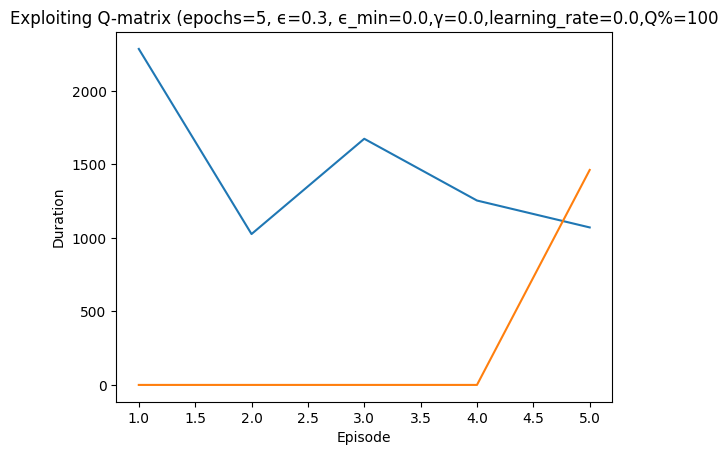

In [8]:
nolearning_results = learner.epsilon_greedy_search(
    cyberbattlechain_10,
    ep,
    learner=a.QTabularLearner(ep, trained=qlearning_bestrun_10['learner'],
                              gamma=0.0, learning_rate=0.0, exploit_percentile=100),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.30,  # 0.35,
    render=False,
    title="Exploiting Q-matrix",
    verbosity=Verbosity.Quiet
)

###### Random search
Learning with: episode_count=5,iteration_count=9000,ϵ=1.0,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=100
  ## Episode: 1/5 'Random search' ϵ=1.0000, γ=0.0,learning_rate=0.0,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:   16.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:   20.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:   20.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  120.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  120.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:  134.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:  134.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward:  140.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward:  140.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 1|Iteration 46|reward:  240.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 1|Iteration 46|reward:  240.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  254.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  254.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 60|reward:  260.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 60|reward:  260.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:  266.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:  266.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:  270.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:  270.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 73|reward:  276.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 73|reward:  276.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 1|Iteration 108|reward:  276.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 1|Iteration 131|reward:  278.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 1|Iteration 131|reward:  278.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 1|Iteration 165|reward:  278.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 1|Iteration 198|reward:  278.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 1|Iteration 225|reward:  278.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 1|Iteration 250|reward:  278.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 1|Iteration 277|reward:  278.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 1|Iteration 311|reward:  278.0|last_reward_at:  131|Elapsed Time: 0:00:01||

Episode 1|Iteration 342|reward:  278.0|last_reward_at:  131|Elapsed Time: 0:00:01||

Episode 1|Iteration 380|reward:  278.0|last_reward_at:  131|Elapsed Time: 0:00:01||

Episode 1|Iteration 418|reward:  278.0|last_reward_at:  131|Elapsed Time: 0:00:01||

Episode 1|Iteration 447|reward:  278.0|last_reward_at:  131|Elapsed Time: 0:00:01||

Episode 1|Iteration 474|reward:  278.0|last_reward_at:  131|Elapsed Time: 0:00:01||

Episode 1|Iteration 513|reward:  278.0|last_reward_at:  131|Elapsed Time: 0:00:01||

Episode 1|Iteration 531|reward:  378.0|last_reward_at:  131|Elapsed Time: 0:00:01||

Episode 1|Iteration 531|reward:  378.0|last_reward_at:  531|Elapsed Time: 0:00:01||

Episode 1|Iteration 560|reward:  378.0|last_reward_at:  531|Elapsed Time: 0:00:01||

Episode 1|Iteration 587|reward:  389.0|last_reward_at:  531|Elapsed Time: 0:00:01||

Episode 1|Iteration 587|reward:  389.0|last_reward_at:  587|Elapsed Time: 0:00:01||

Episode 1|Iteration 597|reward:  397.0|last_reward_at:  587|Elapsed Time: 0:00:01||

Episode 1|Iteration 597|reward:  397.0|last_reward_at:  597|Elapsed Time: 0:00:01||

Episode 1|Iteration 622|reward:  403.0|last_reward_at:  597|Elapsed Time: 0:00:01||

Episode 1|Iteration 622|reward:  403.0|last_reward_at:  622|Elapsed Time: 0:00:01||

Episode 1|Iteration 647|reward:  403.0|last_reward_at:  622|Elapsed Time: 0:00:02||

Episode 1|Iteration 670|reward:  403.0|last_reward_at:  622|Elapsed Time: 0:00:02||

Episode 1|Iteration 684|reward:  403.0|last_reward_at:  622|Elapsed Time: 0:00:02||

Episode 1|Iteration 697|reward:  412.0|last_reward_at:  622|Elapsed Time: 0:00:02||

Episode 1|Iteration 697|reward:  412.0|last_reward_at:  697|Elapsed Time: 0:00:02||

Episode 1|Iteration 725|reward:  412.0|last_reward_at:  697|Elapsed Time: 0:00:02||

Episode 1|Iteration 760|reward:  412.0|last_reward_at:  697|Elapsed Time: 0:00:02||

Episode 1|Iteration 792|reward:  412.0|last_reward_at:  697|Elapsed Time: 0:00:02||

Episode 1|Iteration 829|reward:  412.0|last_reward_at:  697|Elapsed Time: 0:00:02||

Episode 1|Iteration 857|reward:  412.0|last_reward_at:  697|Elapsed Time: 0:00:02||

Episode 1|Iteration 892|reward:  412.0|last_reward_at:  697|Elapsed Time: 0:00:02||

Episode 1|Iteration 912|reward:  412.0|last_reward_at:  697|Elapsed Time: 0:00:02||

Episode 1|Iteration 938|reward:  412.0|last_reward_at:  697|Elapsed Time: 0:00:03||

Episode 1|Iteration 974|reward:  412.0|last_reward_at:  697|Elapsed Time: 0:00:03||

Episode 1|Iteration 1005|reward:  412.0|last_reward_at:  697|Elapsed Time: 0:00:03||

Episode 1|Iteration 1026|reward:  412.0|last_reward_at:  697|Elapsed Time: 0:00:03||

Episode 1|Iteration 1057|reward:  412.0|last_reward_at:  697|Elapsed Time: 0:00:03||

Episode 1|Iteration 1085|reward:  412.0|last_reward_at:  697|Elapsed Time: 0:00:03||

Episode 1|Iteration 1123|reward:  412.0|last_reward_at:  697|Elapsed Time: 0:00:03||

Episode 1|Iteration 1140|reward:  412.0|last_reward_at:  697|Elapsed Time: 0:00:03||

Episode 1|Iteration 1167|reward:  412.0|last_reward_at:  697|Elapsed Time: 0:00:03||

Episode 1|Iteration 1194|reward:  412.0|last_reward_at:  697|Elapsed Time: 0:00:03||

Episode 1|Iteration 1227|reward:  412.0|last_reward_at:  697|Elapsed Time: 0:00:03||

Episode 1|Iteration 1254|reward:  412.0|last_reward_at:  697|Elapsed Time: 0:00:04||

Episode 1|Iteration 1284|reward:  412.0|last_reward_at:  697|Elapsed Time: 0:00:04||

Episode 1|Iteration 1315|reward:  412.0|last_reward_at:  697|Elapsed Time: 0:00:04||

Episode 1|Iteration 1345|reward:  412.0|last_reward_at:  697|Elapsed Time: 0:00:04||

Episode 1|Iteration 1368|reward:  412.0|last_reward_at:  697|Elapsed Time: 0:00:04||

Episode 1|Iteration 1374|reward:  512.0|last_reward_at:  697|Elapsed Time: 0:00:04||

Episode 1|Iteration 1374|reward:  512.0|last_reward_at: 1374|Elapsed Time: 0:00:04||

Episode 1|Iteration 1396|reward:  512.0|last_reward_at: 1374|Elapsed Time: 0:00:04||

Episode 1|Iteration 1418|reward:  512.0|last_reward_at: 1374|Elapsed Time: 0:00:04||

Episode 1|Iteration 1419|reward:  523.0|last_reward_at: 1374|Elapsed Time: 0:00:04||

Episode 1|Iteration 1419|reward:  523.0|last_reward_at: 1419|Elapsed Time: 0:00:04||

Episode 1|Iteration 1438|reward:  523.0|last_reward_at: 1419|Elapsed Time: 0:00:04||

Episode 1|Iteration 1465|reward:  527.0|last_reward_at: 1419|Elapsed Time: 0:00:04||

Episode 1|Iteration 1465|reward:  527.0|last_reward_at: 1465|Elapsed Time: 0:00:04||

Episode 1|Iteration 1482|reward:  527.0|last_reward_at: 1465|Elapsed Time: 0:00:04||

Episode 1|Iteration 1494|reward:  529.0|last_reward_at: 1465|Elapsed Time: 0:00:04||

Episode 1|Iteration 1494|reward:  529.0|last_reward_at: 1494|Elapsed Time: 0:00:04||

Episode 1|Iteration 1519|reward:  529.0|last_reward_at: 1494|Elapsed Time: 0:00:05||

Episode 1|Iteration 1533|reward:  538.0|last_reward_at: 1494|Elapsed Time: 0:00:05||

Episode 1|Iteration 1533|reward:  538.0|last_reward_at: 1533|Elapsed Time: 0:00:05||

Episode 1|Iteration 1563|reward:  538.0|last_reward_at: 1533|Elapsed Time: 0:00:05||

Episode 1|Iteration 1583|reward:  638.0|last_reward_at: 1533|Elapsed Time: 0:00:05||

Episode 1|Iteration 1583|reward:  638.0|last_reward_at: 1583|Elapsed Time: 0:00:05||

Episode 1|Iteration 1595|reward:  638.0|last_reward_at: 1583|Elapsed Time: 0:00:05||

Episode 1|Iteration 1618|reward:  638.0|last_reward_at: 1583|Elapsed Time: 0:00:05||

Episode 1|Iteration 1639|reward:  638.0|last_reward_at: 1583|Elapsed Time: 0:00:05||

Episode 1|Iteration 1641|reward:  652.0|last_reward_at: 1583|Elapsed Time: 0:00:05||

Episode 1|Iteration 1641|reward:  652.0|last_reward_at: 1641|Elapsed Time: 0:00:05||

Episode 1|Iteration 1642|reward:  658.0|last_reward_at: 1641|Elapsed Time: 0:00:05||

Episode 1|Iteration 1642|reward:  658.0|last_reward_at: 1642|Elapsed Time: 0:00:05||

Episode 1|Iteration 1667|reward:  658.0|last_reward_at: 1642|Elapsed Time: 0:00:05||

Episode 1|Iteration 1675|reward:  664.0|last_reward_at: 1642|Elapsed Time: 0:00:05||

Episode 1|Iteration 1675|reward:  664.0|last_reward_at: 1675|Elapsed Time: 0:00:05||

Episode 1|Iteration 1684|reward:  672.0|last_reward_at: 1675|Elapsed Time: 0:00:05||

Episode 1|Iteration 1684|reward:  672.0|last_reward_at: 1684|Elapsed Time: 0:00:05||

Episode 1|Iteration 1703|reward:  672.0|last_reward_at: 1684|Elapsed Time: 0:00:05||

Episode 1|Iteration 1722|reward:  672.0|last_reward_at: 1684|Elapsed Time: 0:00:06||

Episode 1|Iteration 1746|reward:  672.0|last_reward_at: 1684|Elapsed Time: 0:00:06||

Episode 1|Iteration 1770|reward:  672.0|last_reward_at: 1684|Elapsed Time: 0:00:06||

Episode 1|Iteration 1792|reward:  672.0|last_reward_at: 1684|Elapsed Time: 0:00:06||

Episode 1|Iteration 1810|reward:  672.0|last_reward_at: 1684|Elapsed Time: 0:00:06||

Episode 1|Iteration 1823|reward:  672.0|last_reward_at: 1684|Elapsed Time: 0:00:06||

Episode 1|Iteration 1841|reward:  672.0|last_reward_at: 1684|Elapsed Time: 0:00:06||

Episode 1|Iteration 1862|reward:  672.0|last_reward_at: 1684|Elapsed Time: 0:00:06||

Episode 1|Iteration 1882|reward:  672.0|last_reward_at: 1684|Elapsed Time: 0:00:06||

Episode 1|Iteration 1883|reward:  772.0|last_reward_at: 1684|Elapsed Time: 0:00:06||

Episode 1|Iteration 1883|reward:  772.0|last_reward_at: 1883|Elapsed Time: 0:00:06||

Episode 1|Iteration 1886|reward:  786.0|last_reward_at: 1883|Elapsed Time: 0:00:06||

Episode 1|Iteration 1886|reward:  786.0|last_reward_at: 1886|Elapsed Time: 0:00:06||

Episode 1|Iteration 1889|reward:  788.0|last_reward_at: 1886|Elapsed Time: 0:00:06||

Episode 1|Iteration 1889|reward:  788.0|last_reward_at: 1889|Elapsed Time: 0:00:06||

Episode 1|Iteration 1903|reward:  792.0|last_reward_at: 1889|Elapsed Time: 0:00:06||

Episode 1|Iteration 1903|reward:  792.0|last_reward_at: 1903|Elapsed Time: 0:00:06||

Episode 1|Iteration 1925|reward:  792.0|last_reward_at: 1903|Elapsed Time: 0:00:07||

Episode 1|Iteration 1936|reward:  798.0|last_reward_at: 1903|Elapsed Time: 0:00:07||

Episode 1|Iteration 1936|reward:  798.0|last_reward_at: 1936|Elapsed Time: 0:00:07||

Episode 1|Iteration 1951|reward:  798.0|last_reward_at: 1936|Elapsed Time: 0:00:07||

Episode 1|Iteration 1971|reward:  798.0|last_reward_at: 1936|Elapsed Time: 0:00:07||

Episode 1|Iteration 1993|reward:  798.0|last_reward_at: 1936|Elapsed Time: 0:00:07||

Episode 1|Iteration 2009|reward:  898.0|last_reward_at: 1936|Elapsed Time: 0:00:07||

Episode 1|Iteration 2009|reward:  898.0|last_reward_at: 2009|Elapsed Time: 0:00:07||

Episode 1|Iteration 2026|reward:  898.0|last_reward_at: 2009|Elapsed Time: 0:00:07||

Episode 1|Iteration 2042|reward:  898.0|last_reward_at: 2009|Elapsed Time: 0:00:07||

Episode 1|Iteration 2051|reward:  898.0|last_reward_at: 2009|Elapsed Time: 0:00:07||

Episode 1|Iteration 2070|reward:  898.0|last_reward_at: 2009|Elapsed Time: 0:00:07||

Episode 1|Iteration 2090|reward:  898.0|last_reward_at: 2009|Elapsed Time: 0:00:07||

Episode 1|Iteration 2105|reward:  898.0|last_reward_at: 2009|Elapsed Time: 0:00:08||

Episode 1|Iteration 2124|reward:  898.0|last_reward_at: 2009|Elapsed Time: 0:00:08||

Episode 1|Iteration 2140|reward:  898.0|last_reward_at: 2009|Elapsed Time: 0:00:08||

Episode 1|Iteration 2159|reward:  898.0|last_reward_at: 2009|Elapsed Time: 0:00:08||

Episode 1|Iteration 2179|reward:  898.0|last_reward_at: 2009|Elapsed Time: 0:00:08||

Episode 1|Iteration 2185|reward:  912.0|last_reward_at: 2009|Elapsed Time: 0:00:08||

Episode 1|Iteration 2185|reward:  912.0|last_reward_at: 2185|Elapsed Time: 0:00:08||

Episode 1|Iteration 2190|reward:  920.0|last_reward_at: 2185|Elapsed Time: 0:00:08||

Episode 1|Iteration 2190|reward:  920.0|last_reward_at: 2190|Elapsed Time: 0:00:08||

Episode 1|Iteration 2207|reward:  920.0|last_reward_at: 2190|Elapsed Time: 0:00:08||

Episode 1|Iteration 2221|reward:  920.0|last_reward_at: 2190|Elapsed Time: 0:00:08||

Episode 1|Iteration 2238|reward:  920.0|last_reward_at: 2190|Elapsed Time: 0:00:08||

Episode 1|Iteration 2242|reward:  926.0|last_reward_at: 2190|Elapsed Time: 0:00:08||

Episode 1|Iteration 2242|reward:  926.0|last_reward_at: 2242|Elapsed Time: 0:00:08||

Episode 1|Iteration 2245|reward:  932.0|last_reward_at: 2242|Elapsed Time: 0:00:08||

Episode 1|Iteration 2245|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:08||

Episode 1|Iteration 2264|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:08||

Episode 1|Iteration 2279|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:09||

Episode 1|Iteration 2297|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:09||

Episode 1|Iteration 2313|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:09||

Episode 1|Iteration 2329|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:09||

Episode 1|Iteration 2344|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:09||

Episode 1|Iteration 2361|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:09||

Episode 1|Iteration 2379|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:09||

Episode 1|Iteration 2393|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:09||

Episode 1|Iteration 2408|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:09||

Episode 1|Iteration 2425|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:09||

Episode 1|Iteration 2442|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:10||

Episode 1|Iteration 2458|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:10||

Episode 1|Iteration 2472|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:10||

Episode 1|Iteration 2489|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:10||

Episode 1|Iteration 2507|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:10||

Episode 1|Iteration 2524|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:10||

Episode 1|Iteration 2540|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:10||

Episode 1|Iteration 2556|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:10||

Episode 1|Iteration 2573|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:10||

Episode 1|Iteration 2588|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:10||

Episode 1|Iteration 2603|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:11||

Episode 1|Iteration 2621|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:11||

Episode 1|Iteration 2639|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:11||

Episode 1|Iteration 2655|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:11||

Episode 1|Iteration 2670|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:11||

Episode 1|Iteration 2690|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:11||

Episode 1|Iteration 2706|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:11||

Episode 1|Iteration 2722|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:11||

Episode 1|Iteration 2735|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:11||

Episode 1|Iteration 2752|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:11||

Episode 1|Iteration 2768|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:12||

Episode 1|Iteration 2786|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:12||

Episode 1|Iteration 2801|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:12||

Episode 1|Iteration 2818|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:12||

Episode 1|Iteration 2837|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:12||

Episode 1|Iteration 2849|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:12||

Episode 1|Iteration 2867|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:12||

Episode 1|Iteration 2883|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:12||

Episode 1|Iteration 2898|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:12||

Episode 1|Iteration 2916|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:12||

Episode 1|Iteration 2933|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:13||

Episode 1|Iteration 2950|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:13||

Episode 1|Iteration 2963|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:13||

Episode 1|Iteration 2980|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:13||

Episode 1|Iteration 2996|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:13||

Episode 1|Iteration 3012|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:13||

Episode 1|Iteration 3027|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:13||

Episode 1|Iteration 3042|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:13||

Episode 1|Iteration 3059|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:13||

Episode 1|Iteration 3073|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:13||

Episode 1|Iteration 3087|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:14||

Episode 1|Iteration 3102|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:14||

Episode 1|Iteration 3120|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:14||

Episode 1|Iteration 3135|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:14||

Episode 1|Iteration 3149|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:14||

Episode 1|Iteration 3161|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:14||

Episode 1|Iteration 3175|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:14||

Episode 1|Iteration 3189|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:14||

Episode 1|Iteration 3203|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:14||

Episode 1|Iteration 3217|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:14||

Episode 1|Iteration 3232|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:15||

Episode 1|Iteration 3252|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:15||

Episode 1|Iteration 3266|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:15||

Episode 1|Iteration 3283|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:15||

Episode 1|Iteration 3299|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:15||

Episode 1|Iteration 3317|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:15||

Episode 1|Iteration 3336|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:15||

Episode 1|Iteration 3352|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:15||

Episode 1|Iteration 3371|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:15||

Episode 1|Iteration 3390|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:16||

Episode 1|Iteration 3410|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:16||

Episode 1|Iteration 3426|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:16||

Episode 1|Iteration 3442|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:16||

Episode 1|Iteration 3459|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:16||

Episode 1|Iteration 3475|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:16||

Episode 1|Iteration 3490|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:16||

Episode 1|Iteration 3507|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:16||

Episode 1|Iteration 3526|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:16||

Episode 1|Iteration 3541|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:16||

Episode 1|Iteration 3556|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:17||

Episode 1|Iteration 3576|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:17||

Episode 1|Iteration 3595|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:17||

Episode 1|Iteration 3613|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:17||

Episode 1|Iteration 3628|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:17||

Episode 1|Iteration 3645|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:17||

Episode 1|Iteration 3662|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:17||

Episode 1|Iteration 3679|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:17||

Episode 1|Iteration 3698|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:17||

Episode 1|Iteration 3711|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:17||

Episode 1|Iteration 3731|reward:  932.0|last_reward_at: 2245|Elapsed Time: 0:00:18||

Episode 1|Iteration 3743|reward: 1032.0|last_reward_at: 2245|Elapsed Time: 0:00:18||

Episode 1|Iteration 3743|reward: 1032.0|last_reward_at: 3743|Elapsed Time: 0:00:18||

Episode 1|Iteration 3759|reward: 1032.0|last_reward_at: 3743|Elapsed Time: 0:00:18||

Episode 1|Iteration 3774|reward: 1032.0|last_reward_at: 3743|Elapsed Time: 0:00:18||

Episode 1|Iteration 3790|reward: 1032.0|last_reward_at: 3743|Elapsed Time: 0:00:18||

Episode 1|Iteration 3800|reward: 1043.0|last_reward_at: 3743|Elapsed Time: 0:00:18||

Episode 1|Iteration 3800|reward: 1043.0|last_reward_at: 3800|Elapsed Time: 0:00:18||

Episode 1|Iteration 3806|reward: 1045.0|last_reward_at: 3800|Elapsed Time: 0:00:18||

Episode 1|Iteration 3806|reward: 1045.0|last_reward_at: 3806|Elapsed Time: 0:00:18||

Episode 1|Iteration 3821|reward: 1045.0|last_reward_at: 3806|Elapsed Time: 0:00:18||

Episode 1|Iteration 3836|reward: 1045.0|last_reward_at: 3806|Elapsed Time: 0:00:18||

Episode 1|Iteration 3851|reward: 1045.0|last_reward_at: 3806|Elapsed Time: 0:00:18||

Episode 1|Iteration 3866|reward: 1045.0|last_reward_at: 3806|Elapsed Time: 0:00:19||

Episode 1|Iteration 3884|reward: 1045.0|last_reward_at: 3806|Elapsed Time: 0:00:19||

Episode 1|Iteration 3889|reward: 1054.0|last_reward_at: 3806|Elapsed Time: 0:00:19||

Episode 1|Iteration 3889|reward: 1054.0|last_reward_at: 3889|Elapsed Time: 0:00:19||

Episode 1|Iteration 3906|reward: 1054.0|last_reward_at: 3889|Elapsed Time: 0:00:19||

Episode 1|Iteration 3921|reward: 1054.0|last_reward_at: 3889|Elapsed Time: 0:00:19||

Episode 1|Iteration 3937|reward: 1054.0|last_reward_at: 3889|Elapsed Time: 0:00:19||

Episode 1|Iteration 3951|reward: 1054.0|last_reward_at: 3889|Elapsed Time: 0:00:19||

Episode 1|Iteration 3957|reward: 1058.0|last_reward_at: 3889|Elapsed Time: 0:00:19||

Episode 1|Iteration 3957|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:19||

Episode 1|Iteration 3971|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:19||

Episode 1|Iteration 3987|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:19||

Episode 1|Iteration 4003|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:19||

Episode 1|Iteration 4019|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:20||

Episode 1|Iteration 4035|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:20||

Episode 1|Iteration 4053|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:20||

Episode 1|Iteration 4069|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:20||

Episode 1|Iteration 4085|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:20||

Episode 1|Iteration 4100|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:20||

Episode 1|Iteration 4115|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:20||

Episode 1|Iteration 4129|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:20||

Episode 1|Iteration 4147|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:20||

Episode 1|Iteration 4165|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:20||

Episode 1|Iteration 4181|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:21||

Episode 1|Iteration 4198|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:21||

Episode 1|Iteration 4211|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:21||

Episode 1|Iteration 4227|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:21||

Episode 1|Iteration 4242|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:21||

Episode 1|Iteration 4259|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:21||

Episode 1|Iteration 4271|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:21||

Episode 1|Iteration 4284|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:21||

Episode 1|Iteration 4301|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:21||

Episode 1|Iteration 4316|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:22||

Episode 1|Iteration 4328|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:22||

Episode 1|Iteration 4342|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:22||

Episode 1|Iteration 4359|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:22||

Episode 1|Iteration 4372|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:22||

Episode 1|Iteration 4385|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:22||

Episode 1|Iteration 4403|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:22||

Episode 1|Iteration 4419|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:22||

Episode 1|Iteration 4431|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:22||

Episode 1|Iteration 4444|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:22||

Episode 1|Iteration 4459|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:23||

Episode 1|Iteration 4477|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:23||

Episode 1|Iteration 4494|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:23||

Episode 1|Iteration 4508|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:23||

Episode 1|Iteration 4523|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:23||

Episode 1|Iteration 4536|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:23||

Episode 1|Iteration 4549|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:23||

Episode 1|Iteration 4563|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:23||

Episode 1|Iteration 4577|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:23||

Episode 1|Iteration 4592|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:23||

Episode 1|Iteration 4607|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:24||

Episode 1|Iteration 4620|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:24||

Episode 1|Iteration 4633|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:24||

Episode 1|Iteration 4647|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:24||

Episode 1|Iteration 4662|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:24||

Episode 1|Iteration 4671|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:24||

Episode 1|Iteration 4685|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:24||

Episode 1|Iteration 4699|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:24||

Episode 1|Iteration 4714|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:24||

Episode 1|Iteration 4729|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:24||

Episode 1|Iteration 4742|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:25||

Episode 1|Iteration 4757|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:25||

Episode 1|Iteration 4770|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:25||

Episode 1|Iteration 4784|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:25||

Episode 1|Iteration 4798|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:25||

Episode 1|Iteration 4812|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:25||

Episode 1|Iteration 4828|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:25||

Episode 1|Iteration 4842|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:25||

Episode 1|Iteration 4857|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:25||

Episode 1|Iteration 4871|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:26||

Episode 1|Iteration 4888|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:26||

Episode 1|Iteration 4899|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:26||

Episode 1|Iteration 4915|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:26||

Episode 1|Iteration 4930|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:26||

Episode 1|Iteration 4945|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:26||

Episode 1|Iteration 4960|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:26||

Episode 1|Iteration 4975|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:26||

Episode 1|Iteration 4989|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:26||

Episode 1|Iteration 5003|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:26||

Episode 1|Iteration 5013|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:26||

Episode 1|Iteration 5026|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:27||

Episode 1|Iteration 5040|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:27||

Episode 1|Iteration 5056|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:27||

Episode 1|Iteration 5070|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:27||

Episode 1|Iteration 5084|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:27||

Episode 1|Iteration 5097|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:27||

Episode 1|Iteration 5110|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:27||

Episode 1|Iteration 5124|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:27||

Episode 1|Iteration 5138|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:27||

Episode 1|Iteration 5153|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:27||

Episode 1|Iteration 5166|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:28||

Episode 1|Iteration 5184|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:28||

Episode 1|Iteration 5200|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:28||

Episode 1|Iteration 5214|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:28||

Episode 1|Iteration 5227|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:28||

Episode 1|Iteration 5241|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:28||

Episode 1|Iteration 5254|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:28||

Episode 1|Iteration 5267|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:28||

Episode 1|Iteration 5280|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:28||

Episode 1|Iteration 5294|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:29||

Episode 1|Iteration 5307|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:29||

Episode 1|Iteration 5321|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:29||

Episode 1|Iteration 5335|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:29||

Episode 1|Iteration 5348|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:29||

Episode 1|Iteration 5361|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:29||

Episode 1|Iteration 5374|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:29||

Episode 1|Iteration 5387|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:29||

Episode 1|Iteration 5402|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:29||

Episode 1|Iteration 5415|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:29||

Episode 1|Iteration 5432|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:30||

Episode 1|Iteration 5447|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:30||

Episode 1|Iteration 5462|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:30||

Episode 1|Iteration 5478|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:30||

Episode 1|Iteration 5493|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:30||

Episode 1|Iteration 5508|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:30||

Episode 1|Iteration 5524|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:30||

Episode 1|Iteration 5538|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:30||

Episode 1|Iteration 5553|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:30||

Episode 1|Iteration 5566|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:30||

Episode 1|Iteration 5582|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:31||

Episode 1|Iteration 5595|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:31||

Episode 1|Iteration 5608|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:31||

Episode 1|Iteration 5620|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:31||

Episode 1|Iteration 5632|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:31||

Episode 1|Iteration 5645|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:31||

Episode 1|Iteration 5659|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:31||

Episode 1|Iteration 5673|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:31||

Episode 1|Iteration 5686|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:31||

Episode 1|Iteration 5697|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:31||

Episode 1|Iteration 5707|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:32||

Episode 1|Iteration 5719|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:32||

Episode 1|Iteration 5735|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:32||

Episode 1|Iteration 5749|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:32||

Episode 1|Iteration 5765|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:32||

Episode 1|Iteration 5779|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:32||

Episode 1|Iteration 5796|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:32||

Episode 1|Iteration 5809|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:32||

Episode 1|Iteration 5821|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:32||

Episode 1|Iteration 5834|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:33||

Episode 1|Iteration 5847|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:33||

Episode 1|Iteration 5861|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:33||

Episode 1|Iteration 5874|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:33||

Episode 1|Iteration 5887|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:33||

Episode 1|Iteration 5901|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:33||

Episode 1|Iteration 5916|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:33||

Episode 1|Iteration 5925|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:33||

Episode 1|Iteration 5939|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:33||

Episode 1|Iteration 5952|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:33||

Episode 1|Iteration 5965|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:34||

Episode 1|Iteration 5981|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:34||

Episode 1|Iteration 5994|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:34||

Episode 1|Iteration 6009|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:34||

Episode 1|Iteration 6022|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:34||

Episode 1|Iteration 6038|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:34||

Episode 1|Iteration 6055|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:34||

Episode 1|Iteration 6070|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:34||

Episode 1|Iteration 6084|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:34||

Episode 1|Iteration 6098|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:34||

Episode 1|Iteration 6112|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:35||

Episode 1|Iteration 6125|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:35||

Episode 1|Iteration 6141|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:35||

Episode 1|Iteration 6152|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:35||

Episode 1|Iteration 6166|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:35||

Episode 1|Iteration 6180|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:35||

Episode 1|Iteration 6194|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:35||

Episode 1|Iteration 6207|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:35||

Episode 1|Iteration 6221|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:35||

Episode 1|Iteration 6235|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:35||

Episode 1|Iteration 6252|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:36||

Episode 1|Iteration 6266|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:36||

Episode 1|Iteration 6278|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:36||

Episode 1|Iteration 6293|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:36||

Episode 1|Iteration 6308|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:36||

Episode 1|Iteration 6323|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:36||

Episode 1|Iteration 6340|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:36||

Episode 1|Iteration 6353|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:36||

Episode 1|Iteration 6367|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:36||

Episode 1|Iteration 6380|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:36||

Episode 1|Iteration 6397|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:37||

Episode 1|Iteration 6411|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:37||

Episode 1|Iteration 6424|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:37||

Episode 1|Iteration 6440|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:37||

Episode 1|Iteration 6456|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:37||

Episode 1|Iteration 6469|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:37||

Episode 1|Iteration 6481|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:37||

Episode 1|Iteration 6494|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:37||

Episode 1|Iteration 6506|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:37||

Episode 1|Iteration 6521|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:37||

Episode 1|Iteration 6536|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:38||

Episode 1|Iteration 6549|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:38||

Episode 1|Iteration 6565|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:38||

Episode 1|Iteration 6579|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:38||

Episode 1|Iteration 6593|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:38||

Episode 1|Iteration 6608|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:38||

Episode 1|Iteration 6621|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:38||

Episode 1|Iteration 6633|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:38||

Episode 1|Iteration 6648|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:38||

Episode 1|Iteration 6663|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:39||

Episode 1|Iteration 6676|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:39||

Episode 1|Iteration 6692|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:39||

Episode 1|Iteration 6707|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:39||

Episode 1|Iteration 6722|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:39||

Episode 1|Iteration 6735|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:39||

Episode 1|Iteration 6752|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:39||

Episode 1|Iteration 6769|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:39||

Episode 1|Iteration 6782|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:39||

Episode 1|Iteration 6796|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:39||

Episode 1|Iteration 6810|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:40||

Episode 1|Iteration 6825|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:40||

Episode 1|Iteration 6836|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:40||

Episode 1|Iteration 6850|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:40||

Episode 1|Iteration 6868|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:40||

Episode 1|Iteration 6881|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:40||

Episode 1|Iteration 6896|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:40||

Episode 1|Iteration 6910|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:40||

Episode 1|Iteration 6923|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:40||

Episode 1|Iteration 6937|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:40||

Episode 1|Iteration 6949|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:41||

Episode 1|Iteration 6965|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:41||

Episode 1|Iteration 6980|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:41||

Episode 1|Iteration 6993|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:41||

Episode 1|Iteration 7007|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:41||

Episode 1|Iteration 7020|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:41||

Episode 1|Iteration 7035|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:41||

Episode 1|Iteration 7048|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:41||

Episode 1|Iteration 7061|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:41||

Episode 1|Iteration 7075|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:41||

Episode 1|Iteration 7089|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:42||

Episode 1|Iteration 7103|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:42||

Episode 1|Iteration 7117|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:42||

Episode 1|Iteration 7130|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:42||

Episode 1|Iteration 7143|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:42||

Episode 1|Iteration 7157|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:42||

Episode 1|Iteration 7172|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:42||

Episode 1|Iteration 7186|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:42||

Episode 1|Iteration 7200|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:42||

Episode 1|Iteration 7213|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:42||

Episode 1|Iteration 7224|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:43||

Episode 1|Iteration 7239|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:43||

Episode 1|Iteration 7252|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:43||

Episode 1|Iteration 7268|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:43||

Episode 1|Iteration 7283|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:43||

Episode 1|Iteration 7292|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:43||

Episode 1|Iteration 7305|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:43||

Episode 1|Iteration 7319|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:43||

Episode 1|Iteration 7334|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:43||

Episode 1|Iteration 7351|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:43||

Episode 1|Iteration 7364|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:44||

Episode 1|Iteration 7379|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:44||

Episode 1|Iteration 7392|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:44||

Episode 1|Iteration 7405|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:44||

Episode 1|Iteration 7417|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:44||

Episode 1|Iteration 7426|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:44||

Episode 1|Iteration 7440|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:44||

Episode 1|Iteration 7453|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:44||

Episode 1|Iteration 7468|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:44||

Episode 1|Iteration 7482|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:45||

Episode 1|Iteration 7494|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:45||

Episode 1|Iteration 7505|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:45||

Episode 1|Iteration 7517|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:45||

Episode 1|Iteration 7529|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:45||

Episode 1|Iteration 7540|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:45||

Episode 1|Iteration 7554|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:45||

Episode 1|Iteration 7565|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:45||

Episode 1|Iteration 7580|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:45||

Episode 1|Iteration 7596|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:45||

Episode 1|Iteration 7610|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:46||

Episode 1|Iteration 7625|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:46||

Episode 1|Iteration 7633|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:46||

Episode 1|Iteration 7648|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:46||

Episode 1|Iteration 7663|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:46||

Episode 1|Iteration 7677|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:46||

Episode 1|Iteration 7690|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:46||

Episode 1|Iteration 7704|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:46||

Episode 1|Iteration 7718|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:46||

Episode 1|Iteration 7733|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:46||

Episode 1|Iteration 7747|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:47||

Episode 1|Iteration 7762|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:47||

Episode 1|Iteration 7776|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:47||

Episode 1|Iteration 7789|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:47||

Episode 1|Iteration 7804|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:47||

Episode 1|Iteration 7820|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:47||

Episode 1|Iteration 7836|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:47||

Episode 1|Iteration 7848|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:47||

Episode 1|Iteration 7861|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:47||

Episode 1|Iteration 7874|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:47||

Episode 1|Iteration 7888|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:48||

Episode 1|Iteration 7905|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:48||

Episode 1|Iteration 7919|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:48||

Episode 1|Iteration 7932|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:48||

Episode 1|Iteration 7945|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:48||

Episode 1|Iteration 7959|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:48||

Episode 1|Iteration 7973|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:48||

Episode 1|Iteration 7987|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:48||

Episode 1|Iteration 8001|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:48||

Episode 1|Iteration 8016|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:49||

Episode 1|Iteration 8031|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:49||

Episode 1|Iteration 8048|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:49||

Episode 1|Iteration 8063|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:49||

Episode 1|Iteration 8078|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:49||

Episode 1|Iteration 8089|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:49||

Episode 1|Iteration 8102|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:49||

Episode 1|Iteration 8117|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:49||

Episode 1|Iteration 8132|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:49||

Episode 1|Iteration 8147|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:49||

Episode 1|Iteration 8161|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:50||

Episode 1|Iteration 8175|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:50||

Episode 1|Iteration 8193|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:50||

Episode 1|Iteration 8203|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:50||

Episode 1|Iteration 8215|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:50||

Episode 1|Iteration 8228|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:50||

Episode 1|Iteration 8244|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:50||

Episode 1|Iteration 8258|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:50||

Episode 1|Iteration 8273|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:50||

Episode 1|Iteration 8286|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:50||

Episode 1|Iteration 8300|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:51||

Episode 1|Iteration 8315|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:51||

Episode 1|Iteration 8329|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:51||

Episode 1|Iteration 8342|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:51||

Episode 1|Iteration 8358|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:51||

Episode 1|Iteration 8371|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:51||

Episode 1|Iteration 8383|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:51||

Episode 1|Iteration 8399|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:51||

Episode 1|Iteration 8412|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:51||

Episode 1|Iteration 8427|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:51||

Episode 1|Iteration 8443|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:52||

Episode 1|Iteration 8458|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:52||

Episode 1|Iteration 8472|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:52||

Episode 1|Iteration 8486|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:52||

Episode 1|Iteration 8501|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:52||

Episode 1|Iteration 8516|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:52||

Episode 1|Iteration 8532|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:52||

Episode 1|Iteration 8545|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:52||

Episode 1|Iteration 8560|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:52||

Episode 1|Iteration 8573|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:52||

Episode 1|Iteration 8590|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:53||

Episode 1|Iteration 8607|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:53||

Episode 1|Iteration 8623|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:53||

Episode 1|Iteration 8636|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:53||

Episode 1|Iteration 8649|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:53||

Episode 1|Iteration 8659|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:53||

Episode 1|Iteration 8673|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:53||

Episode 1|Iteration 8686|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:53||

Episode 1|Iteration 8699|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:53||

Episode 1|Iteration 8714|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:53||

Episode 1|Iteration 8727|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:54||

Episode 1|Iteration 8739|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:54||

Episode 1|Iteration 8753|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:54||

Episode 1|Iteration 8769|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:54||

Episode 1|Iteration 8782|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:54||

Episode 1|Iteration 8794|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:54||

Episode 1|Iteration 8807|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:54||

Episode 1|Iteration 8821|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:54||

Episode 1|Iteration 8834|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:54||

Episode 1|Iteration 8848|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:55||

Episode 1|Iteration 8861|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:55||

Episode 1|Iteration 8874|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:55||

Episode 1|Iteration 8887|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:55||

Episode 1|Iteration 8901|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:55||

Episode 1|Iteration 8915|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:55||

Episode 1|Iteration 8928|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:55||

Episode 1|Iteration 8941|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:55||

Episode 1|Iteration 8953|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:55||

Episode 1|Iteration 8966|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:55||

Episode 1|Iteration 8980|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:56||

Episode 1|Iteration 8996|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:56||

Episode 1|Iteration 9000|reward: 1058.0|last_reward_at: 3957|Elapsed Time: 0:00:56||

  Episode 1 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 17/2469 (0.01)
    explore-remote: 18/3271 (0.01)
    explore-connect: 8/3217 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Random search' ϵ=1.0000, γ=0.0,learning_rate=0.0,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  116.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  127.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  127.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:  136.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:  136.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  138.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  138.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 37|reward:  144.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 37|reward:  144.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward:  152.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward:  152.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  252.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 63|reward:  263.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 63|reward:  263.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 2|Iteration 65|reward:  272.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 2|Iteration 65|reward:  272.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 2|Iteration 70|reward:  276.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 2|Iteration 70|reward:  276.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:  278.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:  278.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 106|reward:  378.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 106|reward:  378.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 2|Iteration 117|reward:  392.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 2|Iteration 117|reward:  392.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 2|Iteration 125|reward:  398.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 2|Iteration 125|reward:  398.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 2|Iteration 150|reward:  498.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 2|Iteration 150|reward:  498.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 2|Iteration 169|reward:  504.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 2|Iteration 169|reward:  504.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 2|Iteration 173|reward:  515.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 2|Iteration 173|reward:  515.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 2|Iteration 185|reward:  517.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 2|Iteration 185|reward:  517.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 2|Iteration 208|reward:  517.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 2|Iteration 212|reward:  521.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 2|Iteration 212|reward:  521.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 2|Iteration 217|reward:  530.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 2|Iteration 217|reward:  530.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 2|Iteration 240|reward:  530.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 2|Iteration 264|reward:  530.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 2|Iteration 290|reward:  530.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 2|Iteration 316|reward:  530.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 2|Iteration 318|reward:  536.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 2|Iteration 318|reward:  536.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 2|Iteration 342|reward:  536.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 2|Iteration 365|reward:  536.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 2|Iteration 389|reward:  536.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 2|Iteration 410|reward:  536.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 2|Iteration 416|reward:  636.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 2|Iteration 416|reward:  636.0|last_reward_at:  416|Elapsed Time: 0:00:01||

Episode 2|Iteration 439|reward:  636.0|last_reward_at:  416|Elapsed Time: 0:00:01||

Episode 2|Iteration 445|reward:  647.0|last_reward_at:  416|Elapsed Time: 0:00:01||

Episode 2|Iteration 445|reward:  647.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 2|Iteration 456|reward:  647.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 2|Iteration 465|reward:  653.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 2|Iteration 465|reward:  653.0|last_reward_at:  465|Elapsed Time: 0:00:01||

Episode 2|Iteration 471|reward:  661.0|last_reward_at:  465|Elapsed Time: 0:00:01||

Episode 2|Iteration 471|reward:  661.0|last_reward_at:  471|Elapsed Time: 0:00:01||

Episode 2|Iteration 472|reward:  670.0|last_reward_at:  471|Elapsed Time: 0:00:01||

Episode 2|Iteration 472|reward:  670.0|last_reward_at:  472|Elapsed Time: 0:00:01||

Episode 2|Iteration 493|reward:  670.0|last_reward_at:  472|Elapsed Time: 0:00:02||

Episode 2|Iteration 513|reward:  670.0|last_reward_at:  472|Elapsed Time: 0:00:02||

Episode 2|Iteration 530|reward:  670.0|last_reward_at:  472|Elapsed Time: 0:00:02||

Episode 2|Iteration 556|reward:  670.0|last_reward_at:  472|Elapsed Time: 0:00:02||

Episode 2|Iteration 581|reward:  670.0|last_reward_at:  472|Elapsed Time: 0:00:02||

Episode 2|Iteration 607|reward:  670.0|last_reward_at:  472|Elapsed Time: 0:00:02||

Episode 2|Iteration 629|reward:  670.0|last_reward_at:  472|Elapsed Time: 0:00:02||

Episode 2|Iteration 653|reward:  670.0|last_reward_at:  472|Elapsed Time: 0:00:02||

Episode 2|Iteration 671|reward:  770.0|last_reward_at:  472|Elapsed Time: 0:00:02||

Episode 2|Iteration 671|reward:  770.0|last_reward_at:  671|Elapsed Time: 0:00:02||

Episode 2|Iteration 684|reward:  770.0|last_reward_at:  671|Elapsed Time: 0:00:02||

Episode 2|Iteration 704|reward:  770.0|last_reward_at:  671|Elapsed Time: 0:00:02||

Episode 2|Iteration 726|reward:  770.0|last_reward_at:  671|Elapsed Time: 0:00:03||

Episode 2|Iteration 745|reward:  770.0|last_reward_at:  671|Elapsed Time: 0:00:03||

Episode 2|Iteration 767|reward:  770.0|last_reward_at:  671|Elapsed Time: 0:00:03||

Episode 2|Iteration 768|reward:  784.0|last_reward_at:  671|Elapsed Time: 0:00:03||

Episode 2|Iteration 768|reward:  784.0|last_reward_at:  768|Elapsed Time: 0:00:03||

Episode 2|Iteration 772|reward:  786.0|last_reward_at:  768|Elapsed Time: 0:00:03||

Episode 2|Iteration 772|reward:  786.0|last_reward_at:  772|Elapsed Time: 0:00:03||

Episode 2|Iteration 788|reward:  792.0|last_reward_at:  772|Elapsed Time: 0:00:03||

Episode 2|Iteration 788|reward:  792.0|last_reward_at:  788|Elapsed Time: 0:00:03||

Episode 2|Iteration 808|reward:  792.0|last_reward_at:  788|Elapsed Time: 0:00:03||

Episode 2|Iteration 821|reward:  796.0|last_reward_at:  788|Elapsed Time: 0:00:03||

Episode 2|Iteration 821|reward:  796.0|last_reward_at:  821|Elapsed Time: 0:00:03||

Episode 2|Iteration 844|reward:  796.0|last_reward_at:  821|Elapsed Time: 0:00:03||

Episode 2|Iteration 866|reward:  896.0|last_reward_at:  821|Elapsed Time: 0:00:03||

Episode 2|Iteration 866|reward:  896.0|last_reward_at:  866|Elapsed Time: 0:00:03||

Episode 2|Iteration 875|reward:  907.0|last_reward_at:  866|Elapsed Time: 0:00:03||

Episode 2|Iteration 875|reward:  907.0|last_reward_at:  875|Elapsed Time: 0:00:03||

Episode 2|Iteration 894|reward:  907.0|last_reward_at:  875|Elapsed Time: 0:00:03||

Episode 2|Iteration 895|reward:  916.0|last_reward_at:  875|Elapsed Time: 0:00:03||

Episode 2|Iteration 895|reward:  916.0|last_reward_at:  895|Elapsed Time: 0:00:03||

Episode 2|Iteration 912|reward:  916.0|last_reward_at:  895|Elapsed Time: 0:00:04||

Episode 2|Iteration 912|reward:  922.0|last_reward_at:  895|Elapsed Time: 0:00:04||

Episode 2|Iteration 912|reward:  922.0|last_reward_at:  912|Elapsed Time: 0:00:04||

Episode 2|Iteration 913|reward:  930.0|last_reward_at:  912|Elapsed Time: 0:00:04||

Episode 2|Iteration 913|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:04||

Episode 2|Iteration 929|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:04||

Episode 2|Iteration 945|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:04||

Episode 2|Iteration 959|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:04||

Episode 2|Iteration 974|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:04||

Episode 2|Iteration 990|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:04||

Episode 2|Iteration 1006|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:04||

Episode 2|Iteration 1022|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:04||

Episode 2|Iteration 1038|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:04||

Episode 2|Iteration 1057|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:04||

Episode 2|Iteration 1071|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:05||

Episode 2|Iteration 1086|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:05||

Episode 2|Iteration 1105|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:05||

Episode 2|Iteration 1121|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:05||

Episode 2|Iteration 1136|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:05||

Episode 2|Iteration 1152|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:05||

Episode 2|Iteration 1167|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:05||

Episode 2|Iteration 1182|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:05||

Episode 2|Iteration 1198|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:05||

Episode 2|Iteration 1216|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:05||

Episode 2|Iteration 1232|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:06||

Episode 2|Iteration 1249|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:06||

Episode 2|Iteration 1264|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:06||

Episode 2|Iteration 1279|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:06||

Episode 2|Iteration 1293|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:06||

Episode 2|Iteration 1309|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:06||

Episode 2|Iteration 1329|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:06||

Episode 2|Iteration 1348|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:06||

Episode 2|Iteration 1364|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:06||

Episode 2|Iteration 1381|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:07||

Episode 2|Iteration 1394|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:07||

Episode 2|Iteration 1408|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:07||

Episode 2|Iteration 1423|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:07||

Episode 2|Iteration 1439|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:07||

Episode 2|Iteration 1460|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:07||

Episode 2|Iteration 1479|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:07||

Episode 2|Iteration 1496|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:07||

Episode 2|Iteration 1516|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:07||

Episode 2|Iteration 1534|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:07||

Episode 2|Iteration 1552|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:08||

Episode 2|Iteration 1572|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:08||

Episode 2|Iteration 1590|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:08||

Episode 2|Iteration 1611|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:08||

Episode 2|Iteration 1626|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:08||

Episode 2|Iteration 1643|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:08||

Episode 2|Iteration 1660|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:08||

Episode 2|Iteration 1676|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:08||

Episode 2|Iteration 1692|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:08||

Episode 2|Iteration 1707|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:08||

Episode 2|Iteration 1722|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:09||

Episode 2|Iteration 1739|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:09||

Episode 2|Iteration 1753|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:09||

Episode 2|Iteration 1771|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:09||

Episode 2|Iteration 1787|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:09||

Episode 2|Iteration 1805|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:09||

Episode 2|Iteration 1821|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:09||

Episode 2|Iteration 1837|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:09||

Episode 2|Iteration 1858|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:09||

Episode 2|Iteration 1879|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:10||

Episode 2|Iteration 1897|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:10||

Episode 2|Iteration 1915|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:10||

Episode 2|Iteration 1930|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:10||

Episode 2|Iteration 1945|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:10||

Episode 2|Iteration 1962|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:10||

Episode 2|Iteration 1980|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:10||

Episode 2|Iteration 1998|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:10||

Episode 2|Iteration 2016|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:10||

Episode 2|Iteration 2036|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:10||

Episode 2|Iteration 2051|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:11||

Episode 2|Iteration 2067|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:11||

Episode 2|Iteration 2084|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:11||

Episode 2|Iteration 2099|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:11||

Episode 2|Iteration 2114|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:11||

Episode 2|Iteration 2130|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:11||

Episode 2|Iteration 2146|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:11||

Episode 2|Iteration 2163|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:11||

Episode 2|Iteration 2183|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:11||

Episode 2|Iteration 2199|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:11||

Episode 2|Iteration 2214|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:12||

Episode 2|Iteration 2229|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:12||

Episode 2|Iteration 2249|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:12||

Episode 2|Iteration 2264|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:12||

Episode 2|Iteration 2279|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:12||

Episode 2|Iteration 2295|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:12||

Episode 2|Iteration 2314|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:12||

Episode 2|Iteration 2334|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:12||

Episode 2|Iteration 2352|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:12||

Episode 2|Iteration 2371|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:12||

Episode 2|Iteration 2387|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:13||

Episode 2|Iteration 2404|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:13||

Episode 2|Iteration 2422|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:13||

Episode 2|Iteration 2436|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:13||

Episode 2|Iteration 2453|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:13||

Episode 2|Iteration 2468|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:13||

Episode 2|Iteration 2483|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:13||

Episode 2|Iteration 2501|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:13||

Episode 2|Iteration 2522|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:13||

Episode 2|Iteration 2540|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:13||

Episode 2|Iteration 2555|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:14||

Episode 2|Iteration 2570|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:14||

Episode 2|Iteration 2585|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:14||

Episode 2|Iteration 2601|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:14||

Episode 2|Iteration 2621|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:14||

Episode 2|Iteration 2638|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:14||

Episode 2|Iteration 2653|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:14||

Episode 2|Iteration 2671|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:14||

Episode 2|Iteration 2687|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:14||

Episode 2|Iteration 2703|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:14||

Episode 2|Iteration 2721|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:15||

Episode 2|Iteration 2735|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:15||

Episode 2|Iteration 2751|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:15||

Episode 2|Iteration 2768|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:15||

Episode 2|Iteration 2780|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:15||

Episode 2|Iteration 2797|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:15||

Episode 2|Iteration 2813|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:15||

Episode 2|Iteration 2828|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:15||

Episode 2|Iteration 2843|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:15||

Episode 2|Iteration 2861|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:15||

Episode 2|Iteration 2876|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:16||

Episode 2|Iteration 2891|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:16||

Episode 2|Iteration 2906|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:16||

Episode 2|Iteration 2924|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:16||

Episode 2|Iteration 2939|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:16||

Episode 2|Iteration 2953|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:16||

Episode 2|Iteration 2963|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:16||

Episode 2|Iteration 2980|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:16||

Episode 2|Iteration 2997|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:16||

Episode 2|Iteration 3012|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:16||

Episode 2|Iteration 3029|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:17||

Episode 2|Iteration 3049|reward:  930.0|last_reward_at:  913|Elapsed Time: 0:00:17||

Episode 2|Iteration 3055|reward: 1030.0|last_reward_at:  913|Elapsed Time: 0:00:17||

Episode 2|Iteration 3055|reward: 1030.0|last_reward_at: 3055|Elapsed Time: 0:00:17||

Episode 2|Iteration 3073|reward: 1030.0|last_reward_at: 3055|Elapsed Time: 0:00:17||

Episode 2|Iteration 3088|reward: 1030.0|last_reward_at: 3055|Elapsed Time: 0:00:17||

Episode 2|Iteration 3094|reward: 1044.0|last_reward_at: 3055|Elapsed Time: 0:00:17||

Episode 2|Iteration 3094|reward: 1044.0|last_reward_at: 3094|Elapsed Time: 0:00:17||

Episode 2|Iteration 3106|reward: 1044.0|last_reward_at: 3094|Elapsed Time: 0:00:17||

Episode 2|Iteration 3120|reward: 1044.0|last_reward_at: 3094|Elapsed Time: 0:00:17||

Episode 2|Iteration 3127|reward: 1046.0|last_reward_at: 3094|Elapsed Time: 0:00:17||

Episode 2|Iteration 3127|reward: 1046.0|last_reward_at: 3127|Elapsed Time: 0:00:17||

Episode 2|Iteration 3134|reward: 1050.0|last_reward_at: 3127|Elapsed Time: 0:00:17||

Episode 2|Iteration 3134|reward: 1050.0|last_reward_at: 3134|Elapsed Time: 0:00:17||

Episode 2|Iteration 3151|reward: 1050.0|last_reward_at: 3134|Elapsed Time: 0:00:17||

Episode 2|Iteration 3168|reward: 1050.0|last_reward_at: 3134|Elapsed Time: 0:00:17||

Episode 2|Iteration 3182|reward: 1056.0|last_reward_at: 3134|Elapsed Time: 0:00:18||

Episode 2|Iteration 3182|reward: 1056.0|last_reward_at: 3182|Elapsed Time: 0:00:18||

Episode 2|Iteration 3199|reward: 1056.0|last_reward_at: 3182|Elapsed Time: 0:00:18||

Episode 2|Iteration 3202|reward: 1156.0|last_reward_at: 3182|Elapsed Time: 0:00:18||

Episode 2|Iteration 3202|reward: 1156.0|last_reward_at: 3202|Elapsed Time: 0:00:18||

Episode 2|Iteration 3216|reward: 1156.0|last_reward_at: 3202|Elapsed Time: 0:00:18||

Episode 2|Iteration 3217|reward: 1170.0|last_reward_at: 3202|Elapsed Time: 0:00:18||

Episode 2|Iteration 3217|reward: 1170.0|last_reward_at: 3217|Elapsed Time: 0:00:18||

Episode 2|Iteration 3228|reward: 1178.0|last_reward_at: 3217|Elapsed Time: 0:00:18||

Episode 2|Iteration 3228|reward: 1178.0|last_reward_at: 3228|Elapsed Time: 0:00:18||

Episode 2|Iteration 3242|reward: 1178.0|last_reward_at: 3228|Elapsed Time: 0:00:18||

Episode 2|Iteration 3254|reward: 1178.0|last_reward_at: 3228|Elapsed Time: 0:00:18||

Episode 2|Iteration 3265|reward: 1178.0|last_reward_at: 3228|Elapsed Time: 0:00:18||

Episode 2|Iteration 3277|reward: 1178.0|last_reward_at: 3228|Elapsed Time: 0:00:18||

Episode 2|Iteration 3289|reward: 1178.0|last_reward_at: 3228|Elapsed Time: 0:00:18||

Episode 2|Iteration 3299|reward: 1178.0|last_reward_at: 3228|Elapsed Time: 0:00:19||

Episode 2|Iteration 3305|reward: 1184.0|last_reward_at: 3228|Elapsed Time: 0:00:19||

Episode 2|Iteration 3305|reward: 1184.0|last_reward_at: 3305|Elapsed Time: 0:00:19||

Episode 2|Iteration 3316|reward: 1184.0|last_reward_at: 3305|Elapsed Time: 0:00:19||

Episode 2|Iteration 3321|reward: 1190.0|last_reward_at: 3305|Elapsed Time: 0:00:19||

Episode 2|Iteration 3321|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:19||

Episode 2|Iteration 3333|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:19||

Episode 2|Iteration 3347|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:19||

Episode 2|Iteration 3360|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:19||

Episode 2|Iteration 3367|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:19||

Episode 2|Iteration 3377|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:19||

Episode 2|Iteration 3388|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:19||

Episode 2|Iteration 3399|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:19||

Episode 2|Iteration 3411|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:20||

Episode 2|Iteration 3418|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:20||

Episode 2|Iteration 3431|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:20||

Episode 2|Iteration 3445|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:20||

Episode 2|Iteration 3460|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:20||

Episode 2|Iteration 3473|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:20||

Episode 2|Iteration 3485|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:20||

Episode 2|Iteration 3499|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:20||

Episode 2|Iteration 3514|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:20||

Episode 2|Iteration 3527|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:20||

Episode 2|Iteration 3540|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:21||

Episode 2|Iteration 3552|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:21||

Episode 2|Iteration 3567|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:21||

Episode 2|Iteration 3580|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:21||

Episode 2|Iteration 3593|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:21||

Episode 2|Iteration 3605|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:21||

Episode 2|Iteration 3619|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:21||

Episode 2|Iteration 3631|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:21||

Episode 2|Iteration 3643|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:21||

Episode 2|Iteration 3656|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:21||

Episode 2|Iteration 3668|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:22||

Episode 2|Iteration 3681|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:22||

Episode 2|Iteration 3694|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:22||

Episode 2|Iteration 3708|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:22||

Episode 2|Iteration 3723|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:22||

Episode 2|Iteration 3737|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:22||

Episode 2|Iteration 3752|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:22||

Episode 2|Iteration 3760|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:22||

Episode 2|Iteration 3774|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:22||

Episode 2|Iteration 3788|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:22||

Episode 2|Iteration 3801|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:23||

Episode 2|Iteration 3814|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:23||

Episode 2|Iteration 3827|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:23||

Episode 2|Iteration 3841|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:23||

Episode 2|Iteration 3853|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:23||

Episode 2|Iteration 3867|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:23||

Episode 2|Iteration 3880|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:23||

Episode 2|Iteration 3891|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:23||

Episode 2|Iteration 3904|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:23||

Episode 2|Iteration 3917|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:24||

Episode 2|Iteration 3929|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:24||

Episode 2|Iteration 3943|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:24||

Episode 2|Iteration 3955|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:24||

Episode 2|Iteration 3969|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:24||

Episode 2|Iteration 3981|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:24||

Episode 2|Iteration 3996|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:24||

Episode 2|Iteration 4012|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:24||

Episode 2|Iteration 4026|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:24||

Episode 2|Iteration 4038|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:24||

Episode 2|Iteration 4051|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:25||

Episode 2|Iteration 4065|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:25||

Episode 2|Iteration 4081|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:25||

Episode 2|Iteration 4094|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:25||

Episode 2|Iteration 4102|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:25||

Episode 2|Iteration 4114|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:25||

Episode 2|Iteration 4129|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:25||

Episode 2|Iteration 4144|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:25||

Episode 2|Iteration 4155|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:25||

Episode 2|Iteration 4168|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:25||

Episode 2|Iteration 4181|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:26||

Episode 2|Iteration 4193|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:26||

Episode 2|Iteration 4206|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:26||

Episode 2|Iteration 4216|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:26||

Episode 2|Iteration 4227|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:26||

Episode 2|Iteration 4241|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:26||

Episode 2|Iteration 4254|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:26||

Episode 2|Iteration 4268|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:26||

Episode 2|Iteration 4279|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:26||

Episode 2|Iteration 4289|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:26||

Episode 2|Iteration 4300|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:27||

Episode 2|Iteration 4313|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:27||

Episode 2|Iteration 4328|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:27||

Episode 2|Iteration 4341|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:27||

Episode 2|Iteration 4354|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:27||

Episode 2|Iteration 4368|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:27||

Episode 2|Iteration 4383|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:27||

Episode 2|Iteration 4397|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:27||

Episode 2|Iteration 4410|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:27||

Episode 2|Iteration 4420|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:27||

Episode 2|Iteration 4433|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:28||

Episode 2|Iteration 4444|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:28||

Episode 2|Iteration 4455|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:28||

Episode 2|Iteration 4468|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:28||

Episode 2|Iteration 4481|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:28||

Episode 2|Iteration 4495|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:28||

Episode 2|Iteration 4509|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:28||

Episode 2|Iteration 4522|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:28||

Episode 2|Iteration 4533|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:28||

Episode 2|Iteration 4544|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:29||

Episode 2|Iteration 4557|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:29||

Episode 2|Iteration 4569|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:29||

Episode 2|Iteration 4581|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:29||

Episode 2|Iteration 4596|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:29||

Episode 2|Iteration 4609|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:29||

Episode 2|Iteration 4622|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:29||

Episode 2|Iteration 4636|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:29||

Episode 2|Iteration 4650|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:29||

Episode 2|Iteration 4662|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:29||

Episode 2|Iteration 4671|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:29||

Episode 2|Iteration 4683|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:30||

Episode 2|Iteration 4698|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:30||

Episode 2|Iteration 4711|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:30||

Episode 2|Iteration 4724|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:30||

Episode 2|Iteration 4738|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:30||

Episode 2|Iteration 4750|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:30||

Episode 2|Iteration 4764|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:30||

Episode 2|Iteration 4778|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:30||

Episode 2|Iteration 4792|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:30||

Episode 2|Iteration 4804|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:31||

Episode 2|Iteration 4817|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:31||

Episode 2|Iteration 4828|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:31||

Episode 2|Iteration 4840|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:31||

Episode 2|Iteration 4852|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:31||

Episode 2|Iteration 4867|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:31||

Episode 2|Iteration 4881|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:31||

Episode 2|Iteration 4895|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:31||

Episode 2|Iteration 4909|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:31||

Episode 2|Iteration 4922|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:31||

Episode 2|Iteration 4933|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:32||

Episode 2|Iteration 4949|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:32||

Episode 2|Iteration 4964|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:32||

Episode 2|Iteration 4979|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:32||

Episode 2|Iteration 4993|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:32||

Episode 2|Iteration 5005|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:32||

Episode 2|Iteration 5013|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:32||

Episode 2|Iteration 5023|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:32||

Episode 2|Iteration 5035|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:32||

Episode 2|Iteration 5048|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:32||

Episode 2|Iteration 5061|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:33||

Episode 2|Iteration 5074|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:33||

Episode 2|Iteration 5086|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:33||

Episode 2|Iteration 5098|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:33||

Episode 2|Iteration 5109|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:33||

Episode 2|Iteration 5121|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:33||

Episode 2|Iteration 5133|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:33||

Episode 2|Iteration 5146|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:33||

Episode 2|Iteration 5160|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:33||

Episode 2|Iteration 5176|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:33||

Episode 2|Iteration 5191|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:34||

Episode 2|Iteration 5205|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:34||

Episode 2|Iteration 5218|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:34||

Episode 2|Iteration 5233|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:34||

Episode 2|Iteration 5248|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:34||

Episode 2|Iteration 5259|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:34||

Episode 2|Iteration 5273|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:34||

Episode 2|Iteration 5285|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:34||

Episode 2|Iteration 5297|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:34||

Episode 2|Iteration 5310|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:35||

Episode 2|Iteration 5324|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:35||

Episode 2|Iteration 5338|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:35||

Episode 2|Iteration 5350|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:35||

Episode 2|Iteration 5362|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:35||

Episode 2|Iteration 5375|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:35||

Episode 2|Iteration 5387|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:35||

Episode 2|Iteration 5402|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:35||

Episode 2|Iteration 5417|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:35||

Episode 2|Iteration 5433|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:35||

Episode 2|Iteration 5446|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:36||

Episode 2|Iteration 5458|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:36||

Episode 2|Iteration 5469|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:36||

Episode 2|Iteration 5481|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:36||

Episode 2|Iteration 5492|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:36||

Episode 2|Iteration 5504|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:36||

Episode 2|Iteration 5517|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:36||

Episode 2|Iteration 5529|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:36||

Episode 2|Iteration 5542|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:36||

Episode 2|Iteration 5557|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:36||

Episode 2|Iteration 5570|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:37||

Episode 2|Iteration 5581|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:37||

Episode 2|Iteration 5594|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:37||

Episode 2|Iteration 5606|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:37||

Episode 2|Iteration 5618|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:37||

Episode 2|Iteration 5630|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:37||

Episode 2|Iteration 5644|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:37||

Episode 2|Iteration 5657|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:37||

Episode 2|Iteration 5668|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:37||

Episode 2|Iteration 5681|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:38||

Episode 2|Iteration 5694|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:38||

Episode 2|Iteration 5707|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:38||

Episode 2|Iteration 5720|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:38||

Episode 2|Iteration 5735|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:38||

Episode 2|Iteration 5747|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:38||

Episode 2|Iteration 5759|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:38||

Episode 2|Iteration 5773|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:38||

Episode 2|Iteration 5785|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:38||

Episode 2|Iteration 5797|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:38||

Episode 2|Iteration 5810|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:39||

Episode 2|Iteration 5822|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:39||

Episode 2|Iteration 5837|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:39||

Episode 2|Iteration 5848|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:39||

Episode 2|Iteration 5863|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:39||

Episode 2|Iteration 5876|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:39||

Episode 2|Iteration 5889|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:39||

Episode 2|Iteration 5903|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:39||

Episode 2|Iteration 5917|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:39||

Episode 2|Iteration 5925|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:39||

Episode 2|Iteration 5939|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:40||

Episode 2|Iteration 5952|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:40||

Episode 2|Iteration 5963|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:40||

Episode 2|Iteration 5975|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:40||

Episode 2|Iteration 5990|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:40||

Episode 2|Iteration 6003|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:40||

Episode 2|Iteration 6016|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:40||

Episode 2|Iteration 6032|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:40||

Episode 2|Iteration 6044|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:40||

Episode 2|Iteration 6057|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:41||

Episode 2|Iteration 6069|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:41||

Episode 2|Iteration 6083|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:41||

Episode 2|Iteration 6097|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:41||

Episode 2|Iteration 6111|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:41||

Episode 2|Iteration 6122|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:41||

Episode 2|Iteration 6134|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:41||

Episode 2|Iteration 6148|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:41||

Episode 2|Iteration 6163|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:41||

Episode 2|Iteration 6178|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:41||

Episode 2|Iteration 6193|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:42||

Episode 2|Iteration 6207|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:42||

Episode 2|Iteration 6222|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:42||

Episode 2|Iteration 6235|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:42||

Episode 2|Iteration 6247|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:42||

Episode 2|Iteration 6261|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:42||

Episode 2|Iteration 6275|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:42||

Episode 2|Iteration 6289|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:42||

Episode 2|Iteration 6301|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:42||

Episode 2|Iteration 6313|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:43||

Episode 2|Iteration 6326|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:43||

Episode 2|Iteration 6340|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:43||

Episode 2|Iteration 6353|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:43||

Episode 2|Iteration 6366|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:43||

Episode 2|Iteration 6379|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:43||

Episode 2|Iteration 6391|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:43||

Episode 2|Iteration 6403|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:43||

Episode 2|Iteration 6417|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:43||

Episode 2|Iteration 6430|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:43||

Episode 2|Iteration 6446|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:44||

Episode 2|Iteration 6458|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:44||

Episode 2|Iteration 6470|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:44||

Episode 2|Iteration 6482|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:44||

Episode 2|Iteration 6494|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:44||

Episode 2|Iteration 6507|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:44||

Episode 2|Iteration 6521|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:44||

Episode 2|Iteration 6532|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:44||

Episode 2|Iteration 6546|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:44||

Episode 2|Iteration 6560|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:44||

Episode 2|Iteration 6574|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:45||

Episode 2|Iteration 6586|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:45||

Episode 2|Iteration 6598|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:45||

Episode 2|Iteration 6608|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:45||

Episode 2|Iteration 6622|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:45||

Episode 2|Iteration 6634|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:45||

Episode 2|Iteration 6647|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:45||

Episode 2|Iteration 6659|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:45||

Episode 2|Iteration 6671|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:45||

Episode 2|Iteration 6686|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:45||

Episode 2|Iteration 6701|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:46||

Episode 2|Iteration 6714|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:46||

Episode 2|Iteration 6722|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:46||

Episode 2|Iteration 6734|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:46||

Episode 2|Iteration 6745|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:46||

Episode 2|Iteration 6758|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:46||

Episode 2|Iteration 6768|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:46||

Episode 2|Iteration 6780|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:46||

Episode 2|Iteration 6795|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:46||

Episode 2|Iteration 6810|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:46||

Episode 2|Iteration 6824|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:47||

Episode 2|Iteration 6836|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:47||

Episode 2|Iteration 6847|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:47||

Episode 2|Iteration 6860|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:47||

Episode 2|Iteration 6875|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:47||

Episode 2|Iteration 6889|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:47||

Episode 2|Iteration 6902|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:47||

Episode 2|Iteration 6916|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:47||

Episode 2|Iteration 6931|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:47||

Episode 2|Iteration 6946|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:47||

Episode 2|Iteration 6960|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:48||

Episode 2|Iteration 6974|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:48||

Episode 2|Iteration 6986|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:48||

Episode 2|Iteration 7001|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:48||

Episode 2|Iteration 7014|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:48||

Episode 2|Iteration 7028|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:48||

Episode 2|Iteration 7041|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:48||

Episode 2|Iteration 7055|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:48||

Episode 2|Iteration 7064|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:48||

Episode 2|Iteration 7074|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:48||

Episode 2|Iteration 7086|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:49||

Episode 2|Iteration 7098|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:49||

Episode 2|Iteration 7111|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:49||

Episode 2|Iteration 7122|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:49||

Episode 2|Iteration 7133|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:49||

Episode 2|Iteration 7144|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:49||

Episode 2|Iteration 7155|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:49||

Episode 2|Iteration 7165|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:49||

Episode 2|Iteration 7175|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:49||

Episode 2|Iteration 7187|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:50||

Episode 2|Iteration 7199|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:50||

Episode 2|Iteration 7210|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:50||

Episode 2|Iteration 7221|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:50||

Episode 2|Iteration 7230|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:50||

Episode 2|Iteration 7238|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:50||

Episode 2|Iteration 7246|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:50||

Episode 2|Iteration 7257|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:50||

Episode 2|Iteration 7265|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:50||

Episode 2|Iteration 7276|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:50||

Episode 2|Iteration 7288|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:51||

Episode 2|Iteration 7302|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:51||

Episode 2|Iteration 7313|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:51||

Episode 2|Iteration 7326|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:51||

Episode 2|Iteration 7340|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:51||

Episode 2|Iteration 7352|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:51||

Episode 2|Iteration 7366|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:51||

Episode 2|Iteration 7379|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:51||

Episode 2|Iteration 7394|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:51||

Episode 2|Iteration 7406|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:51||

Episode 2|Iteration 7417|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:52||

Episode 2|Iteration 7430|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:52||

Episode 2|Iteration 7441|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:52||

Episode 2|Iteration 7453|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:52||

Episode 2|Iteration 7468|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:52||

Episode 2|Iteration 7480|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:52||

Episode 2|Iteration 7493|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:52||

Episode 2|Iteration 7506|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:52||

Episode 2|Iteration 7519|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:52||

Episode 2|Iteration 7533|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:52||

Episode 2|Iteration 7547|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:53||

Episode 2|Iteration 7559|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:53||

Episode 2|Iteration 7570|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:53||

Episode 2|Iteration 7580|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:53||

Episode 2|Iteration 7594|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:53||

Episode 2|Iteration 7605|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:53||

Episode 2|Iteration 7619|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:53||

Episode 2|Iteration 7631|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:53||

Episode 2|Iteration 7643|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:53||

Episode 2|Iteration 7654|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:54||

Episode 2|Iteration 7665|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:54||

Episode 2|Iteration 7679|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:54||

Episode 2|Iteration 7693|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:54||

Episode 2|Iteration 7707|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:54||

Episode 2|Iteration 7722|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:54||

Episode 2|Iteration 7733|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:54||

Episode 2|Iteration 7746|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:54||

Episode 2|Iteration 7760|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:54||

Episode 2|Iteration 7771|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:54||

Episode 2|Iteration 7786|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:55||

Episode 2|Iteration 7801|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:55||

Episode 2|Iteration 7813|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:55||

Episode 2|Iteration 7825|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:55||

Episode 2|Iteration 7837|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:55||

Episode 2|Iteration 7851|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:55||

Episode 2|Iteration 7861|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:55||

Episode 2|Iteration 7872|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:55||

Episode 2|Iteration 7883|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:55||

Episode 2|Iteration 7895|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:55||

Episode 2|Iteration 7907|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:56||

Episode 2|Iteration 7918|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:56||

Episode 2|Iteration 7933|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:56||

Episode 2|Iteration 7945|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:56||

Episode 2|Iteration 7959|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:56||

Episode 2|Iteration 7972|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:56||

Episode 2|Iteration 7987|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:56||

Episode 2|Iteration 8002|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:56||

Episode 2|Iteration 8017|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:56||

Episode 2|Iteration 8029|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:57||

Episode 2|Iteration 8041|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:57||

Episode 2|Iteration 8054|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:57||

Episode 2|Iteration 8067|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:57||

Episode 2|Iteration 8081|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:57||

Episode 2|Iteration 8089|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:57||

Episode 2|Iteration 8102|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:57||

Episode 2|Iteration 8115|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:57||

Episode 2|Iteration 8127|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:57||

Episode 2|Iteration 8140|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:57||

Episode 2|Iteration 8151|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:58||

Episode 2|Iteration 8163|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:58||

Episode 2|Iteration 8174|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:58||

Episode 2|Iteration 8186|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:58||

Episode 2|Iteration 8199|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:58||

Episode 2|Iteration 8212|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:58||

Episode 2|Iteration 8224|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:58||

Episode 2|Iteration 8235|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:58||

Episode 2|Iteration 8250|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:58||

Episode 2|Iteration 8263|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:58||

Episode 2|Iteration 8274|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:59||

Episode 2|Iteration 8287|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:59||

Episode 2|Iteration 8299|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:59||

Episode 2|Iteration 8312|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:59||

Episode 2|Iteration 8326|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:59||

Episode 2|Iteration 8337|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:59||

Episode 2|Iteration 8349|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:59||

Episode 2|Iteration 8363|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:59||

Episode 2|Iteration 8378|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:00:59||

Episode 2|Iteration 8390|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:00||

Episode 2|Iteration 8402|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:00||

Episode 2|Iteration 8413|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:00||

Episode 2|Iteration 8424|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:00||

Episode 2|Iteration 8431|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:00||

Episode 2|Iteration 8443|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:00||

Episode 2|Iteration 8454|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:00||

Episode 2|Iteration 8465|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:00||

Episode 2|Iteration 8477|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:00||

Episode 2|Iteration 8488|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:00||

Episode 2|Iteration 8500|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:01||

Episode 2|Iteration 8511|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:01||

Episode 2|Iteration 8521|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:01||

Episode 2|Iteration 8533|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:01||

Episode 2|Iteration 8545|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:01||

Episode 2|Iteration 8557|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:01||

Episode 2|Iteration 8569|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:01||

Episode 2|Iteration 8581|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:01||

Episode 2|Iteration 8593|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:01||

Episode 2|Iteration 8607|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:01||

Episode 2|Iteration 8621|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:02||

Episode 2|Iteration 8633|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:02||

Episode 2|Iteration 8647|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:02||

Episode 2|Iteration 8659|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:02||

Episode 2|Iteration 8671|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:02||

Episode 2|Iteration 8682|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:02||

Episode 2|Iteration 8695|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:02||

Episode 2|Iteration 8707|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:02||

Episode 2|Iteration 8719|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:02||

Episode 2|Iteration 8733|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:02||

Episode 2|Iteration 8747|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:03||

Episode 2|Iteration 8758|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:03||

Episode 2|Iteration 8770|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:03||

Episode 2|Iteration 8784|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:03||

Episode 2|Iteration 8796|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:03||

Episode 2|Iteration 8808|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:03||

Episode 2|Iteration 8822|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:03||

Episode 2|Iteration 8834|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:03||

Episode 2|Iteration 8846|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:03||

Episode 2|Iteration 8857|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:04||

Episode 2|Iteration 8871|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:04||

Episode 2|Iteration 8884|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:04||

Episode 2|Iteration 8895|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:04||

Episode 2|Iteration 8907|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:04||

Episode 2|Iteration 8921|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:04||

Episode 2|Iteration 8934|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:04||

Episode 2|Iteration 8947|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:04||

Episode 2|Iteration 8960|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:04||

Episode 2|Iteration 8972|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:04||

Episode 2|Iteration 8985|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:05||

Episode 2|Iteration 8997|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:05||

Episode 2|Iteration 9000|reward: 1190.0|last_reward_at: 3321|Elapsed Time: 0:01:05||

  Episode 2 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2619 (0.01)
    explore-remote: 20/3122 (0.01)
    explore-connect: 9/3211 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Random search' ϵ=1.0000, γ=0.0,learning_rate=0.0,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  120.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  131.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  131.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  139.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  139.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  145.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  145.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward:  154.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 90|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 114|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 154|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 173|reward:  254.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 173|reward:  254.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 3|Iteration 192|reward:  265.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 3|Iteration 192|reward:  265.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 3|Iteration 208|reward:  274.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 3|Iteration 208|reward:  274.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 3|Iteration 214|reward:  276.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 3|Iteration 214|reward:  276.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 3|Iteration 229|reward:  280.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 3|Iteration 229|reward:  280.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 3|Iteration 239|reward:  380.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 3|Iteration 239|reward:  380.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 3|Iteration 275|reward:  380.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 3|Iteration 285|reward:  391.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 3|Iteration 285|reward:  391.0|last_reward_at:  285|Elapsed Time: 0:00:00||

Episode 3|Iteration 303|reward:  399.0|last_reward_at:  285|Elapsed Time: 0:00:00||

Episode 3|Iteration 303|reward:  399.0|last_reward_at:  303|Elapsed Time: 0:00:00||

Episode 3|Iteration 308|reward:  405.0|last_reward_at:  303|Elapsed Time: 0:00:00||

Episode 3|Iteration 308|reward:  405.0|last_reward_at:  308|Elapsed Time: 0:00:00||

Episode 3|Iteration 335|reward:  405.0|last_reward_at:  308|Elapsed Time: 0:00:00||

Episode 3|Iteration 363|reward:  405.0|last_reward_at:  308|Elapsed Time: 0:00:01||

Episode 3|Iteration 391|reward:  405.0|last_reward_at:  308|Elapsed Time: 0:00:01||

Episode 3|Iteration 395|reward:  414.0|last_reward_at:  308|Elapsed Time: 0:00:01||

Episode 3|Iteration 395|reward:  414.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 3|Iteration 421|reward:  414.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 3|Iteration 453|reward:  414.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 3|Iteration 482|reward:  414.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 3|Iteration 519|reward:  414.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 3|Iteration 553|reward:  414.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 3|Iteration 570|reward:  414.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 3|Iteration 598|reward:  414.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 3|Iteration 630|reward:  414.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 3|Iteration 657|reward:  414.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 3|Iteration 680|reward:  414.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 3|Iteration 703|reward:  414.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 3|Iteration 733|reward:  414.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 3|Iteration 757|reward:  414.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 3|Iteration 786|reward:  414.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 3|Iteration 812|reward:  414.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 3|Iteration 840|reward:  414.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 3|Iteration 863|reward:  414.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 3|Iteration 887|reward:  414.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 3|Iteration 912|reward:  414.0|last_reward_at:  395|Elapsed Time: 0:00:03||

Episode 3|Iteration 937|reward:  414.0|last_reward_at:  395|Elapsed Time: 0:00:03||

Episode 3|Iteration 967|reward:  414.0|last_reward_at:  395|Elapsed Time: 0:00:03||

Episode 3|Iteration 992|reward:  414.0|last_reward_at:  395|Elapsed Time: 0:00:03||

Episode 3|Iteration 1015|reward:  514.0|last_reward_at:  395|Elapsed Time: 0:00:03||

Episode 3|Iteration 1015|reward:  514.0|last_reward_at: 1015|Elapsed Time: 0:00:03||

Episode 3|Iteration 1016|reward:  528.0|last_reward_at: 1015|Elapsed Time: 0:00:03||

Episode 3|Iteration 1016|reward:  528.0|last_reward_at: 1016|Elapsed Time: 0:00:03||

Episode 3|Iteration 1038|reward:  528.0|last_reward_at: 1016|Elapsed Time: 0:00:03||

Episode 3|Iteration 1042|reward:  532.0|last_reward_at: 1016|Elapsed Time: 0:00:03||

Episode 3|Iteration 1042|reward:  532.0|last_reward_at: 1042|Elapsed Time: 0:00:03||

Episode 3|Iteration 1057|reward:  534.0|last_reward_at: 1042|Elapsed Time: 0:00:03||

Episode 3|Iteration 1057|reward:  534.0|last_reward_at: 1057|Elapsed Time: 0:00:03||

Episode 3|Iteration 1087|reward:  534.0|last_reward_at: 1057|Elapsed Time: 0:00:03||

Episode 3|Iteration 1111|reward:  534.0|last_reward_at: 1057|Elapsed Time: 0:00:03||

Episode 3|Iteration 1132|reward:  534.0|last_reward_at: 1057|Elapsed Time: 0:00:03||

Episode 3|Iteration 1154|reward:  534.0|last_reward_at: 1057|Elapsed Time: 0:00:04||

Episode 3|Iteration 1156|reward:  540.0|last_reward_at: 1057|Elapsed Time: 0:00:04||

Episode 3|Iteration 1156|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:04||

Episode 3|Iteration 1181|reward:  540.0|last_reward_at: 1156|Elapsed Time: 0:00:04||

Episode 3|Iteration 1205|reward:  640.0|last_reward_at: 1156|Elapsed Time: 0:00:04||

Episode 3|Iteration 1205|reward:  640.0|last_reward_at: 1205|Elapsed Time: 0:00:04||

Episode 3|Iteration 1217|reward:  651.0|last_reward_at: 1205|Elapsed Time: 0:00:04||

Episode 3|Iteration 1217|reward:  651.0|last_reward_at: 1217|Elapsed Time: 0:00:04||

Episode 3|Iteration 1226|reward:  657.0|last_reward_at: 1217|Elapsed Time: 0:00:04||

Episode 3|Iteration 1226|reward:  657.0|last_reward_at: 1226|Elapsed Time: 0:00:04||

Episode 3|Iteration 1247|reward:  657.0|last_reward_at: 1226|Elapsed Time: 0:00:04||

Episode 3|Iteration 1250|reward:  666.0|last_reward_at: 1226|Elapsed Time: 0:00:04||

Episode 3|Iteration 1250|reward:  666.0|last_reward_at: 1250|Elapsed Time: 0:00:04||

Episode 3|Iteration 1275|reward:  666.0|last_reward_at: 1250|Elapsed Time: 0:00:04||

Episode 3|Iteration 1294|reward:  666.0|last_reward_at: 1250|Elapsed Time: 0:00:04||

Episode 3|Iteration 1321|reward:  666.0|last_reward_at: 1250|Elapsed Time: 0:00:04||

Episode 3|Iteration 1335|reward:  674.0|last_reward_at: 1250|Elapsed Time: 0:00:04||

Episode 3|Iteration 1335|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:04||

Episode 3|Iteration 1357|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:04||

Episode 3|Iteration 1368|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:04||

Episode 3|Iteration 1389|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:05||

Episode 3|Iteration 1413|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:05||

Episode 3|Iteration 1435|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:05||

Episode 3|Iteration 1453|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:05||

Episode 3|Iteration 1470|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:05||

Episode 3|Iteration 1482|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:05||

Episode 3|Iteration 1504|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:05||

Episode 3|Iteration 1526|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:05||

Episode 3|Iteration 1549|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:05||

Episode 3|Iteration 1572|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:05||

Episode 3|Iteration 1595|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:06||

Episode 3|Iteration 1611|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:06||

Episode 3|Iteration 1632|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:06||

Episode 3|Iteration 1652|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:06||

Episode 3|Iteration 1673|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:06||

Episode 3|Iteration 1696|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:06||

Episode 3|Iteration 1709|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:06||

Episode 3|Iteration 1731|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:06||

Episode 3|Iteration 1751|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:06||

Episode 3|Iteration 1776|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:06||

Episode 3|Iteration 1799|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:07||

Episode 3|Iteration 1822|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:07||

Episode 3|Iteration 1847|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:07||

Episode 3|Iteration 1864|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:07||

Episode 3|Iteration 1883|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:07||

Episode 3|Iteration 1901|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:07||

Episode 3|Iteration 1922|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:07||

Episode 3|Iteration 1937|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:07||

Episode 3|Iteration 1954|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:07||

Episode 3|Iteration 1971|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:07||

Episode 3|Iteration 1991|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:08||

Episode 3|Iteration 2012|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:08||

Episode 3|Iteration 2037|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:08||

Episode 3|Iteration 2051|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:08||

Episode 3|Iteration 2071|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:08||

Episode 3|Iteration 2095|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:08||

Episode 3|Iteration 2121|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:08||

Episode 3|Iteration 2145|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:08||

Episode 3|Iteration 2164|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:08||

Episode 3|Iteration 2185|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:08||

Episode 3|Iteration 2210|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:09||

Episode 3|Iteration 2235|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:09||

Episode 3|Iteration 2255|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:09||

Episode 3|Iteration 2279|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:09||

Episode 3|Iteration 2303|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:09||

Episode 3|Iteration 2322|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:09||

Episode 3|Iteration 2342|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:09||

Episode 3|Iteration 2367|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:09||

Episode 3|Iteration 2386|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:09||

Episode 3|Iteration 2409|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:09||

Episode 3|Iteration 2433|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:10||

Episode 3|Iteration 2455|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:10||

Episode 3|Iteration 2477|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:10||

Episode 3|Iteration 2499|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:10||

Episode 3|Iteration 2522|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:10||

Episode 3|Iteration 2547|reward:  674.0|last_reward_at: 1335|Elapsed Time: 0:00:10||

Episode 3|Iteration 2550|reward:  774.0|last_reward_at: 1335|Elapsed Time: 0:00:10||

Episode 3|Iteration 2550|reward:  774.0|last_reward_at: 2550|Elapsed Time: 0:00:10||

Episode 3|Iteration 2554|reward:  788.0|last_reward_at: 2550|Elapsed Time: 0:00:10||

Episode 3|Iteration 2554|reward:  788.0|last_reward_at: 2554|Elapsed Time: 0:00:10||

Episode 3|Iteration 2559|reward:  790.0|last_reward_at: 2554|Elapsed Time: 0:00:10||

Episode 3|Iteration 2559|reward:  790.0|last_reward_at: 2559|Elapsed Time: 0:00:10||

Episode 3|Iteration 2580|reward:  790.0|last_reward_at: 2559|Elapsed Time: 0:00:10||

Episode 3|Iteration 2603|reward:  790.0|last_reward_at: 2559|Elapsed Time: 0:00:10||

Episode 3|Iteration 2621|reward:  790.0|last_reward_at: 2559|Elapsed Time: 0:00:10||

Episode 3|Iteration 2623|reward:  796.0|last_reward_at: 2559|Elapsed Time: 0:00:10||

Episode 3|Iteration 2623|reward:  796.0|last_reward_at: 2623|Elapsed Time: 0:00:10||

Episode 3|Iteration 2639|reward:  800.0|last_reward_at: 2623|Elapsed Time: 0:00:11||

Episode 3|Iteration 2639|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:11||

Episode 3|Iteration 2658|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:11||

Episode 3|Iteration 2676|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:11||

Episode 3|Iteration 2694|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:11||

Episode 3|Iteration 2713|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:11||

Episode 3|Iteration 2728|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:11||

Episode 3|Iteration 2743|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:11||

Episode 3|Iteration 2759|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:11||

Episode 3|Iteration 2776|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:11||

Episode 3|Iteration 2794|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:11||

Episode 3|Iteration 2811|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:12||

Episode 3|Iteration 2830|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:12||

Episode 3|Iteration 2847|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:12||

Episode 3|Iteration 2864|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:12||

Episode 3|Iteration 2885|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:12||

Episode 3|Iteration 2904|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:12||

Episode 3|Iteration 2919|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:12||

Episode 3|Iteration 2939|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:12||

Episode 3|Iteration 2958|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:12||

Episode 3|Iteration 2975|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:12||

Episode 3|Iteration 2995|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:13||

Episode 3|Iteration 3015|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:13||

Episode 3|Iteration 3033|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:13||

Episode 3|Iteration 3051|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:13||

Episode 3|Iteration 3070|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:13||

Episode 3|Iteration 3089|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:13||

Episode 3|Iteration 3112|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:13||

Episode 3|Iteration 3131|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:13||

Episode 3|Iteration 3150|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:13||

Episode 3|Iteration 3169|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:14||

Episode 3|Iteration 3187|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:14||

Episode 3|Iteration 3205|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:14||

Episode 3|Iteration 3223|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:14||

Episode 3|Iteration 3237|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:14||

Episode 3|Iteration 3253|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:14||

Episode 3|Iteration 3270|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:14||

Episode 3|Iteration 3287|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:14||

Episode 3|Iteration 3304|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:14||

Episode 3|Iteration 3320|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:14||

Episode 3|Iteration 3334|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:15||

Episode 3|Iteration 3351|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:15||

Episode 3|Iteration 3366|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:15||

Episode 3|Iteration 3381|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:15||

Episode 3|Iteration 3395|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:15||

Episode 3|Iteration 3411|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:15||

Episode 3|Iteration 3427|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:15||

Episode 3|Iteration 3443|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:15||

Episode 3|Iteration 3460|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:15||

Episode 3|Iteration 3471|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:15||

Episode 3|Iteration 3484|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:16||

Episode 3|Iteration 3498|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:16||

Episode 3|Iteration 3513|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:16||

Episode 3|Iteration 3526|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:16||

Episode 3|Iteration 3541|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:16||

Episode 3|Iteration 3558|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:16||

Episode 3|Iteration 3575|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:16||

Episode 3|Iteration 3591|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:16||

Episode 3|Iteration 3612|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:16||

Episode 3|Iteration 3629|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:17||

Episode 3|Iteration 3646|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:17||

Episode 3|Iteration 3666|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:17||

Episode 3|Iteration 3686|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:17||

Episode 3|Iteration 3704|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:17||

Episode 3|Iteration 3721|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:17||

Episode 3|Iteration 3735|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:17||

Episode 3|Iteration 3751|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:17||

Episode 3|Iteration 3772|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:17||

Episode 3|Iteration 3790|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:17||

Episode 3|Iteration 3807|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:18||

Episode 3|Iteration 3825|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:18||

Episode 3|Iteration 3843|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:18||

Episode 3|Iteration 3863|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:18||

Episode 3|Iteration 3874|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:18||

Episode 3|Iteration 3892|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:18||

Episode 3|Iteration 3910|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:18||

Episode 3|Iteration 3929|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:18||

Episode 3|Iteration 3949|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:18||

Episode 3|Iteration 3967|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:18||

Episode 3|Iteration 3986|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:19||

Episode 3|Iteration 4002|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:19||

Episode 3|Iteration 4021|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:19||

Episode 3|Iteration 4041|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:19||

Episode 3|Iteration 4057|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:19||

Episode 3|Iteration 4074|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:19||

Episode 3|Iteration 4094|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:19||

Episode 3|Iteration 4110|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:19||

Episode 3|Iteration 4133|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:19||

Episode 3|Iteration 4154|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:19||

Episode 3|Iteration 4174|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:20||

Episode 3|Iteration 4191|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:20||

Episode 3|Iteration 4207|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:20||

Episode 3|Iteration 4216|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:20||

Episode 3|Iteration 4233|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:20||

Episode 3|Iteration 4253|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:20||

Episode 3|Iteration 4273|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:20||

Episode 3|Iteration 4293|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:20||

Episode 3|Iteration 4313|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:20||

Episode 3|Iteration 4330|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:20||

Episode 3|Iteration 4344|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:20||

Episode 3|Iteration 4364|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:21||

Episode 3|Iteration 4386|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:21||

Episode 3|Iteration 4405|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:21||

Episode 3|Iteration 4425|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:21||

Episode 3|Iteration 4443|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:21||

Episode 3|Iteration 4461|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:21||

Episode 3|Iteration 4479|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:21||

Episode 3|Iteration 4501|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:21||

Episode 3|Iteration 4522|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:21||

Episode 3|Iteration 4537|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:22||

Episode 3|Iteration 4553|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:22||

Episode 3|Iteration 4573|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:22||

Episode 3|Iteration 4593|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:22||

Episode 3|Iteration 4609|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:22||

Episode 3|Iteration 4626|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:22||

Episode 3|Iteration 4645|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:22||

Episode 3|Iteration 4664|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:22||

Episode 3|Iteration 4682|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:22||

Episode 3|Iteration 4702|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:22||

Episode 3|Iteration 4722|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:23||

Episode 3|Iteration 4743|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:23||

Episode 3|Iteration 4763|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:23||

Episode 3|Iteration 4781|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:23||

Episode 3|Iteration 4800|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:23||

Episode 3|Iteration 4818|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:23||

Episode 3|Iteration 4837|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:23||

Episode 3|Iteration 4854|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:23||

Episode 3|Iteration 4873|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:23||

Episode 3|Iteration 4889|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:23||

Episode 3|Iteration 4909|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:24||

Episode 3|Iteration 4931|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:24||

Episode 3|Iteration 4949|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:24||

Episode 3|Iteration 4970|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:24||

Episode 3|Iteration 4987|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:24||

Episode 3|Iteration 5005|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:24||

Episode 3|Iteration 5021|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:24||

Episode 3|Iteration 5037|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:24||

Episode 3|Iteration 5055|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:24||

Episode 3|Iteration 5075|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:24||

Episode 3|Iteration 5094|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:25||

Episode 3|Iteration 5113|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:25||

Episode 3|Iteration 5127|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:25||

Episode 3|Iteration 5145|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:25||

Episode 3|Iteration 5164|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:25||

Episode 3|Iteration 5184|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:25||

Episode 3|Iteration 5202|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:25||

Episode 3|Iteration 5221|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:25||

Episode 3|Iteration 5241|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:25||

Episode 3|Iteration 5259|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:25||

Episode 3|Iteration 5277|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:26||

Episode 3|Iteration 5296|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:26||

Episode 3|Iteration 5314|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:26||

Episode 3|Iteration 5331|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:26||

Episode 3|Iteration 5351|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:26||

Episode 3|Iteration 5369|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:26||

Episode 3|Iteration 5386|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:26||

Episode 3|Iteration 5402|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:26||

Episode 3|Iteration 5418|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:26||

Episode 3|Iteration 5438|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:26||

Episode 3|Iteration 5459|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:27||

Episode 3|Iteration 5469|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:27||

Episode 3|Iteration 5486|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:27||

Episode 3|Iteration 5506|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:27||

Episode 3|Iteration 5522|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:27||

Episode 3|Iteration 5542|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:27||

Episode 3|Iteration 5565|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:27||

Episode 3|Iteration 5583|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:27||

Episode 3|Iteration 5602|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:27||

Episode 3|Iteration 5621|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:27||

Episode 3|Iteration 5637|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:28||

Episode 3|Iteration 5654|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:28||

Episode 3|Iteration 5671|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:28||

Episode 3|Iteration 5685|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:28||

Episode 3|Iteration 5697|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:28||

Episode 3|Iteration 5712|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:28||

Episode 3|Iteration 5731|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:28||

Episode 3|Iteration 5750|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:28||

Episode 3|Iteration 5769|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:28||

Episode 3|Iteration 5787|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:28||

Episode 3|Iteration 5806|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:29||

Episode 3|Iteration 5826|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:29||

Episode 3|Iteration 5847|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:29||

Episode 3|Iteration 5864|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:29||

Episode 3|Iteration 5884|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:29||

Episode 3|Iteration 5902|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:29||

Episode 3|Iteration 5921|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:29||

Episode 3|Iteration 5938|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:29||

Episode 3|Iteration 5957|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:29||

Episode 3|Iteration 5978|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:29||

Episode 3|Iteration 5999|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:30||

Episode 3|Iteration 6019|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:30||

Episode 3|Iteration 6035|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:30||

Episode 3|Iteration 6055|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:30||

Episode 3|Iteration 6072|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:30||

Episode 3|Iteration 6094|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:30||

Episode 3|Iteration 6113|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:30||

Episode 3|Iteration 6133|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:30||

Episode 3|Iteration 6151|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:30||

Episode 3|Iteration 6171|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:30||

Episode 3|Iteration 6191|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:31||

Episode 3|Iteration 6213|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:31||

Episode 3|Iteration 6229|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:31||

Episode 3|Iteration 6245|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:31||

Episode 3|Iteration 6263|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:31||

Episode 3|Iteration 6282|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:31||

Episode 3|Iteration 6298|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:31||

Episode 3|Iteration 6314|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:31||

Episode 3|Iteration 6330|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:31||

Episode 3|Iteration 6347|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:32||

Episode 3|Iteration 6365|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:32||

Episode 3|Iteration 6380|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:32||

Episode 3|Iteration 6396|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:32||

Episode 3|Iteration 6412|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:32||

Episode 3|Iteration 6426|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:32||

Episode 3|Iteration 6445|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:32||

Episode 3|Iteration 6461|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:32||

Episode 3|Iteration 6476|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:32||

Episode 3|Iteration 6492|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:32||

Episode 3|Iteration 6509|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:33||

Episode 3|Iteration 6528|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:33||

Episode 3|Iteration 6547|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:33||

Episode 3|Iteration 6566|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:33||

Episode 3|Iteration 6584|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:33||

Episode 3|Iteration 6596|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:33||

Episode 3|Iteration 6608|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:33||

Episode 3|Iteration 6624|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:33||

Episode 3|Iteration 6643|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:33||

Episode 3|Iteration 6659|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:33||

Episode 3|Iteration 6680|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:34||

Episode 3|Iteration 6702|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:34||

Episode 3|Iteration 6722|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:34||

Episode 3|Iteration 6739|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:34||

Episode 3|Iteration 6752|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:34||

Episode 3|Iteration 6771|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:34||

Episode 3|Iteration 6794|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:34||

Episode 3|Iteration 6813|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:34||

Episode 3|Iteration 6831|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:34||

Episode 3|Iteration 6848|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:34||

Episode 3|Iteration 6867|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:35||

Episode 3|Iteration 6886|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:35||

Episode 3|Iteration 6904|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:35||

Episode 3|Iteration 6921|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:35||

Episode 3|Iteration 6939|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:35||

Episode 3|Iteration 6959|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:35||

Episode 3|Iteration 6978|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:35||

Episode 3|Iteration 6997|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:35||

Episode 3|Iteration 7015|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:35||

Episode 3|Iteration 7035|reward:  800.0|last_reward_at: 2639|Elapsed Time: 0:00:35||

Episode 3|Iteration 7038|reward:  900.0|last_reward_at: 2639|Elapsed Time: 0:00:35||

Episode 3|Iteration 7038|reward:  900.0|last_reward_at: 7038|Elapsed Time: 0:00:35||

Episode 3|Iteration 7058|reward:  900.0|last_reward_at: 7038|Elapsed Time: 0:00:36||

Episode 3|Iteration 7074|reward:  900.0|last_reward_at: 7038|Elapsed Time: 0:00:36||

Episode 3|Iteration 7089|reward:  900.0|last_reward_at: 7038|Elapsed Time: 0:00:36||

Episode 3|Iteration 7103|reward:  900.0|last_reward_at: 7038|Elapsed Time: 0:00:36||

Episode 3|Iteration 7119|reward:  900.0|last_reward_at: 7038|Elapsed Time: 0:00:36||

Episode 3|Iteration 7135|reward:  900.0|last_reward_at: 7038|Elapsed Time: 0:00:36||

Episode 3|Iteration 7149|reward:  911.0|last_reward_at: 7038|Elapsed Time: 0:00:36||

Episode 3|Iteration 7149|reward:  911.0|last_reward_at: 7149|Elapsed Time: 0:00:36||

Episode 3|Iteration 7154|reward:  917.0|last_reward_at: 7149|Elapsed Time: 0:00:36||

Episode 3|Iteration 7154|reward:  917.0|last_reward_at: 7154|Elapsed Time: 0:00:36||

Episode 3|Iteration 7160|reward:  925.0|last_reward_at: 7154|Elapsed Time: 0:00:36||

Episode 3|Iteration 7160|reward:  925.0|last_reward_at: 7160|Elapsed Time: 0:00:36||

Episode 3|Iteration 7175|reward:  925.0|last_reward_at: 7160|Elapsed Time: 0:00:36||

Episode 3|Iteration 7194|reward:  925.0|last_reward_at: 7160|Elapsed Time: 0:00:36||

Episode 3|Iteration 7211|reward:  925.0|last_reward_at: 7160|Elapsed Time: 0:00:37||

Episode 3|Iteration 7228|reward:  925.0|last_reward_at: 7160|Elapsed Time: 0:00:37||

Episode 3|Iteration 7242|reward:  925.0|last_reward_at: 7160|Elapsed Time: 0:00:37||

Episode 3|Iteration 7261|reward:  925.0|last_reward_at: 7160|Elapsed Time: 0:00:37||

Episode 3|Iteration 7278|reward:  925.0|last_reward_at: 7160|Elapsed Time: 0:00:37||

Episode 3|Iteration 7292|reward:  925.0|last_reward_at: 7160|Elapsed Time: 0:00:37||

Episode 3|Iteration 7307|reward:  925.0|last_reward_at: 7160|Elapsed Time: 0:00:37||

Episode 3|Iteration 7324|reward:  925.0|last_reward_at: 7160|Elapsed Time: 0:00:37||

Episode 3|Iteration 7337|reward:  925.0|last_reward_at: 7160|Elapsed Time: 0:00:37||

Episode 3|Iteration 7355|reward:  925.0|last_reward_at: 7160|Elapsed Time: 0:00:37||

Episode 3|Iteration 7374|reward:  925.0|last_reward_at: 7160|Elapsed Time: 0:00:38||

Episode 3|Iteration 7390|reward:  925.0|last_reward_at: 7160|Elapsed Time: 0:00:38||

Episode 3|Iteration 7406|reward:  925.0|last_reward_at: 7160|Elapsed Time: 0:00:38||

Episode 3|Iteration 7422|reward:  925.0|last_reward_at: 7160|Elapsed Time: 0:00:38||

Episode 3|Iteration 7438|reward:  925.0|last_reward_at: 7160|Elapsed Time: 0:00:38||

Episode 3|Iteration 7454|reward:  925.0|last_reward_at: 7160|Elapsed Time: 0:00:38||

Episode 3|Iteration 7472|reward:  925.0|last_reward_at: 7160|Elapsed Time: 0:00:38||

Episode 3|Iteration 7491|reward:  925.0|last_reward_at: 7160|Elapsed Time: 0:00:38||

Episode 3|Iteration 7506|reward:  934.0|last_reward_at: 7160|Elapsed Time: 0:00:38||

Episode 3|Iteration 7506|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:38||

Episode 3|Iteration 7519|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:38||

Episode 3|Iteration 7535|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:39||

Episode 3|Iteration 7552|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:39||

Episode 3|Iteration 7567|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:39||

Episode 3|Iteration 7582|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:39||

Episode 3|Iteration 7599|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:39||

Episode 3|Iteration 7618|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:39||

Episode 3|Iteration 7633|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:39||

Episode 3|Iteration 7646|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:39||

Episode 3|Iteration 7661|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:39||

Episode 3|Iteration 7676|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:39||

Episode 3|Iteration 7693|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:40||

Episode 3|Iteration 7712|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:40||

Episode 3|Iteration 7727|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:40||

Episode 3|Iteration 7743|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:40||

Episode 3|Iteration 7759|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:40||

Episode 3|Iteration 7774|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:40||

Episode 3|Iteration 7791|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:40||

Episode 3|Iteration 7806|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:40||

Episode 3|Iteration 7822|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:40||

Episode 3|Iteration 7841|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:40||

Episode 3|Iteration 7857|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:41||

Episode 3|Iteration 7873|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:41||

Episode 3|Iteration 7888|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:41||

Episode 3|Iteration 7904|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:41||

Episode 3|Iteration 7917|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:41||

Episode 3|Iteration 7933|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:41||

Episode 3|Iteration 7950|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:41||

Episode 3|Iteration 7964|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:41||

Episode 3|Iteration 7975|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:41||

Episode 3|Iteration 7992|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:41||

Episode 3|Iteration 8009|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:42||

Episode 3|Iteration 8023|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:42||

Episode 3|Iteration 8038|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:42||

Episode 3|Iteration 8058|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:42||

Episode 3|Iteration 8072|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:42||

Episode 3|Iteration 8089|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:42||

Episode 3|Iteration 8105|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:42||

Episode 3|Iteration 8122|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:42||

Episode 3|Iteration 8139|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:42||

Episode 3|Iteration 8155|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:42||

Episode 3|Iteration 8171|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:43||

Episode 3|Iteration 8191|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:43||

Episode 3|Iteration 8203|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:43||

Episode 3|Iteration 8221|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:43||

Episode 3|Iteration 8236|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:43||

Episode 3|Iteration 8250|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:43||

Episode 3|Iteration 8266|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:43||

Episode 3|Iteration 8282|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:43||

Episode 3|Iteration 8297|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:43||

Episode 3|Iteration 8313|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:43||

Episode 3|Iteration 8330|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:44||

Episode 3|Iteration 8348|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:44||

Episode 3|Iteration 8364|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:44||

Episode 3|Iteration 8381|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:44||

Episode 3|Iteration 8397|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:44||

Episode 3|Iteration 8412|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:44||

Episode 3|Iteration 8426|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:44||

Episode 3|Iteration 8443|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:44||

Episode 3|Iteration 8458|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:44||

Episode 3|Iteration 8477|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:44||

Episode 3|Iteration 8494|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:45||

Episode 3|Iteration 8509|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:45||

Episode 3|Iteration 8524|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:45||

Episode 3|Iteration 8538|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:45||

Episode 3|Iteration 8553|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:45||

Episode 3|Iteration 8569|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:45||

Episode 3|Iteration 8582|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:45||

Episode 3|Iteration 8597|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:45||

Episode 3|Iteration 8613|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:45||

Episode 3|Iteration 8627|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:46||

Episode 3|Iteration 8641|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:46||

Episode 3|Iteration 8655|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:46||

Episode 3|Iteration 8669|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:46||

Episode 3|Iteration 8683|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:46||

Episode 3|Iteration 8698|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:46||

Episode 3|Iteration 8716|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:46||

Episode 3|Iteration 8728|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:46||

Episode 3|Iteration 8741|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:46||

Episode 3|Iteration 8754|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:46||

Episode 3|Iteration 8768|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:47||

Episode 3|Iteration 8781|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:47||

Episode 3|Iteration 8795|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:47||

Episode 3|Iteration 8809|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:47||

Episode 3|Iteration 8825|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:47||

Episode 3|Iteration 8840|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:47||

Episode 3|Iteration 8857|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:47||

Episode 3|Iteration 8873|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:47||

Episode 3|Iteration 8887|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:47||

Episode 3|Iteration 8904|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:47||

Episode 3|Iteration 8918|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:48||

Episode 3|Iteration 8933|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:48||

Episode 3|Iteration 8951|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:48||

Episode 3|Iteration 8967|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:48||

Episode 3|Iteration 8981|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:48||

Episode 3|Iteration 9000|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:48||

Episode 3|Iteration 9000|reward:  934.0|last_reward_at: 7506|Elapsed Time: 0:00:48||

  Episode 3 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/2466 (0.01)
    explore-remote: 16/3302 (0.00)
    explore-connect: 7/3194 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Random search' ϵ=1.0000, γ=0.0,learning_rate=0.0,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  120.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  131.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  131.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  140.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  140.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward:  148.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward:  148.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  154.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  154.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 68|reward:  154.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:  154.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 151|reward:  154.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 192|reward:  154.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 228|reward:  154.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 278|reward:  154.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 320|reward:  154.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 342|reward:  154.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 345|reward:  254.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 345|reward:  254.0|last_reward_at:  345|Elapsed Time: 0:00:00||

Episode 4|Iteration 381|reward:  265.0|last_reward_at:  345|Elapsed Time: 0:00:00||

Episode 4|Iteration 381|reward:  265.0|last_reward_at:  381|Elapsed Time: 0:00:00||

Episode 4|Iteration 391|reward:  269.0|last_reward_at:  381|Elapsed Time: 0:00:00||

Episode 4|Iteration 391|reward:  269.0|last_reward_at:  391|Elapsed Time: 0:00:00||

Episode 4|Iteration 396|reward:  271.0|last_reward_at:  391|Elapsed Time: 0:00:00||

Episode 4|Iteration 396|reward:  271.0|last_reward_at:  396|Elapsed Time: 0:00:00||

Episode 4|Iteration 421|reward:  280.0|last_reward_at:  396|Elapsed Time: 0:00:01||

Episode 4|Iteration 421|reward:  280.0|last_reward_at:  421|Elapsed Time: 0:00:01||

Episode 4|Iteration 456|reward:  280.0|last_reward_at:  421|Elapsed Time: 0:00:01||

Episode 4|Iteration 493|reward:  280.0|last_reward_at:  421|Elapsed Time: 0:00:01||

Episode 4|Iteration 527|reward:  280.0|last_reward_at:  421|Elapsed Time: 0:00:01||

Episode 4|Iteration 566|reward:  280.0|last_reward_at:  421|Elapsed Time: 0:00:01||

Episode 4|Iteration 596|reward:  280.0|last_reward_at:  421|Elapsed Time: 0:00:01||

Episode 4|Iteration 640|reward:  280.0|last_reward_at:  421|Elapsed Time: 0:00:01||

Episode 4|Iteration 674|reward:  280.0|last_reward_at:  421|Elapsed Time: 0:00:01||

Episode 4|Iteration 703|reward:  280.0|last_reward_at:  421|Elapsed Time: 0:00:01||

Episode 4|Iteration 734|reward:  280.0|last_reward_at:  421|Elapsed Time: 0:00:01||

Episode 4|Iteration 773|reward:  280.0|last_reward_at:  421|Elapsed Time: 0:00:02||

Episode 4|Iteration 798|reward:  280.0|last_reward_at:  421|Elapsed Time: 0:00:02||

Episode 4|Iteration 836|reward:  280.0|last_reward_at:  421|Elapsed Time: 0:00:02||

Episode 4|Iteration 873|reward:  280.0|last_reward_at:  421|Elapsed Time: 0:00:02||

Episode 4|Iteration 879|reward:  380.0|last_reward_at:  421|Elapsed Time: 0:00:02||

Episode 4|Iteration 879|reward:  380.0|last_reward_at:  879|Elapsed Time: 0:00:02||

Episode 4|Iteration 884|reward:  394.0|last_reward_at:  879|Elapsed Time: 0:00:02||

Episode 4|Iteration 884|reward:  394.0|last_reward_at:  884|Elapsed Time: 0:00:02||

Episode 4|Iteration 885|reward:  402.0|last_reward_at:  884|Elapsed Time: 0:00:02||

Episode 4|Iteration 885|reward:  402.0|last_reward_at:  885|Elapsed Time: 0:00:02||

Episode 4|Iteration 886|reward:  408.0|last_reward_at:  885|Elapsed Time: 0:00:02||

Episode 4|Iteration 886|reward:  408.0|last_reward_at:  886|Elapsed Time: 0:00:02||

Episode 4|Iteration 912|reward:  408.0|last_reward_at:  886|Elapsed Time: 0:00:02||

Episode 4|Iteration 939|reward:  408.0|last_reward_at:  886|Elapsed Time: 0:00:02||

Episode 4|Iteration 969|reward:  408.0|last_reward_at:  886|Elapsed Time: 0:00:02||

Episode 4|Iteration 1005|reward:  408.0|last_reward_at:  886|Elapsed Time: 0:00:02||

Episode 4|Iteration 1026|reward:  408.0|last_reward_at:  886|Elapsed Time: 0:00:02||

Episode 4|Iteration 1058|reward:  408.0|last_reward_at:  886|Elapsed Time: 0:00:02||

Episode 4|Iteration 1060|reward:  414.0|last_reward_at:  886|Elapsed Time: 0:00:02||

Episode 4|Iteration 1060|reward:  414.0|last_reward_at: 1060|Elapsed Time: 0:00:02||

Episode 4|Iteration 1092|reward:  414.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 4|Iteration 1101|reward:  514.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 4|Iteration 1101|reward:  514.0|last_reward_at: 1101|Elapsed Time: 0:00:03||

Episode 4|Iteration 1130|reward:  528.0|last_reward_at: 1101|Elapsed Time: 0:00:03||

Episode 4|Iteration 1130|reward:  528.0|last_reward_at: 1130|Elapsed Time: 0:00:03||

Episode 4|Iteration 1134|reward:  532.0|last_reward_at: 1130|Elapsed Time: 0:00:03||

Episode 4|Iteration 1134|reward:  532.0|last_reward_at: 1134|Elapsed Time: 0:00:03||

Episode 4|Iteration 1164|reward:  532.0|last_reward_at: 1134|Elapsed Time: 0:00:03||

Episode 4|Iteration 1177|reward:  534.0|last_reward_at: 1134|Elapsed Time: 0:00:03||

Episode 4|Iteration 1177|reward:  534.0|last_reward_at: 1177|Elapsed Time: 0:00:03||

Episode 4|Iteration 1203|reward:  534.0|last_reward_at: 1177|Elapsed Time: 0:00:03||

Episode 4|Iteration 1212|reward:  540.0|last_reward_at: 1177|Elapsed Time: 0:00:03||

Episode 4|Iteration 1212|reward:  540.0|last_reward_at: 1212|Elapsed Time: 0:00:03||

Episode 4|Iteration 1233|reward:  540.0|last_reward_at: 1212|Elapsed Time: 0:00:03||

Episode 4|Iteration 1254|reward:  540.0|last_reward_at: 1212|Elapsed Time: 0:00:03||

Episode 4|Iteration 1279|reward:  540.0|last_reward_at: 1212|Elapsed Time: 0:00:03||

Episode 4|Iteration 1300|reward:  540.0|last_reward_at: 1212|Elapsed Time: 0:00:03||

Episode 4|Iteration 1327|reward:  540.0|last_reward_at: 1212|Elapsed Time: 0:00:03||

Episode 4|Iteration 1355|reward:  540.0|last_reward_at: 1212|Elapsed Time: 0:00:04||

Episode 4|Iteration 1362|reward:  640.0|last_reward_at: 1212|Elapsed Time: 0:00:04||

Episode 4|Iteration 1362|reward:  640.0|last_reward_at: 1362|Elapsed Time: 0:00:04||

Episode 4|Iteration 1382|reward:  651.0|last_reward_at: 1362|Elapsed Time: 0:00:04||

Episode 4|Iteration 1382|reward:  651.0|last_reward_at: 1382|Elapsed Time: 0:00:04||

Episode 4|Iteration 1408|reward:  651.0|last_reward_at: 1382|Elapsed Time: 0:00:04||

Episode 4|Iteration 1416|reward:  657.0|last_reward_at: 1382|Elapsed Time: 0:00:04||

Episode 4|Iteration 1416|reward:  657.0|last_reward_at: 1416|Elapsed Time: 0:00:04||

Episode 4|Iteration 1420|reward:  665.0|last_reward_at: 1416|Elapsed Time: 0:00:04||

Episode 4|Iteration 1420|reward:  665.0|last_reward_at: 1420|Elapsed Time: 0:00:04||

Episode 4|Iteration 1438|reward:  665.0|last_reward_at: 1420|Elapsed Time: 0:00:04||

Episode 4|Iteration 1458|reward:  665.0|last_reward_at: 1420|Elapsed Time: 0:00:04||

Episode 4|Iteration 1478|reward:  665.0|last_reward_at: 1420|Elapsed Time: 0:00:04||

Episode 4|Iteration 1501|reward:  665.0|last_reward_at: 1420|Elapsed Time: 0:00:04||

Episode 4|Iteration 1522|reward:  665.0|last_reward_at: 1420|Elapsed Time: 0:00:04||

Episode 4|Iteration 1542|reward:  665.0|last_reward_at: 1420|Elapsed Time: 0:00:04||

Episode 4|Iteration 1546|reward:  674.0|last_reward_at: 1420|Elapsed Time: 0:00:04||

Episode 4|Iteration 1546|reward:  674.0|last_reward_at: 1546|Elapsed Time: 0:00:04||

Episode 4|Iteration 1571|reward:  674.0|last_reward_at: 1546|Elapsed Time: 0:00:05||

Episode 4|Iteration 1593|reward:  674.0|last_reward_at: 1546|Elapsed Time: 0:00:05||

Episode 4|Iteration 1614|reward:  674.0|last_reward_at: 1546|Elapsed Time: 0:00:05||

Episode 4|Iteration 1637|reward:  674.0|last_reward_at: 1546|Elapsed Time: 0:00:05||

Episode 4|Iteration 1661|reward:  674.0|last_reward_at: 1546|Elapsed Time: 0:00:05||

Episode 4|Iteration 1683|reward:  674.0|last_reward_at: 1546|Elapsed Time: 0:00:05||

Episode 4|Iteration 1703|reward:  674.0|last_reward_at: 1546|Elapsed Time: 0:00:05||

Episode 4|Iteration 1728|reward:  674.0|last_reward_at: 1546|Elapsed Time: 0:00:05||

Episode 4|Iteration 1748|reward:  674.0|last_reward_at: 1546|Elapsed Time: 0:00:05||

Episode 4|Iteration 1772|reward:  674.0|last_reward_at: 1546|Elapsed Time: 0:00:06||

Episode 4|Iteration 1794|reward:  674.0|last_reward_at: 1546|Elapsed Time: 0:00:06||

Episode 4|Iteration 1816|reward:  674.0|last_reward_at: 1546|Elapsed Time: 0:00:06||

Episode 4|Iteration 1840|reward:  674.0|last_reward_at: 1546|Elapsed Time: 0:00:06||

Episode 4|Iteration 1858|reward:  674.0|last_reward_at: 1546|Elapsed Time: 0:00:06||

Episode 4|Iteration 1881|reward:  674.0|last_reward_at: 1546|Elapsed Time: 0:00:06||

Episode 4|Iteration 1901|reward:  674.0|last_reward_at: 1546|Elapsed Time: 0:00:06||

Episode 4|Iteration 1920|reward:  674.0|last_reward_at: 1546|Elapsed Time: 0:00:06||

Episode 4|Iteration 1934|reward:  774.0|last_reward_at: 1546|Elapsed Time: 0:00:06||

Episode 4|Iteration 1934|reward:  774.0|last_reward_at: 1934|Elapsed Time: 0:00:06||

Episode 4|Iteration 1955|reward:  774.0|last_reward_at: 1934|Elapsed Time: 0:00:06||

Episode 4|Iteration 1978|reward:  774.0|last_reward_at: 1934|Elapsed Time: 0:00:06||

Episode 4|Iteration 1987|reward:  788.0|last_reward_at: 1934|Elapsed Time: 0:00:07||

Episode 4|Iteration 1987|reward:  788.0|last_reward_at: 1987|Elapsed Time: 0:00:07||

Episode 4|Iteration 2006|reward:  788.0|last_reward_at: 1987|Elapsed Time: 0:00:07||

Episode 4|Iteration 2026|reward:  790.0|last_reward_at: 1987|Elapsed Time: 0:00:07||

Episode 4|Iteration 2026|reward:  790.0|last_reward_at: 2026|Elapsed Time: 0:00:07||

Episode 4|Iteration 2027|reward:  794.0|last_reward_at: 2026|Elapsed Time: 0:00:07||

Episode 4|Iteration 2027|reward:  794.0|last_reward_at: 2027|Elapsed Time: 0:00:07||

Episode 4|Iteration 2047|reward:  800.0|last_reward_at: 2027|Elapsed Time: 0:00:07||

Episode 4|Iteration 2047|reward:  800.0|last_reward_at: 2047|Elapsed Time: 0:00:07||

Episode 4|Iteration 2063|reward:  800.0|last_reward_at: 2047|Elapsed Time: 0:00:07||

Episode 4|Iteration 2080|reward:  800.0|last_reward_at: 2047|Elapsed Time: 0:00:07||

Episode 4|Iteration 2096|reward:  800.0|last_reward_at: 2047|Elapsed Time: 0:00:07||

Episode 4|Iteration 2112|reward:  800.0|last_reward_at: 2047|Elapsed Time: 0:00:07||

Episode 4|Iteration 2131|reward:  800.0|last_reward_at: 2047|Elapsed Time: 0:00:07||

Episode 4|Iteration 2149|reward:  800.0|last_reward_at: 2047|Elapsed Time: 0:00:07||

Episode 4|Iteration 2165|reward:  800.0|last_reward_at: 2047|Elapsed Time: 0:00:08||

Episode 4|Iteration 2185|reward:  800.0|last_reward_at: 2047|Elapsed Time: 0:00:08||

Episode 4|Iteration 2204|reward:  800.0|last_reward_at: 2047|Elapsed Time: 0:00:08||

Episode 4|Iteration 2223|reward:  800.0|last_reward_at: 2047|Elapsed Time: 0:00:08||

Episode 4|Iteration 2239|reward:  800.0|last_reward_at: 2047|Elapsed Time: 0:00:08||

Episode 4|Iteration 2245|reward:  900.0|last_reward_at: 2047|Elapsed Time: 0:00:08||

Episode 4|Iteration 2245|reward:  900.0|last_reward_at: 2245|Elapsed Time: 0:00:08||

Episode 4|Iteration 2262|reward:  900.0|last_reward_at: 2245|Elapsed Time: 0:00:08||

Episode 4|Iteration 2279|reward:  900.0|last_reward_at: 2245|Elapsed Time: 0:00:08||

Episode 4|Iteration 2294|reward:  900.0|last_reward_at: 2245|Elapsed Time: 0:00:08||

Episode 4|Iteration 2309|reward:  900.0|last_reward_at: 2245|Elapsed Time: 0:00:08||

Episode 4|Iteration 2323|reward:  900.0|last_reward_at: 2245|Elapsed Time: 0:00:09||

Episode 4|Iteration 2328|reward:  914.0|last_reward_at: 2245|Elapsed Time: 0:00:09||

Episode 4|Iteration 2328|reward:  914.0|last_reward_at: 2328|Elapsed Time: 0:00:09||

Episode 4|Iteration 2345|reward:  914.0|last_reward_at: 2328|Elapsed Time: 0:00:09||

Episode 4|Iteration 2361|reward:  914.0|last_reward_at: 2328|Elapsed Time: 0:00:09||

Episode 4|Iteration 2379|reward:  914.0|last_reward_at: 2328|Elapsed Time: 0:00:09||

Episode 4|Iteration 2384|reward:  920.0|last_reward_at: 2328|Elapsed Time: 0:00:09||

Episode 4|Iteration 2384|reward:  920.0|last_reward_at: 2384|Elapsed Time: 0:00:09||

Episode 4|Iteration 2393|reward:  920.0|last_reward_at: 2384|Elapsed Time: 0:00:09||

Episode 4|Iteration 2409|reward:  920.0|last_reward_at: 2384|Elapsed Time: 0:00:09||

Episode 4|Iteration 2410|reward:  928.0|last_reward_at: 2384|Elapsed Time: 0:00:09||

Episode 4|Iteration 2410|reward:  928.0|last_reward_at: 2410|Elapsed Time: 0:00:09||

Episode 4|Iteration 2427|reward:  928.0|last_reward_at: 2410|Elapsed Time: 0:00:09||

Episode 4|Iteration 2443|reward:  928.0|last_reward_at: 2410|Elapsed Time: 0:00:09||

Episode 4|Iteration 2455|reward:  928.0|last_reward_at: 2410|Elapsed Time: 0:00:09||

Episode 4|Iteration 2470|reward:  928.0|last_reward_at: 2410|Elapsed Time: 0:00:09||

Episode 4|Iteration 2481|reward:  934.0|last_reward_at: 2410|Elapsed Time: 0:00:10||

Episode 4|Iteration 2481|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:10||

Episode 4|Iteration 2498|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:10||

Episode 4|Iteration 2519|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:10||

Episode 4|Iteration 2538|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:10||

Episode 4|Iteration 2555|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:10||

Episode 4|Iteration 2570|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:10||

Episode 4|Iteration 2589|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:10||

Episode 4|Iteration 2609|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:10||

Episode 4|Iteration 2621|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:10||

Episode 4|Iteration 2635|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:10||

Episode 4|Iteration 2650|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:11||

Episode 4|Iteration 2665|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:11||

Episode 4|Iteration 2680|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:11||

Episode 4|Iteration 2695|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:11||

Episode 4|Iteration 2711|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:11||

Episode 4|Iteration 2730|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:11||

Episode 4|Iteration 2751|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:11||

Episode 4|Iteration 2772|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:11||

Episode 4|Iteration 2790|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:11||

Episode 4|Iteration 2805|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:11||

Episode 4|Iteration 2822|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:12||

Episode 4|Iteration 2837|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:12||

Episode 4|Iteration 2849|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:12||

Episode 4|Iteration 2865|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:12||

Episode 4|Iteration 2882|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:12||

Episode 4|Iteration 2902|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:12||

Episode 4|Iteration 2920|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:12||

Episode 4|Iteration 2934|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:12||

Episode 4|Iteration 2951|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:12||

Episode 4|Iteration 2963|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:12||

Episode 4|Iteration 2979|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:13||

Episode 4|Iteration 2995|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:13||

Episode 4|Iteration 3012|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:13||

Episode 4|Iteration 3030|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:13||

Episode 4|Iteration 3047|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:13||

Episode 4|Iteration 3065|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:13||

Episode 4|Iteration 3076|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:13||

Episode 4|Iteration 3094|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:13||

Episode 4|Iteration 3109|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:13||

Episode 4|Iteration 3125|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:13||

Episode 4|Iteration 3140|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:14||

Episode 4|Iteration 3156|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:14||

Episode 4|Iteration 3173|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:14||

Episode 4|Iteration 3188|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:14||

Episode 4|Iteration 3207|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:14||

Episode 4|Iteration 3222|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:14||

Episode 4|Iteration 3239|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:14||

Episode 4|Iteration 3255|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:14||

Episode 4|Iteration 3270|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:14||

Episode 4|Iteration 3286|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:14||

Episode 4|Iteration 3300|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:15||

Episode 4|Iteration 3319|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:15||

Episode 4|Iteration 3338|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:15||

Episode 4|Iteration 3354|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:15||

Episode 4|Iteration 3369|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:15||

Episode 4|Iteration 3384|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:15||

Episode 4|Iteration 3398|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:15||

Episode 4|Iteration 3411|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:15||

Episode 4|Iteration 3418|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:15||

Episode 4|Iteration 3432|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:15||

Episode 4|Iteration 3448|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:16||

Episode 4|Iteration 3462|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:16||

Episode 4|Iteration 3479|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:16||

Episode 4|Iteration 3499|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:16||

Episode 4|Iteration 3517|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:16||

Episode 4|Iteration 3531|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:16||

Episode 4|Iteration 3547|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:16||

Episode 4|Iteration 3567|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:16||

Episode 4|Iteration 3585|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:16||

Episode 4|Iteration 3602|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:16||

Episode 4|Iteration 3621|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:17||

Episode 4|Iteration 3641|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:17||

Episode 4|Iteration 3657|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:17||

Episode 4|Iteration 3673|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:17||

Episode 4|Iteration 3689|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:17||

Episode 4|Iteration 3703|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:17||

Episode 4|Iteration 3718|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:17||

Episode 4|Iteration 3733|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:17||

Episode 4|Iteration 3749|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:17||

Episode 4|Iteration 3760|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:17||

Episode 4|Iteration 3777|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:18||

Episode 4|Iteration 3792|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:18||

Episode 4|Iteration 3809|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:18||

Episode 4|Iteration 3826|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:18||

Episode 4|Iteration 3841|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:18||

Episode 4|Iteration 3861|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:18||

Episode 4|Iteration 3874|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:18||

Episode 4|Iteration 3890|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:18||

Episode 4|Iteration 3906|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:18||

Episode 4|Iteration 3922|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:18||

Episode 4|Iteration 3937|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:19||

Episode 4|Iteration 3952|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:19||

Episode 4|Iteration 3967|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:19||

Episode 4|Iteration 3984|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:19||

Episode 4|Iteration 4002|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:19||

Episode 4|Iteration 4018|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:19||

Episode 4|Iteration 4033|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:19||

Episode 4|Iteration 4049|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:19||

Episode 4|Iteration 4066|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:19||

Episode 4|Iteration 4081|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:19||

Episode 4|Iteration 4098|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:20||

Episode 4|Iteration 4115|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:20||

Episode 4|Iteration 4132|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:20||

Episode 4|Iteration 4147|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:20||

Episode 4|Iteration 4162|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:20||

Episode 4|Iteration 4177|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:20||

Episode 4|Iteration 4196|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:20||

Episode 4|Iteration 4210|reward:  934.0|last_reward_at: 2481|Elapsed Time: 0:00:20||

Episode 4|Iteration 4217|reward: 1034.0|last_reward_at: 2481|Elapsed Time: 0:00:20||

Episode 4|Iteration 4217|reward: 1034.0|last_reward_at: 4217|Elapsed Time: 0:00:20||

Episode 4|Iteration 4231|reward: 1034.0|last_reward_at: 4217|Elapsed Time: 0:00:20||

Episode 4|Iteration 4246|reward: 1034.0|last_reward_at: 4217|Elapsed Time: 0:00:21||

Episode 4|Iteration 4263|reward: 1034.0|last_reward_at: 4217|Elapsed Time: 0:00:21||

Episode 4|Iteration 4280|reward: 1034.0|last_reward_at: 4217|Elapsed Time: 0:00:21||

Episode 4|Iteration 4295|reward: 1034.0|last_reward_at: 4217|Elapsed Time: 0:00:21||

Episode 4|Iteration 4310|reward: 1034.0|last_reward_at: 4217|Elapsed Time: 0:00:21||

Episode 4|Iteration 4314|reward: 1045.0|last_reward_at: 4217|Elapsed Time: 0:00:21||

Episode 4|Iteration 4314|reward: 1045.0|last_reward_at: 4314|Elapsed Time: 0:00:21||

Episode 4|Iteration 4317|reward: 1049.0|last_reward_at: 4314|Elapsed Time: 0:00:21||

Episode 4|Iteration 4317|reward: 1049.0|last_reward_at: 4317|Elapsed Time: 0:00:21||

Episode 4|Iteration 4330|reward: 1049.0|last_reward_at: 4317|Elapsed Time: 0:00:21||

Episode 4|Iteration 4333|reward: 1051.0|last_reward_at: 4317|Elapsed Time: 0:00:21||

Episode 4|Iteration 4333|reward: 1051.0|last_reward_at: 4333|Elapsed Time: 0:00:21||

Episode 4|Iteration 4347|reward: 1051.0|last_reward_at: 4333|Elapsed Time: 0:00:21||

Episode 4|Iteration 4359|reward: 1051.0|last_reward_at: 4333|Elapsed Time: 0:00:21||

Episode 4|Iteration 4376|reward: 1051.0|last_reward_at: 4333|Elapsed Time: 0:00:21||

Episode 4|Iteration 4386|reward: 1060.0|last_reward_at: 4333|Elapsed Time: 0:00:22||

Episode 4|Iteration 4386|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:22||

Episode 4|Iteration 4400|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:22||

Episode 4|Iteration 4412|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:22||

Episode 4|Iteration 4427|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:22||

Episode 4|Iteration 4441|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:22||

Episode 4|Iteration 4454|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:22||

Episode 4|Iteration 4470|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:22||

Episode 4|Iteration 4487|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:22||

Episode 4|Iteration 4503|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:22||

Episode 4|Iteration 4518|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:22||

Episode 4|Iteration 4531|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:23||

Episode 4|Iteration 4545|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:23||

Episode 4|Iteration 4557|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:23||

Episode 4|Iteration 4569|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:23||

Episode 4|Iteration 4585|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:23||

Episode 4|Iteration 4599|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:23||

Episode 4|Iteration 4612|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:23||

Episode 4|Iteration 4628|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:23||

Episode 4|Iteration 4644|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:23||

Episode 4|Iteration 4660|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:23||

Episode 4|Iteration 4671|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:24||

Episode 4|Iteration 4686|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:24||

Episode 4|Iteration 4701|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:24||

Episode 4|Iteration 4715|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:24||

Episode 4|Iteration 4726|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:24||

Episode 4|Iteration 4743|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:24||

Episode 4|Iteration 4758|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:24||

Episode 4|Iteration 4772|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:24||

Episode 4|Iteration 4785|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:24||

Episode 4|Iteration 4800|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:24||

Episode 4|Iteration 4817|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:25||

Episode 4|Iteration 4834|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:25||

Episode 4|Iteration 4851|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:25||

Episode 4|Iteration 4868|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:25||

Episode 4|Iteration 4884|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:25||

Episode 4|Iteration 4898|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:25||

Episode 4|Iteration 4913|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:25||

Episode 4|Iteration 4926|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:25||

Episode 4|Iteration 4941|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:25||

Episode 4|Iteration 4956|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:25||

Episode 4|Iteration 4973|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:26||

Episode 4|Iteration 4989|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:26||

Episode 4|Iteration 5003|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:26||

Episode 4|Iteration 5013|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:26||

Episode 4|Iteration 5027|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:26||

Episode 4|Iteration 5041|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:26||

Episode 4|Iteration 5056|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:26||

Episode 4|Iteration 5068|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:26||

Episode 4|Iteration 5081|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:26||

Episode 4|Iteration 5094|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:26||

Episode 4|Iteration 5107|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:27||

Episode 4|Iteration 5124|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:27||

Episode 4|Iteration 5137|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:27||

Episode 4|Iteration 5150|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:27||

Episode 4|Iteration 5162|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:27||

Episode 4|Iteration 5175|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:27||

Episode 4|Iteration 5188|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:27||

Episode 4|Iteration 5199|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:27||

Episode 4|Iteration 5212|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:27||

Episode 4|Iteration 5225|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:28||

Episode 4|Iteration 5237|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:28||

Episode 4|Iteration 5249|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:28||

Episode 4|Iteration 5261|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:28||

Episode 4|Iteration 5273|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:28||

Episode 4|Iteration 5289|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:28||

Episode 4|Iteration 5302|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:28||

Episode 4|Iteration 5316|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:28||

Episode 4|Iteration 5327|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:28||

Episode 4|Iteration 5338|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:28||

Episode 4|Iteration 5349|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:29||

Episode 4|Iteration 5362|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:29||

Episode 4|Iteration 5376|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:29||

Episode 4|Iteration 5389|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:29||

Episode 4|Iteration 5404|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:29||

Episode 4|Iteration 5421|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:29||

Episode 4|Iteration 5435|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:29||

Episode 4|Iteration 5447|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:29||

Episode 4|Iteration 5460|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:29||

Episode 4|Iteration 5477|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:30||

Episode 4|Iteration 5493|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:30||

Episode 4|Iteration 5506|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:30||

Episode 4|Iteration 5522|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:30||

Episode 4|Iteration 5537|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:30||

Episode 4|Iteration 5550|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:30||

Episode 4|Iteration 5562|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:30||

Episode 4|Iteration 5575|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:30||

Episode 4|Iteration 5583|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:30||

Episode 4|Iteration 5596|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:30||

Episode 4|Iteration 5609|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:30||

Episode 4|Iteration 5622|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:31||

Episode 4|Iteration 5636|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:31||

Episode 4|Iteration 5650|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:31||

Episode 4|Iteration 5664|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:31||

Episode 4|Iteration 5679|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:31||

Episode 4|Iteration 5694|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:31||

Episode 4|Iteration 5707|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:31||

Episode 4|Iteration 5722|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:31||

Episode 4|Iteration 5735|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:31||

Episode 4|Iteration 5748|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:32||

Episode 4|Iteration 5763|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:32||

Episode 4|Iteration 5777|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:32||

Episode 4|Iteration 5792|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:32||

Episode 4|Iteration 5807|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:32||

Episode 4|Iteration 5822|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:32||

Episode 4|Iteration 5839|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:32||

Episode 4|Iteration 5857|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:32||

Episode 4|Iteration 5873|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:32||

Episode 4|Iteration 5888|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:32||

Episode 4|Iteration 5905|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:33||

Episode 4|Iteration 5920|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:33||

Episode 4|Iteration 5934|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:33||

Episode 4|Iteration 5946|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:33||

Episode 4|Iteration 5959|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:33||

Episode 4|Iteration 5970|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:33||

Episode 4|Iteration 5982|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:33||

Episode 4|Iteration 5997|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:33||

Episode 4|Iteration 6011|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:33||

Episode 4|Iteration 6024|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:33||

Episode 4|Iteration 6037|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:34||

Episode 4|Iteration 6050|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:34||

Episode 4|Iteration 6063|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:34||

Episode 4|Iteration 6077|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:34||

Episode 4|Iteration 6090|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:34||

Episode 4|Iteration 6103|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:34||

Episode 4|Iteration 6116|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:34||

Episode 4|Iteration 6129|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:34||

Episode 4|Iteration 6142|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:34||

Episode 4|Iteration 6152|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:34||

Episode 4|Iteration 6168|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:35||

Episode 4|Iteration 6182|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:35||

Episode 4|Iteration 6198|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:35||

Episode 4|Iteration 6211|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:35||

Episode 4|Iteration 6225|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:35||

Episode 4|Iteration 6240|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:35||

Episode 4|Iteration 6254|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:35||

Episode 4|Iteration 6266|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:35||

Episode 4|Iteration 6279|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:35||

Episode 4|Iteration 6295|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:35||

Episode 4|Iteration 6311|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:36||

Episode 4|Iteration 6328|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:36||

Episode 4|Iteration 6345|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:36||

Episode 4|Iteration 6359|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:36||

Episode 4|Iteration 6373|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:36||

Episode 4|Iteration 6387|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:36||

Episode 4|Iteration 6403|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:36||

Episode 4|Iteration 6416|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:36||

Episode 4|Iteration 6428|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:36||

Episode 4|Iteration 6442|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:37||

Episode 4|Iteration 6456|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:37||

Episode 4|Iteration 6472|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:37||

Episode 4|Iteration 6485|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:37||

Episode 4|Iteration 6494|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:37||

Episode 4|Iteration 6507|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:37||

Episode 4|Iteration 6521|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:37||

Episode 4|Iteration 6537|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:37||

Episode 4|Iteration 6551|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:37||

Episode 4|Iteration 6565|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:37||

Episode 4|Iteration 6580|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:38||

Episode 4|Iteration 6593|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:38||

Episode 4|Iteration 6605|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:38||

Episode 4|Iteration 6620|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:38||

Episode 4|Iteration 6633|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:38||

Episode 4|Iteration 6649|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:38||

Episode 4|Iteration 6666|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:38||

Episode 4|Iteration 6683|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:38||

Episode 4|Iteration 6698|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:38||

Episode 4|Iteration 6715|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:38||

Episode 4|Iteration 6730|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:39||

Episode 4|Iteration 6745|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:39||

Episode 4|Iteration 6757|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:39||

Episode 4|Iteration 6771|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:39||

Episode 4|Iteration 6787|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:39||

Episode 4|Iteration 6801|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:39||

Episode 4|Iteration 6816|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:39||

Episode 4|Iteration 6829|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:39||

Episode 4|Iteration 6842|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:39||

Episode 4|Iteration 6857|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:39||

Episode 4|Iteration 6871|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:40||

Episode 4|Iteration 6884|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:40||

Episode 4|Iteration 6897|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:40||

Episode 4|Iteration 6910|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:40||

Episode 4|Iteration 6923|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:40||

Episode 4|Iteration 6936|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:40||

Episode 4|Iteration 6950|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:40||

Episode 4|Iteration 6961|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:40||

Episode 4|Iteration 6973|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:40||

Episode 4|Iteration 6988|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:40||

Episode 4|Iteration 7001|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:41||

Episode 4|Iteration 7015|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:41||

Episode 4|Iteration 7029|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:41||

Episode 4|Iteration 7043|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:41||

Episode 4|Iteration 7057|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:41||

Episode 4|Iteration 7072|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:41||

Episode 4|Iteration 7087|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:41||

Episode 4|Iteration 7101|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:41||

Episode 4|Iteration 7117|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:41||

Episode 4|Iteration 7131|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:42||

Episode 4|Iteration 7147|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:42||

Episode 4|Iteration 7163|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:42||

Episode 4|Iteration 7178|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:42||

Episode 4|Iteration 7191|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:42||

Episode 4|Iteration 7205|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:42||

Episode 4|Iteration 7220|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:42||

Episode 4|Iteration 7234|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:42||

Episode 4|Iteration 7247|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:42||

Episode 4|Iteration 7261|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:42||

Episode 4|Iteration 7275|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:43||

Episode 4|Iteration 7286|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:43||

Episode 4|Iteration 7299|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:43||

Episode 4|Iteration 7312|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:43||

Episode 4|Iteration 7326|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:43||

Episode 4|Iteration 7341|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:43||

Episode 4|Iteration 7354|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:43||

Episode 4|Iteration 7367|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:43||

Episode 4|Iteration 7380|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:43||

Episode 4|Iteration 7394|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:43||

Episode 4|Iteration 7406|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:44||

Episode 4|Iteration 7420|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:44||

Episode 4|Iteration 7434|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:44||

Episode 4|Iteration 7451|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:44||

Episode 4|Iteration 7466|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:44||

Episode 4|Iteration 7483|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:44||

Episode 4|Iteration 7499|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:44||

Episode 4|Iteration 7515|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:44||

Episode 4|Iteration 7528|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:44||

Episode 4|Iteration 7542|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:44||

Episode 4|Iteration 7555|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:45||

Episode 4|Iteration 7569|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:45||

Episode 4|Iteration 7581|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:45||

Episode 4|Iteration 7595|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:45||

Episode 4|Iteration 7609|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:45||

Episode 4|Iteration 7623|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:45||

Episode 4|Iteration 7633|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:45||

Episode 4|Iteration 7648|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:45||

Episode 4|Iteration 7663|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:45||

Episode 4|Iteration 7676|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:45||

Episode 4|Iteration 7691|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:46||

Episode 4|Iteration 7706|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:46||

Episode 4|Iteration 7722|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:46||

Episode 4|Iteration 7738|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:46||

Episode 4|Iteration 7756|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:46||

Episode 4|Iteration 7772|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:46||

Episode 4|Iteration 7788|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:46||

Episode 4|Iteration 7801|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:46||

Episode 4|Iteration 7818|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:46||

Episode 4|Iteration 7835|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:47||

Episode 4|Iteration 7848|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:47||

Episode 4|Iteration 7861|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:47||

Episode 4|Iteration 7872|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:47||

Episode 4|Iteration 7886|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:47||

Episode 4|Iteration 7900|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:47||

Episode 4|Iteration 7915|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:47||

Episode 4|Iteration 7930|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:47||

Episode 4|Iteration 7944|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:47||

Episode 4|Iteration 7956|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:47||

Episode 4|Iteration 7972|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:48||

Episode 4|Iteration 7987|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:48||

Episode 4|Iteration 8002|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:48||

Episode 4|Iteration 8015|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:48||

Episode 4|Iteration 8028|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:48||

Episode 4|Iteration 8041|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:48||

Episode 4|Iteration 8055|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:48||

Episode 4|Iteration 8069|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:48||

Episode 4|Iteration 8082|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:48||

Episode 4|Iteration 8099|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:48||

Episode 4|Iteration 8114|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:49||

Episode 4|Iteration 8127|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:49||

Episode 4|Iteration 8139|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:49||

Episode 4|Iteration 8152|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:49||

Episode 4|Iteration 8167|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:49||

Episode 4|Iteration 8182|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:49||

Episode 4|Iteration 8195|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:49||

Episode 4|Iteration 8203|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:49||

Episode 4|Iteration 8215|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:49||

Episode 4|Iteration 8229|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:49||

Episode 4|Iteration 8243|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:50||

Episode 4|Iteration 8256|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:50||

Episode 4|Iteration 8269|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:50||

Episode 4|Iteration 8281|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:50||

Episode 4|Iteration 8294|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:50||

Episode 4|Iteration 8310|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:50||

Episode 4|Iteration 8324|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:50||

Episode 4|Iteration 8339|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:50||

Episode 4|Iteration 8353|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:50||

Episode 4|Iteration 8369|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:50||

Episode 4|Iteration 8384|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:51||

Episode 4|Iteration 8399|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:51||

Episode 4|Iteration 8412|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:51||

Episode 4|Iteration 8427|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:51||

Episode 4|Iteration 8441|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:51||

Episode 4|Iteration 8453|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:51||

Episode 4|Iteration 8469|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:51||

Episode 4|Iteration 8484|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:51||

Episode 4|Iteration 8498|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:51||

Episode 4|Iteration 8515|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:52||

Episode 4|Iteration 8532|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:52||

Episode 4|Iteration 8545|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:52||

Episode 4|Iteration 8558|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:52||

Episode 4|Iteration 8573|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:52||

Episode 4|Iteration 8589|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:52||

Episode 4|Iteration 8603|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:52||

Episode 4|Iteration 8616|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:52||

Episode 4|Iteration 8630|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:52||

Episode 4|Iteration 8644|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:52||

Episode 4|Iteration 8657|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:53||

Episode 4|Iteration 8670|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:53||

Episode 4|Iteration 8684|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:53||

Episode 4|Iteration 8698|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:53||

Episode 4|Iteration 8711|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:53||

Episode 4|Iteration 8724|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:53||

Episode 4|Iteration 8739|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:53||

Episode 4|Iteration 8755|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:53||

Episode 4|Iteration 8768|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:53||

Episode 4|Iteration 8783|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:53||

Episode 4|Iteration 8800|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:54||

Episode 4|Iteration 8814|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:54||

Episode 4|Iteration 8826|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:54||

Episode 4|Iteration 8839|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:54||

Episode 4|Iteration 8854|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:54||

Episode 4|Iteration 8868|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:54||

Episode 4|Iteration 8882|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:54||

Episode 4|Iteration 8897|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:54||

Episode 4|Iteration 8911|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:54||

Episode 4|Iteration 8923|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:55||

Episode 4|Iteration 8937|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:55||

Episode 4|Iteration 8952|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:55||

Episode 4|Iteration 8967|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:55||

Episode 4|Iteration 8981|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:55||

Episode 4|Iteration 8994|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:55||

Episode 4|Iteration 9000|reward: 1060.0|last_reward_at: 4386|Elapsed Time: 0:00:55||

  Episode 4 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 17/2508 (0.01)
    explore-remote: 18/3218 (0.01)
    explore-connect: 8/3231 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Random search' ϵ=1.0000, γ=0.0,learning_rate=0.0,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:   20.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 56|reward:   20.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 108|reward:   20.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 113|reward:  120.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 113|reward:  120.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 5|Iteration 134|reward:  134.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 5|Iteration 134|reward:  134.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 5|Iteration 135|reward:  140.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 5|Iteration 135|reward:  140.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 5|Iteration 152|reward:  146.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 5|Iteration 152|reward:  146.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 5|Iteration 153|reward:  154.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 5|Iteration 153|reward:  154.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 5|Iteration 195|reward:  154.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 5|Iteration 228|reward:  154.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 5|Iteration 237|reward:  254.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 5|Iteration 237|reward:  254.0|last_reward_at:  237|Elapsed Time: 0:00:00||

Episode 5|Iteration 239|reward:  265.0|last_reward_at:  237|Elapsed Time: 0:00:00||

Episode 5|Iteration 239|reward:  265.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 5|Iteration 260|reward:  274.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 5|Iteration 260|reward:  274.0|last_reward_at:  260|Elapsed Time: 0:00:00||

Episode 5|Iteration 266|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:00||

Episode 5|Iteration 266|reward:  278.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 5|Iteration 293|reward:  378.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 5|Iteration 293|reward:  378.0|last_reward_at:  293|Elapsed Time: 0:00:00||

Episode 5|Iteration 315|reward:  380.0|last_reward_at:  293|Elapsed Time: 0:00:00||

Episode 5|Iteration 315|reward:  380.0|last_reward_at:  315|Elapsed Time: 0:00:00||

Episode 5|Iteration 327|reward:  394.0|last_reward_at:  315|Elapsed Time: 0:00:00||

Episode 5|Iteration 327|reward:  394.0|last_reward_at:  327|Elapsed Time: 0:00:00||

Episode 5|Iteration 332|reward:  400.0|last_reward_at:  327|Elapsed Time: 0:00:00||

Episode 5|Iteration 332|reward:  400.0|last_reward_at:  332|Elapsed Time: 0:00:00||

Episode 5|Iteration 360|reward:  400.0|last_reward_at:  332|Elapsed Time: 0:00:00||

Episode 5|Iteration 367|reward:  408.0|last_reward_at:  332|Elapsed Time: 0:00:00||

Episode 5|Iteration 367|reward:  408.0|last_reward_at:  367|Elapsed Time: 0:00:00||

Episode 5|Iteration 399|reward:  408.0|last_reward_at:  367|Elapsed Time: 0:00:01||

Episode 5|Iteration 411|reward:  414.0|last_reward_at:  367|Elapsed Time: 0:00:01||

Episode 5|Iteration 411|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:01||

Episode 5|Iteration 444|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:01||

Episode 5|Iteration 473|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:01||

Episode 5|Iteration 499|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:01||

Episode 5|Iteration 536|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:01||

Episode 5|Iteration 570|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:01||

Episode 5|Iteration 603|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:01||

Episode 5|Iteration 635|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:01||

Episode 5|Iteration 668|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:01||

Episode 5|Iteration 704|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 5|Iteration 730|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 5|Iteration 761|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 5|Iteration 792|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 5|Iteration 820|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 5|Iteration 856|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 5|Iteration 884|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 5|Iteration 911|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 5|Iteration 939|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 5|Iteration 971|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 5|Iteration 996|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 5|Iteration 1023|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 5|Iteration 1047|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 5|Iteration 1070|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 5|Iteration 1099|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 5|Iteration 1127|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 5|Iteration 1156|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 5|Iteration 1184|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 5|Iteration 1207|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 5|Iteration 1225|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:03||

Episode 5|Iteration 1248|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:04||

Episode 5|Iteration 1274|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:04||

Episode 5|Iteration 1296|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:04||

Episode 5|Iteration 1319|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:04||

Episode 5|Iteration 1352|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:04||

Episode 5|Iteration 1368|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:04||

Episode 5|Iteration 1398|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:04||

Episode 5|Iteration 1426|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:04||

Episode 5|Iteration 1453|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:04||

Episode 5|Iteration 1478|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:04||

Episode 5|Iteration 1503|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:05||

Episode 5|Iteration 1535|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:05||

Episode 5|Iteration 1560|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:05||

Episode 5|Iteration 1585|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:05||

Episode 5|Iteration 1621|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:05||

Episode 5|Iteration 1652|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:05||

Episode 5|Iteration 1684|reward:  414.0|last_reward_at:  411|Elapsed Time: 0:00:05||

Episode 5|Iteration 1688|reward:  514.0|last_reward_at:  411|Elapsed Time: 0:00:05||

Episode 5|Iteration 1688|reward:  514.0|last_reward_at: 1688|Elapsed Time: 0:00:05||

Episode 5|Iteration 1709|reward:  514.0|last_reward_at: 1688|Elapsed Time: 0:00:05||

Episode 5|Iteration 1713|reward:  528.0|last_reward_at: 1688|Elapsed Time: 0:00:05||

Episode 5|Iteration 1713|reward:  528.0|last_reward_at: 1713|Elapsed Time: 0:00:05||

Episode 5|Iteration 1714|reward:  530.0|last_reward_at: 1713|Elapsed Time: 0:00:05||

Episode 5|Iteration 1714|reward:  530.0|last_reward_at: 1714|Elapsed Time: 0:00:05||

Episode 5|Iteration 1717|reward:  534.0|last_reward_at: 1714|Elapsed Time: 0:00:05||

Episode 5|Iteration 1717|reward:  534.0|last_reward_at: 1717|Elapsed Time: 0:00:05||

Episode 5|Iteration 1743|reward:  534.0|last_reward_at: 1717|Elapsed Time: 0:00:05||

Episode 5|Iteration 1769|reward:  534.0|last_reward_at: 1717|Elapsed Time: 0:00:05||

Episode 5|Iteration 1792|reward:  534.0|last_reward_at: 1717|Elapsed Time: 0:00:06||

Episode 5|Iteration 1818|reward:  534.0|last_reward_at: 1717|Elapsed Time: 0:00:06||

Episode 5|Iteration 1841|reward:  534.0|last_reward_at: 1717|Elapsed Time: 0:00:06||

Episode 5|Iteration 1846|reward:  540.0|last_reward_at: 1717|Elapsed Time: 0:00:06||

Episode 5|Iteration 1846|reward:  540.0|last_reward_at: 1846|Elapsed Time: 0:00:06||

Episode 5|Iteration 1876|reward:  540.0|last_reward_at: 1846|Elapsed Time: 0:00:06||

Episode 5|Iteration 1901|reward:  540.0|last_reward_at: 1846|Elapsed Time: 0:00:06||

Episode 5|Iteration 1923|reward:  540.0|last_reward_at: 1846|Elapsed Time: 0:00:06||

Episode 5|Iteration 1937|reward:  540.0|last_reward_at: 1846|Elapsed Time: 0:00:06||

Episode 5|Iteration 1962|reward:  540.0|last_reward_at: 1846|Elapsed Time: 0:00:06||

Episode 5|Iteration 1989|reward:  540.0|last_reward_at: 1846|Elapsed Time: 0:00:06||

Episode 5|Iteration 2014|reward:  540.0|last_reward_at: 1846|Elapsed Time: 0:00:06||

Episode 5|Iteration 2039|reward:  540.0|last_reward_at: 1846|Elapsed Time: 0:00:07||

Episode 5|Iteration 2051|reward:  540.0|last_reward_at: 1846|Elapsed Time: 0:00:07||

Episode 5|Iteration 2076|reward:  540.0|last_reward_at: 1846|Elapsed Time: 0:00:07||

Episode 5|Iteration 2097|reward:  540.0|last_reward_at: 1846|Elapsed Time: 0:00:07||

Episode 5|Iteration 2118|reward:  540.0|last_reward_at: 1846|Elapsed Time: 0:00:07||

Episode 5|Iteration 2148|reward:  540.0|last_reward_at: 1846|Elapsed Time: 0:00:07||

Episode 5|Iteration 2165|reward:  540.0|last_reward_at: 1846|Elapsed Time: 0:00:07||

Episode 5|Iteration 2188|reward:  540.0|last_reward_at: 1846|Elapsed Time: 0:00:07||

Episode 5|Iteration 2217|reward:  540.0|last_reward_at: 1846|Elapsed Time: 0:00:07||

Episode 5|Iteration 2241|reward:  540.0|last_reward_at: 1846|Elapsed Time: 0:00:07||

Episode 5|Iteration 2267|reward:  540.0|last_reward_at: 1846|Elapsed Time: 0:00:08||

Episode 5|Iteration 2279|reward:  540.0|last_reward_at: 1846|Elapsed Time: 0:00:08||

Episode 5|Iteration 2304|reward:  540.0|last_reward_at: 1846|Elapsed Time: 0:00:08||

Episode 5|Iteration 2329|reward:  540.0|last_reward_at: 1846|Elapsed Time: 0:00:08||

Episode 5|Iteration 2351|reward:  540.0|last_reward_at: 1846|Elapsed Time: 0:00:08||

Episode 5|Iteration 2362|reward:  640.0|last_reward_at: 1846|Elapsed Time: 0:00:08||

Episode 5|Iteration 2362|reward:  640.0|last_reward_at: 2362|Elapsed Time: 0:00:08||

Episode 5|Iteration 2382|reward:  640.0|last_reward_at: 2362|Elapsed Time: 0:00:08||

Episode 5|Iteration 2383|reward:  651.0|last_reward_at: 2362|Elapsed Time: 0:00:08||

Episode 5|Iteration 2383|reward:  651.0|last_reward_at: 2383|Elapsed Time: 0:00:08||

Episode 5|Iteration 2392|reward:  657.0|last_reward_at: 2383|Elapsed Time: 0:00:08||

Episode 5|Iteration 2392|reward:  657.0|last_reward_at: 2392|Elapsed Time: 0:00:08||

Episode 5|Iteration 2412|reward:  666.0|last_reward_at: 2392|Elapsed Time: 0:00:08||

Episode 5|Iteration 2412|reward:  666.0|last_reward_at: 2412|Elapsed Time: 0:00:08||

Episode 5|Iteration 2420|reward:  674.0|last_reward_at: 2412|Elapsed Time: 0:00:08||

Episode 5|Iteration 2420|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:08||

Episode 5|Iteration 2440|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:08||

Episode 5|Iteration 2463|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:08||

Episode 5|Iteration 2481|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:09||

Episode 5|Iteration 2499|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:09||

Episode 5|Iteration 2518|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:09||

Episode 5|Iteration 2536|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:09||

Episode 5|Iteration 2554|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:09||

Episode 5|Iteration 2571|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:09||

Episode 5|Iteration 2591|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:09||

Episode 5|Iteration 2610|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:09||

Episode 5|Iteration 2621|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:09||

Episode 5|Iteration 2640|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:09||

Episode 5|Iteration 2662|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:10||

Episode 5|Iteration 2687|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:10||

Episode 5|Iteration 2708|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:10||

Episode 5|Iteration 2728|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:10||

Episode 5|Iteration 2747|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:10||

Episode 5|Iteration 2769|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:10||

Episode 5|Iteration 2790|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:10||

Episode 5|Iteration 2810|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:10||

Episode 5|Iteration 2831|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:10||

Episode 5|Iteration 2849|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:10||

Episode 5|Iteration 2870|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:11||

Episode 5|Iteration 2890|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:11||

Episode 5|Iteration 2909|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:11||

Episode 5|Iteration 2933|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:11||

Episode 5|Iteration 2955|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:11||

Episode 5|Iteration 2974|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:11||

Episode 5|Iteration 2993|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:11||

Episode 5|Iteration 3014|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:11||

Episode 5|Iteration 3034|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:11||

Episode 5|Iteration 3052|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:11||

Episode 5|Iteration 3070|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:12||

Episode 5|Iteration 3089|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:12||

Episode 5|Iteration 3107|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:12||

Episode 5|Iteration 3128|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:12||

Episode 5|Iteration 3148|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:12||

Episode 5|Iteration 3171|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:12||

Episode 5|Iteration 3189|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:12||

Episode 5|Iteration 3210|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:12||

Episode 5|Iteration 3231|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:12||

Episode 5|Iteration 3250|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:12||

Episode 5|Iteration 3269|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:13||

Episode 5|Iteration 3290|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:13||

Episode 5|Iteration 3304|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:13||

Episode 5|Iteration 3324|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:13||

Episode 5|Iteration 3342|reward:  674.0|last_reward_at: 2420|Elapsed Time: 0:00:13||

Episode 5|Iteration 3359|reward:  774.0|last_reward_at: 2420|Elapsed Time: 0:00:13||

Episode 5|Iteration 3359|reward:  774.0|last_reward_at: 3359|Elapsed Time: 0:00:13||

Episode 5|Iteration 3381|reward:  774.0|last_reward_at: 3359|Elapsed Time: 0:00:13||

Episode 5|Iteration 3400|reward:  774.0|last_reward_at: 3359|Elapsed Time: 0:00:13||

Episode 5|Iteration 3417|reward:  774.0|last_reward_at: 3359|Elapsed Time: 0:00:13||

Episode 5|Iteration 3434|reward:  774.0|last_reward_at: 3359|Elapsed Time: 0:00:13||

Episode 5|Iteration 3455|reward:  774.0|last_reward_at: 3359|Elapsed Time: 0:00:14||

Episode 5|Iteration 3471|reward:  774.0|last_reward_at: 3359|Elapsed Time: 0:00:14||

Episode 5|Iteration 3489|reward:  774.0|last_reward_at: 3359|Elapsed Time: 0:00:14||

Episode 5|Iteration 3500|reward:  788.0|last_reward_at: 3359|Elapsed Time: 0:00:14||

Episode 5|Iteration 3500|reward:  788.0|last_reward_at: 3500|Elapsed Time: 0:00:14||

Episode 5|Iteration 3506|reward:  790.0|last_reward_at: 3500|Elapsed Time: 0:00:14||

Episode 5|Iteration 3506|reward:  790.0|last_reward_at: 3506|Elapsed Time: 0:00:14||

Episode 5|Iteration 3524|reward:  790.0|last_reward_at: 3506|Elapsed Time: 0:00:14||

Episode 5|Iteration 3525|reward:  794.0|last_reward_at: 3506|Elapsed Time: 0:00:14||

Episode 5|Iteration 3525|reward:  794.0|last_reward_at: 3525|Elapsed Time: 0:00:14||

Episode 5|Iteration 3532|reward:  794.0|last_reward_at: 3525|Elapsed Time: 0:00:14||

Episode 5|Iteration 3547|reward:  794.0|last_reward_at: 3525|Elapsed Time: 0:00:14||

Episode 5|Iteration 3565|reward:  794.0|last_reward_at: 3525|Elapsed Time: 0:00:14||

Episode 5|Iteration 3583|reward:  794.0|last_reward_at: 3525|Elapsed Time: 0:00:14||

Episode 5|Iteration 3599|reward:  794.0|last_reward_at: 3525|Elapsed Time: 0:00:14||

Episode 5|Iteration 3611|reward:  800.0|last_reward_at: 3525|Elapsed Time: 0:00:15||

Episode 5|Iteration 3611|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:15||

Episode 5|Iteration 3625|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:15||

Episode 5|Iteration 3642|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:15||

Episode 5|Iteration 3660|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:15||

Episode 5|Iteration 3677|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:15||

Episode 5|Iteration 3695|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:15||

Episode 5|Iteration 3711|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:15||

Episode 5|Iteration 3728|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:15||

Episode 5|Iteration 3744|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:15||

Episode 5|Iteration 3760|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:15||

Episode 5|Iteration 3777|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:16||

Episode 5|Iteration 3794|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:16||

Episode 5|Iteration 3812|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:16||

Episode 5|Iteration 3830|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:16||

Episode 5|Iteration 3848|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:16||

Episode 5|Iteration 3865|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:16||

Episode 5|Iteration 3874|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:16||

Episode 5|Iteration 3890|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:16||

Episode 5|Iteration 3906|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:16||

Episode 5|Iteration 3921|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:16||

Episode 5|Iteration 3942|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:17||

Episode 5|Iteration 3959|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:17||

Episode 5|Iteration 3974|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:17||

Episode 5|Iteration 3988|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:17||

Episode 5|Iteration 4003|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:17||

Episode 5|Iteration 4020|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:17||

Episode 5|Iteration 4037|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:17||

Episode 5|Iteration 4054|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:17||

Episode 5|Iteration 4071|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:17||

Episode 5|Iteration 4087|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:17||

Episode 5|Iteration 4102|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:18||

Episode 5|Iteration 4119|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:18||

Episode 5|Iteration 4138|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:18||

Episode 5|Iteration 4156|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:18||

Episode 5|Iteration 4174|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:18||

Episode 5|Iteration 4190|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:18||

Episode 5|Iteration 4207|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:18||

Episode 5|Iteration 4216|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:18||

Episode 5|Iteration 4231|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:18||

Episode 5|Iteration 4251|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:18||

Episode 5|Iteration 4268|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:19||

Episode 5|Iteration 4286|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:19||

Episode 5|Iteration 4303|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:19||

Episode 5|Iteration 4319|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:19||

Episode 5|Iteration 4330|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:19||

Episode 5|Iteration 4345|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:19||

Episode 5|Iteration 4362|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:19||

Episode 5|Iteration 4379|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:19||

Episode 5|Iteration 4397|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:19||

Episode 5|Iteration 4413|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:19||

Episode 5|Iteration 4428|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:19||

Episode 5|Iteration 4443|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:20||

Episode 5|Iteration 4457|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:20||

Episode 5|Iteration 4472|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:20||

Episode 5|Iteration 4487|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:20||

Episode 5|Iteration 4502|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:20||

Episode 5|Iteration 4518|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:20||

Episode 5|Iteration 4531|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:20||

Episode 5|Iteration 4544|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:20||

Episode 5|Iteration 4557|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:20||

Episode 5|Iteration 4571|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:21||

Episode 5|Iteration 4588|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:21||

Episode 5|Iteration 4603|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:21||

Episode 5|Iteration 4619|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:21||

Episode 5|Iteration 4634|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:21||

Episode 5|Iteration 4647|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:21||

Episode 5|Iteration 4663|reward:  800.0|last_reward_at: 3611|Elapsed Time: 0:00:21||

Episode 5|Iteration 4664|reward:  900.0|last_reward_at: 3611|Elapsed Time: 0:00:21||

Episode 5|Iteration 4664|reward:  900.0|last_reward_at: 4664|Elapsed Time: 0:00:21||

Episode 5|Iteration 4680|reward:  900.0|last_reward_at: 4664|Elapsed Time: 0:00:21||

Episode 5|Iteration 4693|reward:  900.0|last_reward_at: 4664|Elapsed Time: 0:00:21||

Episode 5|Iteration 4708|reward:  900.0|last_reward_at: 4664|Elapsed Time: 0:00:21||

Episode 5|Iteration 4723|reward:  900.0|last_reward_at: 4664|Elapsed Time: 0:00:22||

Episode 5|Iteration 4725|reward:  911.0|last_reward_at: 4664|Elapsed Time: 0:00:22||

Episode 5|Iteration 4725|reward:  911.0|last_reward_at: 4725|Elapsed Time: 0:00:22||

Episode 5|Iteration 4739|reward:  911.0|last_reward_at: 4725|Elapsed Time: 0:00:22||

Episode 5|Iteration 4751|reward:  911.0|last_reward_at: 4725|Elapsed Time: 0:00:22||

Episode 5|Iteration 4757|reward:  919.0|last_reward_at: 4725|Elapsed Time: 0:00:22||

Episode 5|Iteration 4757|reward:  919.0|last_reward_at: 4757|Elapsed Time: 0:00:22||

Episode 5|Iteration 4772|reward:  919.0|last_reward_at: 4757|Elapsed Time: 0:00:22||

Episode 5|Iteration 4777|reward:  928.0|last_reward_at: 4757|Elapsed Time: 0:00:22||

Episode 5|Iteration 4777|reward:  928.0|last_reward_at: 4777|Elapsed Time: 0:00:22||

Episode 5|Iteration 4793|reward:  928.0|last_reward_at: 4777|Elapsed Time: 0:00:22||

Episode 5|Iteration 4807|reward:  934.0|last_reward_at: 4777|Elapsed Time: 0:00:22||

Episode 5|Iteration 4807|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:22||

Episode 5|Iteration 4822|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:22||

Episode 5|Iteration 4834|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:22||

Episode 5|Iteration 4852|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:22||

Episode 5|Iteration 4870|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:23||

Episode 5|Iteration 4888|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:23||

Episode 5|Iteration 4899|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:23||

Episode 5|Iteration 4916|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:23||

Episode 5|Iteration 4935|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:23||

Episode 5|Iteration 4954|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:23||

Episode 5|Iteration 4972|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:23||

Episode 5|Iteration 4988|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:23||

Episode 5|Iteration 5003|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:23||

Episode 5|Iteration 5013|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:23||

Episode 5|Iteration 5031|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:24||

Episode 5|Iteration 5046|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:24||

Episode 5|Iteration 5060|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:24||

Episode 5|Iteration 5074|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:24||

Episode 5|Iteration 5093|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:24||

Episode 5|Iteration 5109|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:24||

Episode 5|Iteration 5127|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:24||

Episode 5|Iteration 5145|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:24||

Episode 5|Iteration 5160|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:24||

Episode 5|Iteration 5178|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:24||

Episode 5|Iteration 5194|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:25||

Episode 5|Iteration 5210|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:25||

Episode 5|Iteration 5226|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:25||

Episode 5|Iteration 5241|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:25||

Episode 5|Iteration 5257|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:25||

Episode 5|Iteration 5273|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:25||

Episode 5|Iteration 5288|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:25||

Episode 5|Iteration 5305|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:25||

Episode 5|Iteration 5324|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:25||

Episode 5|Iteration 5340|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:25||

Episode 5|Iteration 5355|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:26||

Episode 5|Iteration 5372|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:26||

Episode 5|Iteration 5390|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:26||

Episode 5|Iteration 5405|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:26||

Episode 5|Iteration 5420|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:26||

Episode 5|Iteration 5439|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:26||

Episode 5|Iteration 5455|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:26||

Episode 5|Iteration 5469|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:26||

Episode 5|Iteration 5483|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:26||

Episode 5|Iteration 5497|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:26||

Episode 5|Iteration 5509|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:27||

Episode 5|Iteration 5526|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:27||

Episode 5|Iteration 5543|reward:  934.0|last_reward_at: 4807|Elapsed Time: 0:00:27||

Episode 5|Iteration 5559|reward: 1034.0|last_reward_at: 4807|Elapsed Time: 0:00:27||

Episode 5|Iteration 5559|reward: 1034.0|last_reward_at: 5559|Elapsed Time: 0:00:27||

Episode 5|Iteration 5577|reward: 1034.0|last_reward_at: 5559|Elapsed Time: 0:00:27||

Episode 5|Iteration 5581|reward: 1045.0|last_reward_at: 5559|Elapsed Time: 0:00:27||

Episode 5|Iteration 5581|reward: 1045.0|last_reward_at: 5581|Elapsed Time: 0:00:27||

Episode 5|Iteration 5595|reward: 1045.0|last_reward_at: 5581|Elapsed Time: 0:00:27||

Episode 5|Iteration 5610|reward: 1045.0|last_reward_at: 5581|Elapsed Time: 0:00:27||

Episode 5|Iteration 5623|reward: 1045.0|last_reward_at: 5581|Elapsed Time: 0:00:27||

Episode 5|Iteration 5637|reward: 1045.0|last_reward_at: 5581|Elapsed Time: 0:00:27||

Episode 5|Iteration 5643|reward: 1047.0|last_reward_at: 5581|Elapsed Time: 0:00:27||

Episode 5|Iteration 5643|reward: 1047.0|last_reward_at: 5643|Elapsed Time: 0:00:27||

Episode 5|Iteration 5657|reward: 1047.0|last_reward_at: 5643|Elapsed Time: 0:00:28||

Episode 5|Iteration 5672|reward: 1047.0|last_reward_at: 5643|Elapsed Time: 0:00:28||

Episode 5|Iteration 5677|reward: 1051.0|last_reward_at: 5643|Elapsed Time: 0:00:28||

Episode 5|Iteration 5677|reward: 1051.0|last_reward_at: 5677|Elapsed Time: 0:00:28||

Episode 5|Iteration 5689|reward: 1060.0|last_reward_at: 5677|Elapsed Time: 0:00:28||

Episode 5|Iteration 5689|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:28||

Episode 5|Iteration 5707|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:28||

Episode 5|Iteration 5721|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:28||

Episode 5|Iteration 5735|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:28||

Episode 5|Iteration 5752|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:28||

Episode 5|Iteration 5768|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:28||

Episode 5|Iteration 5783|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:28||

Episode 5|Iteration 5798|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:29||

Episode 5|Iteration 5811|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:29||

Episode 5|Iteration 5823|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:29||

Episode 5|Iteration 5840|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:29||

Episode 5|Iteration 5855|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:29||

Episode 5|Iteration 5872|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:29||

Episode 5|Iteration 5887|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:29||

Episode 5|Iteration 5901|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:29||

Episode 5|Iteration 5916|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:29||

Episode 5|Iteration 5925|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:29||

Episode 5|Iteration 5939|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:30||

Episode 5|Iteration 5956|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:30||

Episode 5|Iteration 5969|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:30||

Episode 5|Iteration 5984|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:30||

Episode 5|Iteration 5997|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:30||

Episode 5|Iteration 6012|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:30||

Episode 5|Iteration 6028|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:30||

Episode 5|Iteration 6038|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:30||

Episode 5|Iteration 6050|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:30||

Episode 5|Iteration 6067|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:30||

Episode 5|Iteration 6080|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:31||

Episode 5|Iteration 6095|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:31||

Episode 5|Iteration 6109|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:31||

Episode 5|Iteration 6125|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:31||

Episode 5|Iteration 6141|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:31||

Episode 5|Iteration 6152|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:31||

Episode 5|Iteration 6166|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:31||

Episode 5|Iteration 6180|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:31||

Episode 5|Iteration 6195|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:31||

Episode 5|Iteration 6209|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:31||

Episode 5|Iteration 6225|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:32||

Episode 5|Iteration 6240|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:32||

Episode 5|Iteration 6253|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:32||

Episode 5|Iteration 6266|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:32||

Episode 5|Iteration 6281|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:32||

Episode 5|Iteration 6294|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:32||

Episode 5|Iteration 6308|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:32||

Episode 5|Iteration 6323|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:32||

Episode 5|Iteration 6337|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:32||

Episode 5|Iteration 6351|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:32||

Episode 5|Iteration 6367|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:33||

Episode 5|Iteration 6380|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:33||

Episode 5|Iteration 6392|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:33||

Episode 5|Iteration 6403|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:33||

Episode 5|Iteration 6417|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:33||

Episode 5|Iteration 6430|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:33||

Episode 5|Iteration 6442|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:33||

Episode 5|Iteration 6455|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:33||

Episode 5|Iteration 6467|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:33||

Episode 5|Iteration 6480|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:33||

Episode 5|Iteration 6493|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:34||

Episode 5|Iteration 6505|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:34||

Episode 5|Iteration 6517|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:34||

Episode 5|Iteration 6530|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:34||

Episode 5|Iteration 6542|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:34||

Episode 5|Iteration 6553|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:34||

Episode 5|Iteration 6564|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:34||

Episode 5|Iteration 6575|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:34||

Episode 5|Iteration 6589|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:34||

Episode 5|Iteration 6603|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:34||

Episode 5|Iteration 6618|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:35||

Episode 5|Iteration 6632|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:35||

Episode 5|Iteration 6646|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:35||

Episode 5|Iteration 6659|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:35||

Episode 5|Iteration 6673|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:35||

Episode 5|Iteration 6688|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:35||

Episode 5|Iteration 6702|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:35||

Episode 5|Iteration 6715|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:35||

Episode 5|Iteration 6730|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:35||

Episode 5|Iteration 6747|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:36||

Episode 5|Iteration 6762|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:36||

Episode 5|Iteration 6777|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:36||

Episode 5|Iteration 6790|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:36||

Episode 5|Iteration 6804|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:36||

Episode 5|Iteration 6819|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:36||

Episode 5|Iteration 6835|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:36||

Episode 5|Iteration 6850|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:36||

Episode 5|Iteration 6863|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:36||

Episode 5|Iteration 6878|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:36||

Episode 5|Iteration 6893|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:37||

Episode 5|Iteration 6906|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:37||

Episode 5|Iteration 6921|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:37||

Episode 5|Iteration 6938|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:37||

Episode 5|Iteration 6950|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:37||

Episode 5|Iteration 6964|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:37||

Episode 5|Iteration 6978|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:37||

Episode 5|Iteration 6992|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:37||

Episode 5|Iteration 7006|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:37||

Episode 5|Iteration 7020|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:37||

Episode 5|Iteration 7035|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:38||

Episode 5|Iteration 7051|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:38||

Episode 5|Iteration 7064|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:38||

Episode 5|Iteration 7076|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:38||

Episode 5|Iteration 7091|reward: 1060.0|last_reward_at: 5689|Elapsed Time: 0:00:38||

Episode 5|Iteration 7094|reward: 1160.0|last_reward_at: 5689|Elapsed Time: 0:00:38||

Episode 5|Iteration 7094|reward: 1160.0|last_reward_at: 7094|Elapsed Time: 0:00:38||

Episode 5|Iteration 7108|reward: 1160.0|last_reward_at: 7094|Elapsed Time: 0:00:38||

Episode 5|Iteration 7113|reward: 1171.0|last_reward_at: 7094|Elapsed Time: 0:00:38||

Episode 5|Iteration 7113|reward: 1171.0|last_reward_at: 7113|Elapsed Time: 0:00:38||

Episode 5|Iteration 7128|reward: 1171.0|last_reward_at: 7113|Elapsed Time: 0:00:38||

Episode 5|Iteration 7131|reward: 1180.0|last_reward_at: 7113|Elapsed Time: 0:00:38||

Episode 5|Iteration 7131|reward: 1180.0|last_reward_at: 7131|Elapsed Time: 0:00:38||

Episode 5|Iteration 7144|reward: 1180.0|last_reward_at: 7131|Elapsed Time: 0:00:38||

Episode 5|Iteration 7147|reward: 1186.0|last_reward_at: 7131|Elapsed Time: 0:00:38||

Episode 5|Iteration 7147|reward: 1186.0|last_reward_at: 7147|Elapsed Time: 0:00:38||

Episode 5|Iteration 7149|reward: 1194.0|last_reward_at: 7147|Elapsed Time: 0:00:38||

Episode 5|Iteration 7149|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:38||

Episode 5|Iteration 7162|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:39||

Episode 5|Iteration 7174|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:39||

Episode 5|Iteration 7187|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:39||

Episode 5|Iteration 7199|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:39||

Episode 5|Iteration 7211|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:39||

Episode 5|Iteration 7222|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:39||

Episode 5|Iteration 7235|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:39||

Episode 5|Iteration 7249|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:39||

Episode 5|Iteration 7262|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:39||

Episode 5|Iteration 7275|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:39||

Episode 5|Iteration 7286|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:40||

Episode 5|Iteration 7300|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:40||

Episode 5|Iteration 7315|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:40||

Episode 5|Iteration 7329|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:40||

Episode 5|Iteration 7341|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:40||

Episode 5|Iteration 7353|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:40||

Episode 5|Iteration 7366|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:40||

Episode 5|Iteration 7381|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:40||

Episode 5|Iteration 7396|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:40||

Episode 5|Iteration 7406|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:40||

Episode 5|Iteration 7419|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:41||

Episode 5|Iteration 7430|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:41||

Episode 5|Iteration 7442|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:41||

Episode 5|Iteration 7457|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:41||

Episode 5|Iteration 7470|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:41||

Episode 5|Iteration 7480|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:41||

Episode 5|Iteration 7492|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:41||

Episode 5|Iteration 7507|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:41||

Episode 5|Iteration 7519|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:41||

Episode 5|Iteration 7532|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:41||

Episode 5|Iteration 7548|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:42||

Episode 5|Iteration 7560|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:42||

Episode 5|Iteration 7574|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:42||

Episode 5|Iteration 7588|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:42||

Episode 5|Iteration 7600|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:42||

Episode 5|Iteration 7615|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:42||

Episode 5|Iteration 7629|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:42||

Episode 5|Iteration 7643|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:42||

Episode 5|Iteration 7658|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:42||

Episode 5|Iteration 7672|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:43||

Episode 5|Iteration 7687|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:43||

Episode 5|Iteration 7699|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:43||

Episode 5|Iteration 7710|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:43||

Episode 5|Iteration 7722|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:43||

Episode 5|Iteration 7734|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:43||

Episode 5|Iteration 7745|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:43||

Episode 5|Iteration 7757|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:43||

Episode 5|Iteration 7770|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:43||

Episode 5|Iteration 7781|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:43||

Episode 5|Iteration 7795|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:44||

Episode 5|Iteration 7807|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:44||

Episode 5|Iteration 7819|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:44||

Episode 5|Iteration 7831|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:44||

Episode 5|Iteration 7843|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:44||

Episode 5|Iteration 7858|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:44||

Episode 5|Iteration 7872|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:44||

Episode 5|Iteration 7886|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:44||

Episode 5|Iteration 7898|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:44||

Episode 5|Iteration 7912|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:45||

Episode 5|Iteration 7926|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:45||

Episode 5|Iteration 7938|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:45||

Episode 5|Iteration 7953|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:45||

Episode 5|Iteration 7966|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:45||

Episode 5|Iteration 7975|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:45||

Episode 5|Iteration 7985|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:45||

Episode 5|Iteration 8000|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:45||

Episode 5|Iteration 8011|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:45||

Episode 5|Iteration 8025|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:45||

Episode 5|Iteration 8035|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:46||

Episode 5|Iteration 8046|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:46||

Episode 5|Iteration 8059|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:46||

Episode 5|Iteration 8072|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:46||

Episode 5|Iteration 8084|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:46||

Episode 5|Iteration 8096|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:46||

Episode 5|Iteration 8108|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:46||

Episode 5|Iteration 8123|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:46||

Episode 5|Iteration 8137|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:46||

Episode 5|Iteration 8150|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:46||

Episode 5|Iteration 8161|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:47||

Episode 5|Iteration 8176|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:47||

Episode 5|Iteration 8189|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:47||

Episode 5|Iteration 8202|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:47||

Episode 5|Iteration 8215|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:47||

Episode 5|Iteration 8227|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:47||

Episode 5|Iteration 8240|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:47||

Episode 5|Iteration 8252|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:47||

Episode 5|Iteration 8262|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:47||

Episode 5|Iteration 8275|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:48||

Episode 5|Iteration 8285|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:48||

Episode 5|Iteration 8297|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:48||

Episode 5|Iteration 8312|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:48||

Episode 5|Iteration 8326|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:48||

Episode 5|Iteration 8339|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:48||

Episode 5|Iteration 8354|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:48||

Episode 5|Iteration 8367|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:48||

Episode 5|Iteration 8381|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:48||

Episode 5|Iteration 8392|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:48||

Episode 5|Iteration 8407|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:49||

Episode 5|Iteration 8420|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:49||

Episode 5|Iteration 8431|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:49||

Episode 5|Iteration 8442|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:49||

Episode 5|Iteration 8457|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:49||

Episode 5|Iteration 8470|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:49||

Episode 5|Iteration 8480|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:49||

Episode 5|Iteration 8491|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:49||

Episode 5|Iteration 8505|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:49||

Episode 5|Iteration 8517|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:49||

Episode 5|Iteration 8529|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:50||

Episode 5|Iteration 8542|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:50||

Episode 5|Iteration 8552|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:50||

Episode 5|Iteration 8565|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:50||

Episode 5|Iteration 8579|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:50||

Episode 5|Iteration 8593|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:50||

Episode 5|Iteration 8607|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:50||

Episode 5|Iteration 8619|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:50||

Episode 5|Iteration 8630|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:50||

Episode 5|Iteration 8641|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:51||

Episode 5|Iteration 8655|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:51||

Episode 5|Iteration 8669|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:51||

Episode 5|Iteration 8683|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:51||

Episode 5|Iteration 8695|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:51||

Episode 5|Iteration 8706|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:51||

Episode 5|Iteration 8719|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:51||

Episode 5|Iteration 8732|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:51||

Episode 5|Iteration 8742|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:51||

Episode 5|Iteration 8754|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:51||

Episode 5|Iteration 8764|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:52||

Episode 5|Iteration 8773|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:52||

Episode 5|Iteration 8784|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:52||

Episode 5|Iteration 8796|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:52||

Episode 5|Iteration 8808|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:52||

Episode 5|Iteration 8820|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:52||

Episode 5|Iteration 8834|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:52||

Episode 5|Iteration 8847|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:52||

Episode 5|Iteration 8861|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:52||

Episode 5|Iteration 8873|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:52||

Episode 5|Iteration 8886|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:53||

Episode 5|Iteration 8898|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:53||

Episode 5|Iteration 8910|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:53||

Episode 5|Iteration 8923|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:53||

Episode 5|Iteration 8938|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:53||

Episode 5|Iteration 8951|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:53||

Episode 5|Iteration 8962|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:53||

Episode 5|Iteration 8975|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:53||

Episode 5|Iteration 8987|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:53||

Episode 5|Iteration 8999|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:54||

Episode 5|Iteration 9000|reward: 1194.0|last_reward_at: 7149|Elapsed Time: 0:00:54||

  Episode 5 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2413 (0.01)
    explore-remote: 20/3202 (0.01)
    explore-connect: 9/3337 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


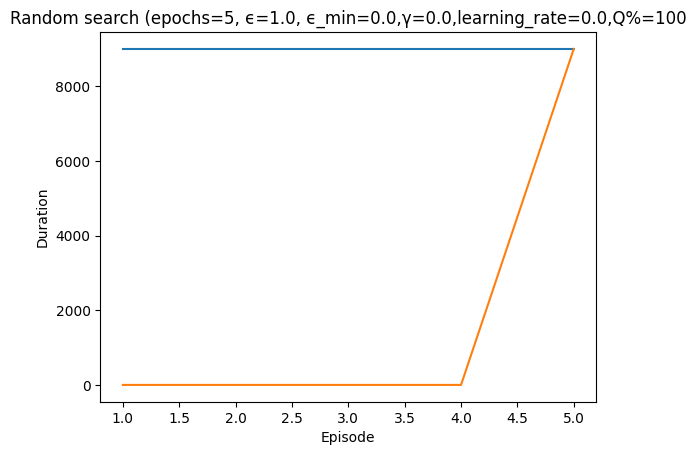

In [9]:
randomlearning_results = learner.epsilon_greedy_search(
    cyberbattlechain_10,
    ep,
    learner=a.QTabularLearner(ep, trained=qlearning_bestrun_10['learner'],
                              gamma=0.0, learning_rate=0.0, exploit_percentile=100),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    title="Random search"
)

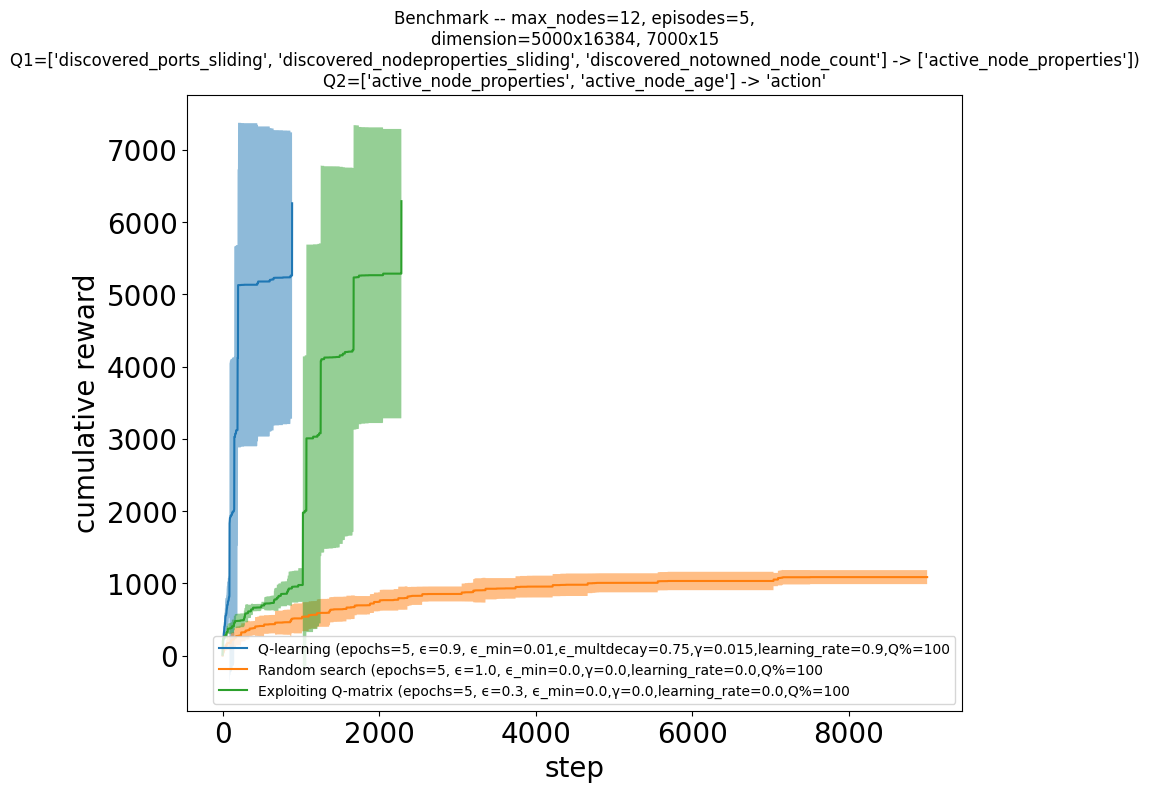

In [10]:
# Plot averaged cumulative rewards for Q-learning vs Random vs Q-Exploit
all_runs = [*qlearning_results,
            randomlearning_results,
            nolearning_results
            ]

Q_source_10 = cast(a.QTabularLearner, qlearning_bestrun_10['learner']).qsource
Q_attack_10 = cast(a.QTabularLearner, qlearning_bestrun_10['learner']).qattack

p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f'Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n'
    f'dimension={Q_source_10.state_space.flat_size()}x{Q_source_10.action_space.flat_size()}, '
    f'{Q_attack_10.state_space.flat_size()}x{Q_attack_10.action_space.flat_size()}\n'
    f'Q1={[f.name() for f in Q_source_10.state_space.feature_selection]} '
    f'-> {[f.name() for f in Q_source_10.action_space.feature_selection]})\n'
    f"Q2={[f.name() for f in Q_attack_10.state_space.feature_selection]} -> 'action'")

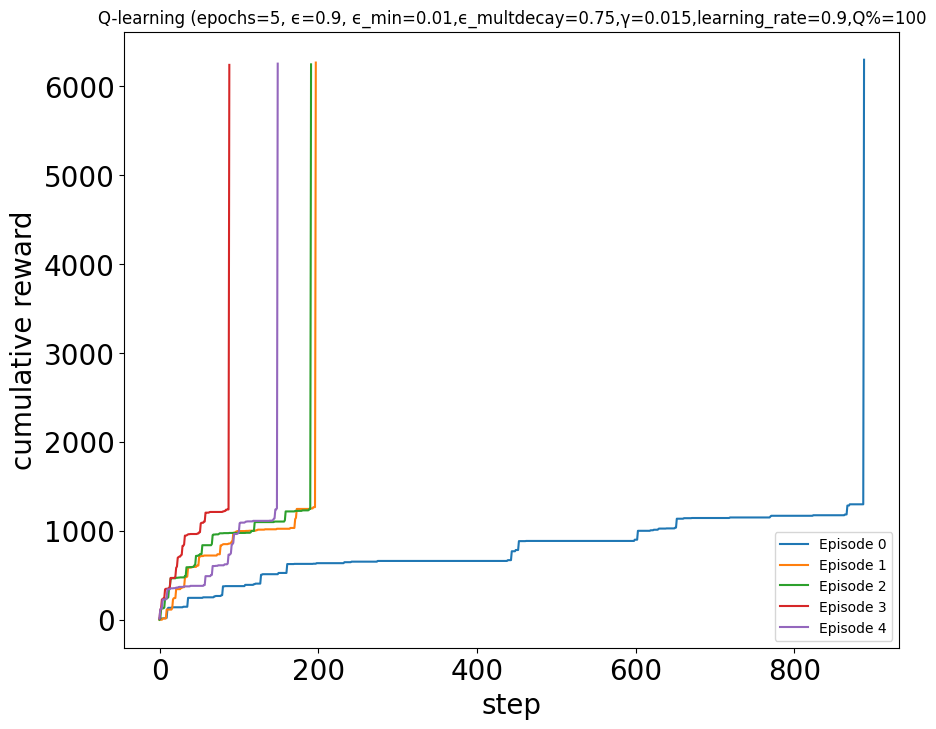

In [11]:
# plot cumulative rewards for all episodes
p.plot_all_episodes(qlearning_results[0])

In [12]:
# Plot the Q-matrices

In [13]:
# Print non-zero coordinate in the Q matrix Q_source
i = np.where(Q_source_10.qm)
q = Q_source_10.qm[i]
list(zip(np.array([Q_source_10.state_space.pretty_print(i) for i in i[0]]),
         np.array([Q_source_10.action_space.pretty_print(i) for i in i[1]]), q))

[('#2219',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  15.485399288450896),
 ('#3608',
  array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]),
  150.75096010974926),
 ('#3628', array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 90.0),
 ('#3813',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  151.50892497315715),
 ('#3813',
  array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]),
  151.1385373299917),
 ('#4047',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  4500.000000000001),
 ('#4047',
  array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]),
  6.899699679889614),
 ('#4047',
  array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]),
  13.76063230078443),
 ('#4473',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  100.20901261401889),
 ('#4750',
  array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]),
  16.091229441117918)]

In [14]:
# Print non-zero coordinate in the Q matrix Q_attack
i2 = np.where(Q_attack_10.qm)
q2 = Q_attack_10.qm[i2]
list(zip([Q_attack_10.state_space.pretty_print(i) for i in i2[0]],
         [Q_attack_10.action_space.pretty_print(i) for i in i2[1]], q2))


##################################################

[('#100', 0, 7.164031838028044),
 ('#100', 1, 0.16796280081300363),
 ('#100', 2, 0.9444458650074662),
 ('#100', 3, 0.0802057354097175),
 ('#100', 5, 0.2537734954903512),
 ('#100', 6, 6.797461947283663),
 ('#100', 7, 0.17434667576226753),
 ('#100', 8, 0.00032805),
 ('#100', 9, 6.632281464805466),
 ('#100', 10, 0.07294501124842499),
 ('#100', 11, 0.03351606253524855),
 ('#100', 12, 6.911702644704164),
 ('#100', 13, 0.17424064069376055),
 ('#100', 14, 0.08964723247913059),
 ('#1004', 1, 0.0017764944806249944),
 ('#1004', 5, 0.0002859071266675062),
 ('#1004', 9, 0.00278093567708022),
 ('#1004', 10, 0.0019146528772434404),
 ('#1408', 1, 0.00795998019252031),
 ('#1408', 2, 0.0034844500839283678),
 ('#1408', 4, 0.003061435499999999),
 ('#1408', 5, 0.06991292844921815),
 ('#1408', 6, 0.023490612368851166),
 ('#1408', 8, 0.07326550362432376),
 ('#1408', 9, 0.008346938528860745),
 ('#1408', 11, 0.0243),
 ('#1408', 12, 0.0012684880583816664),
 ('#1408', 13, 0.002758049999999999),
 ('#1408', 14, 0

## Transfer learning from size 4 to size 10
Exploiting Q-matrix learned from a different network.

###### Q-learning
Learning with: episode_count=5,iteration_count=9000,ϵ=0.9,ϵ_min=0.01, ϵ_multdecay=0.75,γ=0.015,learning_rate=0.9,Q%=100
  ## Episode: 1/5 'Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.9,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  114.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  116.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  118.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:  132.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:  132.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  138.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  138.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:  238.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:  238.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 34|reward:  252.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 34|reward:  252.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:  254.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:  254.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 43|reward:  260.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 43|reward:  260.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 1|Iteration 49|reward:  360.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 1|Iteration 49|reward:  360.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 1|Iteration 56|reward:  374.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 1|Iteration 56|reward:  374.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward:  382.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward:  382.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:  482.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:  482.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 67|reward:  488.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 67|reward:  488.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 1|Iteration 68|reward:  502.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 1|Iteration 68|reward:  502.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 1|Iteration 70|reward: 5502.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 1|Iteration 70|reward: 5502.0|last_reward_at:   70|Elapsed Time: 0:00:00||

  Episode 1 ended at t=70 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/9 (0.31)
    explore-remote: 6/20 (0.23)
    explore-connect: 1/23 (0.04)
    exploit-local: 2/0 (1.00)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 4/0 (1.00)
  exploit deflected to exploration: 5
  ## Episode: 2/5 'Q-learning' ϵ=0.6750, γ=0.015,learning_rate=0.9,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  234.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  248.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  348.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  348.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  354.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  354.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  356.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  356.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  358.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  358.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:  364.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:  364.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  378.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  378.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  380.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  380.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:  480.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:  480.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  486.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  486.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:  500.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:  500.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 43|reward: 5500.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 43|reward: 5500.0|last_reward_at:   43|Elapsed Time: 0:00:00||

  Episode 2 ended at t=43 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 3/3 (0.50)
    explore-connect: 0/18 (0.00)
    exploit-local: 5/0 (1.00)
    exploit-remote: 3/1 (0.75)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 2
  ## Episode: 3/5 'Q-learning' ϵ=0.5063, γ=0.015,learning_rate=0.9,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  244.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  244.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  344.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  344.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  346.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  346.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  360.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  360.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  460.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  460.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  466.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  466.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward:  468.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward:  468.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:  474.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:  474.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  485.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  485.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  491.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  491.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 37|reward:  497.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 37|reward:  497.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  503.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  503.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  505.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  505.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 61|reward:  505.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 74|reward:  505.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 89|reward:  505.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 102|reward:  505.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 114|reward:  505.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 120|reward:  511.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 120|reward:  511.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 3|Iteration 131|reward:  520.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 3|Iteration 131|reward:  520.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 3|Iteration 134|reward: 5520.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 3|Iteration 134|reward: 5520.0|last_reward_at:  134|Elapsed Time: 0:00:00||

  Episode 3 ended at t=134 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/19 (0.14)
    explore-remote: 5/30 (0.14)
    explore-connect: 1/33 (0.03)
    exploit-local: 5/9 (0.36)
    exploit-remote: 3/22 (0.12)
    exploit-connect: 4/0 (1.00)
  exploit deflected to exploration: 28
  ## Episode: 4/5 'Q-learning' ϵ=0.3797, γ=0.015,learning_rate=0.9,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  344.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  344.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  358.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  358.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  458.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  458.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  460.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  460.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  466.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  466.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  472.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  472.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:  486.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:  486.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward: 5486.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward: 5486.0|last_reward_at:   27|Elapsed Time: 0:00:00||

  Episode 4 ended at t=27 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 3/2 (0.60)
    explore-connect: 0/7 (0.00)
    exploit-local: 4/0 (1.00)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 8
  ## Episode: 5/5 'Q-learning' ϵ=0.2848, γ=0.015,learning_rate=0.9,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  356.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  356.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  456.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  456.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  458.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  458.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  472.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  472.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward: 5472.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward: 5472.0|last_reward_at:   14|Elapsed Time: 0:00:00||

  Episode 5 ended at t=14 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 5/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 1
simulation ended


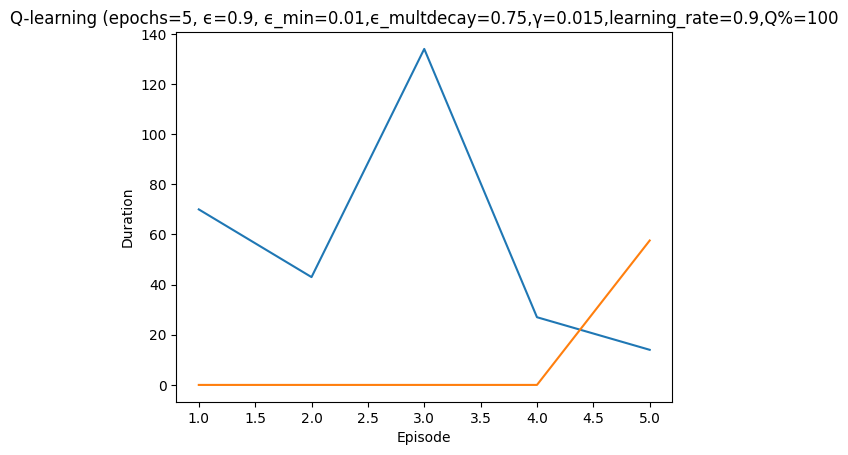

###### One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4
Learning with: episode_count=5,iteration_count=9000,ϵ=0.5,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=0
  ## Episode: 1/5 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  120.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  131.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  131.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward:  140.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward:  140.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward:  240.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward:  240.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 35|reward:  254.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 35|reward:  254.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:  354.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:  354.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:  356.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:  356.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:  362.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:  362.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 44|reward:  364.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 44|reward:  364.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 1|Iteration 61|reward:  370.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 1|Iteration 61|reward:  370.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 1|Iteration 62|reward:  384.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 1|Iteration 62|reward:  384.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:  484.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:  484.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 65|reward:  490.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 65|reward:  490.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 1|Iteration 67|reward:  496.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 1|Iteration 67|reward:  496.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 1|Iteration 80|reward:  496.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 1|Iteration 95|reward:  502.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 1|Iteration 95|reward:  502.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 101|reward:  513.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 101|reward:  513.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 1|Iteration 109|reward:  522.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 1|Iteration 109|reward:  522.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 1|Iteration 112|reward:  622.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 1|Iteration 112|reward:  622.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:  624.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:  624.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 1|Iteration 127|reward:  626.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 1|Iteration 127|reward:  626.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 1|Iteration 145|reward:  626.0|last_reward_at:  127|Elapsed Time: 0:00:01||

Episode 1|Iteration 159|reward:  626.0|last_reward_at:  127|Elapsed Time: 0:00:01||

Episode 1|Iteration 170|reward:  632.0|last_reward_at:  127|Elapsed Time: 0:00:01||

Episode 1|Iteration 170|reward:  632.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 1|Iteration 179|reward:  643.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 1|Iteration 179|reward:  643.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 1|Iteration 192|reward:  643.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 1|Iteration 209|reward:  643.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 1|Iteration 223|reward:  643.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 1|Iteration 236|reward:  651.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 1|Iteration 236|reward:  651.0|last_reward_at:  236|Elapsed Time: 0:00:01||

Episode 1|Iteration 249|reward:  651.0|last_reward_at:  236|Elapsed Time: 0:00:01||

Episode 1|Iteration 264|reward:  651.0|last_reward_at:  236|Elapsed Time: 0:00:01||

Episode 1|Iteration 277|reward:  657.0|last_reward_at:  236|Elapsed Time: 0:00:01||

Episode 1|Iteration 277|reward:  657.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 1|Iteration 281|reward:  666.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 1|Iteration 281|reward:  666.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 1|Iteration 283|reward:  766.0|last_reward_at:  281|Elapsed Time: 0:00:02||

Episode 1|Iteration 283|reward:  766.0|last_reward_at:  283|Elapsed Time: 0:00:02||

Episode 1|Iteration 299|reward:  766.0|last_reward_at:  283|Elapsed Time: 0:00:02||

Episode 1|Iteration 300|reward:  780.0|last_reward_at:  283|Elapsed Time: 0:00:02||

Episode 1|Iteration 300|reward:  780.0|last_reward_at:  300|Elapsed Time: 0:00:02||

Episode 1|Iteration 301|reward:  782.0|last_reward_at:  300|Elapsed Time: 0:00:02||

Episode 1|Iteration 301|reward:  782.0|last_reward_at:  301|Elapsed Time: 0:00:02||

Episode 1|Iteration 302|reward:  882.0|last_reward_at:  301|Elapsed Time: 0:00:02||

Episode 1|Iteration 302|reward:  882.0|last_reward_at:  302|Elapsed Time: 0:00:02||

Episode 1|Iteration 303|reward:  888.0|last_reward_at:  302|Elapsed Time: 0:00:02||

Episode 1|Iteration 303|reward:  888.0|last_reward_at:  303|Elapsed Time: 0:00:02||

Episode 1|Iteration 311|reward:  902.0|last_reward_at:  303|Elapsed Time: 0:00:02||

Episode 1|Iteration 311|reward:  902.0|last_reward_at:  311|Elapsed Time: 0:00:02||

Episode 1|Iteration 317|reward: 1002.0|last_reward_at:  311|Elapsed Time: 0:00:02||

Episode 1|Iteration 317|reward: 1002.0|last_reward_at:  317|Elapsed Time: 0:00:02||

Episode 1|Iteration 328|reward: 1002.0|last_reward_at:  317|Elapsed Time: 0:00:02||

Episode 1|Iteration 341|reward: 1002.0|last_reward_at:  317|Elapsed Time: 0:00:02||

Episode 1|Iteration 355|reward: 1002.0|last_reward_at:  317|Elapsed Time: 0:00:02||

Episode 1|Iteration 359|reward: 1013.0|last_reward_at:  317|Elapsed Time: 0:00:02||

Episode 1|Iteration 359|reward: 1013.0|last_reward_at:  359|Elapsed Time: 0:00:02||

Episode 1|Iteration 365|reward: 1015.0|last_reward_at:  359|Elapsed Time: 0:00:02||

Episode 1|Iteration 365|reward: 1015.0|last_reward_at:  365|Elapsed Time: 0:00:02||

Episode 1|Iteration 367|reward: 1024.0|last_reward_at:  365|Elapsed Time: 0:00:02||

Episode 1|Iteration 367|reward: 1024.0|last_reward_at:  367|Elapsed Time: 0:00:02||

Episode 1|Iteration 370|reward: 1124.0|last_reward_at:  367|Elapsed Time: 0:00:02||

Episode 1|Iteration 370|reward: 1124.0|last_reward_at:  370|Elapsed Time: 0:00:02||

Episode 1|Iteration 379|reward: 1130.0|last_reward_at:  370|Elapsed Time: 0:00:02||

Episode 1|Iteration 379|reward: 1130.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 1|Iteration 389|reward: 1136.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 1|Iteration 389|reward: 1136.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 1|Iteration 390|reward: 1147.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 1|Iteration 390|reward: 1147.0|last_reward_at:  390|Elapsed Time: 0:00:02||

Episode 1|Iteration 398|reward: 1147.0|last_reward_at:  390|Elapsed Time: 0:00:03||

Episode 1|Iteration 401|reward: 1153.0|last_reward_at:  390|Elapsed Time: 0:00:03||

Episode 1|Iteration 401|reward: 1153.0|last_reward_at:  401|Elapsed Time: 0:00:03||

Episode 1|Iteration 403|reward: 1155.0|last_reward_at:  401|Elapsed Time: 0:00:03||

Episode 1|Iteration 403|reward: 1155.0|last_reward_at:  403|Elapsed Time: 0:00:03||

Episode 1|Iteration 409|reward: 1157.0|last_reward_at:  403|Elapsed Time: 0:00:03||

Episode 1|Iteration 409|reward: 1157.0|last_reward_at:  409|Elapsed Time: 0:00:03||

Episode 1|Iteration 419|reward: 1157.0|last_reward_at:  409|Elapsed Time: 0:00:03||

Episode 1|Iteration 422|reward: 1165.0|last_reward_at:  409|Elapsed Time: 0:00:03||

Episode 1|Iteration 422|reward: 1165.0|last_reward_at:  422|Elapsed Time: 0:00:03||

Episode 1|Iteration 431|reward: 1165.0|last_reward_at:  422|Elapsed Time: 0:00:03||

Episode 1|Iteration 435|reward: 1171.0|last_reward_at:  422|Elapsed Time: 0:00:03||

Episode 1|Iteration 435|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:03||

Episode 1|Iteration 445|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:03||

Episode 1|Iteration 452|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:03||

Episode 1|Iteration 464|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:03||

Episode 1|Iteration 472|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:03||

Episode 1|Iteration 482|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:04||

Episode 1|Iteration 492|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:04||

Episode 1|Iteration 500|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:04||

Episode 1|Iteration 508|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:04||

Episode 1|Iteration 516|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:04||

Episode 1|Iteration 527|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:04||

Episode 1|Iteration 535|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:04||

Episode 1|Iteration 545|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:04||

Episode 1|Iteration 557|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:04||

Episode 1|Iteration 570|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:04||

Episode 1|Iteration 580|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:05||

Episode 1|Iteration 590|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:05||

Episode 1|Iteration 600|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:05||

Episode 1|Iteration 613|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:05||

Episode 1|Iteration 626|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:05||

Episode 1|Iteration 637|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:05||

Episode 1|Iteration 650|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:05||

Episode 1|Iteration 661|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:05||

Episode 1|Iteration 673|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:05||

Episode 1|Iteration 684|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:06||

Episode 1|Iteration 697|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:06||

Episode 1|Iteration 707|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:06||

Episode 1|Iteration 718|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:06||

Episode 1|Iteration 730|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:06||

Episode 1|Iteration 742|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:06||

Episode 1|Iteration 752|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:06||

Episode 1|Iteration 762|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:06||

Episode 1|Iteration 774|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:06||

Episode 1|Iteration 782|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:06||

Episode 1|Iteration 794|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:07||

Episode 1|Iteration 804|reward: 1171.0|last_reward_at:  435|Elapsed Time: 0:00:07||

Episode 1|Iteration 807|reward: 1180.0|last_reward_at:  435|Elapsed Time: 0:00:07||

Episode 1|Iteration 807|reward: 1180.0|last_reward_at:  807|Elapsed Time: 0:00:07||

Episode 1|Iteration 809|reward: 1280.0|last_reward_at:  807|Elapsed Time: 0:00:07||

Episode 1|Iteration 809|reward: 1280.0|last_reward_at:  809|Elapsed Time: 0:00:07||

Episode 1|Iteration 816|reward: 1280.0|last_reward_at:  809|Elapsed Time: 0:00:07||

Episode 1|Iteration 822|reward: 1291.0|last_reward_at:  809|Elapsed Time: 0:00:07||

Episode 1|Iteration 822|reward: 1291.0|last_reward_at:  822|Elapsed Time: 0:00:07||

Episode 1|Iteration 833|reward: 1291.0|last_reward_at:  822|Elapsed Time: 0:00:07||

Episode 1|Iteration 843|reward: 1291.0|last_reward_at:  822|Elapsed Time: 0:00:07||

Episode 1|Iteration 854|reward: 1291.0|last_reward_at:  822|Elapsed Time: 0:00:07||

Episode 1|Iteration 864|reward: 1291.0|last_reward_at:  822|Elapsed Time: 0:00:07||

Episode 1|Iteration 873|reward: 1291.0|last_reward_at:  822|Elapsed Time: 0:00:07||

Episode 1|Iteration 883|reward: 1291.0|last_reward_at:  822|Elapsed Time: 0:00:08||

Episode 1|Iteration 893|reward: 1291.0|last_reward_at:  822|Elapsed Time: 0:00:08||

Episode 1|Iteration 903|reward: 1291.0|last_reward_at:  822|Elapsed Time: 0:00:08||

Episode 1|Iteration 912|reward: 1291.0|last_reward_at:  822|Elapsed Time: 0:00:08||

Episode 1|Iteration 921|reward: 1291.0|last_reward_at:  822|Elapsed Time: 0:00:08||

Episode 1|Iteration 932|reward: 1291.0|last_reward_at:  822|Elapsed Time: 0:00:08||

Episode 1|Iteration 940|reward: 1291.0|last_reward_at:  822|Elapsed Time: 0:00:08||

Episode 1|Iteration 941|reward: 1300.0|last_reward_at:  822|Elapsed Time: 0:00:08||

Episode 1|Iteration 941|reward: 1300.0|last_reward_at:  941|Elapsed Time: 0:00:08||

Episode 1|Iteration 942|reward: 6300.0|last_reward_at:  941|Elapsed Time: 0:00:08||

Episode 1|Iteration 942|reward: 6300.0|last_reward_at:  942|Elapsed Time: 0:00:08||

  Episode 1 ended at t=942 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/200 (0.07)
    explore-remote: 13/226 (0.05)
    explore-connect: 0/262 (0.00)
    exploit-local: 7/160 (0.04)
    exploit-remote: 7/42 (0.14)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 269
  ## Episode: 2/5 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:   14.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:   16.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:   16.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  116.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  116.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  130.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  130.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  230.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  230.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  236.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  236.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  250.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  250.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  350.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  350.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:  356.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:  356.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  358.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  358.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 37|reward:  360.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 37|reward:  360.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward:  374.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward:  374.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward:  380.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward:  380.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 2|Iteration 43|reward:  480.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 2|Iteration 43|reward:  480.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 2|Iteration 44|reward:  482.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 2|Iteration 44|reward:  482.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:  493.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:  493.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 61|reward:  493.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 64|reward:  495.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 64|reward:  495.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 2|Iteration 71|reward:  504.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 2|Iteration 71|reward:  504.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 2|Iteration 72|reward:  604.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 2|Iteration 72|reward:  604.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 2|Iteration 77|reward:  610.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 2|Iteration 77|reward:  610.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 2|Iteration 84|reward:  621.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 2|Iteration 84|reward:  621.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 86|reward:  627.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 86|reward:  627.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 2|Iteration 88|reward:  629.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 2|Iteration 88|reward:  629.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 2|Iteration 101|reward:  629.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 2|Iteration 107|reward:  638.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 2|Iteration 107|reward:  638.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 2|Iteration 108|reward:  738.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 2|Iteration 108|reward:  738.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 2|Iteration 111|reward:  752.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 2|Iteration 111|reward:  752.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 2|Iteration 112|reward:  852.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 2|Iteration 112|reward:  852.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 2|Iteration 125|reward:  858.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 2|Iteration 125|reward:  858.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 2|Iteration 142|reward:  858.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 2|Iteration 147|reward:  860.0|last_reward_at:  125|Elapsed Time: 0:00:01||

Episode 2|Iteration 147|reward:  860.0|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 2|Iteration 151|reward:  866.0|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 2|Iteration 151|reward:  866.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 2|Iteration 166|reward:  872.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 2|Iteration 166|reward:  872.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 2|Iteration 172|reward:  883.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 2|Iteration 172|reward:  883.0|last_reward_at:  172|Elapsed Time: 0:00:01||

Episode 2|Iteration 179|reward:  891.0|last_reward_at:  172|Elapsed Time: 0:00:01||

Episode 2|Iteration 179|reward:  891.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 2|Iteration 193|reward:  891.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 2|Iteration 204|reward:  891.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 2|Iteration 214|reward:  891.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 2|Iteration 221|reward:  897.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 2|Iteration 221|reward:  897.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 2|Iteration 228|reward:  897.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 2|Iteration 241|reward:  897.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 2|Iteration 253|reward:  897.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 2|Iteration 254|reward:  903.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 2|Iteration 254|reward:  903.0|last_reward_at:  254|Elapsed Time: 0:00:01||

Episode 2|Iteration 262|reward:  903.0|last_reward_at:  254|Elapsed Time: 0:00:02||

Episode 2|Iteration 275|reward:  903.0|last_reward_at:  254|Elapsed Time: 0:00:02||

Episode 2|Iteration 287|reward:  903.0|last_reward_at:  254|Elapsed Time: 0:00:02||

Episode 2|Iteration 301|reward:  903.0|last_reward_at:  254|Elapsed Time: 0:00:02||

Episode 2|Iteration 316|reward:  903.0|last_reward_at:  254|Elapsed Time: 0:00:02||

Episode 2|Iteration 321|reward:  905.0|last_reward_at:  254|Elapsed Time: 0:00:02||

Episode 2|Iteration 321|reward:  905.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 2|Iteration 331|reward:  911.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 2|Iteration 331|reward:  911.0|last_reward_at:  331|Elapsed Time: 0:00:02||

Episode 2|Iteration 342|reward:  911.0|last_reward_at:  331|Elapsed Time: 0:00:02||

Episode 2|Iteration 352|reward:  911.0|last_reward_at:  331|Elapsed Time: 0:00:02||

Episode 2|Iteration 365|reward:  911.0|last_reward_at:  331|Elapsed Time: 0:00:02||

Episode 2|Iteration 378|reward:  911.0|last_reward_at:  331|Elapsed Time: 0:00:02||

Episode 2|Iteration 391|reward:  911.0|last_reward_at:  331|Elapsed Time: 0:00:03||

Episode 2|Iteration 399|reward:  920.0|last_reward_at:  331|Elapsed Time: 0:00:03||

Episode 2|Iteration 399|reward:  920.0|last_reward_at:  399|Elapsed Time: 0:00:03||

Episode 2|Iteration 401|reward: 1020.0|last_reward_at:  399|Elapsed Time: 0:00:03||

Episode 2|Iteration 401|reward: 1020.0|last_reward_at:  401|Elapsed Time: 0:00:03||

Episode 2|Iteration 410|reward: 1020.0|last_reward_at:  401|Elapsed Time: 0:00:03||

Episode 2|Iteration 422|reward: 1020.0|last_reward_at:  401|Elapsed Time: 0:00:03||

Episode 2|Iteration 426|reward: 1034.0|last_reward_at:  401|Elapsed Time: 0:00:03||

Episode 2|Iteration 426|reward: 1034.0|last_reward_at:  426|Elapsed Time: 0:00:03||

Episode 2|Iteration 427|reward: 1134.0|last_reward_at:  426|Elapsed Time: 0:00:03||

Episode 2|Iteration 427|reward: 1134.0|last_reward_at:  427|Elapsed Time: 0:00:03||

Episode 2|Iteration 428|reward: 1140.0|last_reward_at:  427|Elapsed Time: 0:00:03||

Episode 2|Iteration 428|reward: 1140.0|last_reward_at:  428|Elapsed Time: 0:00:03||

Episode 2|Iteration 440|reward: 1142.0|last_reward_at:  428|Elapsed Time: 0:00:03||

Episode 2|Iteration 440|reward: 1142.0|last_reward_at:  440|Elapsed Time: 0:00:03||

Episode 2|Iteration 451|reward: 1142.0|last_reward_at:  440|Elapsed Time: 0:00:03||

Episode 2|Iteration 456|reward: 1144.0|last_reward_at:  440|Elapsed Time: 0:00:03||

Episode 2|Iteration 456|reward: 1144.0|last_reward_at:  456|Elapsed Time: 0:00:03||

Episode 2|Iteration 468|reward: 1144.0|last_reward_at:  456|Elapsed Time: 0:00:03||

Episode 2|Iteration 471|reward: 1155.0|last_reward_at:  456|Elapsed Time: 0:00:03||

Episode 2|Iteration 471|reward: 1155.0|last_reward_at:  471|Elapsed Time: 0:00:03||

Episode 2|Iteration 482|reward: 1155.0|last_reward_at:  471|Elapsed Time: 0:00:03||

Episode 2|Iteration 493|reward: 1155.0|last_reward_at:  471|Elapsed Time: 0:00:04||

Episode 2|Iteration 504|reward: 1155.0|last_reward_at:  471|Elapsed Time: 0:00:04||

Episode 2|Iteration 515|reward: 1155.0|last_reward_at:  471|Elapsed Time: 0:00:04||

Episode 2|Iteration 526|reward: 1155.0|last_reward_at:  471|Elapsed Time: 0:00:04||

Episode 2|Iteration 530|reward: 1163.0|last_reward_at:  471|Elapsed Time: 0:00:04||

Episode 2|Iteration 530|reward: 1163.0|last_reward_at:  530|Elapsed Time: 0:00:04||

Episode 2|Iteration 533|reward: 1169.0|last_reward_at:  530|Elapsed Time: 0:00:04||

Episode 2|Iteration 533|reward: 1169.0|last_reward_at:  533|Elapsed Time: 0:00:04||

Episode 2|Iteration 543|reward: 1169.0|last_reward_at:  533|Elapsed Time: 0:00:04||

Episode 2|Iteration 554|reward: 1169.0|last_reward_at:  533|Elapsed Time: 0:00:04||

Episode 2|Iteration 563|reward: 1169.0|last_reward_at:  533|Elapsed Time: 0:00:04||

Episode 2|Iteration 570|reward: 1169.0|last_reward_at:  533|Elapsed Time: 0:00:04||

Episode 2|Iteration 578|reward: 1178.0|last_reward_at:  533|Elapsed Time: 0:00:04||

Episode 2|Iteration 578|reward: 1178.0|last_reward_at:  578|Elapsed Time: 0:00:04||

Episode 2|Iteration 579|reward: 1278.0|last_reward_at:  578|Elapsed Time: 0:00:04||

Episode 2|Iteration 579|reward: 1278.0|last_reward_at:  579|Elapsed Time: 0:00:04||

Episode 2|Iteration 591|reward: 1278.0|last_reward_at:  579|Elapsed Time: 0:00:05||

Episode 2|Iteration 592|reward: 1289.0|last_reward_at:  579|Elapsed Time: 0:00:05||

Episode 2|Iteration 592|reward: 1289.0|last_reward_at:  592|Elapsed Time: 0:00:05||

Episode 2|Iteration 604|reward: 1289.0|last_reward_at:  592|Elapsed Time: 0:00:05||

Episode 2|Iteration 614|reward: 1289.0|last_reward_at:  592|Elapsed Time: 0:00:05||

Episode 2|Iteration 625|reward: 1289.0|last_reward_at:  592|Elapsed Time: 0:00:05||

Episode 2|Iteration 634|reward: 1289.0|last_reward_at:  592|Elapsed Time: 0:00:05||

Episode 2|Iteration 646|reward: 1289.0|last_reward_at:  592|Elapsed Time: 0:00:05||

Episode 2|Iteration 655|reward: 1289.0|last_reward_at:  592|Elapsed Time: 0:00:05||

Episode 2|Iteration 661|reward: 1298.0|last_reward_at:  592|Elapsed Time: 0:00:05||

Episode 2|Iteration 661|reward: 1298.0|last_reward_at:  661|Elapsed Time: 0:00:05||

Episode 2|Iteration 663|reward: 6298.0|last_reward_at:  661|Elapsed Time: 0:00:05||

Episode 2|Iteration 663|reward: 6298.0|last_reward_at:  663|Elapsed Time: 0:00:05||

  Episode 2 ended at t=663 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/127 (0.10)
    explore-remote: 14/169 (0.08)
    explore-connect: 0/182 (0.00)
    exploit-local: 7/92 (0.07)
    exploit-remote: 6/41 (0.13)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 178
  ## Episode: 3/5 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  127.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  127.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  133.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  133.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  135.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  135.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  143.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  143.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward:  152.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward:  152.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:  252.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:  252.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  263.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  263.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 34|reward:  272.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 34|reward:  272.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  372.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  372.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 48|reward:  374.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 48|reward:  374.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 3|Iteration 54|reward:  376.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 3|Iteration 54|reward:  376.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 3|Iteration 69|reward:  390.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 3|Iteration 69|reward:  390.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 3|Iteration 70|reward:  490.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 3|Iteration 70|reward:  490.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 3|Iteration 74|reward:  504.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 3|Iteration 74|reward:  504.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 3|Iteration 77|reward:  604.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 3|Iteration 77|reward:  604.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 3|Iteration 80|reward:  606.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 3|Iteration 80|reward:  606.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 3|Iteration 89|reward:  612.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 3|Iteration 89|reward:  612.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 3|Iteration 91|reward:  618.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 3|Iteration 91|reward:  618.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 3|Iteration 101|reward:  624.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 3|Iteration 101|reward:  624.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 3|Iteration 113|reward:  626.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 3|Iteration 113|reward:  626.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 3|Iteration 128|reward:  626.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 3|Iteration 131|reward:  637.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 3|Iteration 131|reward:  637.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 3|Iteration 145|reward:  637.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 3|Iteration 152|reward:  643.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 3|Iteration 152|reward:  643.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 3|Iteration 161|reward:  649.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 3|Iteration 161|reward:  649.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 3|Iteration 165|reward:  658.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 3|Iteration 165|reward:  658.0|last_reward_at:  165|Elapsed Time: 0:00:01||

Episode 3|Iteration 167|reward:  758.0|last_reward_at:  165|Elapsed Time: 0:00:01||

Episode 3|Iteration 167|reward:  758.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 3|Iteration 175|reward:  769.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 3|Iteration 175|reward:  769.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 3|Iteration 190|reward:  769.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 3|Iteration 200|reward:  769.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 3|Iteration 211|reward:  769.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 3|Iteration 218|reward:  773.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 3|Iteration 218|reward:  773.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 3|Iteration 228|reward:  773.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 3|Iteration 234|reward:  779.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 3|Iteration 234|reward:  779.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 3|Iteration 245|reward:  779.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 3|Iteration 255|reward:  779.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 3|Iteration 264|reward:  779.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 3|Iteration 276|reward:  779.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 3|Iteration 291|reward:  779.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 3|Iteration 300|reward:  779.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 3|Iteration 313|reward:  779.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 3|Iteration 330|reward:  779.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 3|Iteration 335|reward:  781.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 3|Iteration 335|reward:  781.0|last_reward_at:  335|Elapsed Time: 0:00:02||

Episode 3|Iteration 351|reward:  781.0|last_reward_at:  335|Elapsed Time: 0:00:02||

Episode 3|Iteration 364|reward:  781.0|last_reward_at:  335|Elapsed Time: 0:00:02||

Episode 3|Iteration 374|reward:  790.0|last_reward_at:  335|Elapsed Time: 0:00:02||

Episode 3|Iteration 374|reward:  790.0|last_reward_at:  374|Elapsed Time: 0:00:02||

Episode 3|Iteration 381|reward:  890.0|last_reward_at:  374|Elapsed Time: 0:00:02||

Episode 3|Iteration 381|reward:  890.0|last_reward_at:  381|Elapsed Time: 0:00:02||

Episode 3|Iteration 393|reward:  890.0|last_reward_at:  381|Elapsed Time: 0:00:03||

Episode 3|Iteration 407|reward:  890.0|last_reward_at:  381|Elapsed Time: 0:00:03||

Episode 3|Iteration 417|reward:  890.0|last_reward_at:  381|Elapsed Time: 0:00:03||

Episode 3|Iteration 432|reward:  890.0|last_reward_at:  381|Elapsed Time: 0:00:03||

Episode 3|Iteration 447|reward:  890.0|last_reward_at:  381|Elapsed Time: 0:00:03||

Episode 3|Iteration 450|reward:  901.0|last_reward_at:  381|Elapsed Time: 0:00:03||

Episode 3|Iteration 450|reward:  901.0|last_reward_at:  450|Elapsed Time: 0:00:03||

Episode 3|Iteration 462|reward:  901.0|last_reward_at:  450|Elapsed Time: 0:00:03||

Episode 3|Iteration 467|reward:  909.0|last_reward_at:  450|Elapsed Time: 0:00:03||

Episode 3|Iteration 467|reward:  909.0|last_reward_at:  467|Elapsed Time: 0:00:03||

Episode 3|Iteration 482|reward:  909.0|last_reward_at:  467|Elapsed Time: 0:00:03||

Episode 3|Iteration 494|reward:  909.0|last_reward_at:  467|Elapsed Time: 0:00:03||

Episode 3|Iteration 504|reward:  909.0|last_reward_at:  467|Elapsed Time: 0:00:03||

Episode 3|Iteration 515|reward:  909.0|last_reward_at:  467|Elapsed Time: 0:00:04||

Episode 3|Iteration 528|reward:  909.0|last_reward_at:  467|Elapsed Time: 0:00:04||

Episode 3|Iteration 540|reward:  909.0|last_reward_at:  467|Elapsed Time: 0:00:04||

Episode 3|Iteration 552|reward:  909.0|last_reward_at:  467|Elapsed Time: 0:00:04||

Episode 3|Iteration 553|reward:  915.0|last_reward_at:  467|Elapsed Time: 0:00:04||

Episode 3|Iteration 553|reward:  915.0|last_reward_at:  553|Elapsed Time: 0:00:04||

Episode 3|Iteration 566|reward:  924.0|last_reward_at:  553|Elapsed Time: 0:00:04||

Episode 3|Iteration 566|reward:  924.0|last_reward_at:  566|Elapsed Time: 0:00:04||

Episode 3|Iteration 567|reward: 1024.0|last_reward_at:  566|Elapsed Time: 0:00:04||

Episode 3|Iteration 567|reward: 1024.0|last_reward_at:  567|Elapsed Time: 0:00:04||

Episode 3|Iteration 579|reward: 1038.0|last_reward_at:  567|Elapsed Time: 0:00:04||

Episode 3|Iteration 579|reward: 1038.0|last_reward_at:  579|Elapsed Time: 0:00:04||

Episode 3|Iteration 580|reward: 1138.0|last_reward_at:  579|Elapsed Time: 0:00:04||

Episode 3|Iteration 580|reward: 1138.0|last_reward_at:  580|Elapsed Time: 0:00:04||

Episode 3|Iteration 590|reward: 1138.0|last_reward_at:  580|Elapsed Time: 0:00:04||

Episode 3|Iteration 592|reward: 1140.0|last_reward_at:  580|Elapsed Time: 0:00:04||

Episode 3|Iteration 592|reward: 1140.0|last_reward_at:  592|Elapsed Time: 0:00:04||

Episode 3|Iteration 597|reward: 1142.0|last_reward_at:  592|Elapsed Time: 0:00:04||

Episode 3|Iteration 597|reward: 1142.0|last_reward_at:  597|Elapsed Time: 0:00:04||

Episode 3|Iteration 610|reward: 1142.0|last_reward_at:  597|Elapsed Time: 0:00:04||

Episode 3|Iteration 624|reward: 1142.0|last_reward_at:  597|Elapsed Time: 0:00:04||

Episode 3|Iteration 637|reward: 1142.0|last_reward_at:  597|Elapsed Time: 0:00:05||

Episode 3|Iteration 651|reward: 1142.0|last_reward_at:  597|Elapsed Time: 0:00:05||

Episode 3|Iteration 661|reward: 1142.0|last_reward_at:  597|Elapsed Time: 0:00:05||

Episode 3|Iteration 673|reward: 1142.0|last_reward_at:  597|Elapsed Time: 0:00:05||

Episode 3|Iteration 682|reward: 1148.0|last_reward_at:  597|Elapsed Time: 0:00:05||

Episode 3|Iteration 682|reward: 1148.0|last_reward_at:  682|Elapsed Time: 0:00:05||

Episode 3|Iteration 691|reward: 1148.0|last_reward_at:  682|Elapsed Time: 0:00:05||

Episode 3|Iteration 701|reward: 1148.0|last_reward_at:  682|Elapsed Time: 0:00:05||

Episode 3|Iteration 706|reward: 1162.0|last_reward_at:  682|Elapsed Time: 0:00:05||

Episode 3|Iteration 706|reward: 1162.0|last_reward_at:  706|Elapsed Time: 0:00:05||

Episode 3|Iteration 708|reward: 1262.0|last_reward_at:  706|Elapsed Time: 0:00:05||

Episode 3|Iteration 708|reward: 1262.0|last_reward_at:  708|Elapsed Time: 0:00:05||

Episode 3|Iteration 709|reward: 1276.0|last_reward_at:  708|Elapsed Time: 0:00:05||

Episode 3|Iteration 709|reward: 1276.0|last_reward_at:  709|Elapsed Time: 0:00:05||

Episode 3|Iteration 710|reward: 6276.0|last_reward_at:  709|Elapsed Time: 0:00:05||

Episode 3|Iteration 710|reward: 6276.0|last_reward_at:  710|Elapsed Time: 0:00:05||

  Episode 3 ended at t=710 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/150 (0.07)
    explore-remote: 14/178 (0.07)
    explore-connect: 0/186 (0.00)
    exploit-local: 8/108 (0.07)
    exploit-remote: 4/40 (0.09)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 186
  ## Episode: 4/5 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  133.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  133.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  142.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  142.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  242.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  242.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  244.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  244.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  255.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  255.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  259.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  259.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  268.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  268.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 44|reward:  368.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 44|reward:  368.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 4|Iteration 62|reward:  368.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 4|Iteration 64|reward:  374.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 4|Iteration 64|reward:  374.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 79|reward:  374.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 81|reward:  376.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 81|reward:  376.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 4|Iteration 90|reward:  390.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 4|Iteration 90|reward:  390.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 4|Iteration 91|reward:  490.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 4|Iteration 91|reward:  490.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 4|Iteration 95|reward:  496.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 4|Iteration 95|reward:  496.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 4|Iteration 101|reward:  510.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 4|Iteration 101|reward:  510.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 4|Iteration 103|reward:  610.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 4|Iteration 103|reward:  610.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 4|Iteration 113|reward:  624.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 4|Iteration 113|reward:  624.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:  724.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:  724.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 4|Iteration 128|reward:  724.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 4|Iteration 130|reward:  730.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 4|Iteration 130|reward:  730.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 4|Iteration 133|reward:  741.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 4|Iteration 133|reward:  741.0|last_reward_at:  133|Elapsed Time: 0:00:01||

Episode 4|Iteration 134|reward:  745.0|last_reward_at:  133|Elapsed Time: 0:00:01||

Episode 4|Iteration 134|reward:  745.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 4|Iteration 137|reward:  751.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 4|Iteration 137|reward:  751.0|last_reward_at:  137|Elapsed Time: 0:00:01||

Episode 4|Iteration 143|reward:  757.0|last_reward_at:  137|Elapsed Time: 0:00:01||

Episode 4|Iteration 143|reward:  757.0|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 4|Iteration 144|reward:  763.0|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 4|Iteration 144|reward:  763.0|last_reward_at:  144|Elapsed Time: 0:00:01||

Episode 4|Iteration 146|reward:  765.0|last_reward_at:  144|Elapsed Time: 0:00:01||

Episode 4|Iteration 146|reward:  765.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 4|Iteration 161|reward:  765.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 4|Iteration 174|reward:  765.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 4|Iteration 188|reward:  774.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 4|Iteration 188|reward:  774.0|last_reward_at:  188|Elapsed Time: 0:00:01||

Episode 4|Iteration 189|reward:  874.0|last_reward_at:  188|Elapsed Time: 0:00:01||

Episode 4|Iteration 189|reward:  874.0|last_reward_at:  189|Elapsed Time: 0:00:01||

Episode 4|Iteration 197|reward:  876.0|last_reward_at:  189|Elapsed Time: 0:00:01||

Episode 4|Iteration 197|reward:  876.0|last_reward_at:  197|Elapsed Time: 0:00:01||

Episode 4|Iteration 202|reward:  882.0|last_reward_at:  197|Elapsed Time: 0:00:01||

Episode 4|Iteration 202|reward:  882.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 4|Iteration 213|reward:  882.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 4|Iteration 224|reward:  882.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 4|Iteration 240|reward:  882.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 4|Iteration 254|reward:  882.0|last_reward_at:  202|Elapsed Time: 0:00:02||

Episode 4|Iteration 267|reward:  882.0|last_reward_at:  202|Elapsed Time: 0:00:02||

Episode 4|Iteration 276|reward:  884.0|last_reward_at:  202|Elapsed Time: 0:00:02||

Episode 4|Iteration 276|reward:  884.0|last_reward_at:  276|Elapsed Time: 0:00:02||

Episode 4|Iteration 287|reward:  884.0|last_reward_at:  276|Elapsed Time: 0:00:02||

Episode 4|Iteration 298|reward:  884.0|last_reward_at:  276|Elapsed Time: 0:00:02||

Episode 4|Iteration 308|reward:  895.0|last_reward_at:  276|Elapsed Time: 0:00:02||

Episode 4|Iteration 308|reward:  895.0|last_reward_at:  308|Elapsed Time: 0:00:02||

Episode 4|Iteration 310|reward:  901.0|last_reward_at:  308|Elapsed Time: 0:00:02||

Episode 4|Iteration 310|reward:  901.0|last_reward_at:  310|Elapsed Time: 0:00:02||

Episode 4|Iteration 322|reward:  903.0|last_reward_at:  310|Elapsed Time: 0:00:02||

Episode 4|Iteration 322|reward:  903.0|last_reward_at:  322|Elapsed Time: 0:00:02||

Episode 4|Iteration 327|reward:  911.0|last_reward_at:  322|Elapsed Time: 0:00:02||

Episode 4|Iteration 327|reward:  911.0|last_reward_at:  327|Elapsed Time: 0:00:02||

Episode 4|Iteration 334|reward:  920.0|last_reward_at:  327|Elapsed Time: 0:00:02||

Episode 4|Iteration 334|reward:  920.0|last_reward_at:  334|Elapsed Time: 0:00:02||

Episode 4|Iteration 336|reward: 1020.0|last_reward_at:  334|Elapsed Time: 0:00:02||

Episode 4|Iteration 336|reward: 1020.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 4|Iteration 349|reward: 1020.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 4|Iteration 361|reward: 1020.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 4|Iteration 376|reward: 1020.0|last_reward_at:  336|Elapsed Time: 0:00:03||

Episode 4|Iteration 389|reward: 1020.0|last_reward_at:  336|Elapsed Time: 0:00:03||

Episode 4|Iteration 395|reward: 1034.0|last_reward_at:  336|Elapsed Time: 0:00:03||

Episode 4|Iteration 395|reward: 1034.0|last_reward_at:  395|Elapsed Time: 0:00:03||

Episode 4|Iteration 398|reward: 1134.0|last_reward_at:  395|Elapsed Time: 0:00:03||

Episode 4|Iteration 398|reward: 1134.0|last_reward_at:  398|Elapsed Time: 0:00:03||

Episode 4|Iteration 403|reward: 1136.0|last_reward_at:  398|Elapsed Time: 0:00:03||

Episode 4|Iteration 403|reward: 1136.0|last_reward_at:  403|Elapsed Time: 0:00:03||

Episode 4|Iteration 412|reward: 1136.0|last_reward_at:  403|Elapsed Time: 0:00:03||

Episode 4|Iteration 423|reward: 1136.0|last_reward_at:  403|Elapsed Time: 0:00:03||

Episode 4|Iteration 429|reward: 1142.0|last_reward_at:  403|Elapsed Time: 0:00:03||

Episode 4|Iteration 429|reward: 1142.0|last_reward_at:  429|Elapsed Time: 0:00:03||

Episode 4|Iteration 434|reward: 1144.0|last_reward_at:  429|Elapsed Time: 0:00:03||

Episode 4|Iteration 434|reward: 1144.0|last_reward_at:  434|Elapsed Time: 0:00:03||

Episode 4|Iteration 445|reward: 1144.0|last_reward_at:  434|Elapsed Time: 0:00:03||

Episode 4|Iteration 456|reward: 1144.0|last_reward_at:  434|Elapsed Time: 0:00:03||

Episode 4|Iteration 466|reward: 1144.0|last_reward_at:  434|Elapsed Time: 0:00:03||

Episode 4|Iteration 480|reward: 1144.0|last_reward_at:  434|Elapsed Time: 0:00:04||

Episode 4|Iteration 487|reward: 1150.0|last_reward_at:  434|Elapsed Time: 0:00:04||

Episode 4|Iteration 487|reward: 1150.0|last_reward_at:  487|Elapsed Time: 0:00:04||

Episode 4|Iteration 501|reward: 1150.0|last_reward_at:  487|Elapsed Time: 0:00:04||

Episode 4|Iteration 512|reward: 1150.0|last_reward_at:  487|Elapsed Time: 0:00:04||

Episode 4|Iteration 525|reward: 1150.0|last_reward_at:  487|Elapsed Time: 0:00:04||

Episode 4|Iteration 534|reward: 1150.0|last_reward_at:  487|Elapsed Time: 0:00:04||

Episode 4|Iteration 547|reward: 1150.0|last_reward_at:  487|Elapsed Time: 0:00:04||

Episode 4|Iteration 558|reward: 1150.0|last_reward_at:  487|Elapsed Time: 0:00:04||

Episode 4|Iteration 568|reward: 1150.0|last_reward_at:  487|Elapsed Time: 0:00:04||

Episode 4|Iteration 580|reward: 1150.0|last_reward_at:  487|Elapsed Time: 0:00:04||

Episode 4|Iteration 592|reward: 1150.0|last_reward_at:  487|Elapsed Time: 0:00:05||

Episode 4|Iteration 603|reward: 1150.0|last_reward_at:  487|Elapsed Time: 0:00:05||

Episode 4|Iteration 614|reward: 1150.0|last_reward_at:  487|Elapsed Time: 0:00:05||

Episode 4|Iteration 624|reward: 1150.0|last_reward_at:  487|Elapsed Time: 0:00:05||

Episode 4|Iteration 634|reward: 1150.0|last_reward_at:  487|Elapsed Time: 0:00:05||

Episode 4|Iteration 647|reward: 1150.0|last_reward_at:  487|Elapsed Time: 0:00:05||

Episode 4|Iteration 659|reward: 1150.0|last_reward_at:  487|Elapsed Time: 0:00:05||

Episode 4|Iteration 671|reward: 1150.0|last_reward_at:  487|Elapsed Time: 0:00:05||

Episode 4|Iteration 679|reward: 1150.0|last_reward_at:  487|Elapsed Time: 0:00:05||

Episode 4|Iteration 685|reward: 1164.0|last_reward_at:  487|Elapsed Time: 0:00:05||

Episode 4|Iteration 685|reward: 1164.0|last_reward_at:  685|Elapsed Time: 0:00:05||

Episode 4|Iteration 688|reward: 1264.0|last_reward_at:  685|Elapsed Time: 0:00:05||

Episode 4|Iteration 688|reward: 1264.0|last_reward_at:  688|Elapsed Time: 0:00:05||

Episode 4|Iteration 697|reward: 1264.0|last_reward_at:  688|Elapsed Time: 0:00:06||

Episode 4|Iteration 701|reward: 1270.0|last_reward_at:  688|Elapsed Time: 0:00:06||

Episode 4|Iteration 701|reward: 1270.0|last_reward_at:  701|Elapsed Time: 0:00:06||

Episode 4|Iteration 709|reward: 1270.0|last_reward_at:  701|Elapsed Time: 0:00:06||

Episode 4|Iteration 716|reward: 1270.0|last_reward_at:  701|Elapsed Time: 0:00:06||

Episode 4|Iteration 725|reward: 1270.0|last_reward_at:  701|Elapsed Time: 0:00:06||

Episode 4|Iteration 728|reward: 1281.0|last_reward_at:  701|Elapsed Time: 0:00:06||

Episode 4|Iteration 728|reward: 1281.0|last_reward_at:  728|Elapsed Time: 0:00:06||

Episode 4|Iteration 738|reward: 1281.0|last_reward_at:  728|Elapsed Time: 0:00:06||

Episode 4|Iteration 749|reward: 1281.0|last_reward_at:  728|Elapsed Time: 0:00:06||

Episode 4|Iteration 761|reward: 1281.0|last_reward_at:  728|Elapsed Time: 0:00:06||

Episode 4|Iteration 771|reward: 1281.0|last_reward_at:  728|Elapsed Time: 0:00:06||

Episode 4|Iteration 779|reward: 1281.0|last_reward_at:  728|Elapsed Time: 0:00:07||

Episode 4|Iteration 791|reward: 1281.0|last_reward_at:  728|Elapsed Time: 0:00:07||

Episode 4|Iteration 798|reward: 1281.0|last_reward_at:  728|Elapsed Time: 0:00:07||

Episode 4|Iteration 807|reward: 1281.0|last_reward_at:  728|Elapsed Time: 0:00:07||

Episode 4|Iteration 809|reward: 1287.0|last_reward_at:  728|Elapsed Time: 0:00:07||

Episode 4|Iteration 809|reward: 1287.0|last_reward_at:  809|Elapsed Time: 0:00:07||

Episode 4|Iteration 819|reward: 1287.0|last_reward_at:  809|Elapsed Time: 0:00:07||

Episode 4|Iteration 830|reward: 1287.0|last_reward_at:  809|Elapsed Time: 0:00:07||

Episode 4|Iteration 831|reward: 1293.0|last_reward_at:  809|Elapsed Time: 0:00:07||

Episode 4|Iteration 831|reward: 1293.0|last_reward_at:  831|Elapsed Time: 0:00:07||

Episode 4|Iteration 839|reward: 1293.0|last_reward_at:  831|Elapsed Time: 0:00:07||

Episode 4|Iteration 846|reward: 1302.0|last_reward_at:  831|Elapsed Time: 0:00:07||

Episode 4|Iteration 846|reward: 1302.0|last_reward_at:  846|Elapsed Time: 0:00:07||

Episode 4|Iteration 847|reward: 6302.0|last_reward_at:  846|Elapsed Time: 0:00:07||

Episode 4|Iteration 847|reward: 6302.0|last_reward_at:  847|Elapsed Time: 0:00:07||

  Episode 4 ended at t=847 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 17/195 (0.08)
    explore-remote: 15/171 (0.08)
    explore-connect: 0/245 (0.00)
    exploit-local: 4/127 (0.03)
    exploit-remote: 5/57 (0.08)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 223
  ## Episode: 5/5 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:   14.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  114.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  114.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  125.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  125.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:  127.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:  127.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  129.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  129.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:  138.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:  138.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 43|reward:  238.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 43|reward:  238.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 5|Iteration 45|reward:  252.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 5|Iteration 45|reward:  252.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 46|reward:  352.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 46|reward:  352.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 5|Iteration 47|reward:  358.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 5|Iteration 47|reward:  358.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 50|reward:  360.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 50|reward:  360.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 5|Iteration 73|reward:  360.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 5|Iteration 75|reward:  362.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 5|Iteration 75|reward:  362.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 5|Iteration 88|reward:  368.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 5|Iteration 88|reward:  368.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 5|Iteration 92|reward:  374.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 5|Iteration 92|reward:  374.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 5|Iteration 105|reward:  374.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 5|Iteration 113|reward:  385.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 5|Iteration 113|reward:  385.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 5|Iteration 123|reward:  391.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 5|Iteration 123|reward:  391.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 5|Iteration 137|reward:  391.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 5|Iteration 149|reward:  399.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 5|Iteration 149|reward:  399.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 5|Iteration 165|reward:  399.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 5|Iteration 178|reward:  399.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 5|Iteration 192|reward:  399.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 5|Iteration 209|reward:  399.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 5|Iteration 220|reward:  399.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 5|Iteration 228|reward:  399.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 5|Iteration 241|reward:  399.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 5|Iteration 261|reward:  399.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 5|Iteration 277|reward:  408.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 5|Iteration 277|reward:  408.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 5|Iteration 279|reward:  508.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 5|Iteration 279|reward:  508.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 5|Iteration 281|reward:  519.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 5|Iteration 281|reward:  519.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 5|Iteration 282|reward:  521.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 5|Iteration 282|reward:  521.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 5|Iteration 296|reward:  521.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 5|Iteration 309|reward:  525.0|last_reward_at:  282|Elapsed Time: 0:00:02||

Episode 5|Iteration 309|reward:  525.0|last_reward_at:  309|Elapsed Time: 0:00:02||

Episode 5|Iteration 310|reward:  534.0|last_reward_at:  309|Elapsed Time: 0:00:02||

Episode 5|Iteration 310|reward:  534.0|last_reward_at:  310|Elapsed Time: 0:00:02||

Episode 5|Iteration 313|reward:  634.0|last_reward_at:  310|Elapsed Time: 0:00:02||

Episode 5|Iteration 313|reward:  634.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 5|Iteration 328|reward:  634.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 5|Iteration 342|reward:  634.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 5|Iteration 359|reward:  634.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 5|Iteration 370|reward:  634.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 5|Iteration 386|reward:  634.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 5|Iteration 404|reward:  634.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 5|Iteration 412|reward:  645.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 5|Iteration 412|reward:  645.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 5|Iteration 424|reward:  645.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 5|Iteration 436|reward:  651.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 5|Iteration 436|reward:  651.0|last_reward_at:  436|Elapsed Time: 0:00:02||

Episode 5|Iteration 449|reward:  651.0|last_reward_at:  436|Elapsed Time: 0:00:02||

Episode 5|Iteration 456|reward:  651.0|last_reward_at:  436|Elapsed Time: 0:00:03||

Episode 5|Iteration 458|reward:  659.0|last_reward_at:  436|Elapsed Time: 0:00:03||

Episode 5|Iteration 458|reward:  659.0|last_reward_at:  458|Elapsed Time: 0:00:03||

Episode 5|Iteration 469|reward:  659.0|last_reward_at:  458|Elapsed Time: 0:00:03||

Episode 5|Iteration 477|reward:  668.0|last_reward_at:  458|Elapsed Time: 0:00:03||

Episode 5|Iteration 477|reward:  668.0|last_reward_at:  477|Elapsed Time: 0:00:03||

Episode 5|Iteration 478|reward:  768.0|last_reward_at:  477|Elapsed Time: 0:00:03||

Episode 5|Iteration 478|reward:  768.0|last_reward_at:  478|Elapsed Time: 0:00:03||

Episode 5|Iteration 488|reward:  768.0|last_reward_at:  478|Elapsed Time: 0:00:03||

Episode 5|Iteration 490|reward:  782.0|last_reward_at:  478|Elapsed Time: 0:00:03||

Episode 5|Iteration 490|reward:  782.0|last_reward_at:  490|Elapsed Time: 0:00:03||

Episode 5|Iteration 494|reward:  882.0|last_reward_at:  490|Elapsed Time: 0:00:03||

Episode 5|Iteration 494|reward:  882.0|last_reward_at:  494|Elapsed Time: 0:00:03||

Episode 5|Iteration 507|reward:  882.0|last_reward_at:  494|Elapsed Time: 0:00:03||

Episode 5|Iteration 510|reward:  896.0|last_reward_at:  494|Elapsed Time: 0:00:03||

Episode 5|Iteration 510|reward:  896.0|last_reward_at:  510|Elapsed Time: 0:00:03||

Episode 5|Iteration 511|reward:  996.0|last_reward_at:  510|Elapsed Time: 0:00:03||

Episode 5|Iteration 511|reward:  996.0|last_reward_at:  511|Elapsed Time: 0:00:03||

Episode 5|Iteration 524|reward:  996.0|last_reward_at:  511|Elapsed Time: 0:00:03||

Episode 5|Iteration 537|reward:  996.0|last_reward_at:  511|Elapsed Time: 0:00:03||

Episode 5|Iteration 541|reward:  998.0|last_reward_at:  511|Elapsed Time: 0:00:03||

Episode 5|Iteration 541|reward:  998.0|last_reward_at:  541|Elapsed Time: 0:00:03||

Episode 5|Iteration 552|reward: 1009.0|last_reward_at:  541|Elapsed Time: 0:00:03||

Episode 5|Iteration 552|reward: 1009.0|last_reward_at:  552|Elapsed Time: 0:00:03||

Episode 5|Iteration 555|reward: 1011.0|last_reward_at:  552|Elapsed Time: 0:00:03||

Episode 5|Iteration 555|reward: 1011.0|last_reward_at:  555|Elapsed Time: 0:00:03||

Episode 5|Iteration 565|reward: 1013.0|last_reward_at:  555|Elapsed Time: 0:00:04||

Episode 5|Iteration 565|reward: 1013.0|last_reward_at:  565|Elapsed Time: 0:00:04||

Episode 5|Iteration 568|reward: 1022.0|last_reward_at:  565|Elapsed Time: 0:00:04||

Episode 5|Iteration 568|reward: 1022.0|last_reward_at:  568|Elapsed Time: 0:00:04||

Episode 5|Iteration 569|reward: 1122.0|last_reward_at:  568|Elapsed Time: 0:00:04||

Episode 5|Iteration 569|reward: 1122.0|last_reward_at:  569|Elapsed Time: 0:00:04||

Episode 5|Iteration 571|reward: 1128.0|last_reward_at:  569|Elapsed Time: 0:00:04||

Episode 5|Iteration 571|reward: 1128.0|last_reward_at:  571|Elapsed Time: 0:00:04||

Episode 5|Iteration 573|reward: 1130.0|last_reward_at:  571|Elapsed Time: 0:00:04||

Episode 5|Iteration 573|reward: 1130.0|last_reward_at:  573|Elapsed Time: 0:00:04||

Episode 5|Iteration 583|reward: 1130.0|last_reward_at:  573|Elapsed Time: 0:00:04||

Episode 5|Iteration 594|reward: 1130.0|last_reward_at:  573|Elapsed Time: 0:00:04||

Episode 5|Iteration 603|reward: 1130.0|last_reward_at:  573|Elapsed Time: 0:00:04||

Episode 5|Iteration 613|reward: 1130.0|last_reward_at:  573|Elapsed Time: 0:00:04||

Episode 5|Iteration 624|reward: 1130.0|last_reward_at:  573|Elapsed Time: 0:00:04||

Episode 5|Iteration 635|reward: 1130.0|last_reward_at:  573|Elapsed Time: 0:00:04||

Episode 5|Iteration 646|reward: 1130.0|last_reward_at:  573|Elapsed Time: 0:00:04||

Episode 5|Iteration 655|reward: 1130.0|last_reward_at:  573|Elapsed Time: 0:00:04||

Episode 5|Iteration 666|reward: 1130.0|last_reward_at:  573|Elapsed Time: 0:00:05||

Episode 5|Iteration 675|reward: 1136.0|last_reward_at:  573|Elapsed Time: 0:00:05||

Episode 5|Iteration 675|reward: 1136.0|last_reward_at:  675|Elapsed Time: 0:00:05||

Episode 5|Iteration 684|reward: 1136.0|last_reward_at:  675|Elapsed Time: 0:00:05||

Episode 5|Iteration 693|reward: 1136.0|last_reward_at:  675|Elapsed Time: 0:00:05||

Episode 5|Iteration 704|reward: 1136.0|last_reward_at:  675|Elapsed Time: 0:00:05||

Episode 5|Iteration 712|reward: 1136.0|last_reward_at:  675|Elapsed Time: 0:00:05||

Episode 5|Iteration 723|reward: 1136.0|last_reward_at:  675|Elapsed Time: 0:00:05||

Episode 5|Iteration 725|reward: 1147.0|last_reward_at:  675|Elapsed Time: 0:00:05||

Episode 5|Iteration 725|reward: 1147.0|last_reward_at:  725|Elapsed Time: 0:00:05||

Episode 5|Iteration 733|reward: 1156.0|last_reward_at:  725|Elapsed Time: 0:00:05||

Episode 5|Iteration 733|reward: 1156.0|last_reward_at:  733|Elapsed Time: 0:00:05||

Episode 5|Iteration 734|reward: 1256.0|last_reward_at:  733|Elapsed Time: 0:00:05||

Episode 5|Iteration 734|reward: 1256.0|last_reward_at:  734|Elapsed Time: 0:00:05||

Episode 5|Iteration 745|reward: 1256.0|last_reward_at:  734|Elapsed Time: 0:00:05||

Episode 5|Iteration 755|reward: 1256.0|last_reward_at:  734|Elapsed Time: 0:00:05||

Episode 5|Iteration 765|reward: 1256.0|last_reward_at:  734|Elapsed Time: 0:00:06||

Episode 5|Iteration 766|reward: 1262.0|last_reward_at:  734|Elapsed Time: 0:00:06||

Episode 5|Iteration 766|reward: 1262.0|last_reward_at:  766|Elapsed Time: 0:00:06||

Episode 5|Iteration 775|reward: 1262.0|last_reward_at:  766|Elapsed Time: 0:00:06||

Episode 5|Iteration 781|reward: 1273.0|last_reward_at:  766|Elapsed Time: 0:00:06||

Episode 5|Iteration 781|reward: 1273.0|last_reward_at:  781|Elapsed Time: 0:00:06||

Episode 5|Iteration 789|reward: 1273.0|last_reward_at:  781|Elapsed Time: 0:00:06||

Episode 5|Iteration 797|reward: 1273.0|last_reward_at:  781|Elapsed Time: 0:00:06||

Episode 5|Iteration 805|reward: 1273.0|last_reward_at:  781|Elapsed Time: 0:00:06||

Episode 5|Iteration 815|reward: 1273.0|last_reward_at:  781|Elapsed Time: 0:00:06||

Episode 5|Iteration 825|reward: 1273.0|last_reward_at:  781|Elapsed Time: 0:00:06||

Episode 5|Iteration 831|reward: 1279.0|last_reward_at:  781|Elapsed Time: 0:00:06||

Episode 5|Iteration 831|reward: 1279.0|last_reward_at:  831|Elapsed Time: 0:00:06||

Episode 5|Iteration 839|reward: 1279.0|last_reward_at:  831|Elapsed Time: 0:00:06||

Episode 5|Iteration 840|reward: 1285.0|last_reward_at:  831|Elapsed Time: 0:00:06||

Episode 5|Iteration 840|reward: 1285.0|last_reward_at:  840|Elapsed Time: 0:00:06||

Episode 5|Iteration 847|reward: 1285.0|last_reward_at:  840|Elapsed Time: 0:00:07||

Episode 5|Iteration 855|reward: 1285.0|last_reward_at:  840|Elapsed Time: 0:00:07||

Episode 5|Iteration 863|reward: 1285.0|last_reward_at:  840|Elapsed Time: 0:00:07||

Episode 5|Iteration 872|reward: 1285.0|last_reward_at:  840|Elapsed Time: 0:00:07||

Episode 5|Iteration 880|reward: 1294.0|last_reward_at:  840|Elapsed Time: 0:00:07||

Episode 5|Iteration 880|reward: 1294.0|last_reward_at:  880|Elapsed Time: 0:00:07||

Episode 5|Iteration 881|reward: 6294.0|last_reward_at:  880|Elapsed Time: 0:00:07||

Episode 5|Iteration 881|reward: 6294.0|last_reward_at:  881|Elapsed Time: 0:00:07||

  Episode 5 ended at t=881 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/135 (0.10)
    explore-remote: 19/241 (0.07)
    explore-connect: 0/254 (0.00)
    exploit-local: 5/154 (0.03)
    exploit-remote: 1/46 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 249
simulation ended


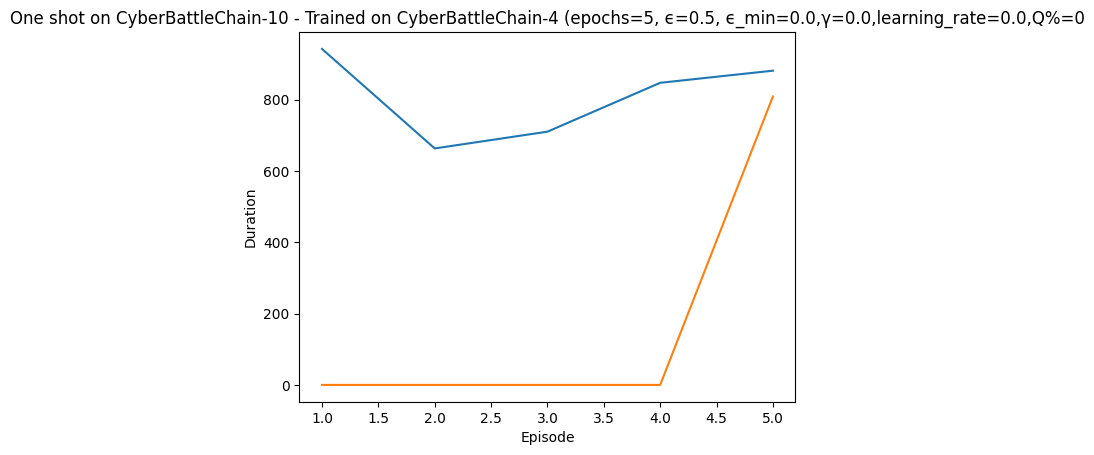

###### Benchmark
Learning with: episode_count=5,iteration_count=9000,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/5 'Benchmark' ϵ=1.0000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:   16.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:   16.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:   20.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:   20.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  120.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  120.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  131.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  131.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:  137.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:  137.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward:  146.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward:  146.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:  154.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:  154.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 167|reward:  154.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 228|reward:  154.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 293|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 293|reward:  254.0|last_reward_at:  293|Elapsed Time: 0:00:00||

Episode 1|Iteration 302|reward:  265.0|last_reward_at:  293|Elapsed Time: 0:00:00||

Episode 1|Iteration 302|reward:  265.0|last_reward_at:  302|Elapsed Time: 0:00:00||

Episode 1|Iteration 306|reward:  274.0|last_reward_at:  302|Elapsed Time: 0:00:00||

Episode 1|Iteration 306|reward:  274.0|last_reward_at:  306|Elapsed Time: 0:00:00||

Episode 1|Iteration 323|reward:  276.0|last_reward_at:  306|Elapsed Time: 0:00:00||

Episode 1|Iteration 323|reward:  276.0|last_reward_at:  323|Elapsed Time: 0:00:00||

Episode 1|Iteration 324|reward:  280.0|last_reward_at:  323|Elapsed Time: 0:00:00||

Episode 1|Iteration 324|reward:  280.0|last_reward_at:  324|Elapsed Time: 0:00:00||

Episode 1|Iteration 330|reward:  380.0|last_reward_at:  324|Elapsed Time: 0:00:00||

Episode 1|Iteration 330|reward:  380.0|last_reward_at:  330|Elapsed Time: 0:00:00||

Episode 1|Iteration 377|reward:  391.0|last_reward_at:  330|Elapsed Time: 0:00:00||

Episode 1|Iteration 377|reward:  391.0|last_reward_at:  377|Elapsed Time: 0:00:00||

Episode 1|Iteration 386|reward:  399.0|last_reward_at:  377|Elapsed Time: 0:00:00||

Episode 1|Iteration 386|reward:  399.0|last_reward_at:  386|Elapsed Time: 0:00:00||

Episode 1|Iteration 390|reward:  405.0|last_reward_at:  386|Elapsed Time: 0:00:00||

Episode 1|Iteration 390|reward:  405.0|last_reward_at:  390|Elapsed Time: 0:00:00||

Episode 1|Iteration 391|reward:  414.0|last_reward_at:  390|Elapsed Time: 0:00:00||

Episode 1|Iteration 391|reward:  414.0|last_reward_at:  391|Elapsed Time: 0:00:00||

Episode 1|Iteration 445|reward:  414.0|last_reward_at:  391|Elapsed Time: 0:00:00||

Episode 1|Iteration 496|reward:  414.0|last_reward_at:  391|Elapsed Time: 0:00:00||

Episode 1|Iteration 549|reward:  414.0|last_reward_at:  391|Elapsed Time: 0:00:00||

Episode 1|Iteration 598|reward:  414.0|last_reward_at:  391|Elapsed Time: 0:00:00||

Episode 1|Iteration 646|reward:  414.0|last_reward_at:  391|Elapsed Time: 0:00:01||

Episode 1|Iteration 684|reward:  414.0|last_reward_at:  391|Elapsed Time: 0:00:01||

Episode 1|Iteration 739|reward:  414.0|last_reward_at:  391|Elapsed Time: 0:00:01||

Episode 1|Iteration 747|reward:  514.0|last_reward_at:  391|Elapsed Time: 0:00:01||

Episode 1|Iteration 747|reward:  514.0|last_reward_at:  747|Elapsed Time: 0:00:01||

Episode 1|Iteration 784|reward:  528.0|last_reward_at:  747|Elapsed Time: 0:00:01||

Episode 1|Iteration 784|reward:  528.0|last_reward_at:  784|Elapsed Time: 0:00:01||

Episode 1|Iteration 797|reward:  534.0|last_reward_at:  784|Elapsed Time: 0:00:01||

Episode 1|Iteration 797|reward:  534.0|last_reward_at:  797|Elapsed Time: 0:00:01||

Episode 1|Iteration 839|reward:  534.0|last_reward_at:  797|Elapsed Time: 0:00:01||

Episode 1|Iteration 867|reward:  538.0|last_reward_at:  797|Elapsed Time: 0:00:01||

Episode 1|Iteration 867|reward:  538.0|last_reward_at:  867|Elapsed Time: 0:00:01||

Episode 1|Iteration 889|reward:  540.0|last_reward_at:  867|Elapsed Time: 0:00:01||

Episode 1|Iteration 889|reward:  540.0|last_reward_at:  889|Elapsed Time: 0:00:01||

Episode 1|Iteration 912|reward:  540.0|last_reward_at:  889|Elapsed Time: 0:00:01||

Episode 1|Iteration 944|reward:  540.0|last_reward_at:  889|Elapsed Time: 0:00:01||

Episode 1|Iteration 986|reward:  540.0|last_reward_at:  889|Elapsed Time: 0:00:01||

Episode 1|Iteration 1025|reward:  540.0|last_reward_at:  889|Elapsed Time: 0:00:01||

Episode 1|Iteration 1063|reward:  540.0|last_reward_at:  889|Elapsed Time: 0:00:02||

Episode 1|Iteration 1104|reward:  540.0|last_reward_at:  889|Elapsed Time: 0:00:02||

Episode 1|Iteration 1140|reward:  540.0|last_reward_at:  889|Elapsed Time: 0:00:02||

Episode 1|Iteration 1185|reward:  540.0|last_reward_at:  889|Elapsed Time: 0:00:02||

Episode 1|Iteration 1232|reward:  540.0|last_reward_at:  889|Elapsed Time: 0:00:02||

Episode 1|Iteration 1246|reward:  640.0|last_reward_at:  889|Elapsed Time: 0:00:02||

Episode 1|Iteration 1246|reward:  640.0|last_reward_at: 1246|Elapsed Time: 0:00:02||

Episode 1|Iteration 1285|reward:  640.0|last_reward_at: 1246|Elapsed Time: 0:00:02||

Episode 1|Iteration 1318|reward:  640.0|last_reward_at: 1246|Elapsed Time: 0:00:02||

Episode 1|Iteration 1351|reward:  640.0|last_reward_at: 1246|Elapsed Time: 0:00:02||

Episode 1|Iteration 1375|reward:  651.0|last_reward_at: 1246|Elapsed Time: 0:00:02||

Episode 1|Iteration 1375|reward:  651.0|last_reward_at: 1375|Elapsed Time: 0:00:02||

Episode 1|Iteration 1406|reward:  651.0|last_reward_at: 1375|Elapsed Time: 0:00:02||

Episode 1|Iteration 1407|reward:  657.0|last_reward_at: 1375|Elapsed Time: 0:00:02||

Episode 1|Iteration 1407|reward:  657.0|last_reward_at: 1407|Elapsed Time: 0:00:02||

Episode 1|Iteration 1428|reward:  665.0|last_reward_at: 1407|Elapsed Time: 0:00:03||

Episode 1|Iteration 1428|reward:  665.0|last_reward_at: 1428|Elapsed Time: 0:00:03||

Episode 1|Iteration 1462|reward:  674.0|last_reward_at: 1428|Elapsed Time: 0:00:03||

Episode 1|Iteration 1462|reward:  674.0|last_reward_at: 1462|Elapsed Time: 0:00:03||

Episode 1|Iteration 1482|reward:  674.0|last_reward_at: 1462|Elapsed Time: 0:00:03||

Episode 1|Iteration 1512|reward:  674.0|last_reward_at: 1462|Elapsed Time: 0:00:03||

Episode 1|Iteration 1548|reward:  674.0|last_reward_at: 1462|Elapsed Time: 0:00:03||

Episode 1|Iteration 1566|reward:  774.0|last_reward_at: 1462|Elapsed Time: 0:00:03||

Episode 1|Iteration 1566|reward:  774.0|last_reward_at: 1566|Elapsed Time: 0:00:03||

Episode 1|Iteration 1595|reward:  774.0|last_reward_at: 1566|Elapsed Time: 0:00:03||

Episode 1|Iteration 1604|reward:  785.0|last_reward_at: 1566|Elapsed Time: 0:00:03||

Episode 1|Iteration 1604|reward:  785.0|last_reward_at: 1604|Elapsed Time: 0:00:03||

Episode 1|Iteration 1614|reward:  789.0|last_reward_at: 1604|Elapsed Time: 0:00:03||

Episode 1|Iteration 1614|reward:  789.0|last_reward_at: 1614|Elapsed Time: 0:00:03||

Episode 1|Iteration 1639|reward:  789.0|last_reward_at: 1614|Elapsed Time: 0:00:03||

Episode 1|Iteration 1653|reward:  791.0|last_reward_at: 1614|Elapsed Time: 0:00:03||

Episode 1|Iteration 1653|reward:  791.0|last_reward_at: 1653|Elapsed Time: 0:00:03||

Episode 1|Iteration 1680|reward:  791.0|last_reward_at: 1653|Elapsed Time: 0:00:03||

Episode 1|Iteration 1708|reward:  791.0|last_reward_at: 1653|Elapsed Time: 0:00:03||

Episode 1|Iteration 1733|reward:  791.0|last_reward_at: 1653|Elapsed Time: 0:00:04||

Episode 1|Iteration 1755|reward:  791.0|last_reward_at: 1653|Elapsed Time: 0:00:04||

Episode 1|Iteration 1784|reward:  791.0|last_reward_at: 1653|Elapsed Time: 0:00:04||

Episode 1|Iteration 1812|reward:  791.0|last_reward_at: 1653|Elapsed Time: 0:00:04||

Episode 1|Iteration 1836|reward:  791.0|last_reward_at: 1653|Elapsed Time: 0:00:04||

Episode 1|Iteration 1839|reward:  800.0|last_reward_at: 1653|Elapsed Time: 0:00:04||

Episode 1|Iteration 1839|reward:  800.0|last_reward_at: 1839|Elapsed Time: 0:00:04||

Episode 1|Iteration 1863|reward:  800.0|last_reward_at: 1839|Elapsed Time: 0:00:04||

Episode 1|Iteration 1892|reward:  800.0|last_reward_at: 1839|Elapsed Time: 0:00:04||

Episode 1|Iteration 1918|reward:  800.0|last_reward_at: 1839|Elapsed Time: 0:00:04||

Episode 1|Iteration 1937|reward:  800.0|last_reward_at: 1839|Elapsed Time: 0:00:04||

Episode 1|Iteration 1962|reward:  800.0|last_reward_at: 1839|Elapsed Time: 0:00:05||

Episode 1|Iteration 1991|reward:  800.0|last_reward_at: 1839|Elapsed Time: 0:00:05||

Episode 1|Iteration 2014|reward:  800.0|last_reward_at: 1839|Elapsed Time: 0:00:05||

Episode 1|Iteration 2041|reward:  800.0|last_reward_at: 1839|Elapsed Time: 0:00:05||

Episode 1|Iteration 2071|reward:  800.0|last_reward_at: 1839|Elapsed Time: 0:00:05||

Episode 1|Iteration 2092|reward:  800.0|last_reward_at: 1839|Elapsed Time: 0:00:05||

Episode 1|Iteration 2115|reward:  800.0|last_reward_at: 1839|Elapsed Time: 0:00:05||

Episode 1|Iteration 2138|reward:  800.0|last_reward_at: 1839|Elapsed Time: 0:00:05||

Episode 1|Iteration 2161|reward:  800.0|last_reward_at: 1839|Elapsed Time: 0:00:05||

Episode 1|Iteration 2184|reward:  800.0|last_reward_at: 1839|Elapsed Time: 0:00:05||

Episode 1|Iteration 2213|reward:  800.0|last_reward_at: 1839|Elapsed Time: 0:00:06||

Episode 1|Iteration 2237|reward:  800.0|last_reward_at: 1839|Elapsed Time: 0:00:06||

Episode 1|Iteration 2263|reward:  800.0|last_reward_at: 1839|Elapsed Time: 0:00:06||

Episode 1|Iteration 2279|reward:  800.0|last_reward_at: 1839|Elapsed Time: 0:00:06||

Episode 1|Iteration 2304|reward:  800.0|last_reward_at: 1839|Elapsed Time: 0:00:06||

Episode 1|Iteration 2325|reward:  800.0|last_reward_at: 1839|Elapsed Time: 0:00:06||

Episode 1|Iteration 2350|reward:  800.0|last_reward_at: 1839|Elapsed Time: 0:00:06||

Episode 1|Iteration 2362|reward:  900.0|last_reward_at: 1839|Elapsed Time: 0:00:06||

Episode 1|Iteration 2362|reward:  900.0|last_reward_at: 2362|Elapsed Time: 0:00:06||

Episode 1|Iteration 2386|reward:  900.0|last_reward_at: 2362|Elapsed Time: 0:00:06||

Episode 1|Iteration 2414|reward:  900.0|last_reward_at: 2362|Elapsed Time: 0:00:06||

Episode 1|Iteration 2415|reward:  914.0|last_reward_at: 2362|Elapsed Time: 0:00:06||

Episode 1|Iteration 2415|reward:  914.0|last_reward_at: 2415|Elapsed Time: 0:00:06||

Episode 1|Iteration 2436|reward:  914.0|last_reward_at: 2415|Elapsed Time: 0:00:06||

Episode 1|Iteration 2456|reward:  914.0|last_reward_at: 2415|Elapsed Time: 0:00:07||

Episode 1|Iteration 2476|reward:  914.0|last_reward_at: 2415|Elapsed Time: 0:00:07||

Episode 1|Iteration 2487|reward:  920.0|last_reward_at: 2415|Elapsed Time: 0:00:07||

Episode 1|Iteration 2487|reward:  920.0|last_reward_at: 2487|Elapsed Time: 0:00:07||

Episode 1|Iteration 2499|reward:  926.0|last_reward_at: 2487|Elapsed Time: 0:00:07||

Episode 1|Iteration 2499|reward:  926.0|last_reward_at: 2499|Elapsed Time: 0:00:07||

Episode 1|Iteration 2502|reward:  934.0|last_reward_at: 2499|Elapsed Time: 0:00:07||

Episode 1|Iteration 2502|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:07||

Episode 1|Iteration 2527|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:07||

Episode 1|Iteration 2548|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:07||

Episode 1|Iteration 2568|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:07||

Episode 1|Iteration 2589|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:07||

Episode 1|Iteration 2613|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:07||

Episode 1|Iteration 2639|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:07||

Episode 1|Iteration 2663|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:08||

Episode 1|Iteration 2686|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:08||

Episode 1|Iteration 2705|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:08||

Episode 1|Iteration 2723|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:08||

Episode 1|Iteration 2735|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:08||

Episode 1|Iteration 2755|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:08||

Episode 1|Iteration 2780|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:08||

Episode 1|Iteration 2802|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:08||

Episode 1|Iteration 2822|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:08||

Episode 1|Iteration 2841|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:08||

Episode 1|Iteration 2865|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:09||

Episode 1|Iteration 2885|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:09||

Episode 1|Iteration 2907|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:09||

Episode 1|Iteration 2929|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:09||

Episode 1|Iteration 2948|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:09||

Episode 1|Iteration 2963|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:09||

Episode 1|Iteration 2982|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:09||

Episode 1|Iteration 2999|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:09||

Episode 1|Iteration 3022|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:09||

Episode 1|Iteration 3043|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:09||

Episode 1|Iteration 3065|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:10||

Episode 1|Iteration 3086|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:10||

Episode 1|Iteration 3108|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:10||

Episode 1|Iteration 3129|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:10||

Episode 1|Iteration 3153|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:10||

Episode 1|Iteration 3173|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:10||

Episode 1|Iteration 3190|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:10||

Episode 1|Iteration 3212|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:10||

Episode 1|Iteration 3233|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:10||

Episode 1|Iteration 3254|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:10||

Episode 1|Iteration 3277|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:11||

Episode 1|Iteration 3302|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:11||

Episode 1|Iteration 3324|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:11||

Episode 1|Iteration 3349|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:11||

Episode 1|Iteration 3374|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:11||

Episode 1|Iteration 3396|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:11||

Episode 1|Iteration 3416|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:11||

Episode 1|Iteration 3437|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:11||

Episode 1|Iteration 3460|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:11||

Episode 1|Iteration 3484|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:11||

Episode 1|Iteration 3509|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:12||

Episode 1|Iteration 3532|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:12||

Episode 1|Iteration 3550|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:12||

Episode 1|Iteration 3572|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:12||

Episode 1|Iteration 3598|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:12||

Episode 1|Iteration 3621|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:12||

Episode 1|Iteration 3642|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:12||

Episode 1|Iteration 3661|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:12||

Episode 1|Iteration 3682|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:12||

Episode 1|Iteration 3705|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:12||

Episode 1|Iteration 3728|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:13||

Episode 1|Iteration 3750|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:13||

Episode 1|Iteration 3772|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:13||

Episode 1|Iteration 3794|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:13||

Episode 1|Iteration 3815|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:13||

Episode 1|Iteration 3840|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:13||

Episode 1|Iteration 3861|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:13||

Episode 1|Iteration 3874|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:13||

Episode 1|Iteration 3896|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:13||

Episode 1|Iteration 3918|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:13||

Episode 1|Iteration 3938|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:14||

Episode 1|Iteration 3958|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:14||

Episode 1|Iteration 3982|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:14||

Episode 1|Iteration 4003|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:14||

Episode 1|Iteration 4026|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:14||

Episode 1|Iteration 4049|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:14||

Episode 1|Iteration 4069|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:14||

Episode 1|Iteration 4089|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:14||

Episode 1|Iteration 4102|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:14||

Episode 1|Iteration 4125|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:14||

Episode 1|Iteration 4150|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:15||

Episode 1|Iteration 4175|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:15||

Episode 1|Iteration 4199|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:15||

Episode 1|Iteration 4216|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:15||

Episode 1|Iteration 4238|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:15||

Episode 1|Iteration 4260|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:15||

Episode 1|Iteration 4281|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:15||

Episode 1|Iteration 4301|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:15||

Episode 1|Iteration 4323|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:15||

Episode 1|Iteration 4343|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:15||

Episode 1|Iteration 4359|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:16||

Episode 1|Iteration 4377|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:16||

Episode 1|Iteration 4396|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:16||

Episode 1|Iteration 4419|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:16||

Episode 1|Iteration 4438|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:16||

Episode 1|Iteration 4457|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:16||

Episode 1|Iteration 4480|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:16||

Episode 1|Iteration 4502|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:16||

Episode 1|Iteration 4520|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:16||

Episode 1|Iteration 4538|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:16||

Episode 1|Iteration 4557|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:17||

Episode 1|Iteration 4580|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:17||

Episode 1|Iteration 4602|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:17||

Episode 1|Iteration 4623|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:17||

Episode 1|Iteration 4646|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:17||

Episode 1|Iteration 4665|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:17||

Episode 1|Iteration 4683|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:17||

Episode 1|Iteration 4702|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:17||

Episode 1|Iteration 4723|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:17||

Episode 1|Iteration 4745|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:17||

Episode 1|Iteration 4764|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:18||

Episode 1|Iteration 4785|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:18||

Episode 1|Iteration 4807|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:18||

Episode 1|Iteration 4827|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:18||

Episode 1|Iteration 4849|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:18||

Episode 1|Iteration 4869|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:18||

Episode 1|Iteration 4895|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:18||

Episode 1|Iteration 4914|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:18||

Episode 1|Iteration 4933|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:18||

Episode 1|Iteration 4952|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:18||

Episode 1|Iteration 4973|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:19||

Episode 1|Iteration 4997|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:19||

Episode 1|Iteration 5013|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:19||

Episode 1|Iteration 5035|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:19||

Episode 1|Iteration 5057|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:19||

Episode 1|Iteration 5076|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:19||

Episode 1|Iteration 5094|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:19||

Episode 1|Iteration 5115|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:19||

Episode 1|Iteration 5139|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:19||

Episode 1|Iteration 5162|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:19||

Episode 1|Iteration 5185|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:20||

Episode 1|Iteration 5207|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:20||

Episode 1|Iteration 5228|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:20||

Episode 1|Iteration 5241|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:20||

Episode 1|Iteration 5262|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:20||

Episode 1|Iteration 5286|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:20||

Episode 1|Iteration 5308|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:20||

Episode 1|Iteration 5328|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:20||

Episode 1|Iteration 5348|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:20||

Episode 1|Iteration 5367|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:20||

Episode 1|Iteration 5388|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:21||

Episode 1|Iteration 5408|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:21||

Episode 1|Iteration 5431|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:21||

Episode 1|Iteration 5451|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:21||

Episode 1|Iteration 5469|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:21||

Episode 1|Iteration 5489|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:21||

Episode 1|Iteration 5509|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:21||

Episode 1|Iteration 5528|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:21||

Episode 1|Iteration 5550|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:21||

Episode 1|Iteration 5572|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:21||

Episode 1|Iteration 5583|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:22||

Episode 1|Iteration 5601|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:22||

Episode 1|Iteration 5620|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:22||

Episode 1|Iteration 5639|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:22||

Episode 1|Iteration 5658|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:22||

Episode 1|Iteration 5677|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:22||

Episode 1|Iteration 5697|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:22||

Episode 1|Iteration 5717|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:22||

Episode 1|Iteration 5736|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:22||

Episode 1|Iteration 5755|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:22||

Episode 1|Iteration 5776|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:23||

Episode 1|Iteration 5797|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:23||

Episode 1|Iteration 5811|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:23||

Episode 1|Iteration 5830|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:23||

Episode 1|Iteration 5852|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:23||

Episode 1|Iteration 5871|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:23||

Episode 1|Iteration 5892|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:23||

Episode 1|Iteration 5915|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:23||

Episode 1|Iteration 5925|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:23||

Episode 1|Iteration 5945|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:23||

Episode 1|Iteration 5965|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:23||

Episode 1|Iteration 5984|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:24||

Episode 1|Iteration 6007|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:24||

Episode 1|Iteration 6024|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:24||

Episode 1|Iteration 6038|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:24||

Episode 1|Iteration 6058|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:24||

Episode 1|Iteration 6079|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:24||

Episode 1|Iteration 6097|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:24||

Episode 1|Iteration 6115|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:24||

Episode 1|Iteration 6136|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:24||

Episode 1|Iteration 6152|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:24||

Episode 1|Iteration 6170|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:25||

Episode 1|Iteration 6189|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:25||

Episode 1|Iteration 6210|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:25||

Episode 1|Iteration 6229|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:25||

Episode 1|Iteration 6248|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:25||

Episode 1|Iteration 6266|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:25||

Episode 1|Iteration 6286|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:25||

Episode 1|Iteration 6304|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:25||

Episode 1|Iteration 6322|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:25||

Episode 1|Iteration 6342|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:25||

Episode 1|Iteration 6362|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:26||

Episode 1|Iteration 6380|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:26||

Episode 1|Iteration 6402|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:26||

Episode 1|Iteration 6418|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:26||

Episode 1|Iteration 6435|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:26||

Episode 1|Iteration 6453|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:26||

Episode 1|Iteration 6473|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:26||

Episode 1|Iteration 6491|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:26||

Episode 1|Iteration 6514|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:26||

Episode 1|Iteration 6536|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:26||

Episode 1|Iteration 6555|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:27||

Episode 1|Iteration 6573|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:27||

Episode 1|Iteration 6593|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:27||

Episode 1|Iteration 6608|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:27||

Episode 1|Iteration 6627|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:27||

Episode 1|Iteration 6647|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:27||

Episode 1|Iteration 6665|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:27||

Episode 1|Iteration 6683|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:27||

Episode 1|Iteration 6705|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:27||

Episode 1|Iteration 6722|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:27||

Episode 1|Iteration 6740|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:28||

Episode 1|Iteration 6760|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:28||

Episode 1|Iteration 6779|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:28||

Episode 1|Iteration 6798|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:28||

Episode 1|Iteration 6814|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:28||

Episode 1|Iteration 6833|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:28||

Episode 1|Iteration 6852|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:28||

Episode 1|Iteration 6871|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:28||

Episode 1|Iteration 6892|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:28||

Episode 1|Iteration 6911|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:28||

Episode 1|Iteration 6929|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:29||

Episode 1|Iteration 6947|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:29||

Episode 1|Iteration 6965|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:29||

Episode 1|Iteration 6983|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:29||

Episode 1|Iteration 6999|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:29||

Episode 1|Iteration 7017|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:29||

Episode 1|Iteration 7035|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:29||

Episode 1|Iteration 7052|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:29||

Episode 1|Iteration 7064|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:29||

Episode 1|Iteration 7082|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:29||

Episode 1|Iteration 7099|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:30||

Episode 1|Iteration 7116|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:30||

Episode 1|Iteration 7131|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:30||

Episode 1|Iteration 7147|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:30||

Episode 1|Iteration 7164|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:30||

Episode 1|Iteration 7178|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:30||

Episode 1|Iteration 7194|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:30||

Episode 1|Iteration 7210|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:30||

Episode 1|Iteration 7230|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:30||

Episode 1|Iteration 7254|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:30||

Episode 1|Iteration 7279|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:31||

Episode 1|Iteration 7292|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:31||

Episode 1|Iteration 7315|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:31||

Episode 1|Iteration 7338|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:31||

Episode 1|Iteration 7358|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:31||

Episode 1|Iteration 7378|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:31||

Episode 1|Iteration 7396|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:31||

Episode 1|Iteration 7406|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:31||

Episode 1|Iteration 7423|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:31||

Episode 1|Iteration 7446|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:31||

Episode 1|Iteration 7466|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:31||

Episode 1|Iteration 7487|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:32||

Episode 1|Iteration 7504|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:32||

Episode 1|Iteration 7519|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:32||

Episode 1|Iteration 7535|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:32||

Episode 1|Iteration 7558|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:32||

Episode 1|Iteration 7575|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:32||

Episode 1|Iteration 7594|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:32||

Episode 1|Iteration 7612|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:32||

Episode 1|Iteration 7633|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:32||

Episode 1|Iteration 7651|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:32||

Episode 1|Iteration 7669|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:33||

Episode 1|Iteration 7688|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:33||

Episode 1|Iteration 7709|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:33||

Episode 1|Iteration 7728|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:33||

Episode 1|Iteration 7747|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:33||

Episode 1|Iteration 7767|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:33||

Episode 1|Iteration 7788|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:33||

Episode 1|Iteration 7806|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:33||

Episode 1|Iteration 7824|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:33||

Episode 1|Iteration 7842|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:33||

Episode 1|Iteration 7860|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:34||

Episode 1|Iteration 7882|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:34||

Episode 1|Iteration 7904|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:34||

Episode 1|Iteration 7922|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:34||

Episode 1|Iteration 7942|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:34||

Episode 1|Iteration 7958|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:34||

Episode 1|Iteration 7975|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:34||

Episode 1|Iteration 7994|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:34||

Episode 1|Iteration 8014|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:34||

Episode 1|Iteration 8034|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:35||

Episode 1|Iteration 8057|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:35||

Episode 1|Iteration 8076|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:35||

Episode 1|Iteration 8089|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:35||

Episode 1|Iteration 8107|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:35||

Episode 1|Iteration 8130|reward:  934.0|last_reward_at: 2502|Elapsed Time: 0:00:35||

Episode 1|Iteration 8134|reward: 1034.0|last_reward_at: 2502|Elapsed Time: 0:00:35||

Episode 1|Iteration 8134|reward: 1034.0|last_reward_at: 8134|Elapsed Time: 0:00:35||

Episode 1|Iteration 8151|reward: 1034.0|last_reward_at: 8134|Elapsed Time: 0:00:35||

Episode 1|Iteration 8166|reward: 1034.0|last_reward_at: 8134|Elapsed Time: 0:00:35||

Episode 1|Iteration 8185|reward: 1034.0|last_reward_at: 8134|Elapsed Time: 0:00:35||

Episode 1|Iteration 8202|reward: 1034.0|last_reward_at: 8134|Elapsed Time: 0:00:35||

Episode 1|Iteration 8217|reward: 1034.0|last_reward_at: 8134|Elapsed Time: 0:00:36||

Episode 1|Iteration 8234|reward: 1034.0|last_reward_at: 8134|Elapsed Time: 0:00:36||

Episode 1|Iteration 8252|reward: 1034.0|last_reward_at: 8134|Elapsed Time: 0:00:36||

Episode 1|Iteration 8255|reward: 1045.0|last_reward_at: 8134|Elapsed Time: 0:00:36||

Episode 1|Iteration 8255|reward: 1045.0|last_reward_at: 8255|Elapsed Time: 0:00:36||

Episode 1|Iteration 8271|reward: 1045.0|last_reward_at: 8255|Elapsed Time: 0:00:36||

Episode 1|Iteration 8281|reward: 1049.0|last_reward_at: 8255|Elapsed Time: 0:00:36||

Episode 1|Iteration 8281|reward: 1049.0|last_reward_at: 8281|Elapsed Time: 0:00:36||

Episode 1|Iteration 8298|reward: 1049.0|last_reward_at: 8281|Elapsed Time: 0:00:36||

Episode 1|Iteration 8306|reward: 1051.0|last_reward_at: 8281|Elapsed Time: 0:00:36||

Episode 1|Iteration 8306|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:36||

Episode 1|Iteration 8317|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:36||

Episode 1|Iteration 8331|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:36||

Episode 1|Iteration 8347|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:36||

Episode 1|Iteration 8367|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:36||

Episode 1|Iteration 8383|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:37||

Episode 1|Iteration 8399|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:37||

Episode 1|Iteration 8415|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:37||

Episode 1|Iteration 8431|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:37||

Episode 1|Iteration 8446|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:37||

Episode 1|Iteration 8463|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:37||

Episode 1|Iteration 8480|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:37||

Episode 1|Iteration 8496|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:37||

Episode 1|Iteration 8512|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:37||

Episode 1|Iteration 8530|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:37||

Episode 1|Iteration 8545|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:38||

Episode 1|Iteration 8560|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:38||

Episode 1|Iteration 8577|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:38||

Episode 1|Iteration 8596|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:38||

Episode 1|Iteration 8615|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:38||

Episode 1|Iteration 8632|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:38||

Episode 1|Iteration 8647|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:38||

Episode 1|Iteration 8659|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:38||

Episode 1|Iteration 8676|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:38||

Episode 1|Iteration 8694|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:38||

Episode 1|Iteration 8710|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:39||

Episode 1|Iteration 8728|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:39||

Episode 1|Iteration 8747|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:39||

Episode 1|Iteration 8765|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:39||

Episode 1|Iteration 8784|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:39||

Episode 1|Iteration 8801|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:39||

Episode 1|Iteration 8821|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:39||

Episode 1|Iteration 8838|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:39||

Episode 1|Iteration 8858|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:39||

Episode 1|Iteration 8877|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:39||

Episode 1|Iteration 8887|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:40||

Episode 1|Iteration 8903|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:40||

Episode 1|Iteration 8918|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:40||

Episode 1|Iteration 8936|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:40||

Episode 1|Iteration 8952|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:40||

Episode 1|Iteration 8968|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:40||

Episode 1|Iteration 8986|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:40||

Episode 1|Iteration 9000|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:40||

Episode 1|Iteration 9000|reward: 1051.0|last_reward_at: 8306|Elapsed Time: 0:00:40||

  Episode 1 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 16/2465 (0.01)
    explore-remote: 18/3239 (0.01)
    explore-connect: 8/3254 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Benchmark' ϵ=1.0000, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward:   14.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:   16.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:   16.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  116.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  116.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward:  118.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward:  118.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  132.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  132.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 58|reward:  138.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 58|reward:  138.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 2|Iteration 72|reward:  144.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 2|Iteration 72|reward:  144.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 2|Iteration 84|reward:  152.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 2|Iteration 84|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 175|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 228|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 337|reward:  152.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 368|reward:  252.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 368|reward:  252.0|last_reward_at:  368|Elapsed Time: 0:00:00||

Episode 2|Iteration 424|reward:  263.0|last_reward_at:  368|Elapsed Time: 0:00:00||

Episode 2|Iteration 424|reward:  263.0|last_reward_at:  424|Elapsed Time: 0:00:00||

Episode 2|Iteration 440|reward:  272.0|last_reward_at:  424|Elapsed Time: 0:00:00||

Episode 2|Iteration 440|reward:  272.0|last_reward_at:  440|Elapsed Time: 0:00:00||

Episode 2|Iteration 455|reward:  274.0|last_reward_at:  440|Elapsed Time: 0:00:00||

Episode 2|Iteration 455|reward:  274.0|last_reward_at:  455|Elapsed Time: 0:00:00||

Episode 2|Iteration 464|reward:  374.0|last_reward_at:  455|Elapsed Time: 0:00:00||

Episode 2|Iteration 464|reward:  374.0|last_reward_at:  464|Elapsed Time: 0:00:00||

Episode 2|Iteration 466|reward:  385.0|last_reward_at:  464|Elapsed Time: 0:00:00||

Episode 2|Iteration 466|reward:  385.0|last_reward_at:  466|Elapsed Time: 0:00:00||

Episode 2|Iteration 472|reward:  393.0|last_reward_at:  466|Elapsed Time: 0:00:00||

Episode 2|Iteration 472|reward:  393.0|last_reward_at:  472|Elapsed Time: 0:00:00||

Episode 2|Iteration 488|reward:  399.0|last_reward_at:  472|Elapsed Time: 0:00:00||

Episode 2|Iteration 488|reward:  399.0|last_reward_at:  488|Elapsed Time: 0:00:00||

Episode 2|Iteration 517|reward:  408.0|last_reward_at:  488|Elapsed Time: 0:00:00||

Episode 2|Iteration 517|reward:  408.0|last_reward_at:  517|Elapsed Time: 0:00:00||

Episode 2|Iteration 522|reward:  508.0|last_reward_at:  517|Elapsed Time: 0:00:00||

Episode 2|Iteration 522|reward:  508.0|last_reward_at:  522|Elapsed Time: 0:00:00||

Episode 2|Iteration 527|reward:  510.0|last_reward_at:  522|Elapsed Time: 0:00:00||

Episode 2|Iteration 527|reward:  510.0|last_reward_at:  527|Elapsed Time: 0:00:00||

Episode 2|Iteration 541|reward:  521.0|last_reward_at:  527|Elapsed Time: 0:00:00||

Episode 2|Iteration 541|reward:  521.0|last_reward_at:  541|Elapsed Time: 0:00:00||

Episode 2|Iteration 565|reward:  523.0|last_reward_at:  541|Elapsed Time: 0:00:00||

Episode 2|Iteration 565|reward:  523.0|last_reward_at:  565|Elapsed Time: 0:00:00||

Episode 2|Iteration 603|reward:  523.0|last_reward_at:  565|Elapsed Time: 0:00:00||

Episode 2|Iteration 613|reward:  527.0|last_reward_at:  565|Elapsed Time: 0:00:00||

Episode 2|Iteration 613|reward:  527.0|last_reward_at:  613|Elapsed Time: 0:00:00||

Episode 2|Iteration 655|reward:  527.0|last_reward_at:  613|Elapsed Time: 0:00:01||

Episode 2|Iteration 684|reward:  527.0|last_reward_at:  613|Elapsed Time: 0:00:01||

Episode 2|Iteration 720|reward:  527.0|last_reward_at:  613|Elapsed Time: 0:00:01||

Episode 2|Iteration 757|reward:  536.0|last_reward_at:  613|Elapsed Time: 0:00:01||

Episode 2|Iteration 757|reward:  536.0|last_reward_at:  757|Elapsed Time: 0:00:01||

Episode 2|Iteration 789|reward:  536.0|last_reward_at:  757|Elapsed Time: 0:00:01||

Episode 2|Iteration 823|reward:  536.0|last_reward_at:  757|Elapsed Time: 0:00:01||

Episode 2|Iteration 861|reward:  536.0|last_reward_at:  757|Elapsed Time: 0:00:01||

Episode 2|Iteration 896|reward:  536.0|last_reward_at:  757|Elapsed Time: 0:00:01||

Episode 2|Iteration 938|reward:  536.0|last_reward_at:  757|Elapsed Time: 0:00:01||

Episode 2|Iteration 968|reward:  536.0|last_reward_at:  757|Elapsed Time: 0:00:01||

Episode 2|Iteration 1006|reward:  536.0|last_reward_at:  757|Elapsed Time: 0:00:02||

Episode 2|Iteration 1026|reward:  636.0|last_reward_at:  757|Elapsed Time: 0:00:02||

Episode 2|Iteration 1026|reward:  636.0|last_reward_at: 1026|Elapsed Time: 0:00:02||

Episode 2|Iteration 1055|reward:  636.0|last_reward_at: 1026|Elapsed Time: 0:00:02||

Episode 2|Iteration 1058|reward:  647.0|last_reward_at: 1026|Elapsed Time: 0:00:02||

Episode 2|Iteration 1058|reward:  647.0|last_reward_at: 1058|Elapsed Time: 0:00:02||

Episode 2|Iteration 1059|reward:  656.0|last_reward_at: 1058|Elapsed Time: 0:00:02||

Episode 2|Iteration 1059|reward:  656.0|last_reward_at: 1059|Elapsed Time: 0:00:02||

Episode 2|Iteration 1082|reward:  662.0|last_reward_at: 1059|Elapsed Time: 0:00:02||

Episode 2|Iteration 1082|reward:  662.0|last_reward_at: 1082|Elapsed Time: 0:00:02||

Episode 2|Iteration 1115|reward:  762.0|last_reward_at: 1082|Elapsed Time: 0:00:02||

Episode 2|Iteration 1115|reward:  762.0|last_reward_at: 1115|Elapsed Time: 0:00:02||

Episode 2|Iteration 1126|reward:  773.0|last_reward_at: 1115|Elapsed Time: 0:00:02||

Episode 2|Iteration 1126|reward:  773.0|last_reward_at: 1126|Elapsed Time: 0:00:02||

Episode 2|Iteration 1141|reward:  777.0|last_reward_at: 1126|Elapsed Time: 0:00:02||

Episode 2|Iteration 1141|reward:  777.0|last_reward_at: 1141|Elapsed Time: 0:00:02||

Episode 2|Iteration 1165|reward:  777.0|last_reward_at: 1141|Elapsed Time: 0:00:02||

Episode 2|Iteration 1176|reward:  786.0|last_reward_at: 1141|Elapsed Time: 0:00:02||

Episode 2|Iteration 1176|reward:  786.0|last_reward_at: 1176|Elapsed Time: 0:00:02||

Episode 2|Iteration 1200|reward:  786.0|last_reward_at: 1176|Elapsed Time: 0:00:02||

Episode 2|Iteration 1209|reward:  788.0|last_reward_at: 1176|Elapsed Time: 0:00:02||

Episode 2|Iteration 1209|reward:  788.0|last_reward_at: 1209|Elapsed Time: 0:00:02||

Episode 2|Iteration 1220|reward:  794.0|last_reward_at: 1209|Elapsed Time: 0:00:02||

Episode 2|Iteration 1220|reward:  794.0|last_reward_at: 1220|Elapsed Time: 0:00:02||

Episode 2|Iteration 1242|reward:  794.0|last_reward_at: 1220|Elapsed Time: 0:00:02||

Episode 2|Iteration 1270|reward:  794.0|last_reward_at: 1220|Elapsed Time: 0:00:03||

Episode 2|Iteration 1293|reward:  794.0|last_reward_at: 1220|Elapsed Time: 0:00:03||

Episode 2|Iteration 1316|reward:  794.0|last_reward_at: 1220|Elapsed Time: 0:00:03||

Episode 2|Iteration 1342|reward:  794.0|last_reward_at: 1220|Elapsed Time: 0:00:03||

Episode 2|Iteration 1368|reward:  794.0|last_reward_at: 1220|Elapsed Time: 0:00:03||

Episode 2|Iteration 1389|reward:  794.0|last_reward_at: 1220|Elapsed Time: 0:00:03||

Episode 2|Iteration 1414|reward:  794.0|last_reward_at: 1220|Elapsed Time: 0:00:03||

Episode 2|Iteration 1438|reward:  794.0|last_reward_at: 1220|Elapsed Time: 0:00:03||

Episode 2|Iteration 1460|reward:  794.0|last_reward_at: 1220|Elapsed Time: 0:00:03||

Episode 2|Iteration 1482|reward:  794.0|last_reward_at: 1220|Elapsed Time: 0:00:03||

Episode 2|Iteration 1506|reward:  794.0|last_reward_at: 1220|Elapsed Time: 0:00:04||

Episode 2|Iteration 1532|reward:  794.0|last_reward_at: 1220|Elapsed Time: 0:00:04||

Episode 2|Iteration 1554|reward:  794.0|last_reward_at: 1220|Elapsed Time: 0:00:04||

Episode 2|Iteration 1582|reward:  794.0|last_reward_at: 1220|Elapsed Time: 0:00:04||

Episode 2|Iteration 1595|reward:  794.0|last_reward_at: 1220|Elapsed Time: 0:00:04||

Episode 2|Iteration 1621|reward:  794.0|last_reward_at: 1220|Elapsed Time: 0:00:04||

Episode 2|Iteration 1643|reward:  794.0|last_reward_at: 1220|Elapsed Time: 0:00:04||

Episode 2|Iteration 1671|reward:  794.0|last_reward_at: 1220|Elapsed Time: 0:00:04||

Episode 2|Iteration 1699|reward:  794.0|last_reward_at: 1220|Elapsed Time: 0:00:04||

Episode 2|Iteration 1724|reward:  794.0|last_reward_at: 1220|Elapsed Time: 0:00:04||

Episode 2|Iteration 1752|reward:  794.0|last_reward_at: 1220|Elapsed Time: 0:00:05||

Episode 2|Iteration 1783|reward:  794.0|last_reward_at: 1220|Elapsed Time: 0:00:05||

Episode 2|Iteration 1798|reward:  894.0|last_reward_at: 1220|Elapsed Time: 0:00:05||

Episode 2|Iteration 1798|reward:  894.0|last_reward_at: 1798|Elapsed Time: 0:00:05||

Episode 2|Iteration 1821|reward:  894.0|last_reward_at: 1798|Elapsed Time: 0:00:05||

Episode 2|Iteration 1838|reward:  908.0|last_reward_at: 1798|Elapsed Time: 0:00:05||

Episode 2|Iteration 1838|reward:  908.0|last_reward_at: 1838|Elapsed Time: 0:00:05||

Episode 2|Iteration 1861|reward:  908.0|last_reward_at: 1838|Elapsed Time: 0:00:05||

Episode 2|Iteration 1882|reward:  908.0|last_reward_at: 1838|Elapsed Time: 0:00:05||

Episode 2|Iteration 1888|reward:  914.0|last_reward_at: 1838|Elapsed Time: 0:00:05||

Episode 2|Iteration 1888|reward:  914.0|last_reward_at: 1888|Elapsed Time: 0:00:05||

Episode 2|Iteration 1911|reward:  914.0|last_reward_at: 1888|Elapsed Time: 0:00:05||

Episode 2|Iteration 1929|reward:  914.0|last_reward_at: 1888|Elapsed Time: 0:00:05||

Episode 2|Iteration 1951|reward:  914.0|last_reward_at: 1888|Elapsed Time: 0:00:05||

Episode 2|Iteration 1972|reward:  914.0|last_reward_at: 1888|Elapsed Time: 0:00:06||

Episode 2|Iteration 1995|reward:  914.0|last_reward_at: 1888|Elapsed Time: 0:00:06||

Episode 2|Iteration 2014|reward:  914.0|last_reward_at: 1888|Elapsed Time: 0:00:06||

Episode 2|Iteration 2019|reward:  922.0|last_reward_at: 1888|Elapsed Time: 0:00:06||

Episode 2|Iteration 2019|reward:  922.0|last_reward_at: 2019|Elapsed Time: 0:00:06||

Episode 2|Iteration 2039|reward:  922.0|last_reward_at: 2019|Elapsed Time: 0:00:06||

Episode 2|Iteration 2061|reward:  922.0|last_reward_at: 2019|Elapsed Time: 0:00:06||

Episode 2|Iteration 2079|reward:  922.0|last_reward_at: 2019|Elapsed Time: 0:00:06||

Episode 2|Iteration 2099|reward:  922.0|last_reward_at: 2019|Elapsed Time: 0:00:06||

Episode 2|Iteration 2120|reward:  922.0|last_reward_at: 2019|Elapsed Time: 0:00:06||

Episode 2|Iteration 2144|reward:  922.0|last_reward_at: 2019|Elapsed Time: 0:00:06||

Episode 2|Iteration 2165|reward:  922.0|last_reward_at: 2019|Elapsed Time: 0:00:06||

Episode 2|Iteration 2185|reward:  922.0|last_reward_at: 2019|Elapsed Time: 0:00:07||

Episode 2|Iteration 2194|reward:  928.0|last_reward_at: 2019|Elapsed Time: 0:00:07||

Episode 2|Iteration 2194|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:07||

Episode 2|Iteration 2217|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:07||

Episode 2|Iteration 2243|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:07||

Episode 2|Iteration 2266|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:07||

Episode 2|Iteration 2279|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:07||

Episode 2|Iteration 2299|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:07||

Episode 2|Iteration 2322|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:07||

Episode 2|Iteration 2344|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:07||

Episode 2|Iteration 2363|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:07||

Episode 2|Iteration 2383|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:07||

Episode 2|Iteration 2405|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:08||

Episode 2|Iteration 2425|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:08||

Episode 2|Iteration 2446|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:08||

Episode 2|Iteration 2468|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:08||

Episode 2|Iteration 2490|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:08||

Episode 2|Iteration 2507|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:08||

Episode 2|Iteration 2528|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:08||

Episode 2|Iteration 2551|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:08||

Episode 2|Iteration 2574|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:08||

Episode 2|Iteration 2594|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:08||

Episode 2|Iteration 2618|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:09||

Episode 2|Iteration 2643|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:09||

Episode 2|Iteration 2664|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:09||

Episode 2|Iteration 2684|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:09||

Episode 2|Iteration 2705|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:09||

Episode 2|Iteration 2726|reward:  928.0|last_reward_at: 2194|Elapsed Time: 0:00:09||

Episode 2|Iteration 2749|reward: 1028.0|last_reward_at: 2194|Elapsed Time: 0:00:09||

Episode 2|Iteration 2749|reward: 1028.0|last_reward_at: 2749|Elapsed Time: 0:00:09||

Episode 2|Iteration 2770|reward: 1028.0|last_reward_at: 2749|Elapsed Time: 0:00:09||

Episode 2|Iteration 2788|reward: 1028.0|last_reward_at: 2749|Elapsed Time: 0:00:09||

Episode 2|Iteration 2806|reward: 1028.0|last_reward_at: 2749|Elapsed Time: 0:00:10||

Episode 2|Iteration 2827|reward: 1028.0|last_reward_at: 2749|Elapsed Time: 0:00:10||

Episode 2|Iteration 2846|reward: 1028.0|last_reward_at: 2749|Elapsed Time: 0:00:10||

Episode 2|Iteration 2864|reward: 1028.0|last_reward_at: 2749|Elapsed Time: 0:00:10||

Episode 2|Iteration 2885|reward: 1028.0|last_reward_at: 2749|Elapsed Time: 0:00:10||

Episode 2|Iteration 2897|reward: 1028.0|last_reward_at: 2749|Elapsed Time: 0:00:10||

Episode 2|Iteration 2902|reward: 1039.0|last_reward_at: 2749|Elapsed Time: 0:00:10||

Episode 2|Iteration 2902|reward: 1039.0|last_reward_at: 2902|Elapsed Time: 0:00:10||

Episode 2|Iteration 2914|reward: 1041.0|last_reward_at: 2902|Elapsed Time: 0:00:10||

Episode 2|Iteration 2914|reward: 1041.0|last_reward_at: 2914|Elapsed Time: 0:00:10||

Episode 2|Iteration 2933|reward: 1041.0|last_reward_at: 2914|Elapsed Time: 0:00:10||

Episode 2|Iteration 2954|reward: 1041.0|last_reward_at: 2914|Elapsed Time: 0:00:10||

Episode 2|Iteration 2963|reward: 1041.0|last_reward_at: 2914|Elapsed Time: 0:00:10||

Episode 2|Iteration 2971|reward: 1045.0|last_reward_at: 2914|Elapsed Time: 0:00:10||

Episode 2|Iteration 2971|reward: 1045.0|last_reward_at: 2971|Elapsed Time: 0:00:10||

Episode 2|Iteration 2988|reward: 1045.0|last_reward_at: 2971|Elapsed Time: 0:00:11||

Episode 2|Iteration 3006|reward: 1045.0|last_reward_at: 2971|Elapsed Time: 0:00:11||

Episode 2|Iteration 3024|reward: 1045.0|last_reward_at: 2971|Elapsed Time: 0:00:11||

Episode 2|Iteration 3044|reward: 1045.0|last_reward_at: 2971|Elapsed Time: 0:00:11||

Episode 2|Iteration 3066|reward: 1045.0|last_reward_at: 2971|Elapsed Time: 0:00:11||

Episode 2|Iteration 3076|reward: 1045.0|last_reward_at: 2971|Elapsed Time: 0:00:11||

Episode 2|Iteration 3092|reward: 1045.0|last_reward_at: 2971|Elapsed Time: 0:00:11||

Episode 2|Iteration 3101|reward: 1054.0|last_reward_at: 2971|Elapsed Time: 0:00:11||

Episode 2|Iteration 3101|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:11||

Episode 2|Iteration 3119|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:11||

Episode 2|Iteration 3139|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:11||

Episode 2|Iteration 3159|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:11||

Episode 2|Iteration 3176|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:12||

Episode 2|Iteration 3190|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:12||

Episode 2|Iteration 3206|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:12||

Episode 2|Iteration 3223|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:12||

Episode 2|Iteration 3239|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:12||

Episode 2|Iteration 3255|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:12||

Episode 2|Iteration 3273|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:12||

Episode 2|Iteration 3292|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:12||

Episode 2|Iteration 3304|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:12||

Episode 2|Iteration 3322|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:12||

Episode 2|Iteration 3338|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:13||

Episode 2|Iteration 3354|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:13||

Episode 2|Iteration 3372|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:13||

Episode 2|Iteration 3389|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:13||

Episode 2|Iteration 3408|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:13||

Episode 2|Iteration 3429|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:13||

Episode 2|Iteration 3449|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:13||

Episode 2|Iteration 3467|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:13||

Episode 2|Iteration 3487|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:13||

Episode 2|Iteration 3507|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:13||

Episode 2|Iteration 3525|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:14||

Episode 2|Iteration 3542|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:14||

Episode 2|Iteration 3558|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:14||

Episode 2|Iteration 3573|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:14||

Episode 2|Iteration 3589|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:14||

Episode 2|Iteration 3606|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:14||

Episode 2|Iteration 3620|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:14||

Episode 2|Iteration 3639|reward: 1054.0|last_reward_at: 3101|Elapsed Time: 0:00:14||

Episode 2|Iteration 3654|reward: 1154.0|last_reward_at: 3101|Elapsed Time: 0:00:14||

Episode 2|Iteration 3654|reward: 1154.0|last_reward_at: 3654|Elapsed Time: 0:00:14||

Episode 2|Iteration 3671|reward: 1154.0|last_reward_at: 3654|Elapsed Time: 0:00:14||

Episode 2|Iteration 3678|reward: 1168.0|last_reward_at: 3654|Elapsed Time: 0:00:15||

Episode 2|Iteration 3678|reward: 1168.0|last_reward_at: 3678|Elapsed Time: 0:00:15||

Episode 2|Iteration 3693|reward: 1168.0|last_reward_at: 3678|Elapsed Time: 0:00:15||

Episode 2|Iteration 3707|reward: 1168.0|last_reward_at: 3678|Elapsed Time: 0:00:15||

Episode 2|Iteration 3712|reward: 1174.0|last_reward_at: 3678|Elapsed Time: 0:00:15||

Episode 2|Iteration 3712|reward: 1174.0|last_reward_at: 3712|Elapsed Time: 0:00:15||

Episode 2|Iteration 3717|reward: 1180.0|last_reward_at: 3712|Elapsed Time: 0:00:15||

Episode 2|Iteration 3717|reward: 1180.0|last_reward_at: 3717|Elapsed Time: 0:00:15||

Episode 2|Iteration 3720|reward: 1188.0|last_reward_at: 3717|Elapsed Time: 0:00:15||

Episode 2|Iteration 3720|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:15||

Episode 2|Iteration 3737|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:15||

Episode 2|Iteration 3753|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:15||

Episode 2|Iteration 3770|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:15||

Episode 2|Iteration 3790|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:15||

Episode 2|Iteration 3805|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:15||

Episode 2|Iteration 3818|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:15||

Episode 2|Iteration 3834|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:16||

Episode 2|Iteration 3852|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:16||

Episode 2|Iteration 3869|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:16||

Episode 2|Iteration 3886|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:16||

Episode 2|Iteration 3901|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:16||

Episode 2|Iteration 3917|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:16||

Episode 2|Iteration 3933|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:16||

Episode 2|Iteration 3948|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:16||

Episode 2|Iteration 3964|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:16||

Episode 2|Iteration 3978|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:16||

Episode 2|Iteration 3988|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:17||

Episode 2|Iteration 4005|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:17||

Episode 2|Iteration 4022|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:17||

Episode 2|Iteration 4037|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:17||

Episode 2|Iteration 4053|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:17||

Episode 2|Iteration 4070|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:17||

Episode 2|Iteration 4088|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:17||

Episode 2|Iteration 4102|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:17||

Episode 2|Iteration 4118|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:17||

Episode 2|Iteration 4134|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:17||

Episode 2|Iteration 4150|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:18||

Episode 2|Iteration 4169|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:18||

Episode 2|Iteration 4186|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:18||

Episode 2|Iteration 4202|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:18||

Episode 2|Iteration 4216|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:18||

Episode 2|Iteration 4230|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:18||

Episode 2|Iteration 4248|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:18||

Episode 2|Iteration 4263|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:18||

Episode 2|Iteration 4278|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:18||

Episode 2|Iteration 4294|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:18||

Episode 2|Iteration 4310|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:19||

Episode 2|Iteration 4326|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:19||

Episode 2|Iteration 4340|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:19||

Episode 2|Iteration 4354|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:19||

Episode 2|Iteration 4369|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:19||

Episode 2|Iteration 4386|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:19||

Episode 2|Iteration 4401|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:19||

Episode 2|Iteration 4417|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:19||

Episode 2|Iteration 4433|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:19||

Episode 2|Iteration 4444|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:19||

Episode 2|Iteration 4457|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:20||

Episode 2|Iteration 4468|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:20||

Episode 2|Iteration 4483|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:20||

Episode 2|Iteration 4497|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:20||

Episode 2|Iteration 4511|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:20||

Episode 2|Iteration 4525|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:20||

Episode 2|Iteration 4539|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:20||

Episode 2|Iteration 4556|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:20||

Episode 2|Iteration 4571|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:20||

Episode 2|Iteration 4588|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:21||

Episode 2|Iteration 4604|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:21||

Episode 2|Iteration 4620|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:21||

Episode 2|Iteration 4634|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:21||

Episode 2|Iteration 4649|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:21||

Episode 2|Iteration 4664|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:21||

Episode 2|Iteration 4679|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:21||

Episode 2|Iteration 4694|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:21||

Episode 2|Iteration 4710|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:21||

Episode 2|Iteration 4725|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:21||

Episode 2|Iteration 4741|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:22||

Episode 2|Iteration 4757|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:22||

Episode 2|Iteration 4774|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:22||

Episode 2|Iteration 4785|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:22||

Episode 2|Iteration 4800|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:22||

Episode 2|Iteration 4814|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:22||

Episode 2|Iteration 4832|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:22||

Episode 2|Iteration 4847|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:22||

Episode 2|Iteration 4861|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:22||

Episode 2|Iteration 4876|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:22||

Episode 2|Iteration 4890|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:23||

Episode 2|Iteration 4899|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:23||

Episode 2|Iteration 4913|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:23||

Episode 2|Iteration 4930|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:23||

Episode 2|Iteration 4945|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:23||

Episode 2|Iteration 4960|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:23||

Episode 2|Iteration 4977|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:23||

Episode 2|Iteration 4994|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:23||

Episode 2|Iteration 5011|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:23||

Episode 2|Iteration 5028|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:23||

Episode 2|Iteration 5045|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:24||

Episode 2|Iteration 5060|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:24||

Episode 2|Iteration 5075|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:24||

Episode 2|Iteration 5094|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:24||

Episode 2|Iteration 5110|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:24||

Episode 2|Iteration 5127|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:24||

Episode 2|Iteration 5141|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:24||

Episode 2|Iteration 5156|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:24||

Episode 2|Iteration 5174|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:24||

Episode 2|Iteration 5189|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:24||

Episode 2|Iteration 5204|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:25||

Episode 2|Iteration 5219|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:25||

Episode 2|Iteration 5233|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:25||

Episode 2|Iteration 5252|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:25||

Episode 2|Iteration 5268|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:25||

Episode 2|Iteration 5283|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:25||

Episode 2|Iteration 5301|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:25||

Episode 2|Iteration 5315|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:25||

Episode 2|Iteration 5332|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:25||

Episode 2|Iteration 5350|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:26||

Episode 2|Iteration 5369|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:26||

Episode 2|Iteration 5386|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:26||

Episode 2|Iteration 5402|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:26||

Episode 2|Iteration 5419|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:26||

Episode 2|Iteration 5435|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:26||

Episode 2|Iteration 5450|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:26||

Episode 2|Iteration 5464|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:26||

Episode 2|Iteration 5481|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:26||

Episode 2|Iteration 5497|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:26||

Episode 2|Iteration 5511|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:27||

Episode 2|Iteration 5526|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:27||

Episode 2|Iteration 5543|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:27||

Episode 2|Iteration 5560|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:27||

Episode 2|Iteration 5575|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:27||

Episode 2|Iteration 5583|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:27||

Episode 2|Iteration 5600|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:27||

Episode 2|Iteration 5616|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:27||

Episode 2|Iteration 5630|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:27||

Episode 2|Iteration 5647|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:27||

Episode 2|Iteration 5661|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:28||

Episode 2|Iteration 5677|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:28||

Episode 2|Iteration 5691|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:28||

Episode 2|Iteration 5706|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:28||

Episode 2|Iteration 5721|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:28||

Episode 2|Iteration 5735|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:28||

Episode 2|Iteration 5751|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:28||

Episode 2|Iteration 5767|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:28||

Episode 2|Iteration 5784|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:28||

Episode 2|Iteration 5799|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:28||

Episode 2|Iteration 5811|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:29||

Episode 2|Iteration 5826|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:29||

Episode 2|Iteration 5838|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:29||

Episode 2|Iteration 5853|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:29||

Episode 2|Iteration 5868|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:29||

Episode 2|Iteration 5885|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:29||

Episode 2|Iteration 5900|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:29||

Episode 2|Iteration 5915|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:29||

Episode 2|Iteration 5925|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:29||

Episode 2|Iteration 5938|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:29||

Episode 2|Iteration 5954|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:30||

Episode 2|Iteration 5973|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:30||

Episode 2|Iteration 5988|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:30||

Episode 2|Iteration 6003|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:30||

Episode 2|Iteration 6018|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:30||

Episode 2|Iteration 6034|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:30||

Episode 2|Iteration 6048|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:30||

Episode 2|Iteration 6063|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:30||

Episode 2|Iteration 6080|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:30||

Episode 2|Iteration 6095|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:30||

Episode 2|Iteration 6110|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:31||

Episode 2|Iteration 6125|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:31||

Episode 2|Iteration 6139|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:31||

Episode 2|Iteration 6152|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:31||

Episode 2|Iteration 6165|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:31||

Episode 2|Iteration 6181|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:31||

Episode 2|Iteration 6197|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:31||

Episode 2|Iteration 6214|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:31||

Episode 2|Iteration 6230|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:31||

Episode 2|Iteration 6244|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:32||

Episode 2|Iteration 6259|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:32||

Episode 2|Iteration 6278|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:32||

Episode 2|Iteration 6293|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:32||

Episode 2|Iteration 6311|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:32||

Episode 2|Iteration 6328|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:32||

Episode 2|Iteration 6344|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:32||

Episode 2|Iteration 6360|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:32||

Episode 2|Iteration 6377|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:32||

Episode 2|Iteration 6390|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:32||

Episode 2|Iteration 6406|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:33||

Episode 2|Iteration 6425|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:33||

Episode 2|Iteration 6443|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:33||

Episode 2|Iteration 6458|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:33||

Episode 2|Iteration 6473|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:33||

Episode 2|Iteration 6491|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:33||

Episode 2|Iteration 6505|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:33||

Episode 2|Iteration 6524|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:33||

Episode 2|Iteration 6540|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:33||

Episode 2|Iteration 6555|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:33||

Episode 2|Iteration 6572|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:34||

Episode 2|Iteration 6589|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:34||

Episode 2|Iteration 6606|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:34||

Episode 2|Iteration 6624|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:34||

Episode 2|Iteration 6640|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:34||

Episode 2|Iteration 6657|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:34||

Episode 2|Iteration 6674|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:34||

Episode 2|Iteration 6690|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:34||

Episode 2|Iteration 6706|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:34||

Episode 2|Iteration 6722|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:35||

Episode 2|Iteration 6738|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:35||

Episode 2|Iteration 6754|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:35||

Episode 2|Iteration 6771|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:35||

Episode 2|Iteration 6786|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:35||

Episode 2|Iteration 6801|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:35||

Episode 2|Iteration 6816|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:35||

Episode 2|Iteration 6830|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:35||

Episode 2|Iteration 6846|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:35||

Episode 2|Iteration 6862|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:35||

Episode 2|Iteration 6876|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:36||

Episode 2|Iteration 6891|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:36||

Episode 2|Iteration 6907|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:36||

Episode 2|Iteration 6925|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:36||

Episode 2|Iteration 6939|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:36||

Episode 2|Iteration 6950|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:36||

Episode 2|Iteration 6966|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:36||

Episode 2|Iteration 6984|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:36||

Episode 2|Iteration 6999|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:36||

Episode 2|Iteration 7011|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:36||

Episode 2|Iteration 7024|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:37||

Episode 2|Iteration 7038|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:37||

Episode 2|Iteration 7053|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:37||

Episode 2|Iteration 7064|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:37||

Episode 2|Iteration 7078|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:37||

Episode 2|Iteration 7092|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:37||

Episode 2|Iteration 7107|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:37||

Episode 2|Iteration 7121|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:37||

Episode 2|Iteration 7137|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:37||

Episode 2|Iteration 7153|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:37||

Episode 2|Iteration 7170|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:38||

Episode 2|Iteration 7188|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:38||

Episode 2|Iteration 7204|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:38||

Episode 2|Iteration 7218|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:38||

Episode 2|Iteration 7232|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:38||

Episode 2|Iteration 7245|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:38||

Episode 2|Iteration 7261|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:38||

Episode 2|Iteration 7276|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:38||

Episode 2|Iteration 7290|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:38||

Episode 2|Iteration 7305|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:38||

Episode 2|Iteration 7319|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:39||

Episode 2|Iteration 7336|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:39||

Episode 2|Iteration 7352|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:39||

Episode 2|Iteration 7368|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:39||

Episode 2|Iteration 7384|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:39||

Episode 2|Iteration 7402|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:39||

Episode 2|Iteration 7417|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:39||

Episode 2|Iteration 7431|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:39||

Episode 2|Iteration 7447|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:39||

Episode 2|Iteration 7461|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:39||

Episode 2|Iteration 7477|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:40||

Episode 2|Iteration 7495|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:40||

Episode 2|Iteration 7511|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:40||

Episode 2|Iteration 7519|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:40||

Episode 2|Iteration 7533|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:40||

Episode 2|Iteration 7548|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:40||

Episode 2|Iteration 7563|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:40||

Episode 2|Iteration 7579|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:40||

Episode 2|Iteration 7595|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:40||

Episode 2|Iteration 7611|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:40||

Episode 2|Iteration 7626|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:41||

Episode 2|Iteration 7641|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:41||

Episode 2|Iteration 7657|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:41||

Episode 2|Iteration 7672|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:41||

Episode 2|Iteration 7687|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:41||

Episode 2|Iteration 7703|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:41||

Episode 2|Iteration 7717|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:41||

Episode 2|Iteration 7731|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:41||

Episode 2|Iteration 7745|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:41||

Episode 2|Iteration 7759|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:42||

Episode 2|Iteration 7776|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:42||

Episode 2|Iteration 7790|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:42||

Episode 2|Iteration 7804|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:42||

Episode 2|Iteration 7820|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:42||

Episode 2|Iteration 7836|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:42||

Episode 2|Iteration 7853|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:42||

Episode 2|Iteration 7868|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:42||

Episode 2|Iteration 7882|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:42||

Episode 2|Iteration 7895|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:42||

Episode 2|Iteration 7912|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:43||

Episode 2|Iteration 7929|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:43||

Episode 2|Iteration 7943|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:43||

Episode 2|Iteration 7960|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:43||

Episode 2|Iteration 7975|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:43||

Episode 2|Iteration 7990|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:43||

Episode 2|Iteration 8005|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:43||

Episode 2|Iteration 8020|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:43||

Episode 2|Iteration 8031|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:43||

Episode 2|Iteration 8045|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:43||

Episode 2|Iteration 8059|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:44||

Episode 2|Iteration 8077|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:44||

Episode 2|Iteration 8089|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:44||

Episode 2|Iteration 8105|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:44||

Episode 2|Iteration 8121|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:44||

Episode 2|Iteration 8136|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:44||

Episode 2|Iteration 8153|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:44||

Episode 2|Iteration 8171|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:44||

Episode 2|Iteration 8188|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:44||

Episode 2|Iteration 8203|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:44||

Episode 2|Iteration 8218|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:45||

Episode 2|Iteration 8236|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:45||

Episode 2|Iteration 8253|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:45||

Episode 2|Iteration 8267|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:45||

Episode 2|Iteration 8282|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:45||

Episode 2|Iteration 8296|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:45||

Episode 2|Iteration 8311|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:45||

Episode 2|Iteration 8327|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:45||

Episode 2|Iteration 8342|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:45||

Episode 2|Iteration 8358|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:45||

Episode 2|Iteration 8375|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:46||

Episode 2|Iteration 8390|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:46||

Episode 2|Iteration 8404|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:46||

Episode 2|Iteration 8421|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:46||

Episode 2|Iteration 8431|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:46||

Episode 2|Iteration 8446|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:46||

Episode 2|Iteration 8463|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:46||

Episode 2|Iteration 8477|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:46||

Episode 2|Iteration 8492|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:46||

Episode 2|Iteration 8509|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:46||

Episode 2|Iteration 8525|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:47||

Episode 2|Iteration 8542|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:47||

Episode 2|Iteration 8556|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:47||

Episode 2|Iteration 8572|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:47||

Episode 2|Iteration 8589|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:47||

Episode 2|Iteration 8605|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:47||

Episode 2|Iteration 8623|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:47||

Episode 2|Iteration 8640|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:47||

Episode 2|Iteration 8656|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:47||

Episode 2|Iteration 8668|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:47||

Episode 2|Iteration 8685|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:48||

Episode 2|Iteration 8703|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:48||

Episode 2|Iteration 8717|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:48||

Episode 2|Iteration 8733|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:48||

Episode 2|Iteration 8749|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:48||

Episode 2|Iteration 8765|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:48||

Episode 2|Iteration 8782|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:48||

Episode 2|Iteration 8800|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:48||

Episode 2|Iteration 8818|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:48||

Episode 2|Iteration 8834|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:49||

Episode 2|Iteration 8853|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:49||

Episode 2|Iteration 8869|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:49||

Episode 2|Iteration 8887|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:49||

Episode 2|Iteration 8901|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:49||

Episode 2|Iteration 8917|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:49||

Episode 2|Iteration 8932|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:49||

Episode 2|Iteration 8946|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:49||

Episode 2|Iteration 8962|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:49||

Episode 2|Iteration 8975|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:49||

Episode 2|Iteration 8988|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:50||

Episode 2|Iteration 9000|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:50||

Episode 2|Iteration 9000|reward: 1188.0|last_reward_at: 3720|Elapsed Time: 0:00:50||

  Episode 2 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2525 (0.01)
    explore-remote: 20/3182 (0.01)
    explore-connect: 9/3245 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Benchmark' ϵ=1.0000, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:   16.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:  116.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:  116.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  130.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  130.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  138.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  138.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward:  140.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward:  140.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 52|reward:  146.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 52|reward:  146.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  152.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  152.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 58|reward:  252.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 58|reward:  252.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 3|Iteration 78|reward:  266.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 3|Iteration 78|reward:  266.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 3|Iteration 85|reward:  268.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 3|Iteration 85|reward:  268.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 3|Iteration 104|reward:  272.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 3|Iteration 104|reward:  272.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 3|Iteration 164|reward:  272.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 3|Iteration 191|reward:  278.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 3|Iteration 191|reward:  278.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 3|Iteration 198|reward:  378.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 3|Iteration 198|reward:  378.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 3|Iteration 199|reward:  389.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 3|Iteration 199|reward:  389.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 3|Iteration 208|reward:  398.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 3|Iteration 208|reward:  398.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 3|Iteration 211|reward:  406.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 3|Iteration 211|reward:  406.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 3|Iteration 214|reward:  412.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 3|Iteration 214|reward:  412.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 3|Iteration 263|reward:  412.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 3|Iteration 299|reward:  412.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 3|Iteration 335|reward:  512.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 3|Iteration 335|reward:  512.0|last_reward_at:  335|Elapsed Time: 0:00:00||

Episode 3|Iteration 366|reward:  512.0|last_reward_at:  335|Elapsed Time: 0:00:00||

Episode 3|Iteration 381|reward:  523.0|last_reward_at:  335|Elapsed Time: 0:00:00||

Episode 3|Iteration 381|reward:  523.0|last_reward_at:  381|Elapsed Time: 0:00:00||

Episode 3|Iteration 387|reward:  525.0|last_reward_at:  381|Elapsed Time: 0:00:00||

Episode 3|Iteration 387|reward:  525.0|last_reward_at:  387|Elapsed Time: 0:00:00||

Episode 3|Iteration 417|reward:  525.0|last_reward_at:  387|Elapsed Time: 0:00:01||

Episode 3|Iteration 439|reward:  529.0|last_reward_at:  387|Elapsed Time: 0:00:01||

Episode 3|Iteration 439|reward:  529.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 3|Iteration 445|reward:  538.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 3|Iteration 445|reward:  538.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 3|Iteration 474|reward:  538.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 3|Iteration 520|reward:  538.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 3|Iteration 562|reward:  538.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 3|Iteration 602|reward:  538.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 3|Iteration 640|reward:  538.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 3|Iteration 677|reward:  538.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 3|Iteration 716|reward:  538.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 3|Iteration 748|reward:  538.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 3|Iteration 794|reward:  538.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 3|Iteration 816|reward:  638.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 3|Iteration 816|reward:  638.0|last_reward_at:  816|Elapsed Time: 0:00:02||

Episode 3|Iteration 847|reward:  638.0|last_reward_at:  816|Elapsed Time: 0:00:02||

Episode 3|Iteration 859|reward:  649.0|last_reward_at:  816|Elapsed Time: 0:00:02||

Episode 3|Iteration 859|reward:  649.0|last_reward_at:  859|Elapsed Time: 0:00:02||

Episode 3|Iteration 869|reward:  655.0|last_reward_at:  859|Elapsed Time: 0:00:02||

Episode 3|Iteration 869|reward:  655.0|last_reward_at:  869|Elapsed Time: 0:00:02||

Episode 3|Iteration 895|reward:  655.0|last_reward_at:  869|Elapsed Time: 0:00:02||

Episode 3|Iteration 900|reward:  663.0|last_reward_at:  869|Elapsed Time: 0:00:02||

Episode 3|Iteration 900|reward:  663.0|last_reward_at:  900|Elapsed Time: 0:00:02||

Episode 3|Iteration 921|reward:  672.0|last_reward_at:  900|Elapsed Time: 0:00:02||

Episode 3|Iteration 921|reward:  672.0|last_reward_at:  921|Elapsed Time: 0:00:02||

Episode 3|Iteration 947|reward:  672.0|last_reward_at:  921|Elapsed Time: 0:00:02||

Episode 3|Iteration 971|reward:  672.0|last_reward_at:  921|Elapsed Time: 0:00:02||

Episode 3|Iteration 994|reward:  772.0|last_reward_at:  921|Elapsed Time: 0:00:02||

Episode 3|Iteration 994|reward:  772.0|last_reward_at:  994|Elapsed Time: 0:00:02||

Episode 3|Iteration 1022|reward:  772.0|last_reward_at:  994|Elapsed Time: 0:00:02||

Episode 3|Iteration 1052|reward:  772.0|last_reward_at:  994|Elapsed Time: 0:00:02||

Episode 3|Iteration 1059|reward:  783.0|last_reward_at:  994|Elapsed Time: 0:00:02||

Episode 3|Iteration 1059|reward:  783.0|last_reward_at: 1059|Elapsed Time: 0:00:02||

Episode 3|Iteration 1073|reward:  792.0|last_reward_at: 1059|Elapsed Time: 0:00:03||

Episode 3|Iteration 1073|reward:  792.0|last_reward_at: 1073|Elapsed Time: 0:00:03||

Episode 3|Iteration 1092|reward:  794.0|last_reward_at: 1073|Elapsed Time: 0:00:03||

Episode 3|Iteration 1092|reward:  794.0|last_reward_at: 1092|Elapsed Time: 0:00:03||

Episode 3|Iteration 1121|reward:  794.0|last_reward_at: 1092|Elapsed Time: 0:00:03||

Episode 3|Iteration 1140|reward:  794.0|last_reward_at: 1092|Elapsed Time: 0:00:03||

Episode 3|Iteration 1168|reward:  794.0|last_reward_at: 1092|Elapsed Time: 0:00:03||

Episode 3|Iteration 1184|reward:  798.0|last_reward_at: 1092|Elapsed Time: 0:00:03||

Episode 3|Iteration 1184|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:03||

Episode 3|Iteration 1212|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:03||

Episode 3|Iteration 1240|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:03||

Episode 3|Iteration 1269|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:03||

Episode 3|Iteration 1296|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:03||

Episode 3|Iteration 1319|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:03||

Episode 3|Iteration 1346|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:04||

Episode 3|Iteration 1368|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:04||

Episode 3|Iteration 1398|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:04||

Episode 3|Iteration 1425|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:04||

Episode 3|Iteration 1451|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:04||

Episode 3|Iteration 1479|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:04||

Episode 3|Iteration 1504|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:04||

Episode 3|Iteration 1529|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:04||

Episode 3|Iteration 1554|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:04||

Episode 3|Iteration 1582|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:04||

Episode 3|Iteration 1607|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:05||

Episode 3|Iteration 1630|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:05||

Episode 3|Iteration 1661|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:05||

Episode 3|Iteration 1689|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:05||

Episode 3|Iteration 1709|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:05||

Episode 3|Iteration 1734|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:05||

Episode 3|Iteration 1762|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:05||

Episode 3|Iteration 1794|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:05||

Episode 3|Iteration 1820|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:05||

Episode 3|Iteration 1850|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:05||

Episode 3|Iteration 1873|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:06||

Episode 3|Iteration 1892|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:06||

Episode 3|Iteration 1916|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:06||

Episode 3|Iteration 1937|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:06||

Episode 3|Iteration 1962|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:06||

Episode 3|Iteration 1989|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:06||

Episode 3|Iteration 2014|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:06||

Episode 3|Iteration 2040|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:06||

Episode 3|Iteration 2062|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:06||

Episode 3|Iteration 2089|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:06||

Episode 3|Iteration 2118|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:07||

Episode 3|Iteration 2143|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:07||

Episode 3|Iteration 2164|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:07||

Episode 3|Iteration 2187|reward:  798.0|last_reward_at: 1184|Elapsed Time: 0:00:07||

Episode 3|Iteration 2194|reward:  898.0|last_reward_at: 1184|Elapsed Time: 0:00:07||

Episode 3|Iteration 2194|reward:  898.0|last_reward_at: 2194|Elapsed Time: 0:00:07||

Episode 3|Iteration 2218|reward:  898.0|last_reward_at: 2194|Elapsed Time: 0:00:07||

Episode 3|Iteration 2240|reward:  898.0|last_reward_at: 2194|Elapsed Time: 0:00:07||

Episode 3|Iteration 2258|reward:  898.0|last_reward_at: 2194|Elapsed Time: 0:00:07||

Episode 3|Iteration 2261|reward:  909.0|last_reward_at: 2194|Elapsed Time: 0:00:07||

Episode 3|Iteration 2261|reward:  909.0|last_reward_at: 2261|Elapsed Time: 0:00:07||

Episode 3|Iteration 2277|reward:  915.0|last_reward_at: 2261|Elapsed Time: 0:00:07||

Episode 3|Iteration 2277|reward:  915.0|last_reward_at: 2277|Elapsed Time: 0:00:07||

Episode 3|Iteration 2282|reward:  923.0|last_reward_at: 2277|Elapsed Time: 0:00:07||

Episode 3|Iteration 2282|reward:  923.0|last_reward_at: 2282|Elapsed Time: 0:00:07||

Episode 3|Iteration 2306|reward:  923.0|last_reward_at: 2282|Elapsed Time: 0:00:07||

Episode 3|Iteration 2331|reward:  923.0|last_reward_at: 2282|Elapsed Time: 0:00:07||

Episode 3|Iteration 2351|reward:  923.0|last_reward_at: 2282|Elapsed Time: 0:00:08||

Episode 3|Iteration 2363|reward:  932.0|last_reward_at: 2282|Elapsed Time: 0:00:08||

Episode 3|Iteration 2363|reward:  932.0|last_reward_at: 2363|Elapsed Time: 0:00:08||

Episode 3|Iteration 2384|reward:  932.0|last_reward_at: 2363|Elapsed Time: 0:00:08||

Episode 3|Iteration 2408|reward:  932.0|last_reward_at: 2363|Elapsed Time: 0:00:08||

Episode 3|Iteration 2429|reward:  932.0|last_reward_at: 2363|Elapsed Time: 0:00:08||

Episode 3|Iteration 2453|reward:  932.0|last_reward_at: 2363|Elapsed Time: 0:00:08||

Episode 3|Iteration 2476|reward:  932.0|last_reward_at: 2363|Elapsed Time: 0:00:08||

Episode 3|Iteration 2499|reward:  932.0|last_reward_at: 2363|Elapsed Time: 0:00:08||

Episode 3|Iteration 2525|reward:  932.0|last_reward_at: 2363|Elapsed Time: 0:00:08||

Episode 3|Iteration 2546|reward:  932.0|last_reward_at: 2363|Elapsed Time: 0:00:08||

Episode 3|Iteration 2569|reward:  932.0|last_reward_at: 2363|Elapsed Time: 0:00:09||

Episode 3|Iteration 2589|reward:  932.0|last_reward_at: 2363|Elapsed Time: 0:00:09||

Episode 3|Iteration 2610|reward:  932.0|last_reward_at: 2363|Elapsed Time: 0:00:09||

Episode 3|Iteration 2632|reward:  932.0|last_reward_at: 2363|Elapsed Time: 0:00:09||

Episode 3|Iteration 2651|reward:  932.0|last_reward_at: 2363|Elapsed Time: 0:00:09||

Episode 3|Iteration 2672|reward:  932.0|last_reward_at: 2363|Elapsed Time: 0:00:09||

Episode 3|Iteration 2675|reward: 1032.0|last_reward_at: 2363|Elapsed Time: 0:00:09||

Episode 3|Iteration 2675|reward: 1032.0|last_reward_at: 2675|Elapsed Time: 0:00:09||

Episode 3|Iteration 2684|reward: 1043.0|last_reward_at: 2675|Elapsed Time: 0:00:09||

Episode 3|Iteration 2684|reward: 1043.0|last_reward_at: 2684|Elapsed Time: 0:00:09||

Episode 3|Iteration 2703|reward: 1043.0|last_reward_at: 2684|Elapsed Time: 0:00:09||

Episode 3|Iteration 2715|reward: 1045.0|last_reward_at: 2684|Elapsed Time: 0:00:09||

Episode 3|Iteration 2715|reward: 1045.0|last_reward_at: 2715|Elapsed Time: 0:00:09||

Episode 3|Iteration 2735|reward: 1045.0|last_reward_at: 2715|Elapsed Time: 0:00:09||

Episode 3|Iteration 2740|reward: 1049.0|last_reward_at: 2715|Elapsed Time: 0:00:09||

Episode 3|Iteration 2740|reward: 1049.0|last_reward_at: 2740|Elapsed Time: 0:00:09||

Episode 3|Iteration 2758|reward: 1049.0|last_reward_at: 2740|Elapsed Time: 0:00:10||

Episode 3|Iteration 2773|reward: 1049.0|last_reward_at: 2740|Elapsed Time: 0:00:10||

Episode 3|Iteration 2792|reward: 1049.0|last_reward_at: 2740|Elapsed Time: 0:00:10||

Episode 3|Iteration 2811|reward: 1049.0|last_reward_at: 2740|Elapsed Time: 0:00:10||

Episode 3|Iteration 2831|reward: 1049.0|last_reward_at: 2740|Elapsed Time: 0:00:10||

Episode 3|Iteration 2849|reward: 1049.0|last_reward_at: 2740|Elapsed Time: 0:00:10||

Episode 3|Iteration 2868|reward: 1049.0|last_reward_at: 2740|Elapsed Time: 0:00:10||

Episode 3|Iteration 2886|reward: 1049.0|last_reward_at: 2740|Elapsed Time: 0:00:10||

Episode 3|Iteration 2903|reward: 1049.0|last_reward_at: 2740|Elapsed Time: 0:00:10||

Episode 3|Iteration 2923|reward: 1049.0|last_reward_at: 2740|Elapsed Time: 0:00:10||

Episode 3|Iteration 2940|reward: 1049.0|last_reward_at: 2740|Elapsed Time: 0:00:11||

Episode 3|Iteration 2951|reward: 1058.0|last_reward_at: 2740|Elapsed Time: 0:00:11||

Episode 3|Iteration 2951|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:11||

Episode 3|Iteration 2963|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:11||

Episode 3|Iteration 2980|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:11||

Episode 3|Iteration 3000|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:11||

Episode 3|Iteration 3021|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:11||

Episode 3|Iteration 3040|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:11||

Episode 3|Iteration 3059|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:11||

Episode 3|Iteration 3076|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:11||

Episode 3|Iteration 3094|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:11||

Episode 3|Iteration 3114|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:12||

Episode 3|Iteration 3132|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:12||

Episode 3|Iteration 3151|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:12||

Episode 3|Iteration 3171|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:12||

Episode 3|Iteration 3187|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:12||

Episode 3|Iteration 3204|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:12||

Episode 3|Iteration 3222|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:12||

Episode 3|Iteration 3239|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:12||

Episode 3|Iteration 3255|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:12||

Episode 3|Iteration 3272|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:12||

Episode 3|Iteration 3291|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:13||

Episode 3|Iteration 3304|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:13||

Episode 3|Iteration 3319|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:13||

Episode 3|Iteration 3337|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:13||

Episode 3|Iteration 3356|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:13||

Episode 3|Iteration 3375|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:13||

Episode 3|Iteration 3396|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:13||

Episode 3|Iteration 3413|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:13||

Episode 3|Iteration 3429|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:13||

Episode 3|Iteration 3446|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:13||

Episode 3|Iteration 3461|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:14||

Episode 3|Iteration 3477|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:14||

Episode 3|Iteration 3494|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:14||

Episode 3|Iteration 3512|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:14||

Episode 3|Iteration 3527|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:14||

Episode 3|Iteration 3544|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:14||

Episode 3|Iteration 3562|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:14||

Episode 3|Iteration 3579|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:14||

Episode 3|Iteration 3597|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:14||

Episode 3|Iteration 3616|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:14||

Episode 3|Iteration 3633|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:15||

Episode 3|Iteration 3646|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:15||

Episode 3|Iteration 3663|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:15||

Episode 3|Iteration 3681|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:15||

Episode 3|Iteration 3699|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:15||

Episode 3|Iteration 3719|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:15||

Episode 3|Iteration 3739|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:15||

Episode 3|Iteration 3759|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:15||

Episode 3|Iteration 3776|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:15||

Episode 3|Iteration 3796|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:15||

Episode 3|Iteration 3814|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:16||

Episode 3|Iteration 3831|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:16||

Episode 3|Iteration 3847|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:16||

Episode 3|Iteration 3865|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:16||

Episode 3|Iteration 3874|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:16||

Episode 3|Iteration 3885|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:16||

Episode 3|Iteration 3896|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:16||

Episode 3|Iteration 3914|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:16||

Episode 3|Iteration 3929|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:16||

Episode 3|Iteration 3945|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:16||

Episode 3|Iteration 3960|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:17||

Episode 3|Iteration 3973|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:17||

Episode 3|Iteration 3988|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:17||

Episode 3|Iteration 4004|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:17||

Episode 3|Iteration 4019|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:17||

Episode 3|Iteration 4035|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:17||

Episode 3|Iteration 4051|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:17||

Episode 3|Iteration 4066|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:17||

Episode 3|Iteration 4080|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:17||

Episode 3|Iteration 4097|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:17||

Episode 3|Iteration 4114|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:18||

Episode 3|Iteration 4133|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:18||

Episode 3|Iteration 4151|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:18||

Episode 3|Iteration 4169|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:18||

Episode 3|Iteration 4187|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:18||

Episode 3|Iteration 4204|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:18||

Episode 3|Iteration 4216|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:18||

Episode 3|Iteration 4236|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:18||

Episode 3|Iteration 4256|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:18||

Episode 3|Iteration 4276|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:18||

Episode 3|Iteration 4297|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:19||

Episode 3|Iteration 4314|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:19||

Episode 3|Iteration 4330|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:19||

Episode 3|Iteration 4347|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:19||

Episode 3|Iteration 4364|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:19||

Episode 3|Iteration 4381|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:19||

Episode 3|Iteration 4400|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:19||

Episode 3|Iteration 4418|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:19||

Episode 3|Iteration 4436|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:19||

Episode 3|Iteration 4453|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:19||

Episode 3|Iteration 4473|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:20||

Episode 3|Iteration 4492|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:20||

Episode 3|Iteration 4510|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:20||

Episode 3|Iteration 4531|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:20||

Episode 3|Iteration 4550|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:20||

Episode 3|Iteration 4568|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:20||

Episode 3|Iteration 4584|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:20||

Episode 3|Iteration 4600|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:20||

Episode 3|Iteration 4617|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:20||

Episode 3|Iteration 4634|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:21||

Episode 3|Iteration 4654|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:21||

Episode 3|Iteration 4671|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:21||

Episode 3|Iteration 4690|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:21||

Episode 3|Iteration 4709|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:21||

Episode 3|Iteration 4725|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:21||

Episode 3|Iteration 4743|reward: 1058.0|last_reward_at: 2951|Elapsed Time: 0:00:21||

Episode 3|Iteration 4754|reward: 1158.0|last_reward_at: 2951|Elapsed Time: 0:00:21||

Episode 3|Iteration 4754|reward: 1158.0|last_reward_at: 4754|Elapsed Time: 0:00:21||

Episode 3|Iteration 4765|reward: 1172.0|last_reward_at: 4754|Elapsed Time: 0:00:21||

Episode 3|Iteration 4765|reward: 1172.0|last_reward_at: 4765|Elapsed Time: 0:00:21||

Episode 3|Iteration 4776|reward: 1178.0|last_reward_at: 4765|Elapsed Time: 0:00:21||

Episode 3|Iteration 4776|reward: 1178.0|last_reward_at: 4776|Elapsed Time: 0:00:21||

Episode 3|Iteration 4785|reward: 1178.0|last_reward_at: 4776|Elapsed Time: 0:00:21||

Episode 3|Iteration 4800|reward: 1178.0|last_reward_at: 4776|Elapsed Time: 0:00:21||

Episode 3|Iteration 4815|reward: 1178.0|last_reward_at: 4776|Elapsed Time: 0:00:22||

Episode 3|Iteration 4825|reward: 1186.0|last_reward_at: 4776|Elapsed Time: 0:00:22||

Episode 3|Iteration 4825|reward: 1186.0|last_reward_at: 4825|Elapsed Time: 0:00:22||

Episode 3|Iteration 4840|reward: 1186.0|last_reward_at: 4825|Elapsed Time: 0:00:22||

Episode 3|Iteration 4857|reward: 1186.0|last_reward_at: 4825|Elapsed Time: 0:00:22||

Episode 3|Iteration 4873|reward: 1186.0|last_reward_at: 4825|Elapsed Time: 0:00:22||

Episode 3|Iteration 4888|reward: 1186.0|last_reward_at: 4825|Elapsed Time: 0:00:22||

Episode 3|Iteration 4899|reward: 1186.0|last_reward_at: 4825|Elapsed Time: 0:00:22||

Episode 3|Iteration 4900|reward: 1192.0|last_reward_at: 4825|Elapsed Time: 0:00:22||

Episode 3|Iteration 4900|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:22||

Episode 3|Iteration 4917|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:22||

Episode 3|Iteration 4930|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:22||

Episode 3|Iteration 4946|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:22||

Episode 3|Iteration 4961|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:23||

Episode 3|Iteration 4980|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:23||

Episode 3|Iteration 4995|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:23||

Episode 3|Iteration 5012|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:23||

Episode 3|Iteration 5029|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:23||

Episode 3|Iteration 5044|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:23||

Episode 3|Iteration 5062|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:23||

Episode 3|Iteration 5077|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:23||

Episode 3|Iteration 5092|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:23||

Episode 3|Iteration 5108|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:23||

Episode 3|Iteration 5125|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:24||

Episode 3|Iteration 5142|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:24||

Episode 3|Iteration 5157|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:24||

Episode 3|Iteration 5174|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:24||

Episode 3|Iteration 5191|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:24||

Episode 3|Iteration 5206|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:24||

Episode 3|Iteration 5226|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:24||

Episode 3|Iteration 5241|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:24||

Episode 3|Iteration 5253|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:24||

Episode 3|Iteration 5268|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:24||

Episode 3|Iteration 5284|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:25||

Episode 3|Iteration 5300|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:25||

Episode 3|Iteration 5317|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:25||

Episode 3|Iteration 5333|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:25||

Episode 3|Iteration 5349|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:25||

Episode 3|Iteration 5365|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:25||

Episode 3|Iteration 5379|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:25||

Episode 3|Iteration 5395|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:25||

Episode 3|Iteration 5411|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:25||

Episode 3|Iteration 5430|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:26||

Episode 3|Iteration 5449|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:26||

Episode 3|Iteration 5467|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:26||

Episode 3|Iteration 5485|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:26||

Episode 3|Iteration 5501|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:26||

Episode 3|Iteration 5519|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:26||

Episode 3|Iteration 5536|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:26||

Episode 3|Iteration 5552|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:26||

Episode 3|Iteration 5569|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:26||

Episode 3|Iteration 5582|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:26||

Episode 3|Iteration 5596|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:27||

Episode 3|Iteration 5615|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:27||

Episode 3|Iteration 5633|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:27||

Episode 3|Iteration 5648|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:27||

Episode 3|Iteration 5664|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:27||

Episode 3|Iteration 5681|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:27||

Episode 3|Iteration 5696|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:27||

Episode 3|Iteration 5711|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:27||

Episode 3|Iteration 5727|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:27||

Episode 3|Iteration 5742|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:27||

Episode 3|Iteration 5756|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:28||

Episode 3|Iteration 5774|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:28||

Episode 3|Iteration 5793|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:28||

Episode 3|Iteration 5810|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:28||

Episode 3|Iteration 5829|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:28||

Episode 3|Iteration 5846|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:28||

Episode 3|Iteration 5862|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:28||

Episode 3|Iteration 5876|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:28||

Episode 3|Iteration 5893|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:28||

Episode 3|Iteration 5909|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:28||

Episode 3|Iteration 5925|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:29||

Episode 3|Iteration 5942|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:29||

Episode 3|Iteration 5961|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:29||

Episode 3|Iteration 5978|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:29||

Episode 3|Iteration 5992|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:29||

Episode 3|Iteration 6006|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:29||

Episode 3|Iteration 6021|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:29||

Episode 3|Iteration 6038|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:29||

Episode 3|Iteration 6050|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:29||

Episode 3|Iteration 6066|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:30||

Episode 3|Iteration 6083|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:30||

Episode 3|Iteration 6099|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:30||

Episode 3|Iteration 6115|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:30||

Episode 3|Iteration 6130|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:30||

Episode 3|Iteration 6146|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:30||

Episode 3|Iteration 6158|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:30||

Episode 3|Iteration 6174|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:30||

Episode 3|Iteration 6188|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:30||

Episode 3|Iteration 6201|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:30||

Episode 3|Iteration 6215|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:31||

Episode 3|Iteration 6229|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:31||

Episode 3|Iteration 6247|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:31||

Episode 3|Iteration 6262|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:31||

Episode 3|Iteration 6278|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:31||

Episode 3|Iteration 6292|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:31||

Episode 3|Iteration 6306|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:31||

Episode 3|Iteration 6317|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:31||

Episode 3|Iteration 6330|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:31||

Episode 3|Iteration 6344|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:31||

Episode 3|Iteration 6357|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:32||

Episode 3|Iteration 6370|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:32||

Episode 3|Iteration 6380|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:32||

Episode 3|Iteration 6396|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:32||

Episode 3|Iteration 6414|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:32||

Episode 3|Iteration 6432|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:32||

Episode 3|Iteration 6450|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:32||

Episode 3|Iteration 6467|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:32||

Episode 3|Iteration 6485|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:32||

Episode 3|Iteration 6494|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:32||

Episode 3|Iteration 6511|reward: 1192.0|last_reward_at: 4900|Elapsed Time: 0:00:33||

Episode 3|Iteration 6527|reward: 1292.0|last_reward_at: 4900|Elapsed Time: 0:00:33||

Episode 3|Iteration 6527|reward: 1292.0|last_reward_at: 6527|Elapsed Time: 0:00:33||

Episode 3|Iteration 6542|reward: 1292.0|last_reward_at: 6527|Elapsed Time: 0:00:33||

Episode 3|Iteration 6558|reward: 1292.0|last_reward_at: 6527|Elapsed Time: 0:00:33||

Episode 3|Iteration 6573|reward: 1292.0|last_reward_at: 6527|Elapsed Time: 0:00:33||

Episode 3|Iteration 6587|reward: 1292.0|last_reward_at: 6527|Elapsed Time: 0:00:33||

Episode 3|Iteration 6604|reward: 1292.0|last_reward_at: 6527|Elapsed Time: 0:00:33||

Episode 3|Iteration 6617|reward: 1292.0|last_reward_at: 6527|Elapsed Time: 0:00:33||

Episode 3|Iteration 6633|reward: 1292.0|last_reward_at: 6527|Elapsed Time: 0:00:33||

Episode 3|Iteration 6647|reward: 1292.0|last_reward_at: 6527|Elapsed Time: 0:00:33||

Episode 3|Iteration 6663|reward: 1292.0|last_reward_at: 6527|Elapsed Time: 0:00:34||

Episode 3|Iteration 6677|reward: 1292.0|last_reward_at: 6527|Elapsed Time: 0:00:34||

Episode 3|Iteration 6691|reward: 1292.0|last_reward_at: 6527|Elapsed Time: 0:00:34||

Episode 3|Iteration 6706|reward: 1292.0|last_reward_at: 6527|Elapsed Time: 0:00:34||

Episode 3|Iteration 6720|reward: 1292.0|last_reward_at: 6527|Elapsed Time: 0:00:34||

Episode 3|Iteration 6723|reward: 1306.0|last_reward_at: 6527|Elapsed Time: 0:00:34||

Episode 3|Iteration 6723|reward: 1306.0|last_reward_at: 6723|Elapsed Time: 0:00:34||

Episode 3|Iteration 6739|reward: 1306.0|last_reward_at: 6723|Elapsed Time: 0:00:34||

Episode 3|Iteration 6756|reward: 1306.0|last_reward_at: 6723|Elapsed Time: 0:00:34||

Episode 3|Iteration 6768|reward: 1306.0|last_reward_at: 6723|Elapsed Time: 0:00:34||

Episode 3|Iteration 6781|reward: 1306.0|last_reward_at: 6723|Elapsed Time: 0:00:34||

Episode 3|Iteration 6795|reward: 1306.0|last_reward_at: 6723|Elapsed Time: 0:00:35||

Episode 3|Iteration 6810|reward: 1306.0|last_reward_at: 6723|Elapsed Time: 0:00:35||

Episode 3|Iteration 6822|reward: 1306.0|last_reward_at: 6723|Elapsed Time: 0:00:35||

Episode 3|Iteration 6836|reward: 1306.0|last_reward_at: 6723|Elapsed Time: 0:00:35||

Episode 3|Iteration 6849|reward: 1306.0|last_reward_at: 6723|Elapsed Time: 0:00:35||

Episode 3|Iteration 6854|reward: 1312.0|last_reward_at: 6723|Elapsed Time: 0:00:35||

Episode 3|Iteration 6854|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:35||

Episode 3|Iteration 6870|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:35||

Episode 3|Iteration 6884|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:35||

Episode 3|Iteration 6898|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:35||

Episode 3|Iteration 6914|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:35||

Episode 3|Iteration 6928|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:36||

Episode 3|Iteration 6941|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:36||

Episode 3|Iteration 6950|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:36||

Episode 3|Iteration 6962|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:36||

Episode 3|Iteration 6975|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:36||

Episode 3|Iteration 6990|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:36||

Episode 3|Iteration 7004|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:36||

Episode 3|Iteration 7017|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:36||

Episode 3|Iteration 7031|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:36||

Episode 3|Iteration 7045|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:36||

Episode 3|Iteration 7057|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:36||

Episode 3|Iteration 7064|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:37||

Episode 3|Iteration 7076|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:37||

Episode 3|Iteration 7090|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:37||

Episode 3|Iteration 7102|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:37||

Episode 3|Iteration 7116|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:37||

Episode 3|Iteration 7130|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:37||

Episode 3|Iteration 7143|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:37||

Episode 3|Iteration 7156|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:37||

Episode 3|Iteration 7171|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:37||

Episode 3|Iteration 7184|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:37||

Episode 3|Iteration 7199|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:38||

Episode 3|Iteration 7212|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:38||

Episode 3|Iteration 7226|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:38||

Episode 3|Iteration 7239|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:38||

Episode 3|Iteration 7253|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:38||

Episode 3|Iteration 7267|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:38||

Episode 3|Iteration 7283|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:38||

Episode 3|Iteration 7292|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:38||

Episode 3|Iteration 7305|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:38||

Episode 3|Iteration 7318|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:38||

Episode 3|Iteration 7333|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:39||

Episode 3|Iteration 7347|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:39||

Episode 3|Iteration 7362|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:39||

Episode 3|Iteration 7376|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:39||

Episode 3|Iteration 7389|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:39||

Episode 3|Iteration 7403|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:39||

Episode 3|Iteration 7417|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:39||

Episode 3|Iteration 7431|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:39||

Episode 3|Iteration 7443|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:39||

Episode 3|Iteration 7456|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:40||

Episode 3|Iteration 7471|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:40||

Episode 3|Iteration 7487|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:40||

Episode 3|Iteration 7502|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:40||

Episode 3|Iteration 7516|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:40||

Episode 3|Iteration 7530|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:40||

Episode 3|Iteration 7544|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:40||

Episode 3|Iteration 7559|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:40||

Episode 3|Iteration 7573|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:40||

Episode 3|Iteration 7586|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:40||

Episode 3|Iteration 7599|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:41||

Episode 3|Iteration 7612|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:41||

Episode 3|Iteration 7627|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:41||

Episode 3|Iteration 7641|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:41||

Episode 3|Iteration 7655|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:41||

Episode 3|Iteration 7669|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:41||

Episode 3|Iteration 7685|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:41||

Episode 3|Iteration 7700|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:41||

Episode 3|Iteration 7712|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:41||

Episode 3|Iteration 7725|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:42||

Episode 3|Iteration 7738|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:42||

Episode 3|Iteration 7747|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:42||

Episode 3|Iteration 7759|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:42||

Episode 3|Iteration 7772|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:42||

Episode 3|Iteration 7786|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:42||

Episode 3|Iteration 7801|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:42||

Episode 3|Iteration 7813|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:42||

Episode 3|Iteration 7826|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:42||

Episode 3|Iteration 7842|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:42||

Episode 3|Iteration 7856|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:43||

Episode 3|Iteration 7868|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:43||

Episode 3|Iteration 7884|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:43||

Episode 3|Iteration 7898|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:43||

Episode 3|Iteration 7913|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:43||

Episode 3|Iteration 7927|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:43||

Episode 3|Iteration 7938|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:43||

Episode 3|Iteration 7951|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:43||

Episode 3|Iteration 7963|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:43||

Episode 3|Iteration 7975|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:43||

Episode 3|Iteration 7987|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:44||

Episode 3|Iteration 8001|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:44||

Episode 3|Iteration 8015|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:44||

Episode 3|Iteration 8030|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:44||

Episode 3|Iteration 8044|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:44||

Episode 3|Iteration 8057|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:44||

Episode 3|Iteration 8071|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:44||

Episode 3|Iteration 8085|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:44||

Episode 3|Iteration 8099|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:44||

Episode 3|Iteration 8111|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:44||

Episode 3|Iteration 8125|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:45||

Episode 3|Iteration 8140|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:45||

Episode 3|Iteration 8156|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:45||

Episode 3|Iteration 8170|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:45||

Episode 3|Iteration 8182|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:45||

Episode 3|Iteration 8195|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:45||

Episode 3|Iteration 8203|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:45||

Episode 3|Iteration 8217|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:45||

Episode 3|Iteration 8231|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:45||

Episode 3|Iteration 8246|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:45||

Episode 3|Iteration 8260|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:46||

Episode 3|Iteration 8273|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:46||

Episode 3|Iteration 8286|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:46||

Episode 3|Iteration 8300|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:46||

Episode 3|Iteration 8314|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:46||

Episode 3|Iteration 8327|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:46||

Episode 3|Iteration 8342|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:46||

Episode 3|Iteration 8355|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:46||

Episode 3|Iteration 8367|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:46||

Episode 3|Iteration 8381|reward: 1312.0|last_reward_at: 6854|Elapsed Time: 0:00:46||

Episode 3|Iteration 8385|reward: 6312.0|last_reward_at: 6854|Elapsed Time: 0:00:47||

Episode 3|Iteration 8385|reward: 6312.0|last_reward_at: 8385|Elapsed Time: 0:00:47||

  Episode 3 ended at t=8385 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2376 (0.01)
    explore-remote: 20/2968 (0.01)
    explore-connect: 11/2989 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Benchmark' ϵ=1.0000, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:   20.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:   20.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 84|reward:  120.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 84|reward:  120.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 4|Iteration 90|reward:  134.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 4|Iteration 90|reward:  134.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 4|Iteration 93|reward:  140.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 4|Iteration 93|reward:  140.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 4|Iteration 94|reward:  148.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 4|Iteration 94|reward:  148.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 4|Iteration 99|reward:  154.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 4|Iteration 99|reward:  154.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 4|Iteration 175|reward:  154.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 4|Iteration 228|reward:  154.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 4|Iteration 338|reward:  154.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 4|Iteration 344|reward:  254.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 4|Iteration 344|reward:  254.0|last_reward_at:  344|Elapsed Time: 0:00:00||

Episode 4|Iteration 354|reward:  268.0|last_reward_at:  344|Elapsed Time: 0:00:00||

Episode 4|Iteration 354|reward:  268.0|last_reward_at:  354|Elapsed Time: 0:00:00||

Episode 4|Iteration 393|reward:  368.0|last_reward_at:  354|Elapsed Time: 0:00:00||

Episode 4|Iteration 393|reward:  368.0|last_reward_at:  393|Elapsed Time: 0:00:00||

Episode 4|Iteration 398|reward:  370.0|last_reward_at:  393|Elapsed Time: 0:00:00||

Episode 4|Iteration 398|reward:  370.0|last_reward_at:  398|Elapsed Time: 0:00:00||

Episode 4|Iteration 430|reward:  372.0|last_reward_at:  398|Elapsed Time: 0:00:00||

Episode 4|Iteration 430|reward:  372.0|last_reward_at:  430|Elapsed Time: 0:00:00||

Episode 4|Iteration 449|reward:  383.0|last_reward_at:  430|Elapsed Time: 0:00:00||

Episode 4|Iteration 449|reward:  383.0|last_reward_at:  449|Elapsed Time: 0:00:00||

Episode 4|Iteration 464|reward:  389.0|last_reward_at:  449|Elapsed Time: 0:00:00||

Episode 4|Iteration 464|reward:  389.0|last_reward_at:  464|Elapsed Time: 0:00:00||

Episode 4|Iteration 468|reward:  398.0|last_reward_at:  464|Elapsed Time: 0:00:00||

Episode 4|Iteration 468|reward:  398.0|last_reward_at:  468|Elapsed Time: 0:00:00||

Episode 4|Iteration 483|reward:  406.0|last_reward_at:  468|Elapsed Time: 0:00:00||

Episode 4|Iteration 483|reward:  406.0|last_reward_at:  483|Elapsed Time: 0:00:00||

Episode 4|Iteration 491|reward:  412.0|last_reward_at:  483|Elapsed Time: 0:00:00||

Episode 4|Iteration 491|reward:  412.0|last_reward_at:  491|Elapsed Time: 0:00:00||

Episode 4|Iteration 526|reward:  412.0|last_reward_at:  491|Elapsed Time: 0:00:00||

Episode 4|Iteration 570|reward:  412.0|last_reward_at:  491|Elapsed Time: 0:00:00||

Episode 4|Iteration 627|reward:  412.0|last_reward_at:  491|Elapsed Time: 0:00:00||

Episode 4|Iteration 669|reward:  412.0|last_reward_at:  491|Elapsed Time: 0:00:01||

Episode 4|Iteration 715|reward:  412.0|last_reward_at:  491|Elapsed Time: 0:00:01||

Episode 4|Iteration 780|reward:  412.0|last_reward_at:  491|Elapsed Time: 0:00:01||

Episode 4|Iteration 801|reward:  512.0|last_reward_at:  491|Elapsed Time: 0:00:01||

Episode 4|Iteration 801|reward:  512.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 4|Iteration 802|reward:  523.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 4|Iteration 802|reward:  523.0|last_reward_at:  802|Elapsed Time: 0:00:01||

Episode 4|Iteration 808|reward:  525.0|last_reward_at:  802|Elapsed Time: 0:00:01||

Episode 4|Iteration 808|reward:  525.0|last_reward_at:  808|Elapsed Time: 0:00:01||

Episode 4|Iteration 809|reward:  529.0|last_reward_at:  808|Elapsed Time: 0:00:01||

Episode 4|Iteration 809|reward:  529.0|last_reward_at:  809|Elapsed Time: 0:00:01||

Episode 4|Iteration 846|reward:  529.0|last_reward_at:  809|Elapsed Time: 0:00:01||

Episode 4|Iteration 876|reward:  529.0|last_reward_at:  809|Elapsed Time: 0:00:01||

Episode 4|Iteration 907|reward:  529.0|last_reward_at:  809|Elapsed Time: 0:00:01||

Episode 4|Iteration 941|reward:  529.0|last_reward_at:  809|Elapsed Time: 0:00:01||

Episode 4|Iteration 973|reward:  529.0|last_reward_at:  809|Elapsed Time: 0:00:01||

Episode 4|Iteration 976|reward:  538.0|last_reward_at:  809|Elapsed Time: 0:00:01||

Episode 4|Iteration 976|reward:  538.0|last_reward_at:  976|Elapsed Time: 0:00:01||

Episode 4|Iteration 1013|reward:  538.0|last_reward_at:  976|Elapsed Time: 0:00:01||

Episode 4|Iteration 1047|reward:  538.0|last_reward_at:  976|Elapsed Time: 0:00:02||

Episode 4|Iteration 1089|reward:  538.0|last_reward_at:  976|Elapsed Time: 0:00:02||

Episode 4|Iteration 1118|reward:  638.0|last_reward_at:  976|Elapsed Time: 0:00:02||

Episode 4|Iteration 1118|reward:  638.0|last_reward_at: 1118|Elapsed Time: 0:00:02||

Episode 4|Iteration 1140|reward:  638.0|last_reward_at: 1118|Elapsed Time: 0:00:02||

Episode 4|Iteration 1173|reward:  649.0|last_reward_at: 1118|Elapsed Time: 0:00:02||

Episode 4|Iteration 1173|reward:  649.0|last_reward_at: 1173|Elapsed Time: 0:00:02||

Episode 4|Iteration 1181|reward:  655.0|last_reward_at: 1173|Elapsed Time: 0:00:02||

Episode 4|Iteration 1181|reward:  655.0|last_reward_at: 1181|Elapsed Time: 0:00:02||

Episode 4|Iteration 1205|reward:  663.0|last_reward_at: 1181|Elapsed Time: 0:00:02||

Episode 4|Iteration 1205|reward:  663.0|last_reward_at: 1205|Elapsed Time: 0:00:02||

Episode 4|Iteration 1235|reward:  663.0|last_reward_at: 1205|Elapsed Time: 0:00:02||

Episode 4|Iteration 1254|reward:  663.0|last_reward_at: 1205|Elapsed Time: 0:00:02||

Episode 4|Iteration 1282|reward:  663.0|last_reward_at: 1205|Elapsed Time: 0:00:02||

Episode 4|Iteration 1314|reward:  663.0|last_reward_at: 1205|Elapsed Time: 0:00:02||

Episode 4|Iteration 1338|reward:  672.0|last_reward_at: 1205|Elapsed Time: 0:00:02||

Episode 4|Iteration 1338|reward:  672.0|last_reward_at: 1338|Elapsed Time: 0:00:03||

Episode 4|Iteration 1363|reward:  672.0|last_reward_at: 1338|Elapsed Time: 0:00:03||

Episode 4|Iteration 1395|reward:  772.0|last_reward_at: 1338|Elapsed Time: 0:00:03||

Episode 4|Iteration 1395|reward:  772.0|last_reward_at: 1395|Elapsed Time: 0:00:03||

Episode 4|Iteration 1408|reward:  786.0|last_reward_at: 1395|Elapsed Time: 0:00:03||

Episode 4|Iteration 1408|reward:  786.0|last_reward_at: 1408|Elapsed Time: 0:00:03||

Episode 4|Iteration 1414|reward:  790.0|last_reward_at: 1408|Elapsed Time: 0:00:03||

Episode 4|Iteration 1414|reward:  790.0|last_reward_at: 1414|Elapsed Time: 0:00:03||

Episode 4|Iteration 1443|reward:  790.0|last_reward_at: 1414|Elapsed Time: 0:00:03||

Episode 4|Iteration 1456|reward:  796.0|last_reward_at: 1414|Elapsed Time: 0:00:03||

Episode 4|Iteration 1456|reward:  796.0|last_reward_at: 1456|Elapsed Time: 0:00:03||

Episode 4|Iteration 1481|reward:  798.0|last_reward_at: 1456|Elapsed Time: 0:00:03||

Episode 4|Iteration 1481|reward:  798.0|last_reward_at: 1481|Elapsed Time: 0:00:03||

Episode 4|Iteration 1508|reward:  798.0|last_reward_at: 1481|Elapsed Time: 0:00:03||

Episode 4|Iteration 1536|reward:  798.0|last_reward_at: 1481|Elapsed Time: 0:00:03||

Episode 4|Iteration 1564|reward:  798.0|last_reward_at: 1481|Elapsed Time: 0:00:03||

Episode 4|Iteration 1588|reward:  798.0|last_reward_at: 1481|Elapsed Time: 0:00:03||

Episode 4|Iteration 1613|reward:  798.0|last_reward_at: 1481|Elapsed Time: 0:00:04||

Episode 4|Iteration 1637|reward:  798.0|last_reward_at: 1481|Elapsed Time: 0:00:04||

Episode 4|Iteration 1665|reward:  798.0|last_reward_at: 1481|Elapsed Time: 0:00:04||

Episode 4|Iteration 1695|reward:  798.0|last_reward_at: 1481|Elapsed Time: 0:00:04||

Episode 4|Iteration 1709|reward:  798.0|last_reward_at: 1481|Elapsed Time: 0:00:04||

Episode 4|Iteration 1739|reward:  798.0|last_reward_at: 1481|Elapsed Time: 0:00:04||

Episode 4|Iteration 1743|reward:  898.0|last_reward_at: 1481|Elapsed Time: 0:00:04||

Episode 4|Iteration 1743|reward:  898.0|last_reward_at: 1743|Elapsed Time: 0:00:04||

Episode 4|Iteration 1755|reward:  909.0|last_reward_at: 1743|Elapsed Time: 0:00:04||

Episode 4|Iteration 1755|reward:  909.0|last_reward_at: 1755|Elapsed Time: 0:00:04||

Episode 4|Iteration 1778|reward:  909.0|last_reward_at: 1755|Elapsed Time: 0:00:04||

Episode 4|Iteration 1782|reward:  915.0|last_reward_at: 1755|Elapsed Time: 0:00:04||

Episode 4|Iteration 1782|reward:  915.0|last_reward_at: 1782|Elapsed Time: 0:00:04||

Episode 4|Iteration 1804|reward:  915.0|last_reward_at: 1782|Elapsed Time: 0:00:04||

Episode 4|Iteration 1808|reward:  923.0|last_reward_at: 1782|Elapsed Time: 0:00:04||

Episode 4|Iteration 1808|reward:  923.0|last_reward_at: 1808|Elapsed Time: 0:00:04||

Episode 4|Iteration 1812|reward:  932.0|last_reward_at: 1808|Elapsed Time: 0:00:04||

Episode 4|Iteration 1812|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:04||

Episode 4|Iteration 1839|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:04||

Episode 4|Iteration 1859|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:05||

Episode 4|Iteration 1881|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:05||

Episode 4|Iteration 1904|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:05||

Episode 4|Iteration 1927|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:05||

Episode 4|Iteration 1948|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:05||

Episode 4|Iteration 1972|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:05||

Episode 4|Iteration 1997|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:05||

Episode 4|Iteration 2020|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:05||

Episode 4|Iteration 2041|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:05||

Episode 4|Iteration 2064|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:05||

Episode 4|Iteration 2085|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:06||

Episode 4|Iteration 2105|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:06||

Episode 4|Iteration 2128|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:06||

Episode 4|Iteration 2149|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:06||

Episode 4|Iteration 2165|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:06||

Episode 4|Iteration 2187|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:06||

Episode 4|Iteration 2207|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:06||

Episode 4|Iteration 2226|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:06||

Episode 4|Iteration 2246|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:06||

Episode 4|Iteration 2268|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:06||

Episode 4|Iteration 2279|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:07||

Episode 4|Iteration 2300|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:07||

Episode 4|Iteration 2326|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:07||

Episode 4|Iteration 2348|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:07||

Episode 4|Iteration 2368|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:07||

Episode 4|Iteration 2388|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:07||

Episode 4|Iteration 2411|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:07||

Episode 4|Iteration 2436|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:07||

Episode 4|Iteration 2459|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:07||

Episode 4|Iteration 2483|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:07||

Episode 4|Iteration 2507|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:08||

Episode 4|Iteration 2530|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:08||

Episode 4|Iteration 2550|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:08||

Episode 4|Iteration 2570|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:08||

Episode 4|Iteration 2594|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:08||

Episode 4|Iteration 2616|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:08||

Episode 4|Iteration 2635|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:08||

Episode 4|Iteration 2655|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:08||

Episode 4|Iteration 2676|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:08||

Episode 4|Iteration 2703|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:08||

Episode 4|Iteration 2722|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:09||

Episode 4|Iteration 2735|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:09||

Episode 4|Iteration 2759|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:09||

Episode 4|Iteration 2780|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:09||

Episode 4|Iteration 2803|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:09||

Episode 4|Iteration 2823|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:09||

Episode 4|Iteration 2846|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:09||

Episode 4|Iteration 2871|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:09||

Episode 4|Iteration 2891|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:09||

Episode 4|Iteration 2911|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:09||

Episode 4|Iteration 2934|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:10||

Episode 4|Iteration 2957|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:10||

Episode 4|Iteration 2979|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:10||

Episode 4|Iteration 2999|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:10||

Episode 4|Iteration 3023|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:10||

Episode 4|Iteration 3046|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:10||

Episode 4|Iteration 3071|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:10||

Episode 4|Iteration 3097|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:10||

Episode 4|Iteration 3118|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:10||

Episode 4|Iteration 3141|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:10||

Episode 4|Iteration 3163|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:11||

Episode 4|Iteration 3188|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:11||

Episode 4|Iteration 3212|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:11||

Episode 4|Iteration 3234|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:11||

Episode 4|Iteration 3254|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:11||

Episode 4|Iteration 3279|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:11||

Episode 4|Iteration 3303|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:11||

Episode 4|Iteration 3323|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:11||

Episode 4|Iteration 3343|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:11||

Episode 4|Iteration 3364|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:12||

Episode 4|Iteration 3387|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:12||

Episode 4|Iteration 3408|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:12||

Episode 4|Iteration 3430|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:12||

Episode 4|Iteration 3453|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:12||

Episode 4|Iteration 3472|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:12||

Episode 4|Iteration 3491|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:12||

Episode 4|Iteration 3514|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:12||

Episode 4|Iteration 3532|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:12||

Episode 4|Iteration 3553|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:12||

Episode 4|Iteration 3576|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:13||

Episode 4|Iteration 3598|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:13||

Episode 4|Iteration 3617|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:13||

Episode 4|Iteration 3640|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:13||

Episode 4|Iteration 3659|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:13||

Episode 4|Iteration 3678|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:13||

Episode 4|Iteration 3699|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:13||

Episode 4|Iteration 3720|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:13||

Episode 4|Iteration 3741|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:13||

Episode 4|Iteration 3760|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:13||

Episode 4|Iteration 3780|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:14||

Episode 4|Iteration 3803|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:14||

Episode 4|Iteration 3823|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:14||

Episode 4|Iteration 3842|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:14||

Episode 4|Iteration 3862|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:14||

Episode 4|Iteration 3874|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:14||

Episode 4|Iteration 3896|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:14||

Episode 4|Iteration 3913|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:14||

Episode 4|Iteration 3929|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:14||

Episode 4|Iteration 3950|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:14||

Episode 4|Iteration 3969|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:14||

Episode 4|Iteration 3988|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:15||

Episode 4|Iteration 4006|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:15||

Episode 4|Iteration 4022|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:15||

Episode 4|Iteration 4039|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:15||

Episode 4|Iteration 4056|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:15||

Episode 4|Iteration 4072|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:15||

Episode 4|Iteration 4091|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:15||

Episode 4|Iteration 4102|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:15||

Episode 4|Iteration 4121|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:15||

Episode 4|Iteration 4143|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:15||

Episode 4|Iteration 4162|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:16||

Episode 4|Iteration 4182|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:16||

Episode 4|Iteration 4202|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:16||

Episode 4|Iteration 4216|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:16||

Episode 4|Iteration 4238|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:16||

Episode 4|Iteration 4258|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:16||

Episode 4|Iteration 4279|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:16||

Episode 4|Iteration 4299|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:16||

Episode 4|Iteration 4320|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:16||

Episode 4|Iteration 4343|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:16||

Episode 4|Iteration 4363|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:17||

Episode 4|Iteration 4386|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:17||

Episode 4|Iteration 4405|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:17||

Episode 4|Iteration 4425|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:17||

Episode 4|Iteration 4444|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:17||

Episode 4|Iteration 4463|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:17||

Episode 4|Iteration 4482|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:17||

Episode 4|Iteration 4504|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:17||

Episode 4|Iteration 4528|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:17||

Episode 4|Iteration 4547|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:17||

Episode 4|Iteration 4569|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:18||

Episode 4|Iteration 4593|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:18||

Episode 4|Iteration 4615|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:18||

Episode 4|Iteration 4637|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:18||

Episode 4|Iteration 4662|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:18||

Episode 4|Iteration 4685|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:18||

Episode 4|Iteration 4710|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:18||

Episode 4|Iteration 4727|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:18||

Episode 4|Iteration 4744|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:18||

Episode 4|Iteration 4763|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:18||

Episode 4|Iteration 4779|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:19||

Episode 4|Iteration 4800|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:19||

Episode 4|Iteration 4819|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:19||

Episode 4|Iteration 4837|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:19||

Episode 4|Iteration 4855|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:19||

Episode 4|Iteration 4875|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:19||

Episode 4|Iteration 4897|reward:  932.0|last_reward_at: 1812|Elapsed Time: 0:00:19||

Episode 4|Iteration 4914|reward: 1032.0|last_reward_at: 1812|Elapsed Time: 0:00:19||

Episode 4|Iteration 4914|reward: 1032.0|last_reward_at: 4914|Elapsed Time: 0:00:19||

Episode 4|Iteration 4931|reward: 1032.0|last_reward_at: 4914|Elapsed Time: 0:00:19||

Episode 4|Iteration 4948|reward: 1032.0|last_reward_at: 4914|Elapsed Time: 0:00:19||

Episode 4|Iteration 4961|reward: 1046.0|last_reward_at: 4914|Elapsed Time: 0:00:20||

Episode 4|Iteration 4961|reward: 1046.0|last_reward_at: 4961|Elapsed Time: 0:00:20||

Episode 4|Iteration 4979|reward: 1046.0|last_reward_at: 4961|Elapsed Time: 0:00:20||

Episode 4|Iteration 4987|reward: 1050.0|last_reward_at: 4961|Elapsed Time: 0:00:20||

Episode 4|Iteration 4987|reward: 1050.0|last_reward_at: 4987|Elapsed Time: 0:00:20||

Episode 4|Iteration 5005|reward: 1050.0|last_reward_at: 4987|Elapsed Time: 0:00:20||

Episode 4|Iteration 5025|reward: 1050.0|last_reward_at: 4987|Elapsed Time: 0:00:20||

Episode 4|Iteration 5043|reward: 1050.0|last_reward_at: 4987|Elapsed Time: 0:00:20||

Episode 4|Iteration 5063|reward: 1050.0|last_reward_at: 4987|Elapsed Time: 0:00:20||

Episode 4|Iteration 5081|reward: 1050.0|last_reward_at: 4987|Elapsed Time: 0:00:20||

Episode 4|Iteration 5100|reward: 1050.0|last_reward_at: 4987|Elapsed Time: 0:00:20||

Episode 4|Iteration 5119|reward: 1050.0|last_reward_at: 4987|Elapsed Time: 0:00:20||

Episode 4|Iteration 5123|reward: 1052.0|last_reward_at: 4987|Elapsed Time: 0:00:20||

Episode 4|Iteration 5123|reward: 1052.0|last_reward_at: 5123|Elapsed Time: 0:00:20||

Episode 4|Iteration 5139|reward: 1052.0|last_reward_at: 5123|Elapsed Time: 0:00:21||

Episode 4|Iteration 5157|reward: 1052.0|last_reward_at: 5123|Elapsed Time: 0:00:21||

Episode 4|Iteration 5176|reward: 1052.0|last_reward_at: 5123|Elapsed Time: 0:00:21||

Episode 4|Iteration 5192|reward: 1058.0|last_reward_at: 5123|Elapsed Time: 0:00:21||

Episode 4|Iteration 5192|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:21||

Episode 4|Iteration 5210|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:21||

Episode 4|Iteration 5227|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:21||

Episode 4|Iteration 5241|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:21||

Episode 4|Iteration 5260|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:21||

Episode 4|Iteration 5277|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:21||

Episode 4|Iteration 5296|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:21||

Episode 4|Iteration 5312|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:22||

Episode 4|Iteration 5328|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:22||

Episode 4|Iteration 5345|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:22||

Episode 4|Iteration 5355|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:22||

Episode 4|Iteration 5370|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:22||

Episode 4|Iteration 5387|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:22||

Episode 4|Iteration 5404|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:22||

Episode 4|Iteration 5425|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:22||

Episode 4|Iteration 5443|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:22||

Episode 4|Iteration 5462|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:22||

Episode 4|Iteration 5482|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:23||

Episode 4|Iteration 5500|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:23||

Episode 4|Iteration 5519|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:23||

Episode 4|Iteration 5536|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:23||

Episode 4|Iteration 5552|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:23||

Episode 4|Iteration 5569|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:23||

Episode 4|Iteration 5583|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:23||

Episode 4|Iteration 5598|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:23||

Episode 4|Iteration 5613|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:23||

Episode 4|Iteration 5630|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:23||

Episode 4|Iteration 5650|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:24||

Episode 4|Iteration 5666|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:24||

Episode 4|Iteration 5680|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:24||

Episode 4|Iteration 5695|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:24||

Episode 4|Iteration 5711|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:24||

Episode 4|Iteration 5727|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:24||

Episode 4|Iteration 5747|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:24||

Episode 4|Iteration 5761|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:24||

Episode 4|Iteration 5779|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:24||

Episode 4|Iteration 5798|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:24||

Episode 4|Iteration 5811|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:25||

Episode 4|Iteration 5827|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:25||

Episode 4|Iteration 5843|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:25||

Episode 4|Iteration 5862|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:25||

Episode 4|Iteration 5883|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:25||

Episode 4|Iteration 5902|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:25||

Episode 4|Iteration 5915|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:25||

Episode 4|Iteration 5925|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:25||

Episode 4|Iteration 5939|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:25||

Episode 4|Iteration 5955|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:25||

Episode 4|Iteration 5974|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:26||

Episode 4|Iteration 5994|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:26||

Episode 4|Iteration 6011|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:26||

Episode 4|Iteration 6031|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:26||

Episode 4|Iteration 6049|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:26||

Episode 4|Iteration 6066|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:26||

Episode 4|Iteration 6083|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:26||

Episode 4|Iteration 6101|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:26||

Episode 4|Iteration 6118|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:26||

Episode 4|Iteration 6136|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:26||

Episode 4|Iteration 6152|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:27||

Episode 4|Iteration 6168|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:27||

Episode 4|Iteration 6184|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:27||

Episode 4|Iteration 6199|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:27||

Episode 4|Iteration 6213|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:27||

Episode 4|Iteration 6228|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:27||

Episode 4|Iteration 6243|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:27||

Episode 4|Iteration 6261|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:27||

Episode 4|Iteration 6278|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:27||

Episode 4|Iteration 6294|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:27||

Episode 4|Iteration 6310|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:28||

Episode 4|Iteration 6326|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:28||

Episode 4|Iteration 6342|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:28||

Episode 4|Iteration 6359|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:28||

Episode 4|Iteration 6376|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:28||

Episode 4|Iteration 6393|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:28||

Episode 4|Iteration 6412|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:28||

Episode 4|Iteration 6430|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:28||

Episode 4|Iteration 6446|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:28||

Episode 4|Iteration 6464|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:28||

Episode 4|Iteration 6479|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:29||

Episode 4|Iteration 6494|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:29||

Episode 4|Iteration 6510|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:29||

Episode 4|Iteration 6524|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:29||

Episode 4|Iteration 6542|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:29||

Episode 4|Iteration 6560|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:29||

Episode 4|Iteration 6575|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:29||

Episode 4|Iteration 6589|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:29||

Episode 4|Iteration 6606|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:29||

Episode 4|Iteration 6624|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:30||

Episode 4|Iteration 6641|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:30||

Episode 4|Iteration 6657|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:30||

Episode 4|Iteration 6678|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:30||

Episode 4|Iteration 6697|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:30||

Episode 4|Iteration 6715|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:30||

Episode 4|Iteration 6733|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:30||

Episode 4|Iteration 6751|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:30||

Episode 4|Iteration 6770|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:30||

Episode 4|Iteration 6788|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:30||

Episode 4|Iteration 6806|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:31||

Episode 4|Iteration 6822|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:31||

Episode 4|Iteration 6836|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:31||

Episode 4|Iteration 6852|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:31||

Episode 4|Iteration 6868|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:31||

Episode 4|Iteration 6887|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:31||

Episode 4|Iteration 6908|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:31||

Episode 4|Iteration 6925|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:31||

Episode 4|Iteration 6941|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:31||

Episode 4|Iteration 6950|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:31||

Episode 4|Iteration 6968|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:32||

Episode 4|Iteration 6985|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:32||

Episode 4|Iteration 7001|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:32||

Episode 4|Iteration 7020|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:32||

Episode 4|Iteration 7034|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:32||

Episode 4|Iteration 7049|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:32||

Episode 4|Iteration 7064|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:32||

Episode 4|Iteration 7083|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:32||

Episode 4|Iteration 7099|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:32||

Episode 4|Iteration 7118|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:32||

Episode 4|Iteration 7135|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:33||

Episode 4|Iteration 7152|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:33||

Episode 4|Iteration 7169|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:33||

Episode 4|Iteration 7187|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:33||

Episode 4|Iteration 7205|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:33||

Episode 4|Iteration 7224|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:33||

Episode 4|Iteration 7240|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:33||

Episode 4|Iteration 7258|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:33||

Episode 4|Iteration 7275|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:33||

Episode 4|Iteration 7292|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:33||

Episode 4|Iteration 7305|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:34||

Episode 4|Iteration 7321|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:34||

Episode 4|Iteration 7338|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:34||

Episode 4|Iteration 7359|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:34||

Episode 4|Iteration 7380|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:34||

Episode 4|Iteration 7400|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:34||

Episode 4|Iteration 7421|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:34||

Episode 4|Iteration 7438|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:34||

Episode 4|Iteration 7454|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:34||

Episode 4|Iteration 7470|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:34||

Episode 4|Iteration 7486|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:35||

Episode 4|Iteration 7502|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:35||

Episode 4|Iteration 7518|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:35||

Episode 4|Iteration 7534|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:35||

Episode 4|Iteration 7553|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:35||

Episode 4|Iteration 7569|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:35||

Episode 4|Iteration 7587|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:35||

Episode 4|Iteration 7603|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:35||

Episode 4|Iteration 7618|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:35||

Episode 4|Iteration 7633|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:35||

Episode 4|Iteration 7645|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:36||

Episode 4|Iteration 7661|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:36||

Episode 4|Iteration 7680|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:36||

Episode 4|Iteration 7697|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:36||

Episode 4|Iteration 7713|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:36||

Episode 4|Iteration 7734|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:36||

Episode 4|Iteration 7747|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:36||

Episode 4|Iteration 7765|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:36||

Episode 4|Iteration 7783|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:36||

Episode 4|Iteration 7800|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:36||

Episode 4|Iteration 7820|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:37||

Episode 4|Iteration 7839|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:37||

Episode 4|Iteration 7855|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:37||

Episode 4|Iteration 7870|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:37||

Episode 4|Iteration 7889|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:37||

Episode 4|Iteration 7908|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:37||

Episode 4|Iteration 7924|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:37||

Episode 4|Iteration 7941|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:37||

Episode 4|Iteration 7960|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:37||

Episode 4|Iteration 7975|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:37||

Episode 4|Iteration 7990|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:38||

Episode 4|Iteration 8004|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:38||

Episode 4|Iteration 8022|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:38||

Episode 4|Iteration 8039|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:38||

Episode 4|Iteration 8055|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:38||

Episode 4|Iteration 8075|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:38||

Episode 4|Iteration 8089|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:38||

Episode 4|Iteration 8104|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:38||

Episode 4|Iteration 8121|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:38||

Episode 4|Iteration 8139|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:38||

Episode 4|Iteration 8157|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:39||

Episode 4|Iteration 8175|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:39||

Episode 4|Iteration 8190|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:39||

Episode 4|Iteration 8203|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:39||

Episode 4|Iteration 8218|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:39||

Episode 4|Iteration 8237|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:39||

Episode 4|Iteration 8257|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:39||

Episode 4|Iteration 8276|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:39||

Episode 4|Iteration 8293|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:39||

Episode 4|Iteration 8309|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:39||

Episode 4|Iteration 8327|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:40||

Episode 4|Iteration 8346|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:40||

Episode 4|Iteration 8363|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:40||

Episode 4|Iteration 8382|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:40||

Episode 4|Iteration 8400|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:40||

Episode 4|Iteration 8418|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:40||

Episode 4|Iteration 8431|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:40||

Episode 4|Iteration 8447|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:40||

Episode 4|Iteration 8466|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:40||

Episode 4|Iteration 8487|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:40||

Episode 4|Iteration 8503|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:41||

Episode 4|Iteration 8521|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:41||

Episode 4|Iteration 8540|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:41||

Episode 4|Iteration 8560|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:41||

Episode 4|Iteration 8577|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:41||

Episode 4|Iteration 8594|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:41||

Episode 4|Iteration 8612|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:41||

Episode 4|Iteration 8630|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:41||

Episode 4|Iteration 8646|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:41||

Episode 4|Iteration 8659|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:41||

Episode 4|Iteration 8676|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:42||

Episode 4|Iteration 8695|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:42||

Episode 4|Iteration 8713|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:42||

Episode 4|Iteration 8725|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:42||

Episode 4|Iteration 8744|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:42||

Episode 4|Iteration 8761|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:42||

Episode 4|Iteration 8773|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:42||

Episode 4|Iteration 8789|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:42||

Episode 4|Iteration 8805|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:42||

Episode 4|Iteration 8822|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:42||

Episode 4|Iteration 8842|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:43||

Episode 4|Iteration 8863|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:43||

Episode 4|Iteration 8880|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:43||

Episode 4|Iteration 8897|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:43||

Episode 4|Iteration 8915|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:43||

Episode 4|Iteration 8934|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:43||

Episode 4|Iteration 8955|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:43||

Episode 4|Iteration 8972|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:43||

Episode 4|Iteration 8988|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:43||

Episode 4|Iteration 9000|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:43||

Episode 4|Iteration 9000|reward: 1058.0|last_reward_at: 5192|Elapsed Time: 0:00:43||

  Episode 4 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 17/2589 (0.01)
    explore-remote: 18/3127 (0.01)
    explore-connect: 8/3241 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Benchmark' ϵ=1.0000, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:   20.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:   20.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 63|reward:  120.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 63|reward:  120.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 5|Iteration 76|reward:  131.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 5|Iteration 76|reward:  131.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 5|Iteration 77|reward:  139.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 5|Iteration 77|reward:  139.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 5|Iteration 93|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 5|Iteration 93|reward:  145.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 5|Iteration 166|reward:  154.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 5|Iteration 166|reward:  154.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 5|Iteration 200|reward:  254.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 5|Iteration 200|reward:  254.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 5|Iteration 209|reward:  265.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 5|Iteration 209|reward:  265.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 5|Iteration 222|reward:  269.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 5|Iteration 222|reward:  269.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 5|Iteration 223|reward:  278.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 5|Iteration 223|reward:  278.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 5|Iteration 242|reward:  280.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 5|Iteration 242|reward:  280.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 5|Iteration 311|reward:  280.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 5|Iteration 342|reward:  280.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 5|Iteration 411|reward:  280.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 5|Iteration 456|reward:  280.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 5|Iteration 530|reward:  280.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 5|Iteration 570|reward:  280.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 5|Iteration 634|reward:  280.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 5|Iteration 684|reward:  280.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 5|Iteration 741|reward:  280.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 5|Iteration 798|reward:  280.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 5|Iteration 863|reward:  380.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 5|Iteration 863|reward:  380.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 5|Iteration 894|reward:  394.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 5|Iteration 894|reward:  394.0|last_reward_at:  894|Elapsed Time: 0:00:01||

Episode 5|Iteration 898|reward:  402.0|last_reward_at:  894|Elapsed Time: 0:00:01||

Episode 5|Iteration 898|reward:  402.0|last_reward_at:  898|Elapsed Time: 0:00:01||

Episode 5|Iteration 930|reward:  402.0|last_reward_at:  898|Elapsed Time: 0:00:01||

Episode 5|Iteration 963|reward:  408.0|last_reward_at:  898|Elapsed Time: 0:00:01||

Episode 5|Iteration 963|reward:  408.0|last_reward_at:  963|Elapsed Time: 0:00:01||

Episode 5|Iteration 971|reward:  414.0|last_reward_at:  963|Elapsed Time: 0:00:01||

Episode 5|Iteration 971|reward:  414.0|last_reward_at:  971|Elapsed Time: 0:00:01||

Episode 5|Iteration 1022|reward:  414.0|last_reward_at:  971|Elapsed Time: 0:00:01||

Episode 5|Iteration 1050|reward:  514.0|last_reward_at:  971|Elapsed Time: 0:00:01||

Episode 5|Iteration 1050|reward:  514.0|last_reward_at: 1050|Elapsed Time: 0:00:01||

Episode 5|Iteration 1066|reward:  528.0|last_reward_at: 1050|Elapsed Time: 0:00:01||

Episode 5|Iteration 1066|reward:  528.0|last_reward_at: 1066|Elapsed Time: 0:00:01||

Episode 5|Iteration 1092|reward:  532.0|last_reward_at: 1066|Elapsed Time: 0:00:01||

Episode 5|Iteration 1092|reward:  532.0|last_reward_at: 1092|Elapsed Time: 0:00:01||

Episode 5|Iteration 1100|reward:  538.0|last_reward_at: 1092|Elapsed Time: 0:00:01||

Episode 5|Iteration 1100|reward:  538.0|last_reward_at: 1100|Elapsed Time: 0:00:01||

Episode 5|Iteration 1106|reward:  540.0|last_reward_at: 1100|Elapsed Time: 0:00:01||

Episode 5|Iteration 1106|reward:  540.0|last_reward_at: 1106|Elapsed Time: 0:00:01||

Episode 5|Iteration 1140|reward:  540.0|last_reward_at: 1106|Elapsed Time: 0:00:01||

Episode 5|Iteration 1163|reward:  540.0|last_reward_at: 1106|Elapsed Time: 0:00:02||

Episode 5|Iteration 1191|reward:  540.0|last_reward_at: 1106|Elapsed Time: 0:00:02||

Episode 5|Iteration 1213|reward:  540.0|last_reward_at: 1106|Elapsed Time: 0:00:02||

Episode 5|Iteration 1242|reward:  540.0|last_reward_at: 1106|Elapsed Time: 0:00:02||

Episode 5|Iteration 1276|reward:  540.0|last_reward_at: 1106|Elapsed Time: 0:00:02||

Episode 5|Iteration 1306|reward:  540.0|last_reward_at: 1106|Elapsed Time: 0:00:02||

Episode 5|Iteration 1339|reward:  540.0|last_reward_at: 1106|Elapsed Time: 0:00:02||

Episode 5|Iteration 1362|reward:  640.0|last_reward_at: 1106|Elapsed Time: 0:00:02||

Episode 5|Iteration 1362|reward:  640.0|last_reward_at: 1362|Elapsed Time: 0:00:02||

Episode 5|Iteration 1370|reward:  654.0|last_reward_at: 1362|Elapsed Time: 0:00:02||

Episode 5|Iteration 1370|reward:  654.0|last_reward_at: 1370|Elapsed Time: 0:00:02||

Episode 5|Iteration 1383|reward:  662.0|last_reward_at: 1370|Elapsed Time: 0:00:02||

Episode 5|Iteration 1383|reward:  662.0|last_reward_at: 1383|Elapsed Time: 0:00:02||

Episode 5|Iteration 1391|reward:  668.0|last_reward_at: 1383|Elapsed Time: 0:00:02||

Episode 5|Iteration 1391|reward:  668.0|last_reward_at: 1391|Elapsed Time: 0:00:02||

Episode 5|Iteration 1420|reward:  668.0|last_reward_at: 1391|Elapsed Time: 0:00:02||

Episode 5|Iteration 1426|reward:  674.0|last_reward_at: 1391|Elapsed Time: 0:00:02||

Episode 5|Iteration 1426|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:02||

Episode 5|Iteration 1459|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:03||

Episode 5|Iteration 1482|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:03||

Episode 5|Iteration 1511|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:03||

Episode 5|Iteration 1537|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:03||

Episode 5|Iteration 1567|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:03||

Episode 5|Iteration 1595|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:03||

Episode 5|Iteration 1633|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:03||

Episode 5|Iteration 1661|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:03||

Episode 5|Iteration 1692|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:03||

Episode 5|Iteration 1725|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:03||

Episode 5|Iteration 1759|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:04||

Episode 5|Iteration 1787|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:04||

Episode 5|Iteration 1819|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:04||

Episode 5|Iteration 1852|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:04||

Episode 5|Iteration 1885|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:04||

Episode 5|Iteration 1919|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:04||

Episode 5|Iteration 1937|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:04||

Episode 5|Iteration 1969|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:04||

Episode 5|Iteration 1998|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:04||

Episode 5|Iteration 2032|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:04||

Episode 5|Iteration 2066|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:05||

Episode 5|Iteration 2102|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:05||

Episode 5|Iteration 2131|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:05||

Episode 5|Iteration 2158|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:05||

Episode 5|Iteration 2187|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:05||

Episode 5|Iteration 2217|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:05||

Episode 5|Iteration 2254|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:05||

Episode 5|Iteration 2279|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:05||

Episode 5|Iteration 2305|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:05||

Episode 5|Iteration 2331|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:05||

Episode 5|Iteration 2365|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:06||

Episode 5|Iteration 2393|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:06||

Episode 5|Iteration 2422|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:06||

Episode 5|Iteration 2450|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:06||

Episode 5|Iteration 2475|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:06||

Episode 5|Iteration 2507|reward:  674.0|last_reward_at: 1426|Elapsed Time: 0:00:06||

Episode 5|Iteration 2527|reward:  774.0|last_reward_at: 1426|Elapsed Time: 0:00:06||

Episode 5|Iteration 2527|reward:  774.0|last_reward_at: 2527|Elapsed Time: 0:00:06||

Episode 5|Iteration 2550|reward:  774.0|last_reward_at: 2527|Elapsed Time: 0:00:06||

Episode 5|Iteration 2578|reward:  774.0|last_reward_at: 2527|Elapsed Time: 0:00:06||

Episode 5|Iteration 2600|reward:  774.0|last_reward_at: 2527|Elapsed Time: 0:00:06||

Episode 5|Iteration 2621|reward:  774.0|last_reward_at: 2527|Elapsed Time: 0:00:06||

Episode 5|Iteration 2628|reward:  788.0|last_reward_at: 2527|Elapsed Time: 0:00:06||

Episode 5|Iteration 2628|reward:  788.0|last_reward_at: 2628|Elapsed Time: 0:00:06||

Episode 5|Iteration 2632|reward:  792.0|last_reward_at: 2628|Elapsed Time: 0:00:07||

Episode 5|Iteration 2632|reward:  792.0|last_reward_at: 2632|Elapsed Time: 0:00:07||

Episode 5|Iteration 2650|reward:  794.0|last_reward_at: 2632|Elapsed Time: 0:00:07||

Episode 5|Iteration 2650|reward:  794.0|last_reward_at: 2650|Elapsed Time: 0:00:07||

Episode 5|Iteration 2673|reward:  794.0|last_reward_at: 2650|Elapsed Time: 0:00:07||

Episode 5|Iteration 2688|reward:  800.0|last_reward_at: 2650|Elapsed Time: 0:00:07||

Episode 5|Iteration 2688|reward:  800.0|last_reward_at: 2688|Elapsed Time: 0:00:07||

Episode 5|Iteration 2711|reward:  800.0|last_reward_at: 2688|Elapsed Time: 0:00:07||

Episode 5|Iteration 2735|reward:  800.0|last_reward_at: 2688|Elapsed Time: 0:00:07||

Episode 5|Iteration 2757|reward:  800.0|last_reward_at: 2688|Elapsed Time: 0:00:07||

Episode 5|Iteration 2784|reward:  800.0|last_reward_at: 2688|Elapsed Time: 0:00:07||

Episode 5|Iteration 2810|reward:  800.0|last_reward_at: 2688|Elapsed Time: 0:00:07||

Episode 5|Iteration 2827|reward:  900.0|last_reward_at: 2688|Elapsed Time: 0:00:07||

Episode 5|Iteration 2827|reward:  900.0|last_reward_at: 2827|Elapsed Time: 0:00:07||

Episode 5|Iteration 2849|reward:  900.0|last_reward_at: 2827|Elapsed Time: 0:00:07||

Episode 5|Iteration 2853|reward:  911.0|last_reward_at: 2827|Elapsed Time: 0:00:07||

Episode 5|Iteration 2853|reward:  911.0|last_reward_at: 2853|Elapsed Time: 0:00:07||

Episode 5|Iteration 2854|reward:  919.0|last_reward_at: 2853|Elapsed Time: 0:00:07||

Episode 5|Iteration 2854|reward:  919.0|last_reward_at: 2854|Elapsed Time: 0:00:07||

Episode 5|Iteration 2872|reward:  925.0|last_reward_at: 2854|Elapsed Time: 0:00:08||

Episode 5|Iteration 2872|reward:  925.0|last_reward_at: 2872|Elapsed Time: 0:00:08||

Episode 5|Iteration 2897|reward:  925.0|last_reward_at: 2872|Elapsed Time: 0:00:08||

Episode 5|Iteration 2909|reward:  934.0|last_reward_at: 2872|Elapsed Time: 0:00:08||

Episode 5|Iteration 2909|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:08||

Episode 5|Iteration 2930|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:08||

Episode 5|Iteration 2955|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:08||

Episode 5|Iteration 2974|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:08||

Episode 5|Iteration 2996|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:08||

Episode 5|Iteration 3020|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:08||

Episode 5|Iteration 3037|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:08||

Episode 5|Iteration 3058|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:08||

Episode 5|Iteration 3076|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:08||

Episode 5|Iteration 3096|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:09||

Episode 5|Iteration 3117|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:09||

Episode 5|Iteration 3139|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:09||

Episode 5|Iteration 3163|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:09||

Episode 5|Iteration 3184|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:09||

Episode 5|Iteration 3208|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:09||

Episode 5|Iteration 3231|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:09||

Episode 5|Iteration 3253|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:09||

Episode 5|Iteration 3273|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:09||

Episode 5|Iteration 3293|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:10||

Episode 5|Iteration 3316|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:10||

Episode 5|Iteration 3338|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:10||

Episode 5|Iteration 3364|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:10||

Episode 5|Iteration 3386|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:10||

Episode 5|Iteration 3409|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:10||

Episode 5|Iteration 3432|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:10||

Episode 5|Iteration 3453|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:10||

Episode 5|Iteration 3473|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:10||

Episode 5|Iteration 3493|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:10||

Episode 5|Iteration 3513|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:11||

Episode 5|Iteration 3532|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:11||

Episode 5|Iteration 3553|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:11||

Episode 5|Iteration 3576|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:11||

Episode 5|Iteration 3598|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:11||

Episode 5|Iteration 3624|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:11||

Episode 5|Iteration 3646|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:11||

Episode 5|Iteration 3671|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:11||

Episode 5|Iteration 3694|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:11||

Episode 5|Iteration 3714|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:11||

Episode 5|Iteration 3737|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:12||

Episode 5|Iteration 3759|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:12||

Episode 5|Iteration 3783|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:12||

Episode 5|Iteration 3804|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:12||

Episode 5|Iteration 3826|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:12||

Episode 5|Iteration 3848|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:12||

Episode 5|Iteration 3871|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:12||

Episode 5|Iteration 3894|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:12||

Episode 5|Iteration 3915|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:12||

Episode 5|Iteration 3936|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:12||

Episode 5|Iteration 3958|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:13||

Episode 5|Iteration 3977|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:13||

Episode 5|Iteration 3988|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:13||

Episode 5|Iteration 4008|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:13||

Episode 5|Iteration 4030|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:13||

Episode 5|Iteration 4055|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:13||

Episode 5|Iteration 4081|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:13||

Episode 5|Iteration 4102|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:13||

Episode 5|Iteration 4126|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:13||

Episode 5|Iteration 4147|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:13||

Episode 5|Iteration 4171|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:14||

Episode 5|Iteration 4193|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:14||

Episode 5|Iteration 4213|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:14||

Episode 5|Iteration 4236|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:14||

Episode 5|Iteration 4260|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:14||

Episode 5|Iteration 4278|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:14||

Episode 5|Iteration 4299|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:14||

Episode 5|Iteration 4323|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:14||

Episode 5|Iteration 4347|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:14||

Episode 5|Iteration 4369|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:14||

Episode 5|Iteration 4392|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:15||

Episode 5|Iteration 4418|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:15||

Episode 5|Iteration 4441|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:15||

Episode 5|Iteration 4463|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:15||

Episode 5|Iteration 4486|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:15||

Episode 5|Iteration 4504|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:15||

Episode 5|Iteration 4523|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:15||

Episode 5|Iteration 4543|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:15||

Episode 5|Iteration 4557|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:15||

Episode 5|Iteration 4578|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:15||

Episode 5|Iteration 4601|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:16||

Episode 5|Iteration 4627|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:16||

Episode 5|Iteration 4652|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:16||

Episode 5|Iteration 4671|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:16||

Episode 5|Iteration 4694|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:16||

Episode 5|Iteration 4716|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:16||

Episode 5|Iteration 4735|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:16||

Episode 5|Iteration 4754|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:16||

Episode 5|Iteration 4774|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:16||

Episode 5|Iteration 4797|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:16||

Episode 5|Iteration 4819|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:17||

Episode 5|Iteration 4845|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:17||

Episode 5|Iteration 4870|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:17||

Episode 5|Iteration 4891|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:17||

Episode 5|Iteration 4915|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:17||

Episode 5|Iteration 4934|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:17||

Episode 5|Iteration 4954|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:17||

Episode 5|Iteration 4974|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:17||

Episode 5|Iteration 4998|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:17||

Episode 5|Iteration 5013|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:17||

Episode 5|Iteration 5033|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:18||

Episode 5|Iteration 5056|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:18||

Episode 5|Iteration 5077|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:18||

Episode 5|Iteration 5102|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:18||

Episode 5|Iteration 5127|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:18||

Episode 5|Iteration 5150|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:18||

Episode 5|Iteration 5168|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:18||

Episode 5|Iteration 5190|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:18||

Episode 5|Iteration 5209|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:18||

Episode 5|Iteration 5228|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:18||

Episode 5|Iteration 5241|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:18||

Episode 5|Iteration 5258|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:19||

Episode 5|Iteration 5278|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:19||

Episode 5|Iteration 5296|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:19||

Episode 5|Iteration 5316|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:19||

Episode 5|Iteration 5339|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:19||

Episode 5|Iteration 5355|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:19||

Episode 5|Iteration 5375|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:19||

Episode 5|Iteration 5393|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:19||

Episode 5|Iteration 5414|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:19||

Episode 5|Iteration 5435|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:19||

Episode 5|Iteration 5459|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:20||

Episode 5|Iteration 5483|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:20||

Episode 5|Iteration 5505|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:20||

Episode 5|Iteration 5529|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:20||

Episode 5|Iteration 5548|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:20||

Episode 5|Iteration 5568|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:20||

Episode 5|Iteration 5583|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:20||

Episode 5|Iteration 5607|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:20||

Episode 5|Iteration 5627|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:20||

Episode 5|Iteration 5648|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:21||

Episode 5|Iteration 5667|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:21||

Episode 5|Iteration 5686|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:21||

Episode 5|Iteration 5697|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:21||

Episode 5|Iteration 5716|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:21||

Episode 5|Iteration 5737|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:21||

Episode 5|Iteration 5757|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:21||

Episode 5|Iteration 5777|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:21||

Episode 5|Iteration 5800|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:21||

Episode 5|Iteration 5821|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:21||

Episode 5|Iteration 5844|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:21||

Episode 5|Iteration 5866|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:22||

Episode 5|Iteration 5888|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:22||

Episode 5|Iteration 5907|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:22||

Episode 5|Iteration 5925|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:22||

Episode 5|Iteration 5944|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:22||

Episode 5|Iteration 5966|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:22||

Episode 5|Iteration 5987|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:22||

Episode 5|Iteration 6009|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:22||

Episode 5|Iteration 6033|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:22||

Episode 5|Iteration 6057|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:23||

Episode 5|Iteration 6076|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:23||

Episode 5|Iteration 6098|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:23||

Episode 5|Iteration 6120|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:23||

Episode 5|Iteration 6143|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:23||

Episode 5|Iteration 6164|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:23||

Episode 5|Iteration 6185|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:23||

Episode 5|Iteration 6208|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:23||

Episode 5|Iteration 6225|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:23||

Episode 5|Iteration 6247|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:23||

Episode 5|Iteration 6266|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:24||

Episode 5|Iteration 6285|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:24||

Episode 5|Iteration 6305|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:24||

Episode 5|Iteration 6328|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:24||

Episode 5|Iteration 6347|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:24||

Episode 5|Iteration 6370|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:24||

Episode 5|Iteration 6393|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:24||

Episode 5|Iteration 6414|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:24||

Episode 5|Iteration 6434|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:24||

Episode 5|Iteration 6452|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:24||

Episode 5|Iteration 6475|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:25||

Episode 5|Iteration 6494|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:25||

Episode 5|Iteration 6516|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:25||

Episode 5|Iteration 6536|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:25||

Episode 5|Iteration 6555|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:25||

Episode 5|Iteration 6575|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:25||

Episode 5|Iteration 6597|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:25||

Episode 5|Iteration 6622|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:25||

Episode 5|Iteration 6642|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:25||

Episode 5|Iteration 6661|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:25||

Episode 5|Iteration 6682|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:26||

Episode 5|Iteration 6705|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:26||

Episode 5|Iteration 6722|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:26||

Episode 5|Iteration 6745|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:26||

Episode 5|Iteration 6768|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:26||

Episode 5|Iteration 6789|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:26||

Episode 5|Iteration 6812|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:26||

Episode 5|Iteration 6831|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:26||

Episode 5|Iteration 6855|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:26||

Episode 5|Iteration 6877|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:26||

Episode 5|Iteration 6899|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:27||

Episode 5|Iteration 6918|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:27||

Episode 5|Iteration 6941|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:27||

Episode 5|Iteration 6965|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:27||

Episode 5|Iteration 6986|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:27||

Episode 5|Iteration 7010|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:27||

Episode 5|Iteration 7033|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:27||

Episode 5|Iteration 7055|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:27||

Episode 5|Iteration 7073|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:27||

Episode 5|Iteration 7097|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:27||

Episode 5|Iteration 7115|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:28||

Episode 5|Iteration 7136|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:28||

Episode 5|Iteration 7155|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:28||

Episode 5|Iteration 7178|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:28||

Episode 5|Iteration 7197|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:28||

Episode 5|Iteration 7219|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:28||

Episode 5|Iteration 7239|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:28||

Episode 5|Iteration 7261|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:28||

Episode 5|Iteration 7277|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:28||

Episode 5|Iteration 7292|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:28||

Episode 5|Iteration 7311|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:29||

Episode 5|Iteration 7333|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:29||

Episode 5|Iteration 7352|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:29||

Episode 5|Iteration 7373|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:29||

Episode 5|Iteration 7395|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:29||

Episode 5|Iteration 7406|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:29||

Episode 5|Iteration 7422|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:29||

Episode 5|Iteration 7443|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:29||

Episode 5|Iteration 7464|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:29||

Episode 5|Iteration 7483|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:29||

Episode 5|Iteration 7501|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:30||

Episode 5|Iteration 7519|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:30||

Episode 5|Iteration 7537|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:30||

Episode 5|Iteration 7557|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:30||

Episode 5|Iteration 7576|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:30||

Episode 5|Iteration 7595|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:30||

Episode 5|Iteration 7613|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:30||

Episode 5|Iteration 7633|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:30||

Episode 5|Iteration 7650|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:30||

Episode 5|Iteration 7672|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:30||

Episode 5|Iteration 7694|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:31||

Episode 5|Iteration 7715|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:31||

Episode 5|Iteration 7734|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:31||

Episode 5|Iteration 7747|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:31||

Episode 5|Iteration 7767|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:31||

Episode 5|Iteration 7788|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:31||

Episode 5|Iteration 7810|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:31||

Episode 5|Iteration 7827|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:31||

Episode 5|Iteration 7845|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:31||

Episode 5|Iteration 7861|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:31||

Episode 5|Iteration 7881|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:31||

Episode 5|Iteration 7900|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:32||

Episode 5|Iteration 7919|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:32||

Episode 5|Iteration 7935|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:32||

Episode 5|Iteration 7952|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:32||

Episode 5|Iteration 7969|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:32||

Episode 5|Iteration 7987|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:32||

Episode 5|Iteration 8005|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:32||

Episode 5|Iteration 8024|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:32||

Episode 5|Iteration 8045|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:32||

Episode 5|Iteration 8062|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:33||

Episode 5|Iteration 8078|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:33||

Episode 5|Iteration 8089|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:33||

Episode 5|Iteration 8101|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:33||

Episode 5|Iteration 8116|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:33||

Episode 5|Iteration 8132|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:33||

Episode 5|Iteration 8149|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:33||

Episode 5|Iteration 8170|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:33||

Episode 5|Iteration 8191|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:33||

Episode 5|Iteration 8203|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:33||

Episode 5|Iteration 8223|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:33||

Episode 5|Iteration 8241|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:34||

Episode 5|Iteration 8263|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:34||

Episode 5|Iteration 8283|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:34||

Episode 5|Iteration 8303|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:34||

Episode 5|Iteration 8317|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:34||

Episode 5|Iteration 8336|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:34||

Episode 5|Iteration 8358|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:34||

Episode 5|Iteration 8379|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:34||

Episode 5|Iteration 8398|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:34||

Episode 5|Iteration 8417|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:34||

Episode 5|Iteration 8431|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:35||

Episode 5|Iteration 8452|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:35||

Episode 5|Iteration 8475|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:35||

Episode 5|Iteration 8499|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:35||

Episode 5|Iteration 8520|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:35||

Episode 5|Iteration 8542|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:35||

Episode 5|Iteration 8560|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:35||

Episode 5|Iteration 8580|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:35||

Episode 5|Iteration 8601|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:35||

Episode 5|Iteration 8622|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:35||

Episode 5|Iteration 8641|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:36||

Episode 5|Iteration 8659|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:36||

Episode 5|Iteration 8678|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:36||

Episode 5|Iteration 8700|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:36||

Episode 5|Iteration 8724|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:36||

Episode 5|Iteration 8742|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:36||

Episode 5|Iteration 8761|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:36||

Episode 5|Iteration 8773|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:36||

Episode 5|Iteration 8795|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:36||

Episode 5|Iteration 8814|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:36||

Episode 5|Iteration 8837|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:37||

Episode 5|Iteration 8859|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:37||

Episode 5|Iteration 8882|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:37||

Episode 5|Iteration 8905|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:37||

Episode 5|Iteration 8923|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:37||

Episode 5|Iteration 8944|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:37||

Episode 5|Iteration 8964|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:37||

Episode 5|Iteration 8987|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:37||

Episode 5|Iteration 9000|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:37||

Episode 5|Iteration 9000|reward:  934.0|last_reward_at: 2909|Elapsed Time: 0:00:37||

  Episode 5 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/2512 (0.01)
    explore-remote: 16/3243 (0.00)
    explore-connect: 7/3207 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


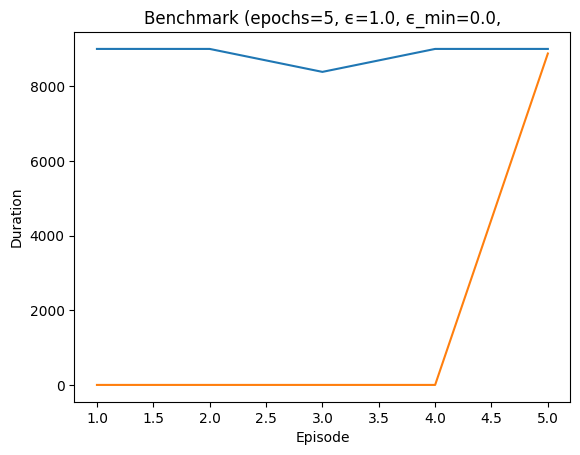

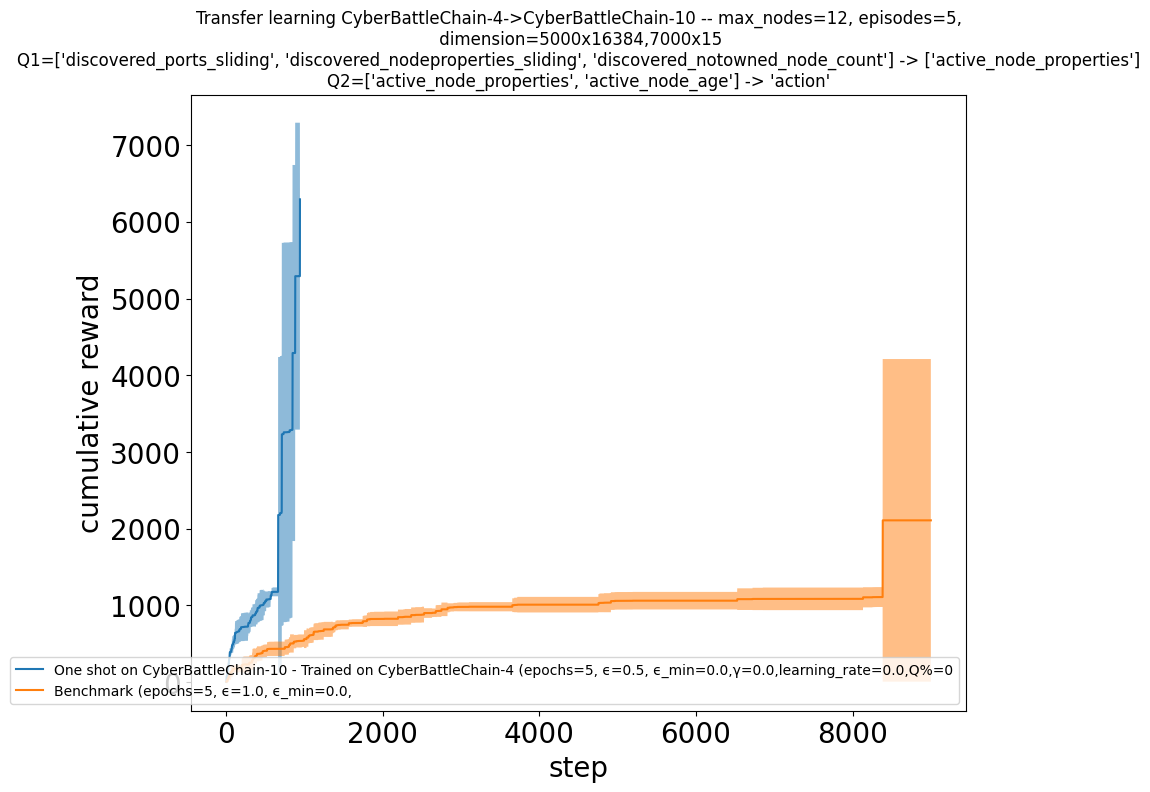

###### One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10
Learning with: episode_count=5,iteration_count=9000,ϵ=0.5,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=0
  ## Episode: 1/5 'One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  114.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  116.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  116.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  118.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  118.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward:  129.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward:  129.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward:  137.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward:  137.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 1|Iteration 33|reward:  143.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 1|Iteration 33|reward:  143.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 48|reward:  143.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 64|reward:  152.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 64|reward:  152.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 1|Iteration 65|reward:  252.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 1|Iteration 65|reward:  252.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 1|Iteration 84|reward:  252.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 1|Iteration 104|reward:  266.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 1|Iteration 104|reward:  266.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 1|Iteration 107|reward:  366.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 1|Iteration 107|reward:  366.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:  368.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:  368.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 1|Iteration 115|reward:  370.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 1|Iteration 115|reward:  370.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 1|Iteration 116|reward:  384.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 1|Iteration 116|reward:  384.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 1|Iteration 119|reward:  484.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 1|Iteration 119|reward:  484.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 1|Iteration 121|reward:  490.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 1|Iteration 121|reward:  490.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 1|Iteration 124|reward:  504.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 1|Iteration 124|reward:  504.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 1|Iteration 127|reward: 5504.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 1|Iteration 127|reward: 5504.0|last_reward_at:  127|Elapsed Time: 0:00:00||

  Episode 1 ended at t=127 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/20 (0.23)
    explore-remote: 5/46 (0.10)
    explore-connect: 0/35 (0.00)
    exploit-local: 1/3 (0.25)
    exploit-remote: 1/5 (0.17)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 47
  ## Episode: 2/5 'One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  236.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  247.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  247.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  249.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  249.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  253.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  253.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  262.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  262.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:  362.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:  362.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 43|reward:  362.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 48|reward:  364.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 48|reward:  364.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  378.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  378.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 52|reward:  478.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 52|reward:  478.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 2|Iteration 55|reward:  489.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 2|Iteration 55|reward:  489.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 2|Iteration 71|reward:  495.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 2|Iteration 71|reward:  495.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 2|Iteration 72|reward:  501.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 2|Iteration 72|reward:  501.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 2|Iteration 79|reward:  510.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 2|Iteration 79|reward:  510.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 2|Iteration 80|reward: 5510.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 2|Iteration 80|reward: 5510.0|last_reward_at:   80|Elapsed Time: 0:00:00||

  Episode 2 ended at t=80 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/12 (0.40)
    explore-remote: 5/13 (0.28)
    explore-connect: 0/30 (0.00)
    exploit-local: 0/2 (0.00)
    exploit-remote: 1/4 (0.20)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 21
  ## Episode: 3/5 'One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  234.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  234.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  240.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  240.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  254.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  254.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  354.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  354.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  356.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  356.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward:  358.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward:  358.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  364.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  364.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 36|reward:  366.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 36|reward:  366.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  377.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  377.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 48|reward:  379.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 48|reward:  379.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 3|Iteration 49|reward:  385.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 3|Iteration 49|reward:  385.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 3|Iteration 53|reward:  393.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 3|Iteration 53|reward:  393.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 3|Iteration 65|reward:  393.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 3|Iteration 73|reward:  399.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 3|Iteration 73|reward:  399.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 3|Iteration 83|reward:  399.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 3|Iteration 93|reward:  408.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 3|Iteration 93|reward:  408.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 3|Iteration 94|reward:  508.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 3|Iteration 94|reward:  508.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 3|Iteration 95|reward:  522.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 3|Iteration 95|reward:  522.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 3|Iteration 98|reward: 5522.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 3|Iteration 98|reward: 5522.0|last_reward_at:   98|Elapsed Time: 0:00:00||

  Episode 3 ended at t=98 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/20 (0.23)
    explore-remote: 6/18 (0.25)
    explore-connect: 0/30 (0.00)
    exploit-local: 2/3 (0.40)
    exploit-remote: 2/6 (0.25)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 37
  ## Episode: 4/5 'One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  132.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  132.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  232.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  232.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  232.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward:  238.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward:  238.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward:  249.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward:  249.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 41|reward:  251.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 41|reward:  251.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 4|Iteration 58|reward:  253.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 4|Iteration 58|reward:  253.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 4|Iteration 69|reward:  257.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 4|Iteration 69|reward:  257.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 4|Iteration 84|reward:  257.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 4|Iteration 100|reward:  266.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 4|Iteration 100|reward:  266.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 4|Iteration 104|reward:  366.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 4|Iteration 104|reward:  366.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 4|Iteration 110|reward:  372.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 4|Iteration 110|reward:  372.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 4|Iteration 111|reward:  383.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 4|Iteration 111|reward:  383.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 4|Iteration 123|reward:  392.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 4|Iteration 123|reward:  392.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 4|Iteration 126|reward:  492.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 4|Iteration 126|reward:  492.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 4|Iteration 129|reward:  498.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 4|Iteration 129|reward:  498.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 4|Iteration 136|reward:  509.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 4|Iteration 136|reward:  509.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 4|Iteration 138|reward:  518.0|last_reward_at:  136|Elapsed Time: 0:00:01||

Episode 4|Iteration 138|reward:  518.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 4|Iteration 142|reward: 5518.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 4|Iteration 142|reward: 5518.0|last_reward_at:  142|Elapsed Time: 0:00:01||

  Episode 4 ended at t=142 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/25 (0.22)
    explore-remote: 6/37 (0.14)
    explore-connect: 0/47 (0.00)
    exploit-local: 1/6 (0.14)
    exploit-remote: 1/7 (0.12)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 50
  ## Episode: 5/5 'One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  114.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  125.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  125.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  134.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  134.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  140.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  140.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  240.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  240.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  246.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  246.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  260.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  260.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  262.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  262.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  362.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  362.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  376.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  376.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  476.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  476.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  490.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  490.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward: 5490.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward: 5490.0|last_reward_at:   34|Elapsed Time: 0:00:00||

  Episode 5 ended at t=34 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/3 (0.57)
    explore-remote: 3/10 (0.23)
    explore-connect: 0/7 (0.00)
    exploit-local: 2/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 4
simulation ended


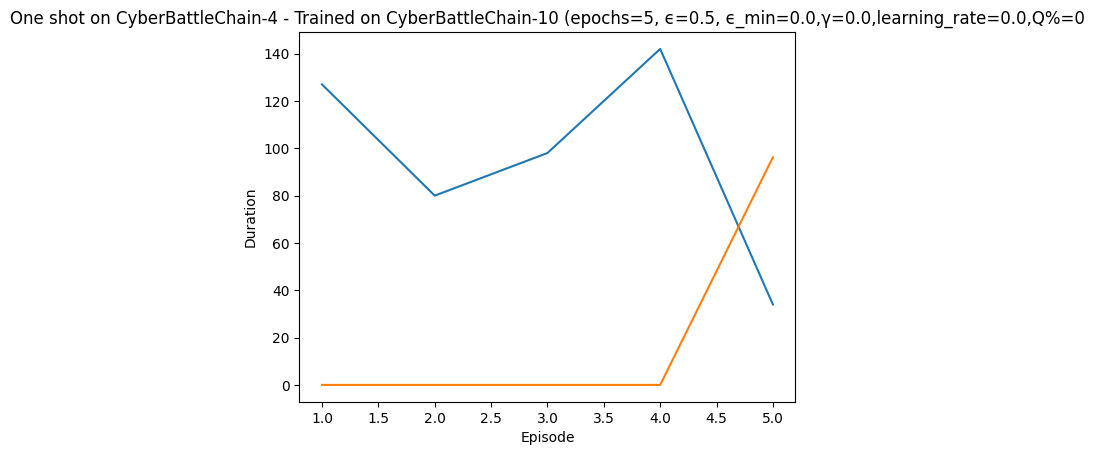

###### Benchmark
Learning with: episode_count=5,iteration_count=9000,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/5 'Benchmark' ϵ=1.0000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:   14.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:   16.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:   16.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 48|reward:   20.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 48|reward:   20.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 57|reward:  120.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 57|reward:  120.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 1|Iteration 62|reward:  134.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 1|Iteration 62|reward:  134.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:  142.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:  142.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:  148.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:  148.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 83|reward:  248.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 83|reward:  248.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 1|Iteration 105|reward:  254.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 1|Iteration 105|reward:  254.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 1|Iteration 132|reward:  268.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 1|Iteration 132|reward:  268.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 1|Iteration 136|reward:  274.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 1|Iteration 136|reward:  274.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 1|Iteration 137|reward:  276.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 1|Iteration 137|reward:  276.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 1|Iteration 159|reward:  280.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 1|Iteration 159|reward:  280.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 1|Iteration 185|reward:  380.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 1|Iteration 185|reward:  380.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 1|Iteration 193|reward:  394.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 1|Iteration 193|reward:  394.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 1|Iteration 203|reward:  400.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 1|Iteration 203|reward:  400.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 1|Iteration 207|reward:  408.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 1|Iteration 207|reward:  408.0|last_reward_at:  207|Elapsed Time: 0:00:00||

Episode 1|Iteration 228|reward:  408.0|last_reward_at:  207|Elapsed Time: 0:00:00||

Episode 1|Iteration 237|reward:  414.0|last_reward_at:  207|Elapsed Time: 0:00:00||

Episode 1|Iteration 237|reward:  414.0|last_reward_at:  237|Elapsed Time: 0:00:00||

Episode 1|Iteration 276|reward:  414.0|last_reward_at:  237|Elapsed Time: 0:00:00||

Episode 1|Iteration 316|reward:  414.0|last_reward_at:  237|Elapsed Time: 0:00:00||

Episode 1|Iteration 342|reward:  414.0|last_reward_at:  237|Elapsed Time: 0:00:00||

Episode 1|Iteration 355|reward:  514.0|last_reward_at:  237|Elapsed Time: 0:00:00||

Episode 1|Iteration 355|reward:  514.0|last_reward_at:  355|Elapsed Time: 0:00:00||

Episode 1|Iteration 364|reward:  528.0|last_reward_at:  355|Elapsed Time: 0:00:00||

Episode 1|Iteration 364|reward:  528.0|last_reward_at:  364|Elapsed Time: 0:00:00||

Episode 1|Iteration 396|reward:  528.0|last_reward_at:  364|Elapsed Time: 0:00:00||

Episode 1|Iteration 425|reward:  528.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 1|Iteration 454|reward:  528.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 1|Iteration 486|reward:  528.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 1|Iteration 497|reward:  534.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 1|Iteration 497|reward:  534.0|last_reward_at:  497|Elapsed Time: 0:00:01||

Episode 1|Iteration 525|reward:  534.0|last_reward_at:  497|Elapsed Time: 0:00:01||

Episode 1|Iteration 534|reward: 5534.0|last_reward_at:  497|Elapsed Time: 0:00:01||

Episode 1|Iteration 534|reward: 5534.0|last_reward_at:  534|Elapsed Time: 0:00:01||

  Episode 1 ended at t=534 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/125 (0.07)
    explore-remote: 8/207 (0.04)
    explore-connect: 5/180 (0.03)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Benchmark' ϵ=1.0000, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:   14.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:   18.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  118.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  132.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  132.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  140.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  140.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  240.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  240.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward:  242.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward:  242.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  253.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  253.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  259.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  259.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward:  265.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward:  265.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward:  274.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward:  274.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  276.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  276.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 67|reward:  280.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 67|reward:  280.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 2|Iteration 83|reward:  380.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 2|Iteration 83|reward:  380.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 2|Iteration 91|reward:  394.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 2|Iteration 91|reward:  394.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:  400.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:  400.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 106|reward:  408.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 106|reward:  408.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 2|Iteration 129|reward:  508.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 2|Iteration 129|reward:  508.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 2|Iteration 159|reward:  508.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 2|Iteration 184|reward:  508.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 2|Iteration 189|reward:  514.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 2|Iteration 189|reward:  514.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 2|Iteration 191|reward:  525.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 2|Iteration 191|reward:  525.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 2|Iteration 217|reward:  525.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 2|Iteration 218|reward:  534.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 2|Iteration 218|reward:  534.0|last_reward_at:  218|Elapsed Time: 0:00:00||

Episode 2|Iteration 244|reward:  534.0|last_reward_at:  218|Elapsed Time: 0:00:00||

Episode 2|Iteration 276|reward:  534.0|last_reward_at:  218|Elapsed Time: 0:00:00||

Episode 2|Iteration 311|reward:  534.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 2|Iteration 342|reward:  534.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 2|Iteration 374|reward:  534.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 2|Iteration 409|reward:  534.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 2|Iteration 441|reward:  534.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 2|Iteration 456|reward:  534.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 2|Iteration 481|reward:  534.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 2|Iteration 507|reward: 5534.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 2|Iteration 507|reward: 5534.0|last_reward_at:  507|Elapsed Time: 0:00:01||

  Episode 2 ended at t=507 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/137 (0.06)
    explore-remote: 8/171 (0.04)
    explore-connect: 5/177 (0.03)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Benchmark' ϵ=1.0000, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:   18.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward:  118.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward:  118.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 48|reward:  129.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 48|reward:  129.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 3|Iteration 49|reward:  137.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 3|Iteration 49|reward:  137.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 3|Iteration 58|reward:  143.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 3|Iteration 58|reward:  143.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 3|Iteration 67|reward:  152.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 3|Iteration 67|reward:  152.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 3|Iteration 71|reward:  154.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 3|Iteration 71|reward:  154.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 3|Iteration 114|reward:  154.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 3|Iteration 186|reward:  154.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:  154.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 3|Iteration 312|reward:  154.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 3|Iteration 388|reward:  154.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 3|Iteration 392|reward:  254.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 3|Iteration 392|reward:  254.0|last_reward_at:  392|Elapsed Time: 0:00:00||

Episode 3|Iteration 455|reward:  254.0|last_reward_at:  392|Elapsed Time: 0:00:00||

Episode 3|Iteration 463|reward:  268.0|last_reward_at:  392|Elapsed Time: 0:00:00||

Episode 3|Iteration 463|reward:  268.0|last_reward_at:  463|Elapsed Time: 0:00:00||

Episode 3|Iteration 474|reward:  274.0|last_reward_at:  463|Elapsed Time: 0:00:00||

Episode 3|Iteration 474|reward:  274.0|last_reward_at:  474|Elapsed Time: 0:00:00||

Episode 3|Iteration 481|reward:  374.0|last_reward_at:  474|Elapsed Time: 0:00:00||

Episode 3|Iteration 481|reward:  374.0|last_reward_at:  481|Elapsed Time: 0:00:00||

Episode 3|Iteration 497|reward:  376.0|last_reward_at:  481|Elapsed Time: 0:00:00||

Episode 3|Iteration 497|reward:  376.0|last_reward_at:  497|Elapsed Time: 0:00:00||

Episode 3|Iteration 502|reward:  378.0|last_reward_at:  497|Elapsed Time: 0:00:00||

Episode 3|Iteration 502|reward:  378.0|last_reward_at:  502|Elapsed Time: 0:00:00||

Episode 3|Iteration 507|reward:  389.0|last_reward_at:  502|Elapsed Time: 0:00:00||

Episode 3|Iteration 507|reward:  389.0|last_reward_at:  507|Elapsed Time: 0:00:00||

Episode 3|Iteration 520|reward:  395.0|last_reward_at:  507|Elapsed Time: 0:00:00||

Episode 3|Iteration 520|reward:  395.0|last_reward_at:  520|Elapsed Time: 0:00:00||

Episode 3|Iteration 562|reward:  395.0|last_reward_at:  520|Elapsed Time: 0:00:00||

Episode 3|Iteration 598|reward:  403.0|last_reward_at:  520|Elapsed Time: 0:00:01||

Episode 3|Iteration 598|reward:  403.0|last_reward_at:  598|Elapsed Time: 0:00:01||

Episode 3|Iteration 633|reward:  412.0|last_reward_at:  598|Elapsed Time: 0:00:01||

Episode 3|Iteration 633|reward:  412.0|last_reward_at:  633|Elapsed Time: 0:00:01||

Episode 3|Iteration 675|reward:  412.0|last_reward_at:  633|Elapsed Time: 0:00:01||

Episode 3|Iteration 712|reward:  412.0|last_reward_at:  633|Elapsed Time: 0:00:01||

Episode 3|Iteration 752|reward:  412.0|last_reward_at:  633|Elapsed Time: 0:00:01||

Episode 3|Iteration 790|reward:  412.0|last_reward_at:  633|Elapsed Time: 0:00:01||

Episode 3|Iteration 834|reward:  412.0|last_reward_at:  633|Elapsed Time: 0:00:01||

Episode 3|Iteration 878|reward:  412.0|last_reward_at:  633|Elapsed Time: 0:00:01||

Episode 3|Iteration 912|reward:  412.0|last_reward_at:  633|Elapsed Time: 0:00:01||

Episode 3|Iteration 950|reward:  412.0|last_reward_at:  633|Elapsed Time: 0:00:01||

Episode 3|Iteration 988|reward:  412.0|last_reward_at:  633|Elapsed Time: 0:00:01||

Episode 3|Iteration 1026|reward:  412.0|last_reward_at:  633|Elapsed Time: 0:00:02||

Episode 3|Iteration 1061|reward:  412.0|last_reward_at:  633|Elapsed Time: 0:00:02||

Episode 3|Iteration 1097|reward:  412.0|last_reward_at:  633|Elapsed Time: 0:00:02||

Episode 3|Iteration 1138|reward:  412.0|last_reward_at:  633|Elapsed Time: 0:00:02||

Episode 3|Iteration 1177|reward:  412.0|last_reward_at:  633|Elapsed Time: 0:00:02||

Episode 3|Iteration 1220|reward:  412.0|last_reward_at:  633|Elapsed Time: 0:00:02||

Episode 3|Iteration 1254|reward:  412.0|last_reward_at:  633|Elapsed Time: 0:00:02||

Episode 3|Iteration 1282|reward:  512.0|last_reward_at:  633|Elapsed Time: 0:00:02||

Episode 3|Iteration 1282|reward:  512.0|last_reward_at: 1282|Elapsed Time: 0:00:02||

Episode 3|Iteration 1316|reward:  512.0|last_reward_at: 1282|Elapsed Time: 0:00:02||

Episode 3|Iteration 1349|reward:  512.0|last_reward_at: 1282|Elapsed Time: 0:00:02||

Episode 3|Iteration 1368|reward:  512.0|last_reward_at: 1282|Elapsed Time: 0:00:02||

Episode 3|Iteration 1374|reward:  526.0|last_reward_at: 1282|Elapsed Time: 0:00:03||

Episode 3|Iteration 1374|reward:  526.0|last_reward_at: 1374|Elapsed Time: 0:00:03||

Episode 3|Iteration 1405|reward:  526.0|last_reward_at: 1374|Elapsed Time: 0:00:03||

Episode 3|Iteration 1438|reward:  526.0|last_reward_at: 1374|Elapsed Time: 0:00:03||

Episode 3|Iteration 1452|reward:  532.0|last_reward_at: 1374|Elapsed Time: 0:00:03||

Episode 3|Iteration 1452|reward:  532.0|last_reward_at: 1452|Elapsed Time: 0:00:03||

Episode 3|Iteration 1482|reward:  532.0|last_reward_at: 1452|Elapsed Time: 0:00:03||

Episode 3|Iteration 1512|reward:  532.0|last_reward_at: 1452|Elapsed Time: 0:00:03||

Episode 3|Iteration 1527|reward: 5532.0|last_reward_at: 1452|Elapsed Time: 0:00:03||

Episode 3|Iteration 1527|reward: 5532.0|last_reward_at: 1527|Elapsed Time: 0:00:03||

  Episode 3 ended at t=1527 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/333 (0.03)
    explore-remote: 8/597 (0.01)
    explore-connect: 5/575 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Benchmark' ϵ=1.0000, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:   16.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:   16.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:   20.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:   20.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 49|reward:  120.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 49|reward:  120.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 4|Iteration 64|reward:  134.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 4|Iteration 64|reward:  134.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 66|reward:  140.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 66|reward:  140.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 4|Iteration 80|reward:  146.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 4|Iteration 80|reward:  146.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 4|Iteration 91|reward:  154.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 4|Iteration 91|reward:  154.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 4|Iteration 119|reward:  254.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 4|Iteration 119|reward:  254.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 4|Iteration 120|reward:  265.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 4|Iteration 120|reward:  265.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 4|Iteration 136|reward:  267.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 4|Iteration 136|reward:  267.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 4|Iteration 158|reward:  271.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 4|Iteration 158|reward:  271.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 4|Iteration 181|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 4|Iteration 181|reward:  280.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 4|Iteration 228|reward:  280.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 4|Iteration 296|reward:  280.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 4|Iteration 342|reward:  280.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 4|Iteration 407|reward:  280.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 4|Iteration 456|reward:  280.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 4|Iteration 517|reward:  280.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 4|Iteration 570|reward:  280.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 4|Iteration 636|reward:  280.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 4|Iteration 684|reward:  280.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 4|Iteration 741|reward:  280.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 4|Iteration 795|reward:  280.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 4|Iteration 851|reward:  280.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 4|Iteration 912|reward:  280.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 4|Iteration 984|reward:  280.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 4|Iteration 1026|reward:  280.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 4|Iteration 1078|reward:  280.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 4|Iteration 1133|reward:  280.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 4|Iteration 1192|reward:  280.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 4|Iteration 1230|reward:  380.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 4|Iteration 1230|reward:  380.0|last_reward_at: 1230|Elapsed Time: 0:00:01||

Episode 4|Iteration 1254|reward:  380.0|last_reward_at: 1230|Elapsed Time: 0:00:02||

Episode 4|Iteration 1304|reward:  380.0|last_reward_at: 1230|Elapsed Time: 0:00:02||

Episode 4|Iteration 1332|reward:  391.0|last_reward_at: 1230|Elapsed Time: 0:00:02||

Episode 4|Iteration 1332|reward:  391.0|last_reward_at: 1332|Elapsed Time: 0:00:02||

Episode 4|Iteration 1335|reward:  399.0|last_reward_at: 1332|Elapsed Time: 0:00:02||

Episode 4|Iteration 1335|reward:  399.0|last_reward_at: 1335|Elapsed Time: 0:00:02||

Episode 4|Iteration 1351|reward:  405.0|last_reward_at: 1335|Elapsed Time: 0:00:02||

Episode 4|Iteration 1351|reward:  405.0|last_reward_at: 1351|Elapsed Time: 0:00:02||

Episode 4|Iteration 1368|reward:  414.0|last_reward_at: 1351|Elapsed Time: 0:00:02||

Episode 4|Iteration 1368|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:02||

Episode 4|Iteration 1409|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:02||

Episode 4|Iteration 1454|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:02||

Episode 4|Iteration 1482|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:02||

Episode 4|Iteration 1535|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:02||

Episode 4|Iteration 1587|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:02||

Episode 4|Iteration 1636|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:02||

Episode 4|Iteration 1687|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:02||

Episode 4|Iteration 1737|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:03||

Episode 4|Iteration 1784|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:03||

Episode 4|Iteration 1823|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:03||

Episode 4|Iteration 1864|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:03||

Episode 4|Iteration 1906|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:03||

Episode 4|Iteration 1937|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:03||

Episode 4|Iteration 1982|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:03||

Episode 4|Iteration 2024|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:03||

Episode 4|Iteration 2081|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:03||

Episode 4|Iteration 2131|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:03||

Episode 4|Iteration 2165|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:03||

Episode 4|Iteration 2205|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:04||

Episode 4|Iteration 2250|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:04||

Episode 4|Iteration 2279|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:04||

Episode 4|Iteration 2326|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:04||

Episode 4|Iteration 2369|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:04||

Episode 4|Iteration 2393|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:04||

Episode 4|Iteration 2432|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:04||

Episode 4|Iteration 2487|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:04||

Episode 4|Iteration 2542|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:04||

Episode 4|Iteration 2586|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:04||

Episode 4|Iteration 2621|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:05||

Episode 4|Iteration 2666|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:05||

Episode 4|Iteration 2708|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:05||

Episode 4|Iteration 2735|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:05||

Episode 4|Iteration 2779|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:05||

Episode 4|Iteration 2822|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:05||

Episode 4|Iteration 2849|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:05||

Episode 4|Iteration 2894|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:05||

Episode 4|Iteration 2936|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:05||

Episode 4|Iteration 2963|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:05||

Episode 4|Iteration 3001|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:05||

Episode 4|Iteration 3040|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:06||

Episode 4|Iteration 3076|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:06||

Episode 4|Iteration 3119|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:06||

Episode 4|Iteration 3160|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:06||

Episode 4|Iteration 3190|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:06||

Episode 4|Iteration 3230|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:06||

Episode 4|Iteration 3287|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:06||

Episode 4|Iteration 3337|reward:  414.0|last_reward_at: 1368|Elapsed Time: 0:00:06||

Episode 4|Iteration 3341|reward:  514.0|last_reward_at: 1368|Elapsed Time: 0:00:06||

Episode 4|Iteration 3341|reward:  514.0|last_reward_at: 3341|Elapsed Time: 0:00:06||

Episode 4|Iteration 3349|reward:  528.0|last_reward_at: 3341|Elapsed Time: 0:00:06||

Episode 4|Iteration 3349|reward:  528.0|last_reward_at: 3349|Elapsed Time: 0:00:06||

Episode 4|Iteration 3384|reward:  528.0|last_reward_at: 3349|Elapsed Time: 0:00:06||

Episode 4|Iteration 3417|reward:  528.0|last_reward_at: 3349|Elapsed Time: 0:00:06||

Episode 4|Iteration 3424|reward:  534.0|last_reward_at: 3349|Elapsed Time: 0:00:06||

Episode 4|Iteration 3424|reward:  534.0|last_reward_at: 3424|Elapsed Time: 0:00:06||

Episode 4|Iteration 3457|reward:  534.0|last_reward_at: 3424|Elapsed Time: 0:00:07||

Episode 4|Iteration 3494|reward:  534.0|last_reward_at: 3424|Elapsed Time: 0:00:07||

Episode 4|Iteration 3531|reward:  534.0|last_reward_at: 3424|Elapsed Time: 0:00:07||

Episode 4|Iteration 3573|reward:  534.0|last_reward_at: 3424|Elapsed Time: 0:00:07||

Episode 4|Iteration 3613|reward:  534.0|last_reward_at: 3424|Elapsed Time: 0:00:07||

Episode 4|Iteration 3646|reward:  534.0|last_reward_at: 3424|Elapsed Time: 0:00:07||

Episode 4|Iteration 3681|reward:  534.0|last_reward_at: 3424|Elapsed Time: 0:00:07||

Episode 4|Iteration 3724|reward:  534.0|last_reward_at: 3424|Elapsed Time: 0:00:07||

Episode 4|Iteration 3760|reward:  534.0|last_reward_at: 3424|Elapsed Time: 0:00:07||

Episode 4|Iteration 3799|reward:  534.0|last_reward_at: 3424|Elapsed Time: 0:00:07||

Episode 4|Iteration 3835|reward:  534.0|last_reward_at: 3424|Elapsed Time: 0:00:08||

Episode 4|Iteration 3869|reward:  534.0|last_reward_at: 3424|Elapsed Time: 0:00:08||

Episode 4|Iteration 3915|reward:  534.0|last_reward_at: 3424|Elapsed Time: 0:00:08||

Episode 4|Iteration 3950|reward:  534.0|last_reward_at: 3424|Elapsed Time: 0:00:08||

Episode 4|Iteration 3987|reward:  534.0|last_reward_at: 3424|Elapsed Time: 0:00:08||

Episode 4|Iteration 4031|reward:  534.0|last_reward_at: 3424|Elapsed Time: 0:00:08||

Episode 4|Iteration 4061|reward:  534.0|last_reward_at: 3424|Elapsed Time: 0:00:08||

Episode 4|Iteration 4100|reward:  534.0|last_reward_at: 3424|Elapsed Time: 0:00:08||

Episode 4|Iteration 4141|reward:  534.0|last_reward_at: 3424|Elapsed Time: 0:00:08||

Episode 4|Iteration 4173|reward:  534.0|last_reward_at: 3424|Elapsed Time: 0:00:08||

Episode 4|Iteration 4213|reward:  534.0|last_reward_at: 3424|Elapsed Time: 0:00:09||

Episode 4|Iteration 4244|reward:  534.0|last_reward_at: 3424|Elapsed Time: 0:00:09||

Episode 4|Iteration 4278|reward:  534.0|last_reward_at: 3424|Elapsed Time: 0:00:09||

Episode 4|Iteration 4286|reward: 5534.0|last_reward_at: 3424|Elapsed Time: 0:00:09||

Episode 4|Iteration 4286|reward: 5534.0|last_reward_at: 4286|Elapsed Time: 0:00:09||

  Episode 4 ended at t=4286 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/1077 (0.01)
    explore-remote: 8/1612 (0.00)
    explore-connect: 5/1575 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Benchmark' ϵ=1.0000, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:   18.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:   20.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:   20.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward:  120.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward:  120.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  134.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  134.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 41|reward:  140.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 41|reward:  140.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 5|Iteration 43|reward:  148.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 5|Iteration 43|reward:  148.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward:  148.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 5|Iteration 123|reward:  154.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 5|Iteration 123|reward:  154.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 5|Iteration 228|reward:  154.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 5|Iteration 261|reward:  254.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 5|Iteration 261|reward:  254.0|last_reward_at:  261|Elapsed Time: 0:00:00||

Episode 5|Iteration 273|reward:  265.0|last_reward_at:  261|Elapsed Time: 0:00:00||

Episode 5|Iteration 273|reward:  265.0|last_reward_at:  273|Elapsed Time: 0:00:00||

Episode 5|Iteration 281|reward:  267.0|last_reward_at:  273|Elapsed Time: 0:00:00||

Episode 5|Iteration 281|reward:  267.0|last_reward_at:  281|Elapsed Time: 0:00:00||

Episode 5|Iteration 287|reward:  271.0|last_reward_at:  281|Elapsed Time: 0:00:00||

Episode 5|Iteration 287|reward:  271.0|last_reward_at:  287|Elapsed Time: 0:00:00||

Episode 5|Iteration 338|reward:  280.0|last_reward_at:  287|Elapsed Time: 0:00:00||

Episode 5|Iteration 338|reward:  280.0|last_reward_at:  338|Elapsed Time: 0:00:00||

Episode 5|Iteration 402|reward:  280.0|last_reward_at:  338|Elapsed Time: 0:00:00||

Episode 5|Iteration 456|reward:  280.0|last_reward_at:  338|Elapsed Time: 0:00:00||

Episode 5|Iteration 532|reward:  280.0|last_reward_at:  338|Elapsed Time: 0:00:00||

Episode 5|Iteration 576|reward:  380.0|last_reward_at:  338|Elapsed Time: 0:00:00||

Episode 5|Iteration 576|reward:  380.0|last_reward_at:  576|Elapsed Time: 0:00:00||

Episode 5|Iteration 582|reward:  391.0|last_reward_at:  576|Elapsed Time: 0:00:00||

Episode 5|Iteration 582|reward:  391.0|last_reward_at:  582|Elapsed Time: 0:00:00||

Episode 5|Iteration 584|reward:  397.0|last_reward_at:  582|Elapsed Time: 0:00:00||

Episode 5|Iteration 584|reward:  397.0|last_reward_at:  584|Elapsed Time: 0:00:00||

Episode 5|Iteration 602|reward:  406.0|last_reward_at:  584|Elapsed Time: 0:00:00||

Episode 5|Iteration 602|reward:  406.0|last_reward_at:  602|Elapsed Time: 0:00:00||

Episode 5|Iteration 633|reward:  414.0|last_reward_at:  602|Elapsed Time: 0:00:00||

Episode 5|Iteration 633|reward:  414.0|last_reward_at:  633|Elapsed Time: 0:00:00||

Episode 5|Iteration 684|reward:  414.0|last_reward_at:  633|Elapsed Time: 0:00:01||

Episode 5|Iteration 731|reward:  414.0|last_reward_at:  633|Elapsed Time: 0:00:01||

Episode 5|Iteration 748|reward:  514.0|last_reward_at:  633|Elapsed Time: 0:00:01||

Episode 5|Iteration 748|reward:  514.0|last_reward_at:  748|Elapsed Time: 0:00:01||

Episode 5|Iteration 792|reward:  514.0|last_reward_at:  748|Elapsed Time: 0:00:01||

Episode 5|Iteration 820|reward:  525.0|last_reward_at:  748|Elapsed Time: 0:00:01||

Episode 5|Iteration 820|reward:  525.0|last_reward_at:  820|Elapsed Time: 0:00:01||

Episode 5|Iteration 867|reward:  534.0|last_reward_at:  820|Elapsed Time: 0:00:01||

Episode 5|Iteration 867|reward:  534.0|last_reward_at:  867|Elapsed Time: 0:00:01||

Episode 5|Iteration 912|reward:  534.0|last_reward_at:  867|Elapsed Time: 0:00:01||

Episode 5|Iteration 952|reward:  534.0|last_reward_at:  867|Elapsed Time: 0:00:01||

Episode 5|Iteration 997|reward:  534.0|last_reward_at:  867|Elapsed Time: 0:00:01||

Episode 5|Iteration 1026|reward:  534.0|last_reward_at:  867|Elapsed Time: 0:00:01||

Episode 5|Iteration 1065|reward:  534.0|last_reward_at:  867|Elapsed Time: 0:00:01||

Episode 5|Iteration 1102|reward:  534.0|last_reward_at:  867|Elapsed Time: 0:00:01||

Episode 5|Iteration 1140|reward:  534.0|last_reward_at:  867|Elapsed Time: 0:00:02||

Episode 5|Iteration 1178|reward:  534.0|last_reward_at:  867|Elapsed Time: 0:00:02||

Episode 5|Iteration 1218|reward:  534.0|last_reward_at:  867|Elapsed Time: 0:00:02||

Episode 5|Iteration 1254|reward:  534.0|last_reward_at:  867|Elapsed Time: 0:00:02||

Episode 5|Iteration 1295|reward:  534.0|last_reward_at:  867|Elapsed Time: 0:00:02||

Episode 5|Iteration 1335|reward:  534.0|last_reward_at:  867|Elapsed Time: 0:00:02||

Episode 5|Iteration 1367|reward:  534.0|last_reward_at:  867|Elapsed Time: 0:00:02||

Episode 5|Iteration 1404|reward:  534.0|last_reward_at:  867|Elapsed Time: 0:00:02||

Episode 5|Iteration 1440|reward:  534.0|last_reward_at:  867|Elapsed Time: 0:00:02||

Episode 5|Iteration 1441|reward: 5534.0|last_reward_at:  867|Elapsed Time: 0:00:02||

Episode 5|Iteration 1441|reward: 5534.0|last_reward_at: 1441|Elapsed Time: 0:00:02||

  Episode 5 ended at t=1441 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/388 (0.02)
    explore-remote: 8/507 (0.02)
    explore-connect: 5/524 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


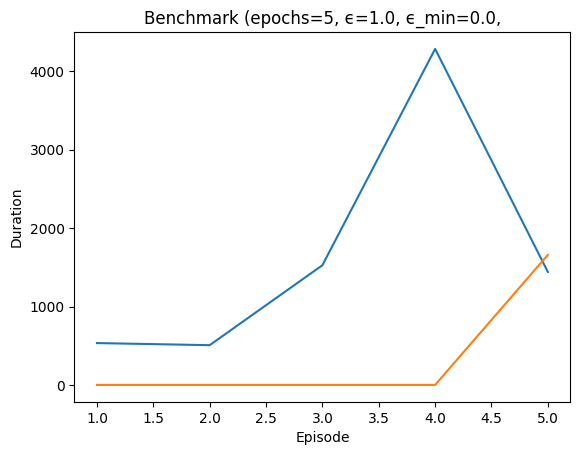

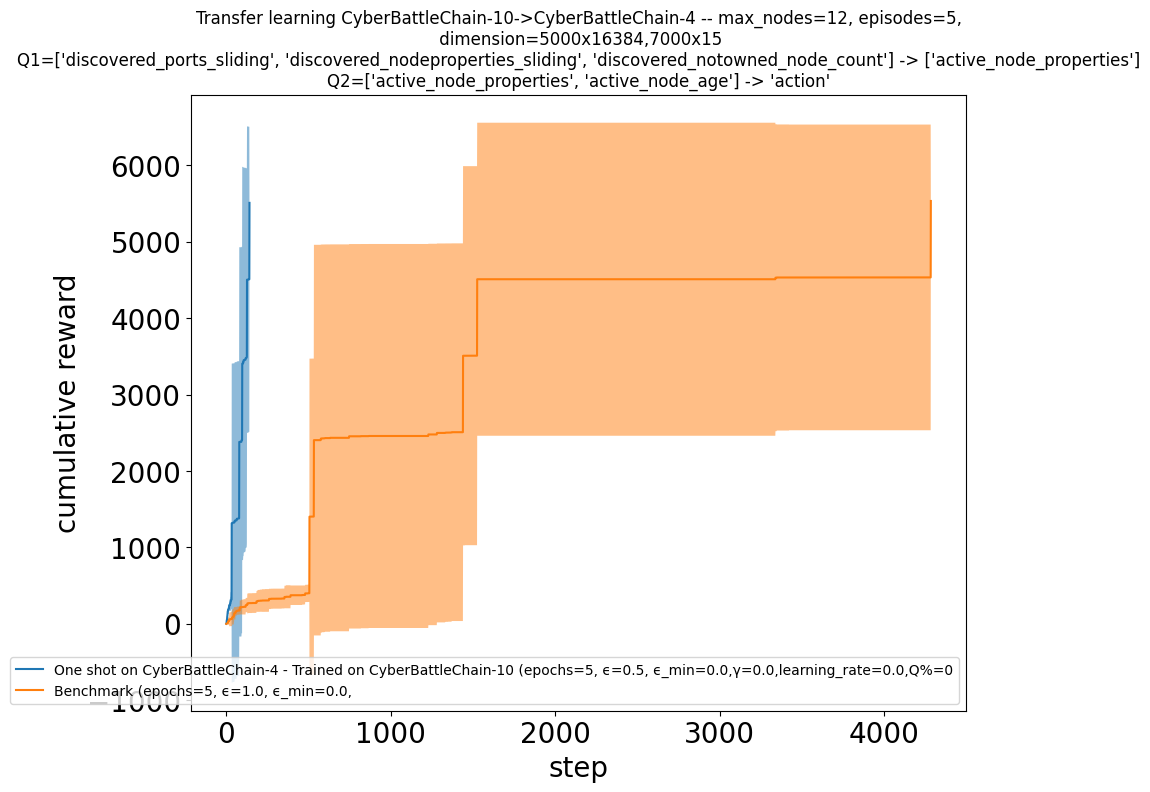

In [15]:
# Train Q-matrix on CyberBattle network of size 4
cyberbattlechain_4 = gym.make('CyberBattleChain-v0', size=4,
                              attacker_goal=AttackerGoal(own_atleast_percent=1.0)
                              )

qlearning_bestrun_4 = qlearning_run(0.015, gym_env=cyberbattlechain_4)


def stop_learning(trained_learner):
    return TrainedLearner(
        learner=a.QTabularLearner(
            ep,
            gamma=0.0,
            learning_rate=0.0,
            exploit_percentile=0,
            trained=trained_learner['learner']
        ),
        title=trained_learner['title'],
        trained_on=trained_learner['trained_on'],
        all_episodes_rewards=trained_learner['all_episodes_rewards'],
        all_episodes_availability=trained_learner['all_episodes_availability']
    )


learner.transfer_learning_evaluation(
    environment_properties=ep,
    trained_learner=stop_learning(qlearning_bestrun_4),
    eval_env=cyberbattlechain_10,
    eval_epsilon=0.5,  # alternate with exploration to help generalization to bigger network
    eval_episode_count=eval_episode_count,
    iteration_count=iteration_count
)

learner.transfer_learning_evaluation(
    environment_properties=ep,
    trained_learner=stop_learning(qlearning_bestrun_10),
    eval_env=cyberbattlechain_4,
    eval_epsilon=0.5,
    eval_episode_count=eval_episode_count,
    iteration_count=iteration_count
)